#### **Library:**

In [276]:
# import libraries
from statsmodels.stats.outliers_influence import variance_inflation_factor 
import pandas as pd
import numpy as np

# Visualisasi
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import matplotlib.dates as mdates
import matplotlib.ticker as ticker

# Data Splitting
from sklearn.model_selection import train_test_split, cross_validate, StratifiedKFold

# Preprocessing
from sklearn.compose import ColumnTransformer
from imblearn.pipeline import Pipeline
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer, SimpleImputer
from sklearn.preprocessing import OneHotEncoder, PowerTransformer
from category_encoders import BinaryEncoder, OrdinalEncoder
from sklearn.preprocessing import RobustScaler, MinMaxScaler, StandardScaler

# Resampler
from imblearn.over_sampling import RandomOverSampler, SMOTE, ADASYN
from imblearn.under_sampling import RandomUnderSampler, NearMiss

# ML algorithm
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import VotingClassifier, StackingClassifier, BaggingClassifier, RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from xgboost.sklearn import XGBClassifier
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier
from sklearn.svm import SVC

# Hyperparameter Tuning
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.feature_selection import RFE, SequentialFeatureSelector

# metrics
from sklearn.metrics import recall_score, classification_report, confusion_matrix, accuracy_score
from sklearn.metrics import precision_score

# Remove warning
import warnings
warnings.filterwarnings('ignore')

###

--------------------------------------------------------------------
--------------------------------------------------------------------

<p style="text-align: center;">
  <strong>DISUSUN OLEH:</strong> <br>
  "TIM mind<strong>fuel</strong>"<br><strong>F</strong>A<strong>U</strong>ZIAH AROFAH DAN <strong>EL</strong>ISA HARIYANTI<br><br>
  <strong>DIBIMBING OLEH:</strong><br>M. ZULFIKAR MUSLIM<br><br><strong>JCDS 0408 - BANDUNG, 2024<strong>
</p>

--------------------------------------------------------------------------------------------
--------------------------------------------------------------------------------------------

# **BAB 1. BUSINESS PROBLEM UNDERSTANDING**

Bab ini akan mengeksplorasi tentang pemahaman masalah bisnis yang dihadapi oleh perusahaan e-commerce terkait dengan tingkat churn konsumen. Pembahasan pada bab ini akan mencakup konteks industri e-commerce, target analisis, serta pernyataan masalah yang menggambarkan tantangan yang ada. Selain itu, akan dijelaskan tentang pendekatan analitik yang digunakan untuk menganalisis data, diikuti dengan metrik evaluasi yang dipilih. Solusi yang relevan untuk membantu perusahaan dalam mengantisipasi konsumen churn diharapkan dapat ditelusuri berdasarkan pemahaman tersebut.

## **1.1 Context**

Di era digital yang terus berkembang, sebuah perusahaan e-commerce terkemuka menghadapi tantangan yang semakin kompleks dalam memahami dan mempertahankan konsumen. **[E-commerce](https://sell.amazon.com/learn/what-is-ecommerce)** merupakan proses jual beli barang dan layanan melalui internet. Dengan memanfaatkan platform digital, individu dan perusahaan dapat dengan mudah membeli dan menjual berbagai produk fisik ataupun produk digital dengan lebih efisien. Beberapa bisnis dapat beroperasi sepenuhnya secara online, sementara ada beberapa bisnis yang memanfaatkan e-commerce untuk memperluas jangkauan distribusi. Pertumbuhan pesat dalam dunia digital ini menjadikan e-commerce sebagai peluang usaha yang menguntungkan.

Menurut **[IBM](https://www.ibm.com/topics/ecommerce)**, sejak sekitar tahun 1990, e-commerce telah menjadi elemen krusial dalam transformasi bisnis secara global. Kehadirannya telah mendorong pertumbuhan ekonomi yang signifikan bagi perusahaan, terutama pasca pandemi COVID-19. Selama tiga dekade terakhir, sektor ini telah bertransformasi dari sekedar penjualan produk tertentu menjadi sebuah ekosistem yang kompleks yang diadopsi oleh banyak perusahaan. **[Oracle](https://www.oracle.com/id/cx/ecommerce/what-is-ecommerce/)** memproyeksikan tingkat pertumbuhan e-commerce akan mencapai angka fantastis, yaitu 265%. Pada tahun 2017, penjualan ritel e-commerce diseluruh dunia mencapai $2.3 triliun, yang mana pada tahun 2021 mejadi $4.88 triliun. Pertumbuhan yang luar biasa tersebut menjadikan e-commerce sebagai wadah yang semakin berharga dan esensial bagi bisnis. Dengan e-commerce, perusahaan dapat menjangkau konsumen di berbagai wilayah, serta meminimalkan biaya untuk kebutuhan toko offline. Selain itu, konsumen dapat berbelanja dimana saja dan kapan saja dengan perangkat yang dianggap nyaman oleh konsumen. 

Namun, dengan meningkatnya persaingan dan perubahan preferensi konsumen, penting bagi perusahaan untuk tidak hanya mengumpulkan data, tetapi juga menganalisisnya secara efektif untuk mengambil keputusan strategis. Dalam konteks ini, sebuah perusahaan e-commerce berkomitmen untuk memanfaatkan kecanggihan teknologi, khususnya machine learning, untuk memprediksi perilaku konsumen, khususnya dalam hal churn. Perusahaan tersebut berupaya mengidentifikasi pola-pola yang mendasari keputusan konsumen untuk churn dan tidak churn. 

Churn adalah fenomena dimana konsumen berhenti menggunakan layanan aplikasi berdasarkan parameter yang ditetapkan oleh perusahaan. **[*Churn Rate*](https://www.productplan.com/glossary/churn/)** yang tinggi dapat berdampak negatif pada Monthly Recurring Revenue (MRR) dan dapat mengindikasikan ketidakpuasan konsumen terhadap produk ataupun layanan. Churn rate ini umumnya dihitung dalam periode bulanan, kuartal, ataupun tahunan dan digunakan untuk mengukur sejauh mana perusahaan dapat mempertahankan konsumen yang sudah ada, baik yang baru bergabung maupun yang sudah lama. *Churn rate* dapat dihitung berdasarkan definisi churn masing-masing perusahaan, namun secara umum churn rate dihitung dengan membagi jumlah konsumen yang churn selama periode tertentu dengan total konsumen yang ada. Berikut adalah rumus churn rate secara umum: 

$$\text{Churn Rate} = \frac{\text{Jumlah Konsumen yang Berhenti dalam Periode Tertentu}}{\text{Total Konsumen di Awal Periode}} \times 100$$

Beberapa alasan umum mengapa konsumen churn antara lain: produk yang disediakan tidak lagi memenuhi kebutuhan konsumen, konsumen kurang puas dengan peforma aplikasi, kurangnya fitur-fitur menarik, ataupun adanya alternatif e-commerce pesaing yang lebih baik. Namun, terdapat [dua jenis churn rate](https://www.hadirr.com/blog/cara-menghitung-churn-rate/) yang juga biasa terjadi, yaitu:

1. Churn rate disengaja (voluntary churn) yaitu ketika konsumen secara sukarela dan sadar memutuskan untuk berhenti menggunakan produk dan layanan perusahaan karena alasan pribadi. Contohnya, konsumen berhenti menggunakan layanan streaming vide karena sudah tidak sesuai dengan kertarikannya. 

2. Churn yang tidak disengaja (involuntary churn) yaitu jumlah konsumen yang berhenti menggunakan produk atau layanan karena alasan dilluar kendali konsumen ataupun perusahaan. Contohnya, masalah pembayaran, permasalahan kartu kredit, ataupun perpindahan lokasi konsumen.

Analisis churn sangat penting untuk mengidentifikasi alasam dibalik konsumen churn, yang memungkinkan perusahaan untuk merancang strategi bisnis yang lebih efektif. Dengan memahami faktor-faktor yang mempengaruhi churn seperti: demografi konsumen, preferensi konsumen, keterlibatan konsumen, aktivitas transaksi konsumen, serta kepuasan konsumen, perusahaan dapat mengoptimalkan pengalaman konsumen dan mempertahankan konsumen yang ada. Saat *churn rate* meningkat, [langkah-langkah strategis](https://www.chargebee.com/blog/ecommerce-churn-rate/) harus segera diambil, seperti: hal-hal yang mencakup peningkatan layanan konsumen, program loyalitas berupa poin untuk melakukan transaksi kembali, serta penawaran diskon ataupun promosi khusus saat terlihat adanya indikasi konsumen membatalkan pesanan. Selain itu, memperhatikan ulasan konsumen dan memberikan respons positif kepada konsumen dapat memperbaiki hubungan, sementara meminta *feedback* dari konsumen yang churn dapat memberikan informasi berharga untuk improvement. 

Dengan komitmen untuk menganalisis churn konsumen, perusahaan berupaya meningkatkan retensi dan menciptakan pengalaman belanja yang lebih baik dan relevan bagi setiap konsumen. Melalui penerapan machine learning dan analisa data yang mendalam, perusahaan berharap dapat memahami faktor-faktor yang dapat mempengaruhi churn konsumen, sehingga perusahaan dapat melakukan pendekatan ke konsumen pelanggan tersebut untuk menawarkan beberapa program promosi ataupun strategi retensi lainnya. Hasil dari analisis ini akan disampaikan kepada ***stakeholder*** utama yang terkait, yaitu: 

- Manajemen Eksekutif: Untuk mendapatkan pemahaman mendalam tentang alasan di balik churn untuk mengambil keputusan strategis.
- Tim Pemasaran: Tim ini bertanggung jawab untuk mengembangkan strategi retensi dan akuisisi konsumen berdasarkan wawasan dari analisis churn.
- Tim R&D: Pemahaman tentang churn dapat membantu mereka dalam mengembangkan fitur atau produk yang lebih sesuai dengan kebutuhan konsumen.

Melalui hasil analisis churn konsumen, perusahaan berharap dapat mengoptimalkan strategi pemasaran dan dapat mempersiapkan diri untuk bersaing lebih baik di pasar e-commerce.

## **1.2 Target**

Target dari analisis ini adalah churn, yang merupakan variabel biner dengan nilai sebagai berikut:
- 1 untuk konsumen yang churn
- 0 untuk konsumen yang tidak churn

## **1.3 Problem Statement**

Untuk meningkatkan efisiensi dalam strategi retensi konsumen, perusahaan perlu mengidentifikasi pelanggan yang memiliki resiko tinggi untuk churn. Dengan cara ini, perusahaan dapat mengalokasikan waktu dan sumber daya dengan lebih efektif, dibandingkan dengan memberikan perilaku yang sama secara menyeluruh (kepada semua konsumen) tanpa ada prioritas.

Tanpa penentuan prioritas yang tepat untuk konsumen churn, upaya untuk mempertahankan konsumen dapat menjadi kurang efektif dan tidak efisien. Konsumen yang beresiko churn namun tidak teridentifikasi dengan benar mungkin akan tetap berhenti menggunakan layanan e-commerce, sehingga menggakibatkan pemborosan sumber daya seperti waktu dan biaya. Meskipun perusahaan telah menginvestasikan banyak hal dalam mempertahankan konsumen, tanpa fokus yang tepat, hasilnya bisa jadi sia-sia.


## **1.4 Goals**

Berdasarkan permasalahan yang dihadapi, perusahaan berkomitmen untuk mengembangkan kemampuan dalam memprediksi kemungkinan seorang konsumen akan churn atau tidak menggunakan machine learning. Dengan pendekatan ini, perusahaan dapat lebih fokus pada konsumen yang beresiko tinggi untuk churn. 

Selain itu, perusahaan juga ingin mengetahui faktor-faktor yang mempengaruhi keputusan konsumen untuk churn. Dengan demikian, perusahaan dapat merancang strategi yang lebih efektif dan tepat sasaran untuk menjaga konsumen yang berpotensi loyal.


## **1.5 Analytic Approach**

Analisis data akan dilakukan untuk mengidentifikasi pola yang dapat membedakan antara konsumen yang churn ataupun tidak.

Selanjutnya, akan dibangun model klasifikasi untuk memprediksi kemungkinan seorang konsumen akan berhenti menggunakan layanan e-commerce atau akan tetap bertahan.

## **1.6 Metric Evaluation**

- Biaya churn dalam e-commerce 

    Dalam dunia e-commerce, memahami biaya churn sangat penting untuk menjaga profitabilitas. Terdapat dua komponen utama yang perlu diperhatikan,yaitu:

    - **Cost of Acquisition** : biaya yang dikeluarkan untuk mendapatkan konsumen baru, termasuk pengeluaran untuk pemasaran dan promosi. Semakin tinggi CAC, semakin besar tantangan untuk memperoleh keuntungan dari konsumen baru. 

        Menurut [Shopify](https://www.shopify.com/id/blog/customer-acquisition-cost-by-industry), CAC merupakan metrik penting yang bervariasi signifikan antar industri. CAC dapat memberikan gambaran umum tentang apa yang bisa diharapkan bisnis untuk dihabiskan dalam upaya mendapatkan konsumen baru. Berikut merupakan data rata-rata CAC pada tahun 2021 untuk brand e-commerce dengan kurang dari empat karyawan ( biaya sebenarnya dapat berfluktuasi tergantung pada faktor seperti ukuran bisnis, tujuan, pasar target, dan lainnya), berdasarkan jenis industrinya: 

        - Seni dan Hiburan: $21
        - Kesehatan dan Kecantikan: $127
        - Fashion dan Aksesoris: $129
        - Rumah, Furnitur, dan Taman: $129
        - Elektronik: $377

        Selain itu, menurut [Vogue Business](https://www.optimove.com/resources/learning-center/customer-acquisition-vs-retention-costs), beberapa brand mengalami peningkatan biaya hingga 50 persen. Sebagai contoh, biaya iklan di Amazon meningkat sebesar 30 persen, dari $0,93 per klik menjadi $1,20. Dengan demikian, dapat disimpulkan bahwa CAC memiliki dampak yang signifikan terhadap anggaran perusahaan.

    - **Cost of Retention** : biaya yang diperlukan untuk mempertahankan konsumen yang sudah ada. Ini meliputi program loyalitas, diskon, dan biaya layanan konsumen. Investasi dalam retensi sering kali lebih efisien dibandingkan dengan akuisisi konsumen baru. 

        Menurut [Qontak](https://qontak.com/blog/customer-retention/) **mempertahankan konsumen dapat menghemat biaya 5 hingga 25 kali lebih sedikit dibandingkan mencari yang baru**. Selain itu, **membangun hubungan yang baik dengan konsumen baru bisa 16 kali lebih sulit dibandingkan dengan konsumen lama**. Sebagaimana dikatakan oleh [Forbes](https://www.forbes.com/councils/forbesbusinesscouncil/2022/12/12/customer-retention-versus-customer-acquisition/), statistik menunjukkan bahwa peningkatan retensi konsumen sebesar 5% dapat menyebabkan pertumbuhan profit perusahaan antara 25% hingga sekitar 95% dalam jangka waktu tertentu.  Inilah yang membuat loyalitas konsumen menjadi sangat penting. 

    - Berikut merupakan asumsi secara kualitatif mengenai dampak biaya yang dikeluarkan:
        - Customer Acquisition Cost (CAC) = $86 per customer ([sumber](https://firstpagesage.com/reports/average-customer-acquisition-cost-cac-by-industry-b2b-edition-fc/))
        - Customer Retention Cost (CRC)= 1/5 ([sumber](https://www.outboundengine.com/blog/customer-retention-marketing-vs-customer-acquisition-marketing/)) * CAC = 1/5 * $86 = $17.2 per customer
        - Berdasarkan asumsi di atas maka kita dapat coba kuantifikasi konsekuensinya sebagai berikut:
            - Tidak efektifnya pemberian insentif retensi, maka kita **menyia-nyiakan biaya CRC sebesar $17.2 per *customer***
            - Kehilangan *customer*, maka kita **kehilangan pendapatan dan juga perlu mengeluarkan kembali biaya CAC sebesar $86 per *customer***.

- Type erorr dalam analisa churn

    Dalam analisis churn, penting untuk memahami dua jenis kesalahan yang dapat terjadi saat mengklasifikasikan konsumen: type 1 error dan type 2 error. Kesalahan ini dpat berdampak signifikan pada strategi perusahaan dalam mempertahankan konsumen dan profitabilitas. Berikut merupakan pemaparan kesalahan tersebut.

    - **Type 1 Error** : False Positive (mengklasifikasi konsumen yang sebenarnya tidak churn sebagai churn). Konsekuensi dari hal ini adalah perusahaan berpotensi menawarkan diskon atau promosi kepada konsumen yang sebenarnya tidak perlu, sehingga dapat menyebabkan pemborosan sumber daya, waktu dan biaya. Hal ini berhubungan dengan cost of retention, karena perusahaan mengeluarkan biaya untuk mempertahankan konsumen yang sebenarnya loyal.

    - **Type 2 Error** : False Negative (mengklasifikasi konsumen yang sebenarnya churn sebagai tidak churn). Konsekuensi dari ketidakmampuan perusahaan untuk mengenali konsumen churn dapat mengakibatkan hilangnya konsumen secara signifikan, yang berdampak langsung pada penurunan profit. Hal ini berhubungan dengan cost of aquisition, karena perusahaan harus mengeluarkan biaya tambahan untuk menarik kembali konsumen melalu promosi dan strategi pemasaran lainnya, yang biasanya lebih tinggi daripada biaya mempertahankan konsumen yang sudah ada.

    Pada konteks analisis churn, **Type 2 error lebih krusial untuk dihindari** karena dampaknya yang dirasa lebih besar terhadap profitabilitas perusahaan. Ketidakmampuan untuk mengenali konsumen yang beresiko churn dapat menyebabkan hilangnya konsumen, sehingga mempengaruhi pendapatan perusahaan secara langsung. Sementara itu, meskipun Type 1 error juga perlu diperhatikan, efeknya cenderung lebih sering berupa permborosan sumber daya tanpa menghilangkan konsumen.

- Mengoptimalkan pengelolaan Churn 

    Untuk mencapai keseimbangan dalam pengelolaan churn, **perusahaan perlu memanfaatkan metrik F2-Score**. F2-Score adalah varian dari F1 score yang menggabungkan precision dan recall menjadi satu skor. Dalam konteks analisis churn, penggunaan F2-Score menjadi sangat penting karena:

    - F2-Score memberikan penekanan lebih pada recall, sehingga perusahaan dapat lebih fokus dalam mengidentifikasi konsumen yang beresiko churn. Hal ini sangat relevan ketika tujuan utama perusahaan adalah mengurangi kehilangan konsumen dan meningkatkan tingkat retensi.

    - Dengan pemahaman mengenai faktor-faktor yang berkontribusi terhadap churn, perusahaan dapat mengidentifikasi konsumen berisiko dengan lebih efisien. Hal ini memungkinkan penggunaan sumber daya yang lebih optimal dan dapat menghindari pemborosan pada konsumen yang sebenarnya loyal.

    - Metrik ini memungkinkan perusahaan untuk menyeimbangkan antara false positives dan false negatives, menghasilakn keputusan yang lebih akurat dan strategi yang lebih efektif. Dengan demikian, perusahaan dapat mengambil langkah proaktif dalam menjaga hubungan dengan konsumen.
    
    F2-Score dirumuskan sebagai berikut: 
    $$F_2= \frac{(1+2^2) \times \text{Precision} \times \text{Recall}}{2^2 \times \text{Precision} \times \text{Recall}}$$
    
    Nilai F2-score berkisar antara 0 hingga 1, di mana nilai yang lebih tinggi selalu menunjukkan kinerja yang lebih baik. Dengan pendekatan ini, perusahaan dapat lebih memprioritaskan pencegahan kehilangan konsumen, sambil tetap mengurangi dampak dari false positives, sehingga strategi ini akan menghasilkan upaya pengelolaan konsumen yang lebih efektif dan efisien. 

# **BAB 2. DATA UNDERSTANDING**

Bab ini akan berisi tentang eksplorasi data yang ada untuk menganalisi tentang konsumen perusahaan. Hal ini merupakan langkah penting untuk memastikan bahwa alur analisa yang dilakukan benar dan relevan.

## **2.1 *Attribute Information***

Dataset yang dipakai dapat diunduh pada link berikut : [Kaggle](https://www.kaggle.com/datasets/ankitverma2010/ecommerce-customer-churn-analysis-and-prediction/data)

| Variable | Data Type | Description | Interpretasi Berdasarkan Deskripsi |
| --- | --- | --- | --- |
| `CustomerID` | int | Customer ID (primary key) | Setiap konsumen memiliki ID yang berbeda untuk mempermudah identifikasi konsumen  | 
| `Churn` | int | Status churn (target) | Menunjukkan apakah konsumen churn (1) atau tidak (0) |
| `Tenure` | float | Lama waktu konsumen munggunakan e-commerce | Gambaran durasi konsumen menggunakan e-commerce (dalam satuan bulan). Dapat memberikan gambaran loyalitas konsumen |
| `PreferredLoginDevice` | text | Perangkat Login utama | Menunjukkan perangkat yang paling sering digunakan konsumen untuk mengakses e-commerce.  |
| `CityTier` | int | 	Tier kota | Menunjukkan kategori kota tempat konsumen tinggal. Dapat memberikan gambaran tentang status ekonomi atau ukutan kota |
| `WarehouseToHome` | float | Jarak gudang ke rumah konsumen | Ukuran jarak antara gudang dan tempat tinggal konsumen, yang dapat mempengaruhi biaya dan waktu pengiriman |
| `PreferredPaymentMode` | text | Metode pembayaran utama | Menunjukkan metode pembayaran yang paling sering digunakan konsumen. Dapat memberikan gambaran preferensi pembayaran |
| `Gender` | text | Jenis kelamin konsumen | Dapat digunakan sebagai analisa demografis |
| `HourSpendOnApp` | float | Durasi (jam) penggunaan aplikasi | Mengukur berapa banyak waktu yang dihabiskan konsumen saat mengakses aplikasi |
| `NumberOfDeviceRegistered` | int | Jumlah perangkat terdaftar | Menunjukkan jumlah perangkat terdaftar dalam akun konsumen, yang menunjukkan banyaknya perangkat untuk mengakses e-commerce. |
| `PreferedOrderCat` | text | Kategori pesanan favorit | Kategori produk yang paling sering dipesan dalam satu bulan terakhir. |
| `SatisfactionScore` | int | Skor kepuasan konsumen | Penilaian konsumen terhadap layanan yang diberikan. Dapat memberikan gambaran tentang kepuasan konsumen |
| `MaritalStatus` | text | Status pernikahan konsumen | Dapat digunakan sebagai analisa demografis. |
| `NumberOfAddress` | int | Jumlah alamat terdaftar | Dapat menunjukkan fleksibilitas atau kebiasaan pengiriman. |
| `Complain` | int | Jumlah keluhan | Jumlah keluhan konsumen dalam satu bulan terakhir, yang dapt menjadi indikator ketidakpuasan. |
| `OrderAmountHikeFromlastYear` | float | Kenaikan pesanan tahunan | Prosentase kenaikan jumlah pesanan dari tahun lalu. Dapat menjadi gambaran penurunan atau pertumbuhan aktivitas pembelian. |
| `CouponUsed` | float | Jumlah kupon yang digunakan | Total kupon yang digunakan dalam satu bulan terakhir, yang dapat menunjukkan seberapa sering konsumen memanfaatkan promosi.|
| `OrderCount` | float | Jumlah total pesanan | Total pesanan yang dilakukan konsumen dalam satu bulan terakhir, yang dapat mengidentifikasi frekuensi pembelian. |
| `DaySinceLastOrder` | float | Hari sejak pesanan terakhir | Ukuran berapa hari yang telah berlalu sejak pemesanan terakhir dilakukan. |
| `CashbackAmount` | float | Cashback rata-rata | Rata-rata cashback yang diterima konsumen dalam sebulan terakhir, yang dapat mempengaruhi kepuasan dan keterlibatan konsumen. |


## **2.2 *Load* Data 'E Commerce Dataset.xlsx'**

In [140]:
#load dataset
df=pd.read_excel('E Commerce Dataset.xlsx',sheet_name='E Comm')
pd.set_option('display.max_columns',None)
df.head()

CustomerID  Churn  Tenure PreferredLoginDevice  CityTier  WarehouseToHome  \
0       50001      1     4.0         Mobile Phone         3              6.0   
1       50002      1     NaN                Phone         1              8.0   
2       50003      1     NaN                Phone         1             30.0   
3       50004      1     0.0                Phone         3             15.0   
4       50005      1     0.0                Phone         1             12.0   

  PreferredPaymentMode  Gender  HourSpendOnApp  NumberOfDeviceRegistered  \
0           Debit Card  Female             3.0                         3   
1                  UPI    Male             3.0                         4   
2           Debit Card    Male             2.0                         4   
3           Debit Card    Male             2.0                         4   
4                   CC    Male             NaN                         3   

     PreferedOrderCat  SatisfactionScore MaritalStatus  NumberOfAddress  \
0  Laptop & Accessory                  2        Single                9   
1              Mobile                  3        Single                7   
2              Mobile                  3        Single                6   
3  Laptop & Accessory                  5        Single                8   
4              Mobile                  5        Single                3   

   Complain  OrderAmountHikeFromlastYear  CouponUsed  OrderCount  \
0         1                         11.0         1.0         1.0   
1         1                         15.0         0.0         1.0   
2         1                         14.0         0.0         1.0   
3         0                         23.0         0.0         1.0   
4         0                         11.0         1.0         1.0   

   DaySinceLastOrder  CashbackAmount  
0                5.0          159.93  
1                0.0          120.90  
2                3.0          120.28  
3                3.0          134.07  
4                3.0          129.60

Contoh interpretasi data berdasarkan description feature:

In [141]:
pd.concat([(df[df['Churn']==1].sample(1,random_state=15)),(df[df['Churn']==0].sample(1,random_state=15))])

CustomerID  Churn  Tenure PreferredLoginDevice  CityTier  \
541        50542      1     0.0                Phone         1   
2085       52086      0     8.0                Phone         1   

      WarehouseToHome PreferredPaymentMode  Gender  HourSpendOnApp  \
541               9.0           Debit Card  Female             2.0   
2085             16.0                  UPI    Male             2.0   

      NumberOfDeviceRegistered    PreferedOrderCat  SatisfactionScore  \
541                          3  Laptop & Accessory                  3   
2085                         3        Mobile Phone                  1   

     MaritalStatus  NumberOfAddress  Complain  OrderAmountHikeFromlastYear  \
541       Divorced                1         1                         19.0   
2085       Married                2         0                         20.0   

      CouponUsed  OrderCount  DaySinceLastOrder  CashbackAmount  
541          1.0         1.0                2.0          141.71  
2085         0.0         1.0                2.0          139.17

| Feature | Value | Interpretasi Value | | Feature | Value | Interpretasi Value |
| --- | --- | --- | --- | --- | --- | --- |
| `CustomerID` | 50542	 | Primary Key Konsumen dengan ID 50542 |  | `CustomerID`| 52086| Primary Key Konsumen dengan ID 52086 |
| `Churn` | 1 | Konsumen telah berhenti menggunakan aplikasi e-commerce|  | `Churn`|0 |Konsumen masih menggunakan aplikasi e-commerce |
| `Tenure` | 0 | Konsumen terdaftar pada aplikasi belum sampai satu bulan |  | `Tenure`| 8| Konsumen sudah terdaftar di aplikasi selama 8 bulan  |
| `PreferredLoginDevice` | Phone | Konsumen login paling sering menggunakan Phone |  | `PreferredLoginDevice` | Phone| Konsumen login paling sering menggunakan Phone |
| `CityTier` |1 | Konsumen tinggal pada tier 1	 |   | `CityTier` | 1| Konsumen tinggal pada tier 1	  	 | 
| `WarehouseToHome` |9 | 	Jarak antara gudang ke rumah konsumen adalah 9 mil |   | `WarehouseToHome` |16 | Jarak antara gudang ke rumah konsumen adalah 16 mil 	 | 
| `PreferredPaymentMode` |Debit Card | 	Metode pembayaran yang paling sering digunakan adalah Debit Card |   |`PreferredPaymentMode` |UPI | Metode pembayaran yang paling sering digunakan adalah UPI|
| `Gender` | Female | Jenis kelamin konsumen adalah Perempuan	 |    |`Gender` | Male| Jenis kelamin konsumen adalah Laki-laki	 | 
| `HourSpendOnApp` | 2| 	Rata-rata waktu yang dihabiskan di aplikasi adalah 2 jam |   |`HourSpendOnApp` | 2| Rata-rata waktu yang dihabiskan di aplikasi adalah 2 jam	 |  
| `NumberOfDeviceRegistered` | 3| Jumlah perangkat yang terdaftar di akun konsumen adalah 3	 |   | `NumberOfDeviceRegistered` | 3| Jumlah perangkat yang terdaftar di akun konsumen adalah 3	 | 
| `PreferedOrderCat` | Laptop & Accessory	| 	Kategori pesanan yang lebih disukai adalah Laptop & Aksesori dalam satu bulan terakhir |   |`PreferedOrderCat` | Mobile Phone	| Kategori pesanan yang lebih disukai adalah Mobile Phone dalam satu bulan terakhir  |
| `SatisfactionScore` | 3| Skor kepuasan pelanggan adalah 3 (cukup puas)		 |   |`SatisfactionScore` | 1| Skor kepuasan pelanggan adalah 1 (tidak puas)	 |
| `MaritalStatus` | Divorced	| Status pernikahan konsumen adalah Cerai	 |   |`MaritalStatus` | Married	| 	Status pernikahan konsumen adalah Menikah | 
| `NumberOfAddress` | 1| Konsumen memiliki 1 alamat terdaftar	 |   |`NumberOfAddress` |2 | 	 Konsumen memiliki 2 alamat terdaftar|  
| `Complain` |1 | Konsumen pernah mengajukan keluhan dalam satu bulan terakhir |   |`Complain` |0 | Konsumen tidak pernah mengajukan keluhan dalam satu bulan terakhir	 | 
| `OrderAmountHikeFromlastYear` |19 | Kenaikan jumlah pesanan dibandingkan tahun lalu adalah 19%	 |   |`OrderAmountHikeFromlastYear` | 20| Kenaikan jumlah pesanan dibandingkan tahun lalu adalah 20%| 
| `CouponUsed` | 1| Dalam satu bulan terakhir, konsumen telah menggunakan 1 kupon |   |`CouponUsed` | 0| Dalam satu bulan terakhir, konsumen belum kupon  |
| `OrderCount`| 1| Dalam satu bulan terakhir, total jumlah pesanan yang dilakukan adalah 1 kali	 |   |`OrderCount`| 1|Dalam satu bulan terakhir, total jumlah pesanan yang dilakukan adalah 1 kali | 
| `DaySinceLastOrder` |2 | Konsumen melakukan pesanan terakhir pada dua hari lalu |   |`DaySinceLastOrder` | 2| Konsumen melakukan pesanan terakhir pada dua hari lalu |
| `CashbackAmount` |141.71 |Dalam satu bulan terakhir, jumlah cashback yang diterima adalah $141.71 	 |   |`CashbackAmount` |139.17 | Dalam satu bulan terakhir, Jumlah cashback yang diterima adalah $139.17|

## **2.3 Mengetahui Informasi Baris, Kolom, Data Duplikat, dan Info pada Dataset**

In [142]:
print(f'Jumlah baris pada dataset: {df.shape[0]}')
print(f'Jumlah kolom pada dataset: {df.shape[1]}')
print(f'Jumlah data duplikat: {df.duplicated().sum()}')
print()
df.info()

Jumlah baris pada dataset: 5630
Jumlah kolom pada dataset: 20
Jumlah data duplikat: 0

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5630 entries, 0 to 5629
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   CustomerID                   5630 non-null   int64  
 1   Churn                        5630 non-null   int64  
 2   Tenure                       5366 non-null   float64
 3   PreferredLoginDevice         5630 non-null   object 
 4   CityTier                     5630 non-null   int64  
 5   WarehouseToHome              5379 non-null   float64
 6   PreferredPaymentMode         5630 non-null   object 
 7   Gender                       5630 non-null   object 
 8   HourSpendOnApp               5375 non-null   float64
 9   NumberOfDeviceRegistered     5630 non-null   int64  
 10  PreferedOrderCat             5630 non-null   object 
 11  SatisfactionScore            5630 non-null   in

In [143]:
df.isnull().sum()

CustomerID                       0
Churn                            0
Tenure                         264
PreferredLoginDevice             0
CityTier                         0
WarehouseToHome                251
PreferredPaymentMode             0
Gender                           0
HourSpendOnApp                 255
NumberOfDeviceRegistered         0
PreferedOrderCat                 0
SatisfactionScore                0
MaritalStatus                    0
NumberOfAddress                  0
Complain                         0
OrderAmountHikeFromlastYear    265
CouponUsed                     256
OrderCount                     258
DaySinceLastOrder              307
CashbackAmount                   0
dtype: int64

## **2.4 Deskripsi Kolom Numerikal dan Kategorikal**

In [144]:
# numerikal
df.describe()

CustomerID        Churn       Tenure     CityTier  WarehouseToHome  \
count   5630.000000  5630.000000  5366.000000  5630.000000      5379.000000   
mean   52815.500000     0.168384    10.189899     1.654707        15.639896   
std     1625.385339     0.374240     8.557241     0.915389         8.531475   
min    50001.000000     0.000000     0.000000     1.000000         5.000000   
25%    51408.250000     0.000000     2.000000     1.000000         9.000000   
50%    52815.500000     0.000000     9.000000     1.000000        14.000000   
75%    54222.750000     0.000000    16.000000     3.000000        20.000000   
max    55630.000000     1.000000    61.000000     3.000000       127.000000   

       HourSpendOnApp  NumberOfDeviceRegistered  SatisfactionScore  \
count     5375.000000               5630.000000        5630.000000   
mean         2.931535                  3.688988           3.066785   
std          0.721926                  1.023999           1.380194   
min          0.000000                  1.000000           1.000000   
25%          2.000000                  3.000000           2.000000   
50%          3.000000                  4.000000           3.000000   
75%          3.000000                  4.000000           4.000000   
max          5.000000                  6.000000           5.000000   

       NumberOfAddress     Complain  OrderAmountHikeFromlastYear   CouponUsed  \
count      5630.000000  5630.000000                  5365.000000  5374.000000   
mean          4.214032     0.284902                    15.707922     1.751023   
std           2.583586     0.451408                     3.675485     1.894621   
min           1.000000     0.000000                    11.000000     0.000000   
25%           2.000000     0.000000                    13.000000     1.000000   
50%           3.000000     0.000000                    15.000000     1.000000   
75%           6.000000     1.000000                    18.000000     2.000000   
max          22.000000     1.000000                    26.000000    16.000000   

        OrderCount  DaySinceLastOrder  CashbackAmount  
count  5372.000000        5323.000000     5630.000000  
mean      3.008004           4.543491      177.223030  
std       2.939680           3.654433       49.207036  
min       1.000000           0.000000        0.000000  
25%       1.000000           2.000000      145.770000  
50%       2.000000           3.000000      163.280000  
75%       3.000000           7.000000      196.392500  
max      16.000000          46.000000      324.990000

In [145]:
# kategorikal
df.describe(include='object')

PreferredLoginDevice PreferredPaymentMode Gender    PreferedOrderCat  \
count                  5630                 5630   5630                5630   
unique                    3                    7      2                   6   
top            Mobile Phone           Debit Card   Male  Laptop & Accessory   
freq                   2765                 2314   3384                2050   

       MaritalStatus  
count           5630  
unique             3  
top          Married  
freq            2986

## **2.5 Menampilkan *Number of Unique* dan *Unique Sample* pada Setiap kolom**

In [146]:
pd.set_option('display.max_colwidth', None)

list_unik = []
for col in df.columns :
    list_unik.append([col, df[col].nunique(), df[col].unique()])

tabel_unik = pd.DataFrame(columns=['Column Name', 'Number of Unique', 'Unique Value'],
                     data=list_unik)
tabel_unik

Column Name  Number of Unique  \
0                    CustomerID              5630   
1                         Churn                 2   
2                        Tenure                36   
3          PreferredLoginDevice                 3   
4                      CityTier                 3   
5               WarehouseToHome                34   
6          PreferredPaymentMode                 7   
7                        Gender                 2   
8                HourSpendOnApp                 6   
9      NumberOfDeviceRegistered                 6   
10             PreferedOrderCat                 6   
11            SatisfactionScore                 5   
12                MaritalStatus                 3   
13              NumberOfAddress                15   
14                     Complain                 2   
15  OrderAmountHikeFromlastYear                16   
16                   CouponUsed                17   
17                   OrderCount                16   
18            DaySinceLastOrder                22   
19               CashbackAmount              2586   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                           Unique Value  
0                                                                                                                                                                                                                                                                                                                     [50001, 50002, 50003, 50004, 50005, 50006, 50007, 50008, 50009, 50010, 50011, 50012, 50013, 50014, 50015, 50016, 50017, 50018, 50019, 50020, 50021, 50022, 50023, 50024, 50025, 50026, 50027, 50028, 50029, 50030, 50031, 50032, 50033, 50034, 50035, 50036, 50037, 50038, 50039, 50040, 50041, 50042, 50043, 50044, 50045, 50046, 50047, 50048, 50049, 50050, 50051, 50052, 50053, 50054, 50055, 50056, 50057, 50058, 50059, 50060, 50061, 50062, 50063, 50064, 50065, 50066, 50067, 50068, 50069, 50070, 50071, 50072, 50073, 50074, 50075, 50076, 50077, 50078, 50079, 50080, 50081, 50082, 50083, 50084, 50085, 50086, 50087, 50088, 50089, 50090, 50091, 50092, 50093, 50094, 50095, 50096, 50097, 50098, 50099, 50100, ...]  
1                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                     

## **2.6 *Resume* Data**

Berdasarkan *quality issues* diatas, dapat dilihat bahwa:

1. Dataset E Commerce Churn memiliki 5630 baris dan 20 kolom, dengan 5 kolom kategorikal dan 15 kolom numerikal.

2. Dataset E Commerce Churn tidak memiliki data duplikat.
3. Terdapat 1856 *missing value* pada dataset.
    
4. Kolom `CustomerID` memiliki jumlah data yang sama dengan baris data, yang akan mengakibatkan tidak terdeteksinya data duplikat pada dataset. Selain itu, kolom `CustomerID` tidak akan berguna untuk analisis dan pemodelan. Oleh karena itu, kolom `CustomerID` akan di drop.

# **BAB 3. DATA *CLEANING***

Bab ini membahas tentang persiapan data yang sangat penting dilakukan sebelum melakukan analisis lebih lanjut. Data cleaning melibatkan identifikasi dan penanganan masalah seperti missing value, outlier, duplikasi data, dan lainnya. Hal ini bertujuan untuk meningkatkan kualitas data guna menjadi fondasi yang kuat untuk analisis dan pengembangan model.

## **3.1 Drop Kolom `CustomerID`**

`CustomerID` di drop karena tidak relevan dengan fokus utama : analisis churn. Meskipun `CustomerID` berfungsi sebagai identifikasi unik untuk setiap konsumen, informasi ini dirasa tidak memberikan informasi tentang faktor-faktor yang mempengaruhi keputusan konsumen churn. Dengan mengeliminasi `CustomerID`, model dan analisis dapat lebih efisien dan terfokus pada faktor-faktor yang lebih memberikan informasi.

In [147]:
# hapus customerID
df=df.drop(columns=['CustomerID'])

In [148]:
# mengetahui informasi baris, kolom, duplikasi setelah drop customerID
pd.set_option('display.max_columns', None)
print(f'Jumlah baris pada dataset: {df.shape[0]}')
print(f'Jumlah kolom pada dataset: {df.shape[1]}')
print(f'Jumlah data duplikat: {df.duplicated().sum()}')
df.info()

Jumlah baris pada dataset: 5630
Jumlah kolom pada dataset: 19
Jumlah data duplikat: 556
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5630 entries, 0 to 5629
Data columns (total 19 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Churn                        5630 non-null   int64  
 1   Tenure                       5366 non-null   float64
 2   PreferredLoginDevice         5630 non-null   object 
 3   CityTier                     5630 non-null   int64  
 4   WarehouseToHome              5379 non-null   float64
 5   PreferredPaymentMode         5630 non-null   object 
 6   Gender                       5630 non-null   object 
 7   HourSpendOnApp               5375 non-null   float64
 8   NumberOfDeviceRegistered     5630 non-null   int64  
 9   PreferedOrderCat             5630 non-null   object 
 10  SatisfactionScore            5630 non-null   int64  
 11  MaritalStatus                5630 non-null   o

- Setelah `CustomerID` didrop, terdapat 556 data duplikat pada dataset, sehingga akan dilakukan handling duplikat dengan cara *drop* duplikasi.
- Diperlukan identifikasi missing value serta deskripsi data kembali untuk mengetahui update dataset setalah dilakukan penanganan tersebut.

In [149]:
#handling duplikat
df=df.drop_duplicates()

In [150]:
# deskripsi data numerikal setelah drop CustomerID dan handling duplikat
df.describe()

Churn       Tenure     CityTier  WarehouseToHome  HourSpendOnApp  \
count  5074.000000  4843.000000  5074.000000      4853.000000     4844.000000   
mean      0.165747    10.213917     1.658455        15.546260        2.929191   
std       0.371890     8.590125     0.919284         8.598909        0.723733   
min       0.000000     0.000000     1.000000         5.000000        0.000000   
25%       0.000000     2.000000     1.000000         9.000000        2.000000   
50%       0.000000     9.000000     1.000000        13.000000        3.000000   
75%       0.000000    16.000000     3.000000        20.000000        3.000000   
max       1.000000    61.000000     3.000000       127.000000        5.000000   

       NumberOfDeviceRegistered  SatisfactionScore  NumberOfAddress  \
count               5074.000000        5074.000000      5074.000000   
mean                   3.686244           3.027986         4.194521   
std                    1.029670           1.384493         2.578819   
min                    1.000000           1.000000         1.000000   
25%                    3.000000           2.000000         2.000000   
50%                    4.000000           3.000000         3.000000   
75%                    4.000000           4.000000         6.000000   
max                    6.000000           5.000000        22.000000   

          Complain  OrderAmountHikeFromlastYear   CouponUsed   OrderCount  \
count  5074.000000                  4822.000000  4864.000000  4831.000000   
mean      0.282617                    15.714019     1.805921     3.093562   
std       0.450316                     3.681655     1.946899     2.995224   
min       0.000000                    11.000000     0.000000     1.000000   
25%       0.000000                    13.000000     1.000000     1.000000   
50%       0.000000                    15.000000     1.000000     2.000000   
75%       1.000000                    18.000000     2.000000     3.000000   
max       1.000000                    26.000000    16.000000    16.000000   

       DaySinceLastOrder  CashbackAmount  
count        4786.000000     5074.000000  
mean            4.581906      177.639450  
std             3.662581       49.385904  
min             0.000000        0.000000  
25%             2.000000      145.915000  
50%             3.000000      163.870000  
75%             7.000000      197.950000  
max            46.000000      324.990000

In [151]:
# deskripsi data kategorikal setelah drop CustomerID dan handling duplikat
df.describe(include='object')

PreferredLoginDevice PreferredPaymentMode Gender    PreferedOrderCat  \
count                  5074                 5074   5074                5074   
unique                    3                    7      2                   6   
top            Mobile Phone           Debit Card   Male  Laptop & Accessory   
freq                   2515                 2099   3048                1847   

       MaritalStatus  
count           5074  
unique             3  
top          Married  
freq            2673

- Dataset E Commerce Churn memiliki 5630 baris dan 19 kolom, dengan 5 kolom kategorikal dan 14 kolom numerikal.

- Dataset E Commerce Churn sudah tidak memiliki data duplikat.

## **3.2 *Missing Value***

In [152]:
# missing value setelah setelah drop CustomerID dan handling duplikat
df.isnull().sum()

Churn                            0
Tenure                         231
PreferredLoginDevice             0
CityTier                         0
WarehouseToHome                221
PreferredPaymentMode             0
Gender                           0
HourSpendOnApp                 230
NumberOfDeviceRegistered         0
PreferedOrderCat                 0
SatisfactionScore                0
MaritalStatus                    0
NumberOfAddress                  0
Complain                         0
OrderAmountHikeFromlastYear    252
CouponUsed                     210
OrderCount                     243
DaySinceLastOrder              288
CashbackAmount                   0
dtype: int64

Berikut merupakan missing value pada dataset :
- `Tenure`                        (231)

- `WarehouseToHome`                (221)

- `HourSpendOnApp`                 (230)

- `OrderAmountHikeFromlastYear`    (252)

- `CouponUsed`                     (210)

- `OrderCount`                     (258)

- `DaySinceLastOrder`              (288)

In [153]:
# prosentase missing value setelah setelah drop CustomerID dan handling duplikat
missing_values=df.isnull().sum()
total_rows=len(df)
missing_percentage=(missing_values/total_rows)*100
missing_percentage.round(3)

Churn                          0.000
Tenure                         4.553
PreferredLoginDevice           0.000
CityTier                       0.000
WarehouseToHome                4.356
PreferredPaymentMode           0.000
Gender                         0.000
HourSpendOnApp                 4.533
NumberOfDeviceRegistered       0.000
PreferedOrderCat               0.000
SatisfactionScore              0.000
MaritalStatus                  0.000
NumberOfAddress                0.000
Complain                       0.000
OrderAmountHikeFromlastYear    4.966
CouponUsed                     4.139
OrderCount                     4.789
DaySinceLastOrder              5.676
CashbackAmount                 0.000
dtype: float64

- Missing value pada kolom adalah sekitar 4.3%-5.7%. Secara prosentase memang kecil, namun akan dilakukan visualisasi matrix untuk melihat keterkaitan data missing dengan kolom lainnya, guna mengetahui keterhubungan dan informasi yang terkandung pada missing value tersebut.

<Axes: >

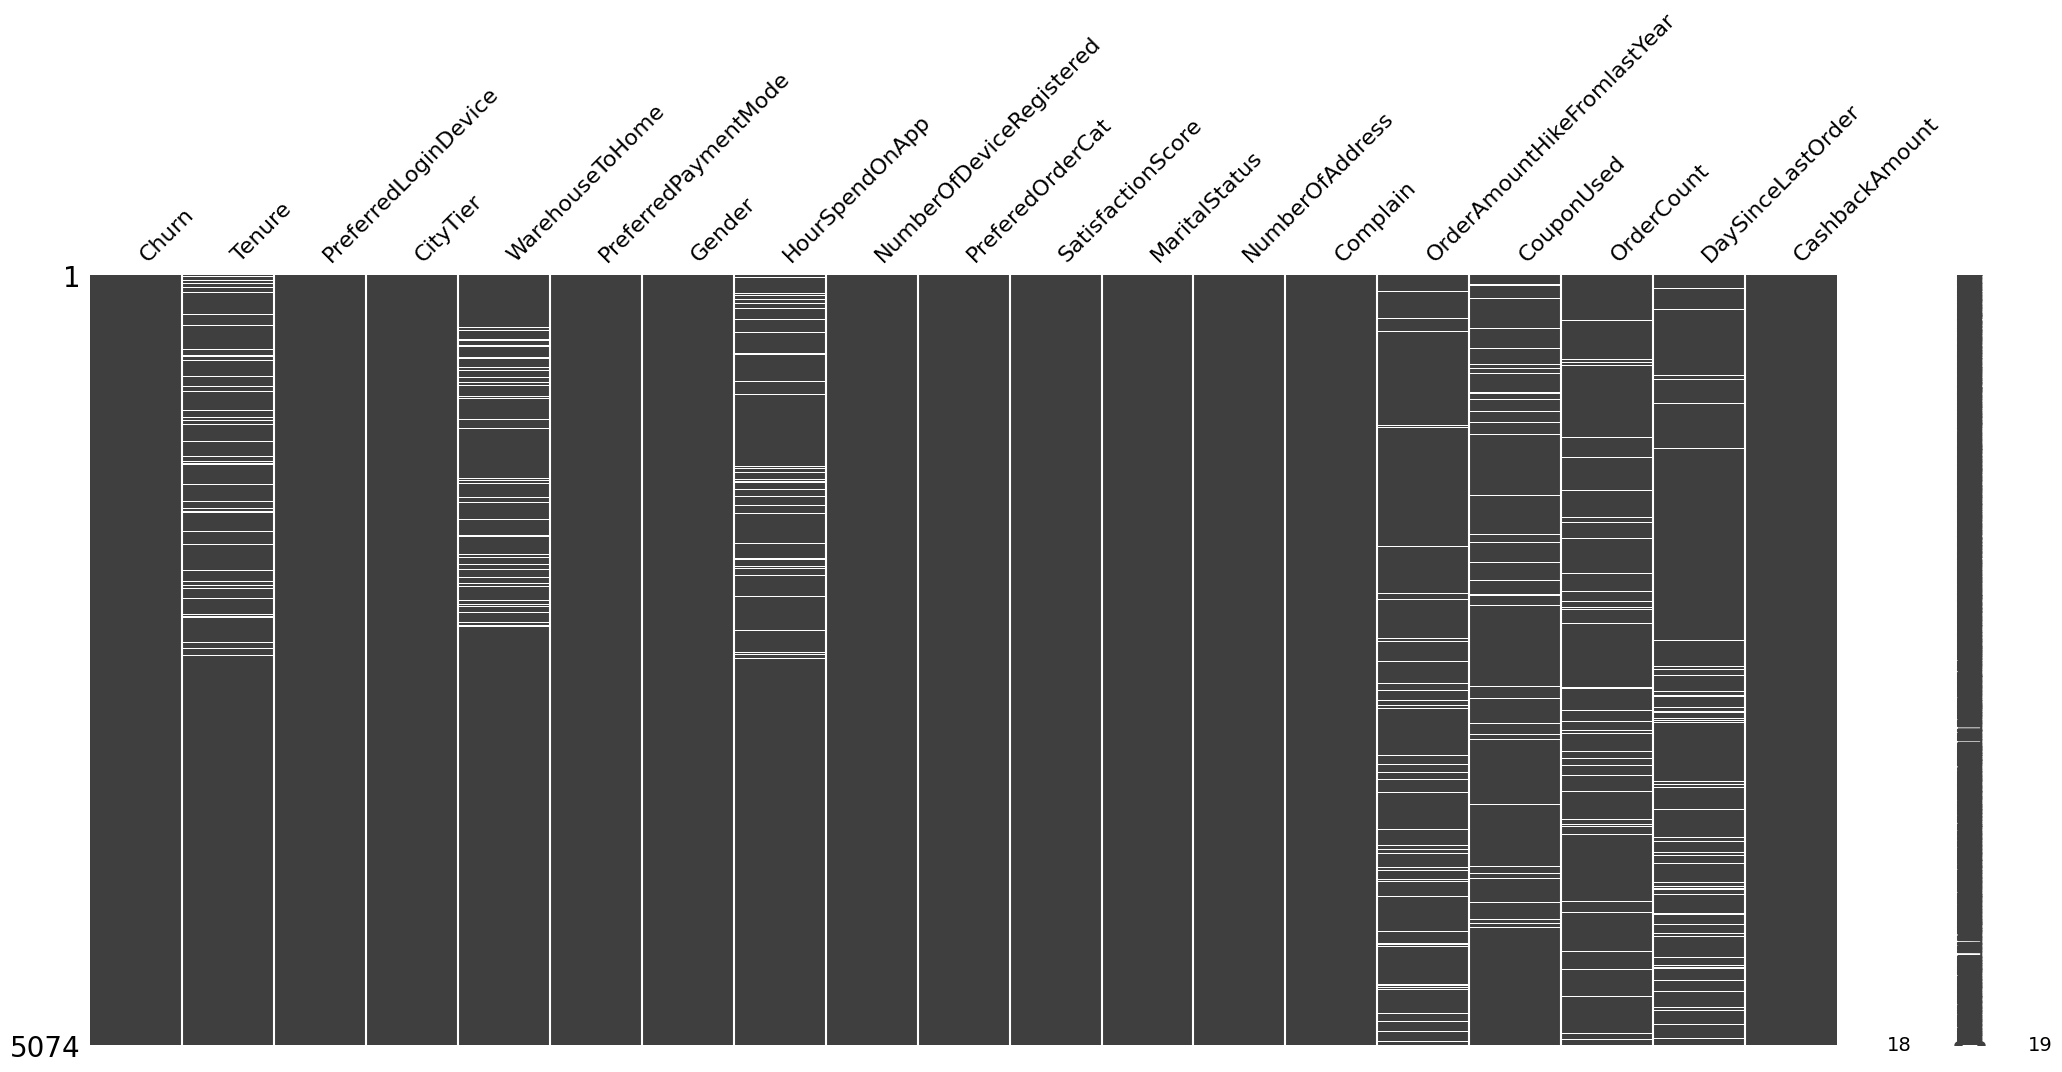

In [154]:
# visualisasi matrixplot menggunakan missingno
import missingno as msno
msno.matrix(df)

- Missing value pada setiap kolom memiliki pola yang cukup acak, yang artinya: terdapat banyak informasi penting pada kolom-kolom lain yang mungkin berkaitan dengan analisa dan pemodelan. Sehingga dibutuhkan penanganan pengisian missing value.

- Dilakukan visualisasi heatmap untuk melihat korelasi antar kolom yang memiliki missing value, untuk melihat keterkaitan antara kolom-kolom tersebut 

<Axes: >

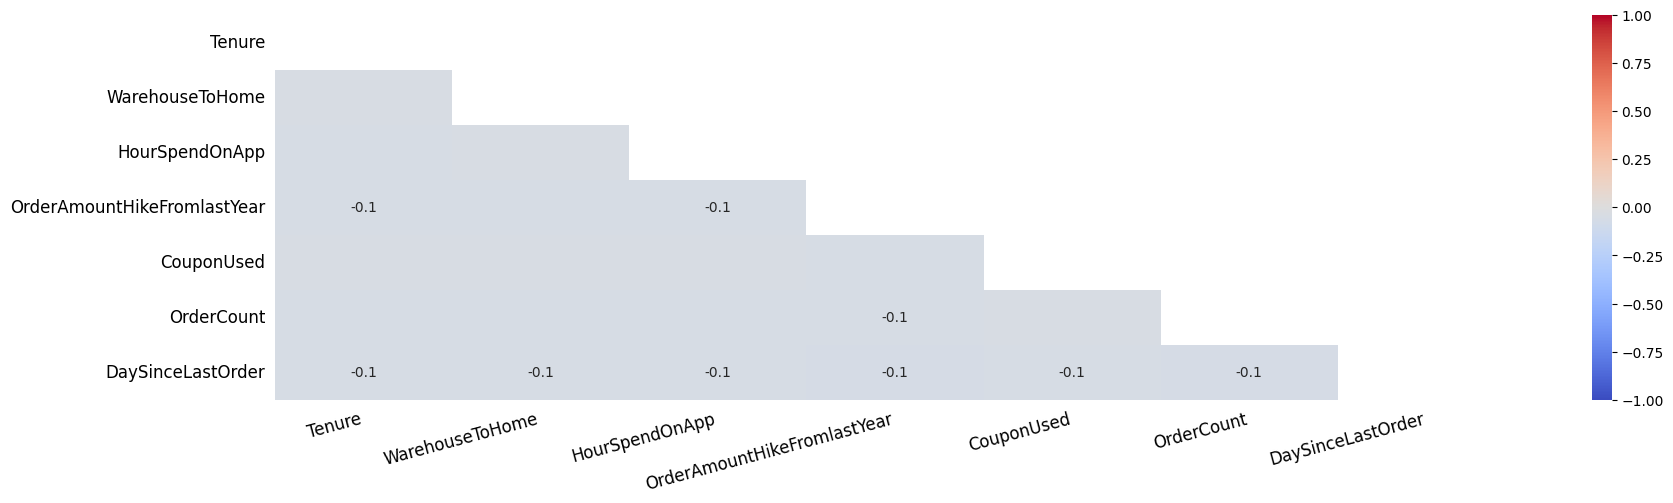

In [155]:
# heatmap matrix missingno
msno.heatmap(df, cmap='coolwarm', figsize=(20,5), fontsize=12,label_rotation=15)

- Korelasi heatmap pada tabel, menunjukkan adanya korelasi negatif antara kolom-kolom dengan missing value. Dalam hal ini, nilai -0.1 menunjukkan hubungan yang sangat lemah antara keberadaan missing value di satu kolom dengan keberadaan missing value pada kolom lainnya, yang artinya : ketika ada missing value pada satu kolom, kemungkinan kolom lainnya mengalami hal yang sama sangat kecil. Berdasarkan [tipe missing value](https://stefvanbuuren.name/fimd/sec-MCAR.html) yang diklasifikasikan sebagai berikut: 

    | **Tipe Missing Data**|**Definisi**|
    |--------------|-----|
    | Missing Completely at Random (MCAR) | Data dianggap hilang sepenuhnya secara acak ketika probabilitas kehilangan data sama untuk semua kasus, tanpa hubungan dengan data itu sendiri.| 
    | Missing at Random (MAR)  | Data hilang secara acak jika probabilitas kehilangan hanya sama dalam kelompok yang ditentukan oleh data yang diamati.| 
    | Missing Not at Random (MNAR) | Data hilang tidak secara acak jika probabilitas kehilangan bervariasi karena alasan yang tidak kita ketahui.|

    Maka missing value ini dapat dikategorikan sebagai *Missing Completely at Random* (MCAR).

- Sebagai pertimbangan pengisian missing value, akan dilakukan visualisasi heatmap secara menyeluruhan untuk melihat keterhubungan antara kolom, apakah ada kolom-kolom yang berkorelasi dengan kolom-kolom yang memiliki missing value.



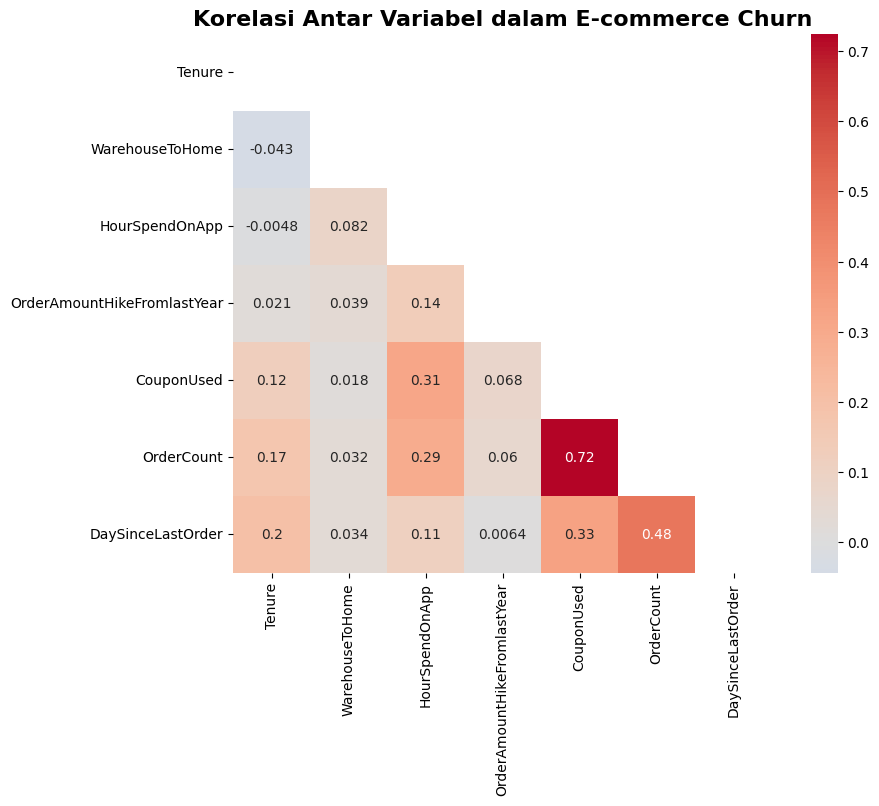

In [156]:
# heatmap kolom-kolom dengan missing value
correlation_matrix = df[['Tenure','WarehouseToHome','HourSpendOnApp','OrderAmountHikeFromlastYear','CouponUsed','OrderCount','DaySinceLastOrder']].corr(method='spearman')
correlation_matrix
plt.figure(figsize=(10,7))
matrix = np.triu(correlation_matrix)
plt.title('Korelasi Antar Variabel dalam E-commerce Churn', size=16, fontweight='bold')
sns.heatmap(data=correlation_matrix, annot=True, cmap='coolwarm', center=0, square=True, mask=matrix)
plt.show()

- `CouponUsed` dan `OrderCount` memiliki korelasi positif yang kuat (0.72), yang menunjukkan bahwa semakin banyak kupon digunakan, semakin banyak pesanan yang akan terjadi. Hal ini dapat mengindikasikan bahwa penggunaan kupon memiliki dampak yang signifikan pada jumlah pesanan.
    
- `OrderCount` dan `DaySinceLastOrder` memiliki korelasi positif menengah (0.48), yang menunjukkan bahwa semakin banyak waktu berlalu sejak pesanan terakhir, semakin banyak juga pesanan yang akan terjadi. Hal ini dapat mengindikasikan bahwa konsumen yang tidak aktif untuk waktu yang lama cenderung memesan lebih banyak saat konsumen tersebut kembali aktif.

- Berdasarkan analisa pada missing value, maka akan dilakukan pengisiin missing value dibandingkan penghapusan missing value, dengan alasan:

    - Menghapus data dengan missing value berpotensi menghilangkan informasi penting terkait perilaku konsumen yang dapat memengaruhi churn.

    - Mengurangi ukuran sampel dapat berdampak negatif pada analisis churn; menjaga semua data menghasilkan hasil yang lebih representatif dan akurat.
    - Missing value bisa mencerminkan variasi dalam populasi konsumen dan menghapus data mungkin dapat menghilangkan konteks penting untuk analisis.
    - Missing value sering terkait dengan variabel yang berpengaruh terhadap churn; mengisi data tersebut memungkinkan analisis hubungan antar variabel yang lebih baik.
    - Mempertahankan dan mengisi data yang memiliki korelasi dengan churn sangat penting untuk analisis lebih lanjut.
    - Terdapat berbagai metode imputasi yang dapat digunakan untuk mengisi missing value tanpa kehilangan informasi berharga untuk analisis churn.

- Penanganan missing value: 

    - Kolom-kolom yang memiliki korelasi kuat memerlukan strategi dalam imputasi, penanganan missing value dapat dipertimbangkan dengan cara mempertahankan keterhubungan antara kolom-kolom tersebut, dalam kasus ini adalah kolom `CouponUsed` dan `OrderCount`. 
        
    - Sebaliknya, kolom dengan korelasi rendah tidak mempengaruhi kolom lain secara langsung, yang artinya: dapat dilakukan imputasi dengan metode yang lebih sederhana seperti median (untuk numerikal) ataupun modus (untuk kategorikal).


## **3.3 Analisa *Outlier***

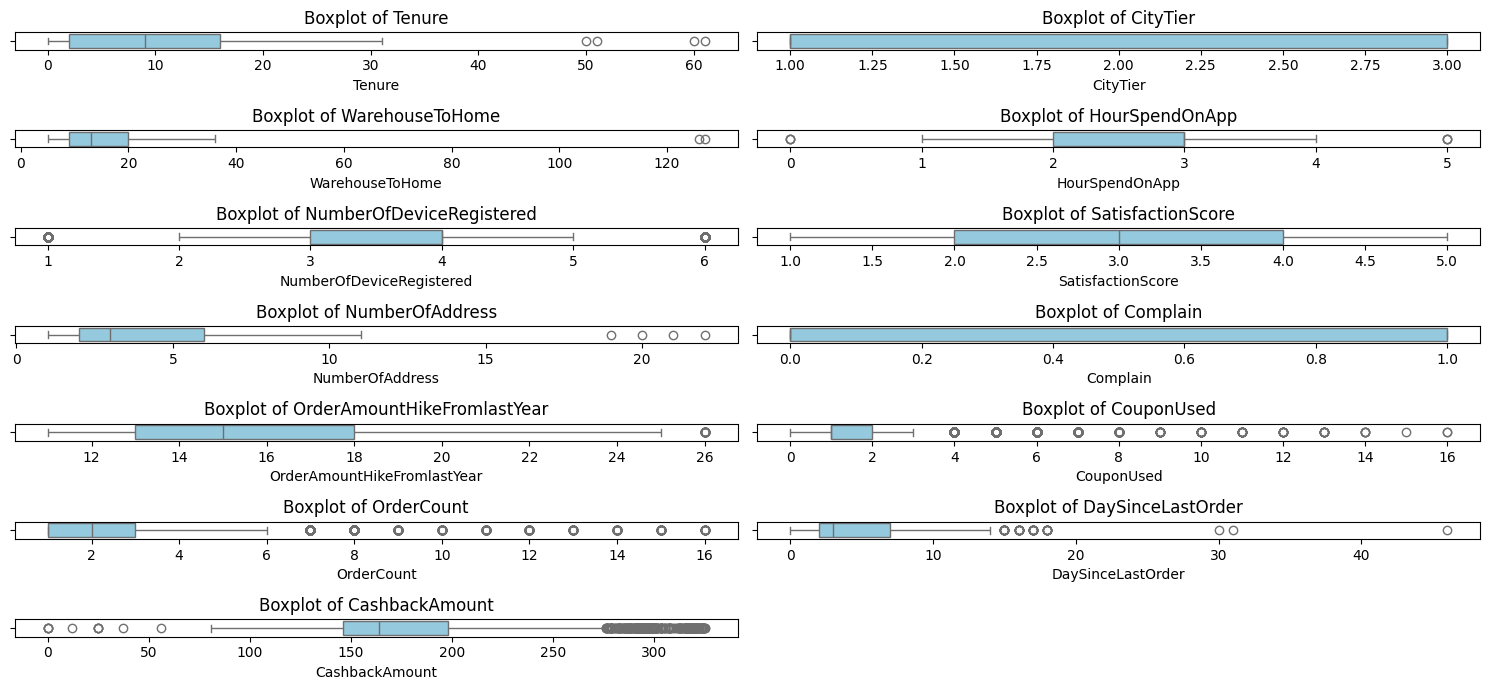

Tabel daftar outlier


Kolom  Jumlah outlier lower limit  \
0                       Tenure                           0   
1              WarehouseToHome                           0   
2               HourSpendOnApp                           3   
3     NumberOfDeviceRegistered                         217   
4              NumberOfAddress                           0   
5  OrderAmountHikeFromlastYear                           0   
6                   CouponUsed                           0   
7                   OrderCount                           0   
8            DaySinceLastOrder                           0   
9               CashbackAmount                          11   

   Jumlah outlier upper limit Total outlier  \
0                           4         0.08%   
1                           2         0.04%   
2                           3         0.12%   
3                         146         7.15%   
4                           4         0.08%   
5                          29         0.57%   
6                         610        12.02%   
7                         673        13.26%   
8                          57         1.12%   
9                         371         7.53%   

  Outlier lower limit adalah value (<=)  Outlier upper limit adalah value (>=)  
0                                  None                                  50.00  
1                                  None                                 126.00  
2                                   0.0                                   5.00  
3                                     1                                   6.00  
4                                  None                                  19.00  
5                                  None                                  26.00  
6                                  None                                   4.00  
7                                  None                                   7.00  
8                                  None                                  15.00  
9                                  56.0                                 276.03

In [157]:
# kolom numerikal
kolom=['Tenure','CityTier','WarehouseToHome','HourSpendOnApp','NumberOfDeviceRegistered','SatisfactionScore','NumberOfAddress','Complain','OrderAmountHikeFromlastYear','CouponUsed','OrderCount','DaySinceLastOrder','CashbackAmount']

# pengecekan outlier
result=[]

for i in kolom:
    Q1= df[i].quantile(0.25)
    Q3= df[i].quantile(0.75)
    IQR = Q3-Q1

    outlier_lower_limit=Q1-1.5*IQR
    outlier_upper_limit=Q3+1.5*IQR

    lower_limit_outliers = df[df[i]< outlier_lower_limit].sort_values(i)
    upper_limit_outliers = df[df[i]> outlier_upper_limit].sort_values(i)
    total_outliers=len(lower_limit_outliers)+len(upper_limit_outliers)
    total_data=len(df)
    if total_outliers>0:
        result.append({
        'Kolom' : i,
        'Jumlah outlier lower limit': len(lower_limit_outliers),
        'Jumlah outlier upper limit': len(upper_limit_outliers),
        'Total outlier': f'{(total_outliers/total_data) * 100:.2f}%',
        'Outlier lower limit adalah value (<=)': lower_limit_outliers[i].max() if len(lower_limit_outliers)>0 else 'None',
        'Outlier upper limit adalah value (>=)': upper_limit_outliers[i].min() if len(upper_limit_outliers)>0 else 'None'})

num_col=2
num_row=(len(kolom)+1)//num_col

fig,axes=plt.subplots(nrows=num_row,ncols=num_col,figsize=(15,num_row))
axes=axes.flatten()
for i, kol in enumerate(kolom):
    sns.boxplot(x=df[kol],ax=axes[i],color='skyblue')
    axes[i].set_title(f'Boxplot of {kol}')
    axes[i].set_xlabel(kol)
for j in range(len(kolom),len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.show()
print('Tabel daftar outlier')
outlier_=pd.DataFrame(result)
outlier_


- Terdapat outlier pada dataset yang berkisar antara 0.04%-13.26%, akan dilakukan eksplorasi data per kolom yang akan menjadi pertimbangan untuk penanganan outlier yang tepat.

## **3.4 Evaluasi Data**

Bagian ini bertujuan untuk memberikan gambaran lebih mendalam mengenai kondisi data pada setiap kolom, serta melalukan penanganan missing value dan outlier, yang mana pada bagian ini penanggulanggan tersebut tidak menggunakan pipeline. Hal ini dilakukan semata-mata hanya untuk keperluan analisis dan pemahaman data yang lebih lanjut.

### **3.4.1 Kolom `Tenure`**

In [158]:
print('Jumlah data unik pada kolom : ', df['Tenure'].nunique())
print('Nilai unik pada kolom : ', df['Tenure'].unique())
print('Nilai min pada kolom : ', df['Tenure'].min())
print('Nilai max pada kolom : ', df['Tenure'].max())

Jumlah data unik pada kolom :  36
Nilai unik pada kolom :  [ 4. nan  0. 13. 11.  9. 19. 20. 14.  8. 18.  5.  2. 30.  1. 23.  3. 29.
  6. 26. 28.  7. 24. 25. 10. 15. 22. 27. 16. 12. 21. 17. 50. 60. 31. 51.
 61.]
Nilai min pada kolom :  0.0
Nilai max pada kolom :  61.0


In [159]:
df['Tenure'].value_counts(ascending=True)

Tenure
61.0      1
60.0      1
50.0      1
51.0      1
31.0     46
25.0     52
29.0     52
26.0     56
27.0     59
28.0     61
30.0     63
22.0     65
24.0     71
21.0     74
23.0     80
17.0     97
20.0     99
18.0    110
19.0    125
16.0    137
15.0    143
2.0     152
12.0    158
14.0    158
13.0    163
6.0     166
11.0    174
3.0     176
4.0     185
5.0     189
7.0     195
10.0    196
9.0     228
8.0     233
0.0     457
1.0     619
Name: count, dtype: int64

- Pada pembahasan sebelumnya, terdapat 231 missing value dan 0.08% outlier pada kolom `Tenure`

**Penanganan Outlier**

In [160]:
# outlier
df[df['Tenure']>=50]['Tenure']

928     50.0
2719    60.0
3743    51.0
5534    61.0
Name: Tenure, dtype: float64

Melalui analisis value_count, kami menemukan empat nilai outlier pada kolom Tenure, yaitu 50, 51, 60, dan 61. Nilai-nilai ini dianggap anomali karena jaraknya yang jauh dari rentang nilai lainnya, yang berkisar antara 1 hingga 31.

Menghapus outlier ini sangat penting dalam analisis churn, karena nilai yang tidak realistis dapat mengurangi pemahaman tentang perilaku konsumen. Tenure yang tinggi mungkin menunjukkan bahwa konsumen tidak lagi relevan untuk analisis saat ini. Dengan data Tenure yang lebih konsisten, kami dapat memperoleh insight yang lebih akurat.

In [161]:
# drop outlier
df=df.drop(df[df['Tenure']>31].index)

**Penanganan Missing Value**

In [162]:
# mengisi missing value dengan median 
df['Tenure'] = df['Tenure'].fillna(df['Tenure'].median())

In [163]:
# Cek missing value kembali
df['Tenure'].isnull().sum()

0

### **3.4.2 Kolom `PreferredLoginDevice`**

In [164]:
print('Jumlah data unik pada kolom : ', df['PreferredLoginDevice'].nunique())
print('Nilai unik pada kolom : ', df['PreferredLoginDevice'].unique())

Jumlah data unik pada kolom :  3
Nilai unik pada kolom :  ['Mobile Phone' 'Phone' 'Computer']


**Penyesuaian Value**

- Pada kolom `PreferredLoginDevice`, terdapat value "Phone" yang tampaknya seharusnya merujuk pada "Mobile Phone". Mengingat bahwa "Phone" umumnya berarti alat komunikasi yang tidak mendukung akses internet, sementara akses internet diperlukan untuk penggunaan E-Commerce. "Phone" dalam kontesk ini dapat dianggap sebagai humman error. Oleh karena itu, "Phone" akan diperbaharui menjadi "Mobile Phone" untuk konsistensi data.

In [165]:
df['PreferredLoginDevice']=df['PreferredLoginDevice'].replace('Phone', 'Mobile Phone')

In [166]:
#value setelah di sesuaikan
print('Jumlah data unik pada kolom : ', df['PreferredLoginDevice'].nunique())
print('Nilai unik pada kolom : ', df['PreferredLoginDevice'].unique())

Jumlah data unik pada kolom :  2
Nilai unik pada kolom :  ['Mobile Phone' 'Computer']


### **3.4.3 Kolom `WarehouseToHome`**

In [167]:
print('Jumlah data unik pada kolom : ', df['WarehouseToHome'].nunique())
print('Nilai unik pada kolom : ', df['WarehouseToHome'].unique())
print('Nilai min pada kolom : ', df['WarehouseToHome'].min())
print('Nilai max pada kolom : ', df['WarehouseToHome'].max())

Jumlah data unik pada kolom :  34
Nilai unik pada kolom :  [  6.   8.  30.  15.  12.  22.  11.   9.  31.  18.  13.  20.  29.  28.
  26.  14.  nan  10.  27.  17.  23.  33.  19.  35.  24.  16.  25.  32.
  34.   5.  21. 126.   7.  36. 127.]
Nilai min pada kolom :  5.0
Nilai max pada kolom :  127.0


- Pada pembahasan sebelumnya, terdapat 221 missing value dan 0.04% outlier pada kolom `WarwhouseToHome`

**Penanganan Outlier**

In [168]:
# outlier
df[df['WarehouseToHome']>=126]['WarehouseToHome']

1309    126.0
4124    127.0
Name: WarehouseToHome, dtype: float64

Jika kita amati, nilai outlier dalam kolom WarehouseToHome menunjukkan perbedaan yang mencolok dibandingkan dengan nilai-nilai lainnya. Jarak 126 dan 127 jelas terlihat sangat jauh dari rentang nilai yang lebih umum.

Dari perspektif bisnis, jarak yang sangat besar ini dapat membawa dampak negatif bagi perusahaan, baik dari segi waktu maupun biaya pengiriman. Pengiriman barang ke alamat yang jauh dapat memperlambat proses pengiriman dan meningkatkan biaya logistik, yang pada akhirnya bisa merugikan profitabilitas perusahaan.

Selain itu, secara prosentase, nilai outlier ini hanya mencakup 0.02% dari keseluruhan data. Dengan jumlah yang sangat kecil ini, mempertahankan outlier tersebut tidak akan memberikan nilai tambah yang signifikan bagi analisis keseluruhan.

Oleh karena itu, demi menjaga integritas dan akurasi data, outlier pada kolom WarehouseToHome akan dihapus dari dataset.

In [169]:
# drop outlier
df=df.drop(df[df['WarehouseToHome']>=126].index)

**Penanganan Missing Value**

In [170]:
# mengisi missing value dengan median 
df['WarehouseToHome'] = df['WarehouseToHome'].fillna(df['WarehouseToHome'].median())

In [171]:
# Cek missing value kembali
df['Tenure'].isnull().sum()

0

### **3.4.4 Kolom `PreferredPaymentMode`**

In [172]:
print('Jumlah data unik pada kolom : ', df['PreferredPaymentMode'].nunique())
print('Nilai unik pada kolom : ', df['PreferredPaymentMode'].unique())

Jumlah data unik pada kolom :  7
Nilai unik pada kolom :  ['Debit Card' 'UPI' 'CC' 'Cash on Delivery' 'E wallet' 'COD' 'Credit Card']


**Penyesuaian Value**

- Pada kolom `PreferredPaymentMode`, terdapat beberapa value yang memiliki makna yang sama namun ditulis dengan cara yang berbeda. Untuk mengatasi hal tersebut akan dilakukan perbaharuan value sebagai berikut:
    
    - "COD" dan "Cash on Delivery" keduanya merujuk pada metode pembayaran yang sama, yaitu pembayaran tunai saat pengiriman. Oleh karena itu, "COD" akan diseragamkan menjadi "Cash on Delivery"

    - "CC" dan "Credit Card" keduanya merujuk pada metode pembayaran yang sama, yaitu kartu kredit. Oleh karena itu, "CC" akan diseragamkan menjadi "Credit Card"

In [173]:
df['PreferredPaymentMode']=df['PreferredPaymentMode'].replace('COD', 'Cash on Delivery')
df['PreferredPaymentMode']=df['PreferredPaymentMode'].replace('CC', 'Credit Card')

In [174]:
#value setelah di sesuaikan
print('Jumlah data unik pada kolom : ', df['PreferredPaymentMode'].nunique())
print('Nilai unik pada kolom : ', df['PreferredPaymentMode'].unique())

Jumlah data unik pada kolom :  5
Nilai unik pada kolom :  ['Debit Card' 'UPI' 'Credit Card' 'Cash on Delivery' 'E wallet']


### **3.4.5 Kolom `HourSpendOnApp`**

In [175]:
print('Jumlah data unik pada kolom : ', df['HourSpendOnApp'].nunique())
print('Nilai unik pada kolom : ', df['HourSpendOnApp'].unique())
print('Nilai min pada kolom : ', df['HourSpendOnApp'].min())
print('Nilai max pada kolom : ', df['HourSpendOnApp'].max())

Jumlah data unik pada kolom :  6
Nilai unik pada kolom :  [ 3.  2. nan  1.  0.  4.  5.]
Nilai min pada kolom :  0.0
Nilai max pada kolom :  5.0


In [176]:
df['HourSpendOnApp'].value_counts()

HourSpendOnApp
3.0    2412
2.0    1331
4.0    1056
1.0      33
0.0       3
5.0       3
Name: count, dtype: int64

- Pada pembahasan sebelumnya, terdapat 230 missing value dan 0.012% outlier pada kolom `HourSpendOnApp`

**Penanganan Outlier**

In [177]:
df[(df['HourSpendOnApp']>=5)|(df['HourSpendOnApp']<=0)].head()

Churn  Tenure PreferredLoginDevice  CityTier  WarehouseToHome  \
150       0    10.0             Computer         1              6.0   
950       0     5.0         Mobile Phone         1             16.0   
1950      0    11.0             Computer         1             18.0   
4223      0    31.0         Mobile Phone         3             32.0   
4248      0     4.0         Mobile Phone         1              9.0   

     PreferredPaymentMode  Gender  HourSpendOnApp  NumberOfDeviceRegistered  \
150           Credit Card  Female             0.0                         3   
950           Credit Card    Male             0.0                         3   
1950           Debit Card    Male             0.0                         4   
4223           Debit Card  Female             5.0                         4   
4248           Debit Card    Male             5.0                         5   

        PreferedOrderCat  SatisfactionScore MaritalStatus  NumberOfAddress  \
150              Fashion                  2       Married                3   
950              Fashion                  1        Single                3   
1950  Laptop & Accessory                  5       Married                3   
4223             Fashion                  5        Single                9   
4248  Laptop & Accessory                  1       Married                3   

      Complain  OrderAmountHikeFromlastYear  CouponUsed  OrderCount  \
150          1                         18.0         0.0         NaN   
950          0                         25.0         0.0         1.0   
1950         0                         15.0         1.0         1.0   
4223         0                         12.0         7.0         8.0   
4248         0                         20.0         4.0        11.0   

      DaySinceLastOrder  CashbackAmount  
150                 2.0          236.03  
950                 NaN          212.44  
1950                2.0          162.88  
4223               10.0          201.37  
4248                9.0          166.52

Setelah diamati, hal ini masih dianggap wajar, sehingga data outlier akan tetap dibiarkan seperti data aslinya.

**Penanganan Missing Value**

In [178]:
# mengisi missing value dengan median 
df['HourSpendOnApp'] = df['HourSpendOnApp'].fillna(df['HourSpendOnApp'].median())

In [179]:
# Cek missing value kembali
df['HourSpendOnApp'].isnull().sum()

0

### **3.4.6 Kolom `NumberOfDeviceRegistered`**

In [180]:
print('Jumlah data unik pada kolom : ', df['NumberOfDeviceRegistered'].nunique())
print('Nilai unik pada kolom : ', df['NumberOfDeviceRegistered'].unique())
print('Nilai min pada kolom : ', df['NumberOfDeviceRegistered'].min())
print('Nilai max pada kolom : ', df['NumberOfDeviceRegistered'].max())

Jumlah data unik pada kolom :  6
Nilai unik pada kolom :  [3 4 5 2 1 6]
Nilai min pada kolom :  1
Nilai max pada kolom :  6


In [181]:
df['NumberOfDeviceRegistered'].value_counts()

NumberOfDeviceRegistered
4    2133
3    1520
5     799
2     254
1     216
6     146
Name: count, dtype: int64

- Pada pembahasan sebelumnya, terdapat 7.15% outlier pada kolom `NumberOfDeviceRegistered`

In [182]:
df[(df['NumberOfDeviceRegistered']<=1)|(df['NumberOfDeviceRegistered']>=6)].head()

Churn  Tenure PreferredLoginDevice  CityTier  WarehouseToHome  \
441      1    10.0             Computer         3             33.0   
449      0     7.0         Mobile Phone         1              6.0   
453      0    11.0             Computer         1              8.0   
457      0    13.0             Computer         1              8.0   
460      1     9.0         Mobile Phone         1             12.0   

    PreferredPaymentMode  Gender  HourSpendOnApp  NumberOfDeviceRegistered  \
441           Debit Card  Female             3.0                         1   
449           Debit Card  Female             3.0                         1   
453           Debit Card  Female             3.0                         1   
457          Credit Card  Female             2.0                         1   
460           Debit Card    Male             3.0                         1   

       PreferedOrderCat  SatisfactionScore MaritalStatus  NumberOfAddress  \
441  Laptop & Accessory                  3        Single                5   
449              Mobile                  2        Single                3   
453  Laptop & Accessory                  5        Single                7   
457  Laptop & Accessory                  4      Divorced                2   
460        Mobile Phone                  5      Divorced                2   

     Complain  OrderAmountHikeFromlastYear  CouponUsed  OrderCount  \
441         1                         12.0         1.0         1.0   
449         0                         16.0         0.0         1.0   
453         1                         12.0         4.0         4.0   
457         0                         24.0         0.0         3.0   
460         1                         21.0         1.0         1.0   

     DaySinceLastOrder  CashbackAmount  
441                3.0          163.97  
449                3.0          132.80  
453               12.0          159.80  
457                7.0          142.44  
460                0.0          116.01

Setelah diamati, hal tersebut masih sangat masuk akal. Outlier dengan nilai 1 mengindikasikan bahwa konsumen hanya menggunakan 1 device untuk mengakses e-commerce. Sedangkan outlier dengan nilai 6 juga masih sangat masuk akal, mengingat adanya kemungkian pergantian device milik konsumen untuk mengakses layanan. Sehingga outlier pada `NumberOfDeviceRegistered` akan dibiarkan saja.

### **3.4.7 Kolom `NumberOfAddress`**

In [183]:
print('Jumlah data unik pada kolom : ', df['NumberOfAddress'].nunique())
print('Nilai unik pada kolom : ', sorted(df['NumberOfAddress'].unique()))
print('Nilai min pada kolom : ', df['NumberOfAddress'].min())
print('Nilai max pada kolom : ', df['NumberOfAddress'].max())

Jumlah data unik pada kolom :  15
Nilai unik pada kolom :  [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 19, 20, 21, 22]
Nilai min pada kolom :  1
Nilai max pada kolom :  22


In [184]:
df['NumberOfAddress'].value_counts()

NumberOfAddress
2     1244
3     1149
4      522
5      512
6      344
1      341
8      249
7      234
9      212
10     173
11      84
19       1
21       1
20       1
22       1
Name: count, dtype: int64

- Pada pembahasan sebelumnya, terdapat 0.08% outlier pada kolom `NumberOfAdress`

Berdasarkan pengamatan pada aplikasi e-commerce yang telah ada, batas maksimal alamat yang dapat dicantumkan oleh pengguna adalah 10 alamat. Kebijakan ini memiliki beberapa tujuan penting:

1. Memperkuat Keakuratan Data: Dengan membatasi jumlah alamat, perusahaan dapat lebih mudah mengelola dan memverifikasi data konsumen, sehingga memastikan bahwa informasi yang disimpan adalah valid.

2. Memfasilitasi Pembaruan Data: Kebijakan ini juga memberikan ruang bagi konsumen untuk memperbarui informasi alamat mereka dengan lebih efisien, tanpa risiko penumpukan data yang tidak relevan.

Dengan demikian, nilai NumberOfAddress yang melebihi 10 akan dihapus, karena dianggap sebagai data tidak valid dan untuk mencegah adanya data fiktif dari konsumen.

In [185]:
# drop outlier
df=df.drop(df[df['NumberOfAddress']>10].index)

### **3.4.8 Kolom `OrderAmountHikeFromlastYear`**

In [186]:
print('Jumlah data unik pada kolom : ', df['OrderAmountHikeFromlastYear'].nunique())
print('Nilai unik pada kolom : ', sorted(df['OrderAmountHikeFromlastYear'].unique()))
print('Nilai min pada kolom : ', df['OrderAmountHikeFromlastYear'].min())
print('Nilai max pada kolom : ', df['OrderAmountHikeFromlastYear'].max())

Jumlah data unik pada kolom :  16
Nilai unik pada kolom :  [11.0, 12.0, 13.0, 14.0, 15.0, 16.0, 17.0, 18.0, 19.0, 20.0, 21.0, 22.0, 23.0, nan, 24.0, 25.0, 26.0]
Nilai min pada kolom :  11.0
Nilai max pada kolom :  26.0


In [187]:
df['OrderAmountHikeFromlastYear'].value_counts()

OrderAmountHikeFromlastYear
13.0    667
14.0    660
12.0    652
15.0    455
11.0    345
16.0    290
18.0    283
19.0    280
17.0    258
20.0    216
21.0    171
22.0    162
23.0    129
24.0     74
25.0     66
26.0     29
Name: count, dtype: int64

- Pada pembahasan sebelumnya, terdapat 252 missing value dan 0.57% outlier pada kolom `OrderAmountHikeFromlastYear`

**Penanganan Outlier**

In [188]:
df[df['OrderAmountHikeFromlastYear']>=26].head()

Churn  Tenure PreferredLoginDevice  CityTier  WarehouseToHome  \
2868      0    20.0         Mobile Phone         3              7.0   
2941      0    13.0             Computer         1              9.0   
2971      0    16.0         Mobile Phone         3              7.0   
3124      0     5.0         Mobile Phone         1             16.0   
3366      0     9.0         Mobile Phone         1             28.0   

     PreferredPaymentMode  Gender  HourSpendOnApp  NumberOfDeviceRegistered  \
2868             E wallet  Female             4.0                         4   
2941     Cash on Delivery  Female             4.0                         4   
2971           Debit Card    Male             3.0                         4   
3124           Debit Card    Male             3.0                         4   
3366           Debit Card  Female             3.0                         4   

        PreferedOrderCat  SatisfactionScore MaritalStatus  NumberOfAddress  \
2868             Fashion                  5       Married                3   
2941             Fashion                  3        Single                2   
2971  Laptop & Accessory                  3      Divorced                3   
3124             Fashion                  4       Married                3   
3366  Laptop & Accessory                  2      Divorced                3   

      Complain  OrderAmountHikeFromlastYear  CouponUsed  OrderCount  \
2868         0                         26.0         5.0        16.0   
2941         0                         26.0        11.0         NaN   
2971         0                         26.0         5.0        12.0   
3124         0                         26.0         2.0         2.0   
3366         1                         26.0         1.0         2.0   

      DaySinceLastOrder  CashbackAmount  
2868                NaN          229.53  
2941                9.0          234.38  
2971                7.0          174.07  
3124                9.0          231.48  
3366                8.0          165.14

Setelah diamati, data outlier jumlahnya terbatas (hanya 29 entri) dan data ini masih berada dalam batas yang dapat diterima serta tidak tergolong sebagai outlier yang ekstrim. Penghapusan data ini justru dapat mengurangi informasi yang berharga bagi analisis tren dan pola pembelian. Oleh karena itu, diputuskan bahwa data outlier ini layak dipertahankan dalam analisis, dengan alasan: 

1. Dalam konteks e-commerce, adanya peningkatan signifikan dalam jumlah pesanan dari tahun ke tahun bisa jadi mencerminkan pertumbuhan yang positif. Faktor-faktor seperti promosi, peluncuran produk baru, atau peningkatan kualitas layanan dapat berkontribusi pada kenaikan yang tinggi.

2. Peningkatan pesanan yang besar bisa saja berasal dari segmen konsumen tertentu yang sangat aktif atau loyal. Misalnya, pelanggan yang sering berbelanja atau yang terlibat dalam program loyalitas dapat menunjukkan pola pengeluaran yang lebih tinggi.

**Penanganan Missing Value**

In [189]:
# mengisi missing value dengan median 
df['OrderAmountHikeFromlastYear'] = df['OrderAmountHikeFromlastYear'].fillna(df['OrderAmountHikeFromlastYear'].median())

In [190]:
# cek missing value kembali
df['OrderAmountHikeFromlastYear'].isnull().sum()

0

### **3.4.9 Kolom `CouponUsed`**

In [191]:
print('Jumlah data unik pada kolom : ', df['CouponUsed'].nunique())
print('Nilai unik pada kolom : ', sorted(df['CouponUsed'].unique()))
print('Nilai min pada kolom : ', df['CouponUsed'].min())
print('Nilai max pada kolom : ', df['CouponUsed'].max())

Jumlah data unik pada kolom :  17
Nilai unik pada kolom :  [0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 11.0, nan, 10.0, 12.0, 13.0, 14.0, 15.0, 16.0]
Nilai min pada kolom :  0.0
Nilai max pada kolom :  16.0


- Pada pembahasan sebelumnya, terdapat 210 missing value dan 12.02% outlier pada kolom `CouponUsed`

**Penanganan Outlier**

In [192]:
# outlier
df[df['CouponUsed']>=4].head()

Churn  Tenure PreferredLoginDevice  CityTier  WarehouseToHome  \
5       1     0.0             Computer         1             22.0   
10      1     4.0         Mobile Phone         1             18.0   
20      1     0.0         Mobile Phone         3             12.0   
21      1    20.0         Mobile Phone         1             29.0   
47      0     9.0             Computer         1              9.0   

   PreferredPaymentMode  Gender  HourSpendOnApp  NumberOfDeviceRegistered  \
5            Debit Card  Female             3.0                         5   
10     Cash on Delivery  Female             2.0                         3   
20           Debit Card    Male             3.0                         5   
21          Credit Card  Female             3.0                         3   
47          Credit Card    Male             1.0                         3   

      PreferedOrderCat  SatisfactionScore MaritalStatus  NumberOfAddress  \
5         Mobile Phone                  5        Single                2   
10              Others                  3      Divorced                2   
20  Laptop & Accessory                  3      Divorced                5   
21             Fashion                  2      Divorced                2   
47              Mobile                  4        Single                5   

    Complain  OrderAmountHikeFromlastYear  CouponUsed  OrderCount  \
5          1                         22.0         4.0         6.0   
10         0                         15.0         9.0        15.0   
20         1                         18.0         6.0         7.0   
21         0                         12.0        11.0        15.0   
47         0                         12.0         4.0         7.0   

    DaySinceLastOrder  CashbackAmount  
5                 7.0          139.19  
10                8.0          295.45  
20                7.0          161.72  
21                6.0          203.12  
47                2.0          120.88

Berdasarkan persentase outlier, besarannya memang tergolong signifikan, namun keberadaan outlier tersebut adalah wajar dan akan dipertahankan, dengan alasan: 

1. Penggunaan kupon dalam e-commerce seringkali berfluktuasi, terutama selama periode promosi atau acara spesial, sehingga variasi jumlah kupon yang digunakan oleh konsumen dapat mencerminkan perilaku belanja yang normal. 

2. Konsumen yang memanfaatkan kupon secara intensif dapat menunjukkan keterlibatan yang tinggi dengan brand, dan penghapusan data ini mungkin berpotensi menghilangkan informasi tentang segmen konsumen yang responsif terhadap penawaran. 

**Penanganan Missing Value**

In [193]:
filtered_df=df.dropna(subset=['OrderCount','CouponUsed'])
med_couponused_byordercount=filtered_df.groupby('OrderCount')['CouponUsed'].median()

df['CouponUsed']=df['CouponUsed'].fillna(df['OrderCount'].map(med_couponused_byordercount))

In [194]:
# Cek missing value kembali
df['CouponUsed'].isnull().sum()

0

### **3.4.10 Kolom `OrderCount`**

In [195]:
print('Jumlah data unik pada kolom : ', df['OrderCount'].nunique())
print('Nilai unik pada kolom : ', sorted(df['OrderCount'].unique()))
print('Nilai min pada kolom : ', df['OrderCount'].min())
print('Nilai max pada kolom : ', df['OrderCount'].max())

Jumlah data unik pada kolom :  16
Nilai unik pada kolom :  [1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 13.0, 15.0, nan, 12.0, 14.0, 16.0]
Nilai min pada kolom :  1.0
Nilai max pada kolom :  16.0


- Pada pembahasan sebelumnya, terdapat 258 missing value dan 13.26% outlier pada kolom `OrderCount`

**Penanganan Outlier**

In [196]:
# outlier
df[df['OrderCount']>=7].head()

Churn  Tenure PreferredLoginDevice  CityTier  WarehouseToHome  \
10      1     4.0         Mobile Phone         1             18.0   
20      1     0.0         Mobile Phone         3             12.0   
21      1    20.0         Mobile Phone         1             29.0   
42      0     3.0         Mobile Phone         3             11.0   
47      0     9.0             Computer         1              9.0   

   PreferredPaymentMode  Gender  HourSpendOnApp  NumberOfDeviceRegistered  \
10     Cash on Delivery  Female             2.0                         3   
20           Debit Card    Male             3.0                         5   
21          Credit Card  Female             3.0                         3   
42           Debit Card  Female             2.0                         3   
47          Credit Card    Male             1.0                         3   

      PreferedOrderCat  SatisfactionScore MaritalStatus  NumberOfAddress  \
10              Others                  3      Divorced                2   
20  Laptop & Accessory                  3      Divorced                5   
21             Fashion                  2      Divorced                2   
42             Fashion                  2      Divorced                3   
47              Mobile                  4        Single                5   

    Complain  OrderAmountHikeFromlastYear  CouponUsed  OrderCount  \
10         0                         15.0         9.0        15.0   
20         1                         18.0         6.0         7.0   
21         0                         12.0        11.0        15.0   
42         0                         12.0         2.0         7.0   
47         0                         12.0         4.0         7.0   

    DaySinceLastOrder  CashbackAmount  
10                8.0          295.45  
20                7.0          161.72  
21                6.0          203.12  
42                4.0          194.19  
47                2.0          120.88

Berdasarkan persentase outlier, besarannya memang tergolong signifikan, namun keberadaan outlier tersebut adalah wajar dan akan dipertahankan, dengan alasan: 

1. Variasi dalam jumlah pesanan merupakan hal biasa dalam e-commerce, di mana beberapa konsumen mungkin berbelanja secara intensif, terutama saat ada promo atau diskon. 

2. Konsumen dengan jumlah pembelian tinggi dapat menunjukkan loyalitas yang kuat, sehingga penghapusan data ini berpotensi menghilangkan informasi tentang segmen yang berkontribusi signifikan terhadap pendapatan. 

**Penanganan Missing Value**

In [197]:
filtered_df=df.dropna(subset=['OrderCount','CouponUsed'])
median_ordercount_by_coupon=filtered_df.groupby('CouponUsed')['OrderCount'].median()
df['OrderCount']=df['OrderCount'].fillna(df['CouponUsed'].map(median_ordercount_by_coupon))

In [198]:
# Cek missing value kembali
df['OrderCount'].isnull().sum()

0

### **3.4.12 Kolom `DaySinceLastOrder`**

In [199]:
print('Jumlah data unik pada kolom : ', df['DaySinceLastOrder'].nunique())
print('Nilai unik pada kolom : ', (df['DaySinceLastOrder'].unique()))
print('Nilai min pada kolom : ', df['DaySinceLastOrder'].min())
print('Nilai max pada kolom : ', df['DaySinceLastOrder'].max())

Jumlah data unik pada kolom :  22
Nilai unik pada kolom :  [ 5.  0.  3.  7.  2.  1.  8.  6.  4. 15.  9. 11. 10. nan 13. 12. 17. 16.
 14. 30. 46. 18. 31.]
Nilai min pada kolom :  0.0
Nilai max pada kolom :  46.0


In [200]:
df['DaySinceLastOrder'].value_counts()

DaySinceLastOrder
3.0     789
2.0     718
1.0     526
8.0     489
0.0     425
7.0     411
4.0     371
9.0     263
5.0     195
10.0    135
6.0     100
11.0     84
12.0     65
13.0     43
14.0     29
15.0     17
17.0     16
16.0     12
18.0      9
30.0      1
46.0      1
31.0      1
Name: count, dtype: int64

- Pada pembahasan sebelumnya, terdapat 288 missing value dan 1.12% outlier pada kolom `DaySinceLastOrder`

**Penanganan Outlier**

In [201]:
# outlier
df[df['DaySinceLastOrder']>=15].head()

Churn  Tenure PreferredLoginDevice  CityTier  WarehouseToHome  \
28       0    18.0         Mobile Phone         1             13.0   
62       0    28.0         Mobile Phone         1             20.0   
106      0    15.0         Mobile Phone         1             10.0   
261      0    10.0         Mobile Phone         1             20.0   
436      0    25.0         Mobile Phone         3              9.0   

    PreferredPaymentMode  Gender  HourSpendOnApp  NumberOfDeviceRegistered  \
28            Debit Card    Male             2.0                         3   
62           Credit Card    Male             3.0                         2   
106     Cash on Delivery    Male             2.0                         3   
261           Debit Card  Female             3.0                         3   
436             E wallet    Male             2.0                         4   

       PreferedOrderCat  SatisfactionScore MaritalStatus  NumberOfAddress  \
28   Laptop & Accessory                  4       Married                9   
62               Others                  4        Single                9   
106              Others                  2      Divorced                2   
261              Mobile                  5       Married                2   
436             Grocery                  5      Divorced                2   

     Complain  OrderAmountHikeFromlastYear  CouponUsed  OrderCount  \
28          0                         18.0         1.0         1.0   
62          0                         11.0         1.0         2.0   
106         0                         15.0         0.0        11.0   
261         0                         12.0         3.0        12.0   
436         0                         11.0         1.0         1.0   

     DaySinceLastOrder  CashbackAmount  
28                15.0          123.48  
62                15.0          287.22  
106               15.0          292.32  
261               17.0          130.34  
436               16.0          268.56

Dalam analisis terhadap kolom DaySinceLastOrder, kami mengidentifikasi nilai outlier yang sebenarnya adalah yang berada di atas 31 hari. Mengingat bahwa kolom ini mencerminkan jumlah hari sejak pesanan terakhir dalam satuan bulan, nilai di atas 31 hari menjadi tidak wajar.  Oleh karena itu, nilai-nilai ini akan dihapus untuk memastikan akurasi dan relevansi data dalam analisis churn.

In [202]:
# drop Oulier DaySinceLastOrder >31
df=df.drop(df[df['DaySinceLastOrder']>31].index)

**Penanganan Missing Value**

In [203]:
# mengisi missing value dengan median 
df['DaySinceLastOrder'] = df['DaySinceLastOrder'].fillna(df['DaySinceLastOrder'].median())

In [204]:
# cek missing value kembali
df['DaySinceLastOrder'].isnull().sum()

0

### **3.4.13 Kolom `CashbackAmount`**

In [205]:
print('Jumlah data unik pada kolom : ', df['CashbackAmount'].nunique())
print('Nilai unik pada kolom : ', (df['CashbackAmount'].unique()))
print('Nilai min pada kolom : ', df['CashbackAmount'].min())
print('Nilai max pada kolom : ', df['CashbackAmount'].max())

Jumlah data unik pada kolom :  2542
Nilai unik pada kolom :  [159.93 120.9  120.28 ... 287.91 173.78 159.82]
Nilai min pada kolom :  0.0
Nilai max pada kolom :  324.99


- Pada pembahasan sebelumnya, terdapat 7.53% outlier pada kolom `CashbackAmount`

In [206]:
df[(df['CashbackAmount']>=276.03)|(df['CashbackAmount']<=56.0)].head()

Churn  Tenure PreferredLoginDevice  CityTier  WarehouseToHome  \
10      1     4.0         Mobile Phone         1             18.0   
40      0    23.0         Mobile Phone         1             17.0   
61      0    13.0         Mobile Phone         1             10.0   
62      0    28.0         Mobile Phone         1             20.0   
65      0    25.0         Mobile Phone         1              6.0   

   PreferredPaymentMode  Gender  HourSpendOnApp  NumberOfDeviceRegistered  \
10     Cash on Delivery  Female             2.0                         3   
40           Debit Card  Female             2.0                         3   
61          Credit Card  Female             2.0                         3   
62          Credit Card    Male             3.0                         2   
65           Debit Card    Male             3.0                         4   

   PreferedOrderCat  SatisfactionScore MaritalStatus  NumberOfAddress  \
10           Others                  3      Divorced                2   
40           Others                  4        Single                4   
61           Others                  3      Divorced                2   
62           Others                  4        Single                9   
65           Others                  3      Divorced                1   

    Complain  OrderAmountHikeFromlastYear  CouponUsed  OrderCount  \
10         0                         15.0         9.0        15.0   
40         0                         15.0         2.0         4.0   
61         0                         14.0         5.0         9.0   
62         0                         11.0         1.0         2.0   
65         0                         15.0         1.0        11.0   

    DaySinceLastOrder  CashbackAmount  
10                8.0          295.45  
40                4.0          299.26  
61                9.0          290.33  
62               15.0          287.22  
65                9.0          299.99

Setelah diamati, data yang termasuk dalam kategori outlier tersebut masih layak dipertahankan, dengan alasan:

1. Perusahaan mungkin menerapkan berbagai kebijakan cashback berdasarkan promosi tertentu atau program loyalitas. Misalnya, saat periode diskon besar atau peluncuran produk baru, beberapa konsumen dapat menerima cashback yang jauh lebih tinggi daripada biasanya.

2. Pelanggan dengan pola belanja yang berbeda bisa mendapatkan cashback yang bervariasi. Mereka yang sering berbelanja mungkin mendapatkan keuntungan lebih besar, dan ini mencerminkan loyalitas serta preferensi mereka terhadap merek.

3. Data cashback yang tinggi atau rendah dapat memberikan wawasan berharga tentang efektivitas strategi pemasaran dan penjualan. Memahami mengapa beberapa pelanggan mendapatkan cashback yang lebih tinggi dapat membantu perusahaan merancang program yang lebih baik dan menyesuaikan penawaran mereka.

4. Faktor eksternal, seperti fluktuasi ekonomi atau perubahan dalam preferensi konsumen, dapat mempengaruhi jumlah cashback yang diterima. Menjaga data ini dalam analisis membantu perusahaan untuk lebih memahami dinamika pasar dan respons pelanggan terhadap perubahan tersebut.

### **3.4.14 Penyesuaian Nama Kolom**

In [207]:
df.rename(columns={'PreferedOrderCat': 'PreferredOrderCat'}, inplace=True)
df.rename(columns={'OrderAmountHikeFromlastYear': 'OrderAmountHikeFromLastYear'}, inplace=True)

### **3.4.15 Resume Evaluasi Data**

| Feature | Penyesuaian Nama Kolom | Penyesuaian Value | Outlier | Missing Value |
|---|---|---|---|---|
`Tenure`|- | -|Drop value >31 |Median imputer |
`PreferredLoginDevice`|- | "Phone" menjadi "Mobile Phone"| - | -|
`WarehouseToHome`|- | -|Drop value >=126 |Median imputer |
`PreferredPaymentMode`| -| "COD" menjadi "Cash on Delivery", "CC" menjadi "Credit Card"  |- | -|
`HourSpendOnApp`|- | -| Outlier dipertahankan|Median imputer |
`NumberOfDeviceRegistered`| -| -| Outlier dipertahankan |- |
`PreferedOrderCat`| `PreferredOrderCat`| -| -|- |
`NumberOfAddress`|- |- | Drop value > 10|- |
`OrderAmountHikeFromlastYear`|`OrderAmountHikeFromLastYear` |- | Outlier dipertahankan|Median imputer |
`CouponUsed`|- |- |Outlier dipertahankan | Median imputer berdasarkan `OrderCount`|
`OrderCount`| -|- | Outlier dipertahankan| Median imputer berdasarkan `CouponUsed`|
`DaySinceLastOrder`|- | -|Drop value > 31 | Median imputer|
`CashbackAmount`|- |- |Outlier dipertahankan |- |

## **3.5 Menyimpan Dataset**

In [208]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4979 entries, 0 to 5629
Data columns (total 19 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Churn                        4979 non-null   int64  
 1   Tenure                       4979 non-null   float64
 2   PreferredLoginDevice         4979 non-null   object 
 3   CityTier                     4979 non-null   int64  
 4   WarehouseToHome              4979 non-null   float64
 5   PreferredPaymentMode         4979 non-null   object 
 6   Gender                       4979 non-null   object 
 7   HourSpendOnApp               4979 non-null   float64
 8   NumberOfDeviceRegistered     4979 non-null   int64  
 9   PreferredOrderCat            4979 non-null   object 
 10  SatisfactionScore            4979 non-null   int64  
 11  MaritalStatus                4979 non-null   object 
 12  NumberOfAddress              4979 non-null   int64  
 13  Complain               

In [209]:
df=df.reset_index(drop=True)
df.to_csv('Clean_E-Commerce_Churn.csv',index=False)

# **BAB 4. DATA ANALYSIS**

Bab ini akan menyajikan analisis terhadap data yang relevan untuk memahami faktor-faktor yang berpengaruh dalam konteks konsumen churn di e-commerce. Hal ini dilakukan dengan mengeksplorasi data untuk mengidentifikasi pola-pola yang signifikan, serta analisis berdasarkan statistik untuk menilai hubungan antara fitur-fitur dengan status churn.

## **4.1 Data Distribution** 

- Statistik Deskriptif dan Uji Normalitas

In [210]:
numerical=['Tenure','CityTier','WarehouseToHome','HourSpendOnApp','NumberOfDeviceRegistered','SatisfactionScore','NumberOfAddress','Complain','OrderAmountHikeFromLastYear','CouponUsed','OrderCount','DaySinceLastOrder','CashbackAmount']
summary_list = []

summary_list = []
for col in numerical:
    mean = df[col].mean()
    median = df[col].median()
    std_dev = df[col].std()
    min_val = df[col].min()
    max_val = df[col].max()
    
    # uji normalitas untuk kolom-kolom numerikal, menggunakan Saphiro-Wilk karena jumlah data <5000
    from scipy.stats import shapiro
    stat, pvalue = shapiro(df[col])
    alpha = 0.05
    if pvalue > alpha:
        normalitas = 'Distribusi Normal'
    else:
        normalitas = 'Distribusi Tidak Normal'

    summary_list.append({
        'Column': col,
        'Mean': mean,
        'Median': median,
        'Standard Deviation': std_dev,
        'Min': min_val,
        'Max': max_val,
        'p-value': f'{pvalue:.5f}',
        'Normalitas': normalitas
    })

summary_df = pd.DataFrame(summary_list)
summary_df

Column        Mean  Median  Standard Deviation   Min  \
0                        Tenure   10.087166    9.00            8.297528   0.0   
1                      CityTier    1.661378    1.00            0.920841   1.0   
2               WarehouseToHome   15.411930   13.00            8.150751   5.0   
3                HourSpendOnApp    2.924282    3.00            0.707597   0.0   
4      NumberOfDeviceRegistered    3.680056    4.00            1.032354   1.0   
5             SatisfactionScore    3.029524    3.00            1.384691   1.0   
6               NumberOfAddress    4.067082    3.00            2.400013   1.0   
7                      Complain    0.282788    0.00            0.450399   0.0   
8   OrderAmountHikeFromLastYear   15.676039   15.00            3.603112  11.0   
9                    CouponUsed    1.821852    1.00            1.948590   0.0   
10                   OrderCount    3.097911    2.00            2.996734   1.0   
11            DaySinceLastOrder    4.487849    3.00            3.533687   0.0   
12               CashbackAmount  177.237034  163.47           49.291038   0.0   

       Max  p-value               Normalitas  
0    31.00  0.00000  Distribusi Tidak Normal  
1     3.00  0.00000  Distribusi Tidak Normal  
2    36.00  0.00000  Distribusi Tidak Normal  
3     5.00  0.00000  Distribusi Tidak Normal  
4     6.00  0.00000  Distribusi Tidak Normal  
5     5.00  0.00000  Distribusi Tidak Normal  
6    10.00  0.00000  Distribusi Tidak Normal  
7     1.00  0.00000  Distribusi Tidak Normal  
8    26.00  0.00000  Distribusi Tidak Normal  
9    16.00  0.00000  Distribusi Tidak Normal  
10   16.00  0.00000  Distribusi Tidak Normal  
11   31.00  0.00000  Distribusi Tidak Normal  
12  324.99  0.00000  Distribusi Tidak Normal

- Visualisasi 

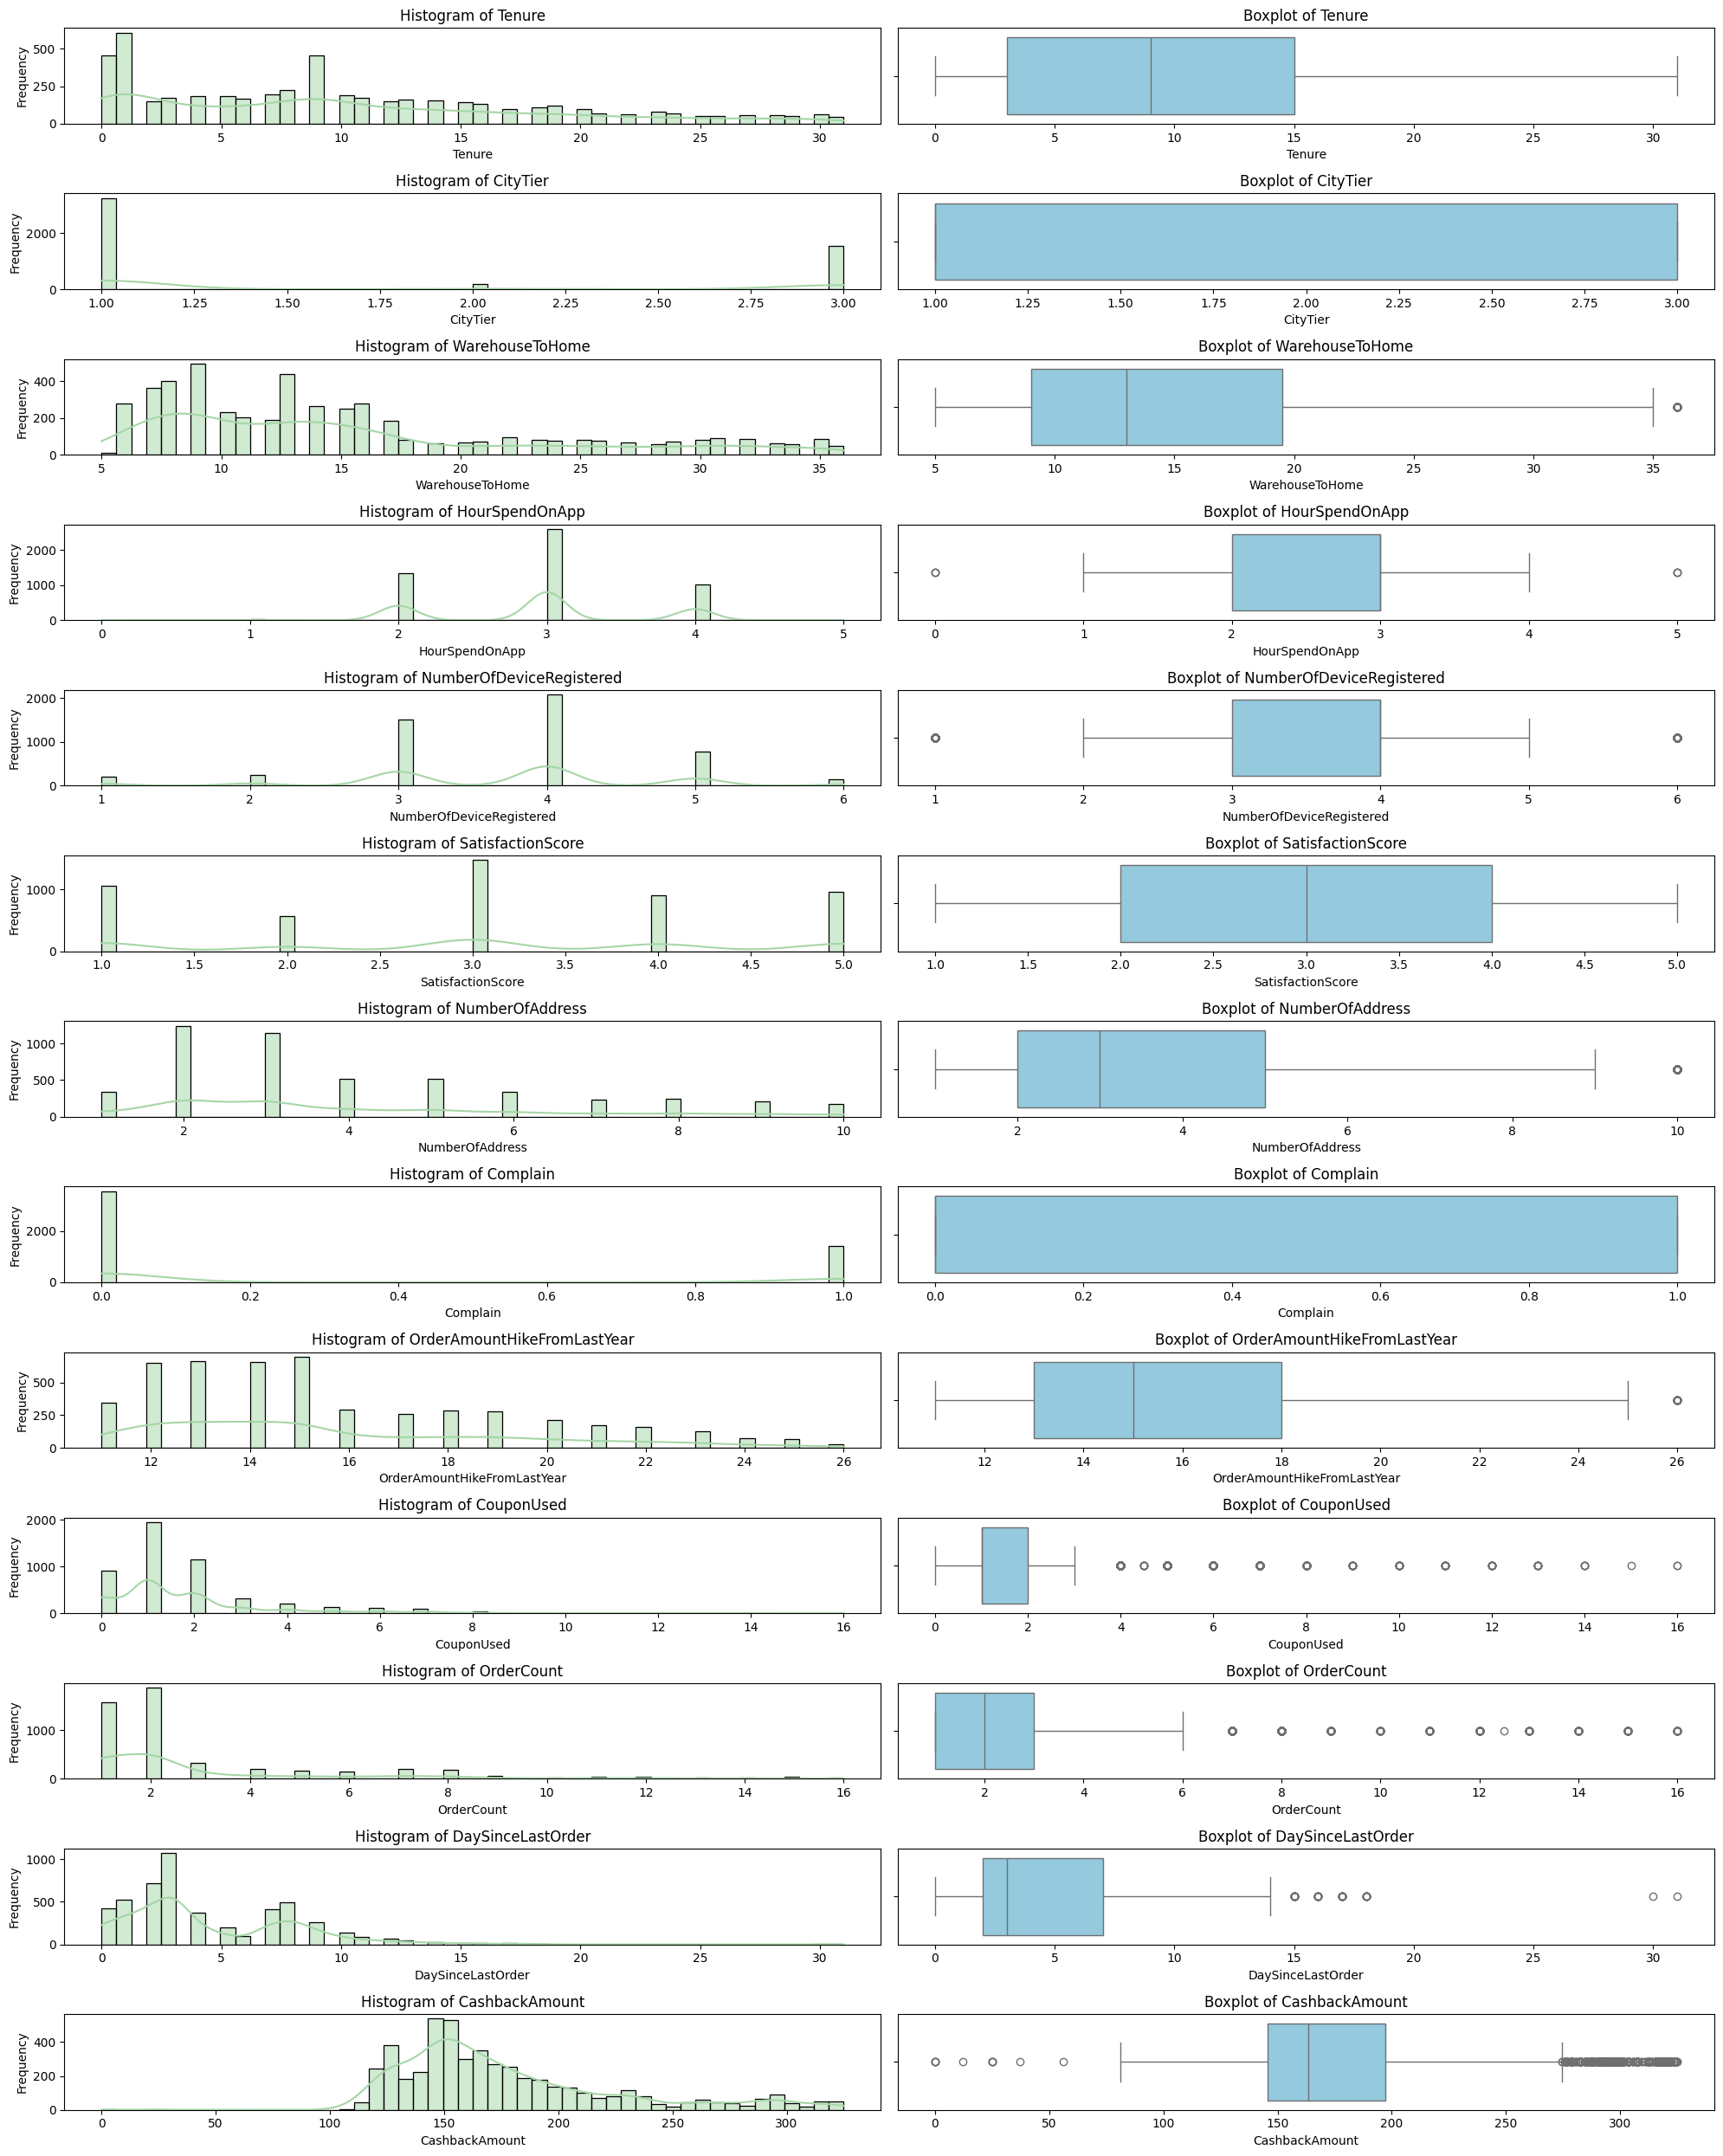

In [211]:
plt.figure(figsize=(20,25))

numerical=['Tenure','CityTier','WarehouseToHome','HourSpendOnApp','NumberOfDeviceRegistered','SatisfactionScore','NumberOfAddress','Complain','OrderAmountHikeFromLastYear','CouponUsed','OrderCount','DaySinceLastOrder','CashbackAmount']

for index,col in enumerate(numerical):
    # histogram
    plt.subplot(len(numerical),2,index*2+1)
    sns.histplot(df[col],kde=True,color='#A5D6A7',bins=50)
    plt.title(f'Histogram of {col}',size=12)
    plt.xlabel(col)
    plt.ylabel('Frequency')

    # boxplot
    plt.subplot(len(numerical),2,index*2+2)
    sns.boxplot(x=df[col],color='skyblue')
    plt.title(f'Boxplot of {col}',size=12)
    plt.xlabel(col)

plt.tight_layout()
plt.show()

Interpretasi:

1. Berdasarkan hasil uji normalitas menggunakan [metode Shapiro-Wilk](https://medium.com/@maizi5469/10-0-shapiro-wilk-test-5be38fd3c2a6), seluruh variabel numerik dalam dataset menunjukkan nilai p-value yang lebih kecil dari tingkat signifikansi (alpha). Hal ini mengindikasikan bahwa distribusi data pada setiap variabel tersebut tidak mengikuti distribusi normal. Temuan ini menjadi dasar penting dalam pemilihan pendekatan analisis statistik selanjutnya, di mana metode non-parametrik atau teknik-teknik yang tidak mengasumsikan normalitas akan lebih sesuai untuk mendapatkan hasil yang akurat dan representatif.

2. Berdasarkan analisis deskriptif dari data, dapat disusun hipotesis awal terkait risiko churn sebagai berikut:

    |Fitur|Analisa|Hipotesa Awal Resiko Churn Berdasarkan Statistik Deskriptif| Alasan Pendukung Hipotesa |
    |---|---|---|--|
    | `Tenure` | Median menunjukkan bahwa mayoritas konsumen telah bergabung selama 9 bulan. Standar deviasi yang tinggi menunjukkan adanya variasi besar, dengan beberapa konsumen baru dan beberapa yang sudah lama. Konsumen dengan tenure lebih panjang biasanya lebih loyal, sehingga risiko churn bisa lebih rendah bagi mereka. | Konsumen yang baru bergabung (kurang dari 9 bulan) mungkin lebih berisiko untuk churn dibandingkan dengan yang sudah lebih lama. | Konsumen yang baru bergabung mungkin belum sepenuhnya terintegrasi dengan layanan dan ada kemungkinan mencari alternatif E-Commerce lain.|
    | `CityTier` |Median mengindikasikan bahwa mayoritas konsumen berasal dari tier kota 1, dengan Standar deviasi yang relatif kecil. Ini mencerminkan konsentrasi konsumen di kawasan perkotaan yang lebih maju, yang kemungkinan menawarkan akses yang lebih baik terhadap layanan.  | Konsumen dari tier 2 dan 3 mungkin lebih berisiko untuk churn karena kurangnya akses dan layanan dibandingkan dengan tier 1.|Konsumen di tier yang lebih tinggi mungkin memiliki ekspektasi layanan yang lebih tinggi dan merasa kurang terlayani.|
    | `WarehouseToHome` | Median jarak menunjukkan bahwa mayoritas dari konsumen berjarak 13 km dari gudang. Standar deviasi yang tinggi menunjukkan bahwa beberapa konsumen tinggal jauh dari gudang. |Konsumen yang tinggal jauh (lebih dari 13 km) mungkin lebih berisiko untuk churn. | Jarak yang lebih jauh dapat menyebabkan keterlambatan pengiriman dan ketidakpuasan.|
    | `HourSpendOnApp` | Median waktu yang dihabiskan menunjukkan bahwa konsumen menghabiskan rata-rata waktu yang cukup lama di aplikasi. Standar deviasi kecil menunjukkan bahwa sebagian besar konsumen terlibat dengan aplikasi. | Konsumen yang menghabiskan waktu kurang dari 3 jam di aplikasi mungkin lebih berisiko untuk churn.|Keterlibatan yang rendah dapat menunjukkan kurangnya minat atau kepuasan terhadap layanan.|
    | `NumberOfDeviceRegistered` | Median menunjukkan bahwa konsumen biasanya menggunakan 4 perangkat untuk mengakses layanan. Standar deviasi kecil menunjukkan bahwa sebagian besar konsumen menggunakan beberapa perangkat. |Konsumen yang terdaftar pada satu perangkat mungkin lebih berisiko untuk churn karena kurangnya fleksibilitas dalam penggunaan. |Penggunaan lebih dari satu perangkat dapat menunjukkan keterikatan yang lebih kuat dengan layanan.|
    | `SatisfactionScore` | Median kepuasan di angka 3 menunjukkan tingkat kepuasan yang moderat. Standar deviasi menunjukkan bahwa ada konsumen yang sangat puas dan yang sangat tidak puas. |Konsumen dengan skor kepuasan di bawah 3 mungkin memiliki risiko churn yang lebih tinggi. |Tingkat kepuasan yang rendah dapat menjadi indikator ketidakpuasan yang lebih besar.|
    | `NumberOfAddress` | Median menunjukkan bahwa konsumen rata-rata memiliki 3 alamat terdaftar, yang memberikan fleksibilitas dalam pengiriman. Standar deviasi menunjukkan adanya konsumen dengan banyak alamat. | Konsumen yang hanya memiliki satu alamat mungkin lebih berisiko untuk churn karena keterbatasan dalam pengiriman. |Konsumen yang memiliki lebih banyak alamat mungkin lebih aktif dan loyal.|
    | `Complain` | Median di 0 menunjukkan bahwa sebagian besar konsumen tidak mengajukan keluhan, tetapi ada beberapa yang mungkin melakukannya. Ini bisa menjadi indikator kepuasan. |Konsumen yang mengajukan keluhan mungkin memiliki risiko churn yang lebih tinggi. |Keluhan yang tidak ditangani dapat menyebabkan ketidakpuasan yang meningkat.|
    | `OrderAmountHikeFromLastYear` |Median peningkatan pesanan menunjukkan pertumbuhan yang positif. Standar deviasi kecil menunjukkan bahwa kebanyakan konsumen mengalami kenaikan yang serupa.  |Konsumen dengan peningkatan pesanan yang rendah mungkin lebih berisiko untuk churn karena kurangnya keterlibatan. | Peningkatan yang lebih rendah mungkin menunjukkan keterlibatan yang menurun.|
    | `CouponUsed` |Median menunjukkan bahwa sebagian besar konsumen menggunakan satu kupon, tetapi ada beberapa yang menggunakan lebih banyak. Ini bisa menunjukkan pemanfaatan promosi yang bervariasi.  | Konsumen yang tidak menggunakan kupon mungkin lebih berisiko untuk churn.|Tidak menggunakan kupon dapat menunjukkan kurangnya ketertarikan konsumen untuk memanfaatkan promosi E-Commerce.|
    | `OrderCount` |Median menunjukkan bahwa konsumen melakukan rata-rata 2 pesanan. Standar deviasi yang besar menunjukkan adanya konsumen yang sangat aktif dan yang jarang bertransaksi.  |Konsumen yang hanya melakukan satu pesanan mungkin lebih berisiko untuk churn. | Jumlah pesanan yang rendah dapat menandakan ketidakaktifan atau kurangnya kepuasan.|
    | `DaySinceLastOrder` | Median menunjukkan bahwa rata-rata waktu sejak pesanan terakhir adalah 3 hari, yang menunjukkan keterlibatan yang baik. Standar deviasi menunjukkan bahwa beberapa konsumen mungkin belum bertransaksi dalam waktu lama. | Konsumen yang sudah lebih dari 3 hari tidak melakukan pemesanan mungkin berisiko tinggi untuk churn.|Waktu yang lebih lama sejak pemesanan terakhir dapat menunjukkan ketidakaktifan atau kehilangan minat.|
    | `CashbackAmount` |Median jumlah cashback menunjukkan bahwa konsumen menerima manfaat dari program cashback. Standar deviasi menunjukkan bahwa beberapa konsumen mendapatkan cashback yang jauh lebih tinggi. | Konsumen yang menerima cashback lebih sedikit mungkin lebih berisiko untuk churn.|Cashback yang lebih rendah dapat mencerminkan kurangnya keterlibatan atau aktivitas belanja dari konsumen. Hal ini menunjukkan bahwa konsumen mungkin tidak memanfaatkan layanan secara optimal, yang bisa mengindikasikan ketidakpuasan atau kurangnya kebutuhan untuk berbelanja lebih sering.|

    Korelasi ini bersifat dua arah, sehingga hipotesis berdasarkan statistik deskriptif diatas, mungkin berlawanan dengan kondisi perusahaan. Untuk itu, guna memahami keterkaitan antara setiap kategori fitur dan target (Churn), akan dilakukan analisis mendalam terhadap korelasi antara fitur dan target tersebut.

## **4.2 Data Correlation**

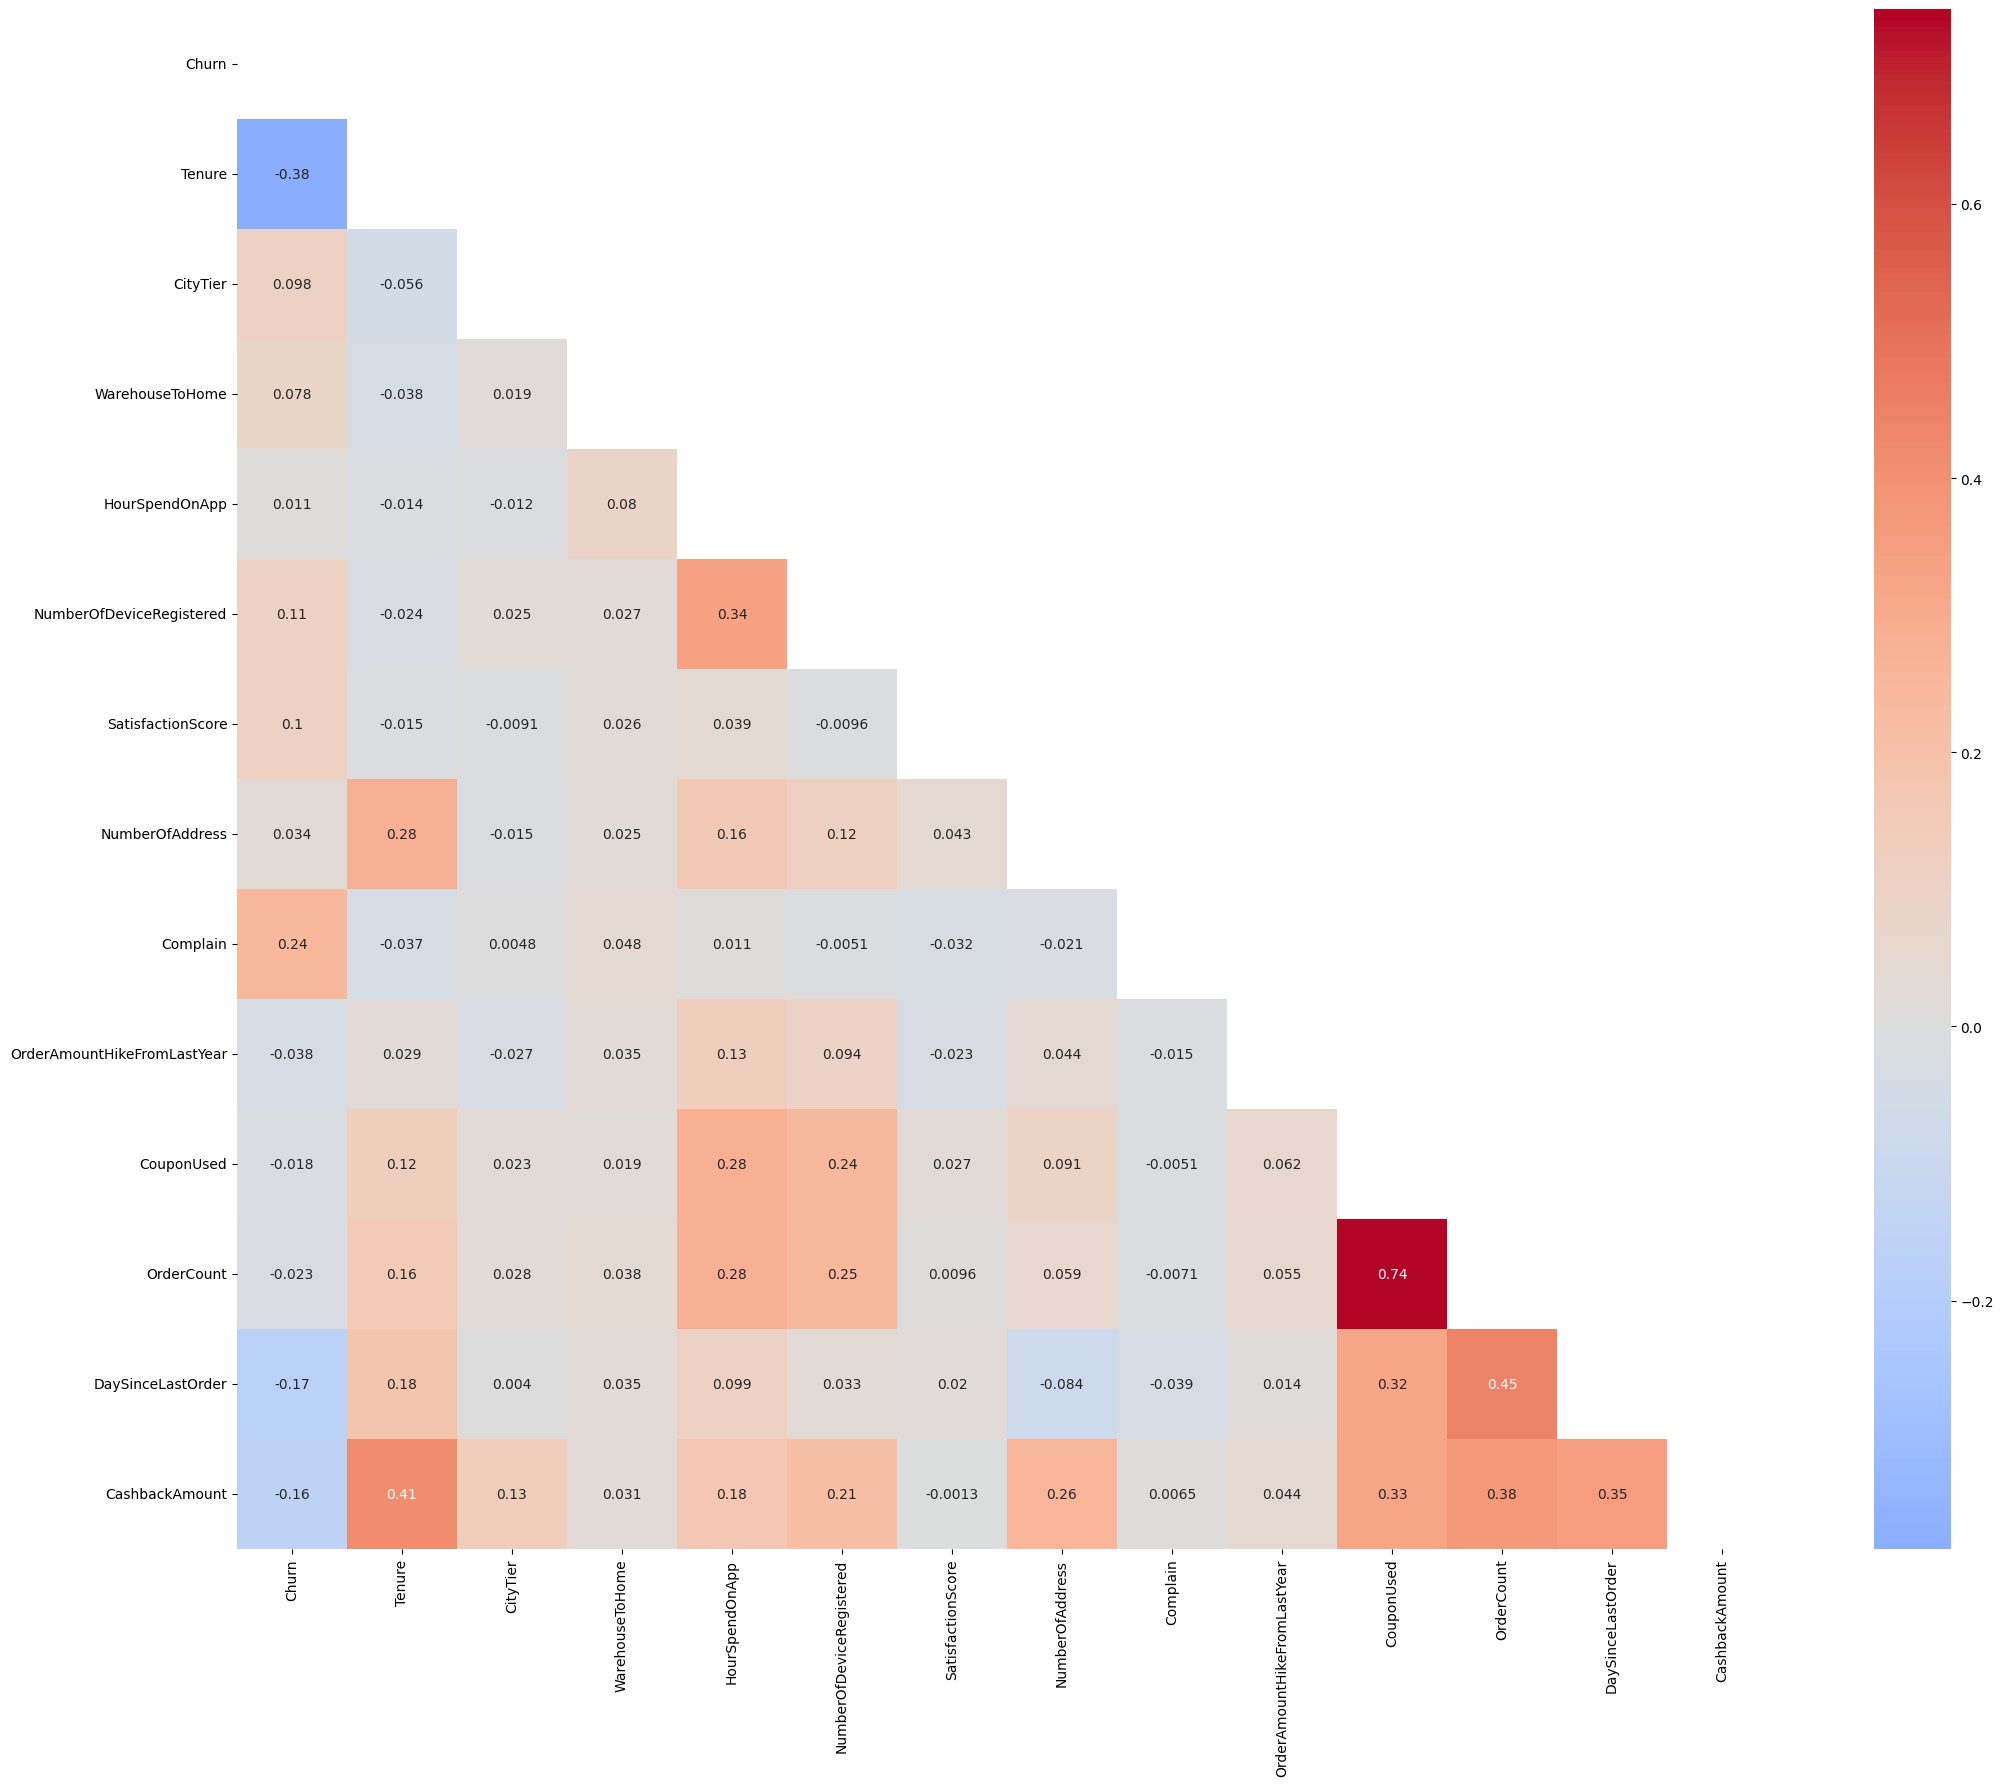

In [212]:
plt.figure(figsize=(25,20))

matrix = np.triu(df.corr(method='spearman', numeric_only=True)) #menggunakan spearman karena distribusi data tidak normal

sns.heatmap(data=df.corr(method='spearman', numeric_only=True), annot=True, cmap='coolwarm', center=0, mask = matrix, square='True')
plt.show()

Keterangan [koefisien korelasi](https://journals.lww.com/anesthesia-analgesia/Fulltext/2018/05000/Correlation_CoefficientsAppropriate_Use_and.50.aspx):

| Value of Correlation Coeffficient | Relationship Interpretation |
| --- | --- |
| 0.000 - 0.199 | Very Weak |
| 0.200 - 0.399 | Weak |
| 0.400 - 0.599 | Moderate |
| 0.600 - 0.799 | Strong |
| 0.800 - 1.000 | Very Strong |

Interpretasi:

1. Korelasi antar feature 

    | Feature | Kategori| Hipotesa Berdasarkan Korelasi|
    |--------|--------|-------|
    | `CouponUsed` dan `OrderCount` (0.74)|Strong|Penggunaan kupon berkorelasi cukup kuat dengan jumlah pesanan konsumen, artinyaL konsumen yang sering menggunakan kupon cenderung melakukan lebih banyak pemesanan.|
    | `OrderCount` dan `DaySinceLastOrder` (0.45) | Moderate| Semakin sering konsumen melakukan pemesanan, semakin sedikit jarak waktu dari pesanan terakhir, sehingga cenderung meminimalisir churn|
    | `Tenure` dan `CashbackAmount` (0.41)| Moderate| Konsumen dengan tenure yang lebih lama cenderung mendapatkan cashback yang lebih tinggi, artinya semakin lama konsumen menggunakan layanan perusahaan, semakin besar bonus atau manfaat untuk konsumen yang mungkin dapat mengurangi konsumen churn. |
    | `NumberOfDeviceRegistered` dan `HourSpendOnApp` (0.34) | Weak| Konsumen yang menggunakan lebih banyak perangkat mungkin lebih terlibat dalam aplikasi (dari sisi waktu). |
    | `Tenure` dan `NumberOfAddress` (0.28)| Weak| Konsumen dengan tenure lama cenderung memiliki banyak alamat yang terdaftar, namun korelasi ini tidak cukup kuat untuk dijadikan indikator signifikan, sehingga tidak bisa dipastikan bahwa durasi bergabungnya konsumen mempengaruhi jumlah alamat.|
    | `HourSpendOnApp` dan `OrderCount` (0.28)| Weak| Konsumen yang menghabiskan lebih banyak waktu di aplikasi cenderung melakukan lebih banyak pesanan, namun korelasi ini tidak cukup kuat untuk dijadikan indikator signifikan.|
    | `CityTier` dan `WarehouseToHome` (0.02)| Very Weak| Lokasi tidak berpengaruh besar terhadap jarak gudang ke rumah konsumen.|
    | `SatisfactionScore` dan `Complain` (-0.03) | Very Weak| Tidak ada hubungan antara kepuasan konsumen dengan complain. |

    Korelasi ini bersifat dua arah, sehingga hipotesis tersebut bisa berlawanan dengan kondisi perusahaan.

2. Korelasi feature terhadap `Churn`

    | Feature | Kategori |Hipotesa Berdasarkan Korelasi terhadap `Churn`|
    |--------|--------|-------|
    | `Tenure` (-0.38)| Weak| Konsumen dengan tenure yang lebih lama kemungkinan untuk churn cenderung lebih rendah, yang artinya: dapat mengindikasikan loyalitas seiring waktu bergabung.|
    | `Complain` (0.24)| Weak| Konsumen  yang lebih sering complain cenderung memiliki kemungkinan lebih tinggi untuk churn, yang artinya: ketidakpuasan yang tidak ditangani dapat menjadi faktor yang mendorong konsumen untuk churn.|
    | `DaySinceLastOrder` (-0.17)| Very Weak| Semakin lama waktu sejak pemesanan terakhir, semakin tinggi kemungkinan konsumen untuk churn, yang artinya: ketidakaktifan konsumen dalam pemesanan dapat mendorong konsumen churn. |
    | `CashbackAmount` (-0.16)| Very Weak | Konsumen yang menerima cashback lebih tinggi kemungkinan untuk churn-nya cenderung lebih rendah, yang artinya: program cashback ini berhasil dalam mencegah konsumen untuk churn. |
    | `NumberOfDeviceRegistered` (0.11)| Very Weak| Korelasi positif yang lemah ini menunjukkan bahwa jumlah perangkat yang terdafatar tidak signifikan dalam mempengaruhi konsumen untuk churn. |
    | `SatisfactionScore` (0.10)| Very Weak| Korelasi positif yang lemah ini menunjukkan bahwa skor kepuasan konsumen tidak berpengaruh signifikan terhadap keputusan konsumen untuk churn. |
    | `CityTier` (0.10)| Very Weak| Korelasi positif yang lemah ini menunjukkan bahwa adanya kecenderungan bahwa konsumen di tier kota yang lebih rendah mungkin cenderung churn.|
    | `HourSpendOnApp` (0.01)| Very Weak| Korelasi positif yang sangat lemah ini menunjukkan bahwa waktu yang dihabiskan untuk mengkases aplikasi tidak berhubungan langsung dengan keputusan churn.|
    | `CouponUsed` (-0.02)| Very Weak| Tidak ada korelasi signifikan dengan churn, artinya konsumen yang menggunakan kupon mungkin semata-mata hanya untuk mendapatkan diskon tanpa mempertimbangkan untuk tetap menggunakan aplikasi E-Commerce|
    | `OrderCount` (-0.02)| Very Weak| Tidak ada korelasi signifikan dengan churn, artinya meskipun konsumen sering memesan, hal itu tidak menjamin konsumen untuk tidak churn.|
    | `NumberOfAddress` (0.03)| Very Weak| Korelasi positif yang sangat lemah ini menunjukkan bahwa jumlah alamat yang didaftarkan tidak berpengaruh signifikan terhadap keputusan konsumen untuk churn.|
    | `OrderAmountHikeFromLastYear` (-0.04)| Very Weak| Korelasi positif yang sangat lemah ini menunjukkan bahwa prosentase kenaikan pesanan dibandingkan tahun lalu tidak berpengaruh signifikan terhadap keputusan konsumen untuk churn.|
    | `WarehousetoHome` (0.08)| Very Weak| Korelasi positif yang sangat lemah ini menunjukkan bahwa jarak rumah konsumen ke gudang tidak berpengaruh signifikan terhadap keputusan konsumen untuk churn.|

    Korelasi ini bersifat dua arah, sehingga hipotesis tersebut bisa berlawanan dengan kondisi perusahaan. Oleh karena itu, diperlukan analisis mendalam mengenai setiap fitur dan target yang ada.

3. Berdasarkan korelasi data menggunakan Spearman, dapat disimpulkan bahwa:

    - Feature yang paling berpengaruh dari dataset adalah `Tenure` dan `Complain`.

    - `WarehouseToHome` mungkin tidak terlalu berguna dalam konteks ini dan bisa dipertimbangkan untuk dihilangkan, dengan alasan:

        - Fitur tersebut memiliki korelasi yang sangat lemah (kami mengambil batas < 0.1) dengan semua fitur lainnya, termasuk Churn. Hal ini dapat menunjukkan bahwa tidak ada hubungan yang signifikan dengan fitur-fitur lainnya.
        
        - Dalam analisis churn, fitur yang memiliki hubungan yang lemah mungkin tidak akan memberikan informasi yang cukup untuk memprediksi apakah konsumen akan churn atau tidak churn.

        - Fitur dengan korelasi yang lemah mungkin dapat memperburuk peforma model. Fitur tersebut dapat menambah kompleksitas tanpa memberikan kontribusi berarti pada akurasi model, sehingga menghilangkan fitur ini mungkin dapat meningkatkan efisiensi model dan mengurangi resiko overfitting.

        - Akan dilakukan analisis lebih mendalam kembali mengenai fitur ini guna mempertimbangkan pengikutsertaan fitur `WarehouseToHome` atau tidak.



## **4.3 Feature VS Target**

Untuk mempermudah interpretasi, pada bab pembahasan ini, nilai pada target `Churn` akan dirubah menjadi 'Not Churned' untuk 0 dan 'Churned' untuk 1, yang nantinya akan dikembalikan ke nilai yang sebenarnya.

In [213]:
# mengganti nilai churn
df['Churn']=df['Churn'].map({0:'Not Churned', 1:'Churned'}) 

In [214]:
df['Churn'].value_counts(normalize=True)

Churn
Not Churned    0.835509
Churned        0.164491
Name: proportion, dtype: float64

Interpretasi:

- Berdasarkan [sumber 1 churn rate](https://www.paddle.com/resources/calculate-churn-rate), **tingkat churn yang dianggap baik berada pada rentang  2%-8%** dari [Monthly Recurring Revenue (MRR)](https://www.paddle.com/resources/monthly-recurring-revenue). Perusahaan yang sudah berdiri lebih dari 10 tahun cenderung memiliki tingkat churn 2%-4%, sementara perusahaan yang lebih muda cenderung memiliki tingkat churn yang lebih tinggi, antara 4%-24%. Tingkat churn yang rendah dapat menunjukkan keterikatan konsumen yang baik, sedangan churn yang tinggi menunjuukan adanya masalah dalam mempertahankan konsumen.

- Berdasarkan [sumber 2 churn rate](https://www.chargebee.com/blog/ecommerce-churn-rate/), tidak ada kepastian tingkat churn yang dianggap baik untuk e-commerce. Namun umumnya **tingkat churn dibawah 5% dianggap baik untuk perusahaan e-commerce**, walaupun ada beberapa perusahaan e-commerce juga yang menganggap churn rate 10% masih dalam batas baik dan wajar.

- Berdasarkan data, churn rate pada perusahaan adalah sekitar **16.45%**. Angka tersebut masih jauh diatas rentang batas tingkat yang diangkap baik. Hal ini dapat menunjukkan bahwa perusahaan mungkin memiliki permasalahan dalam mempertahankan konsumen, yang bisa jadi terletak pada ketidakpuasan konsumen pada produk, aplikasi, layanan, ataupun persaingan antar e-commerce lainnya.


Berdasarkan fitur dan deskripsi yang ada, untuk menganalisis hubungan antara fitur dan target, fitur-fitur dalam dataset ini dapat dikelompokkan ke dalam **lima kategori** berikut:

- Demografi konsumen :
    - Deskripsi : menunjukkan karakteristik dasar konsumen yang dapat memengaruhi perilaku dan keputusan pembelian. 
    - Fitur terkait : `Gender`, `MaritalStatus`, `CityTier`.

- Preferensi konsumen :
    - Deskripsi : menggambarkan pilihan dan kebiasaan konsumen dalam menggunakan platform e-commerce. 
    - Fitur terkait : `PreferredLoginDevice`, `PreferredPaymnetMode`, `PreferredOrderCat`.

- Keterlibatan konsumen :
    - Deskripsi : mengukur seberapa aktif dan terlibat konsumen dengan aplikasi. 
    - Fitur terkait : `Tenure`, `HourSpendOnApp`, `NumberOfDeviceRegistered`, `NumberOfAddress`.

- Aktivitas transaksi konsumen :
    - Deskripsi :menggambarkan pola dan perilaku transaksi konsumen serta faktor yang memengaruhi pengalaman belanja. 
    - Fitur terkait : `OrderCount`, `DaySinceLastOrder`, `OrderAmountFromLastYear`, `CouponUsed`, `CashbackAmount`, `WarehouseToHome`.

- Kepuasan konsumen :
    - Deskripsi : mencerminkan tingkat kepuasan konsumen dan adanya keluhan yang mungkin timbul. 
    - Fitur terkait : `SatisfactionScore` dan `Complain`.

    Dengan pembagian ini, analisis akan dilakukan dengan fokus pada setiap kategori, memberikan informasi yang lebih dalam mengenai faktor-faktor yang mempengaruhi churn atau berhentinya konsumen. Pembahasan ini diharapkan dapat membantu dalam merumuskan strategi yang efektif untuk meningkatkan retensi konsumen.

### **4.3.1 Demografi Konsumen**

#### **4.3.1.1 `CityTier`**

- Tabel `CityTier` VS `Churn`

In [215]:
# mengganti tipe data citytier
df['CityTier'] = df['CityTier'].astype('object')
# mengganti nilai citytier
df['CityTier']=df['CityTier'].map({1:'Tier 1', 2:'Tier 2', 3:'Tier 3'}) 
# statistik deskriptif berdasarkan churn
agg_table = df.groupby(['CityTier', 'Churn']).size().unstack().reset_index()
agg_table['Total'] = agg_table['Churned'] + agg_table['Not Churned']
agg_table['% Churn'] = (agg_table['Churned'] / agg_table['Total'] * 100).round(2)
agg_table = agg_table.sort_values(by='% Churn', ascending=False)
agg_table

Churn CityTier  Churned  Not Churned  Total  % Churn
2       Tier 3      339         1214   1553    21.83
1       Tier 2       31          156    187    16.58
0       Tier 1      449         2790   3239    13.86

- Visualisasi

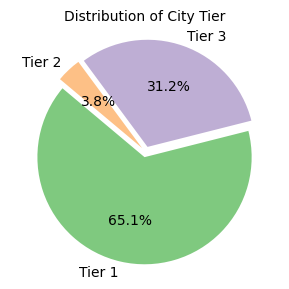

In [216]:
counts = df['CityTier'].value_counts()

plt.figure(figsize=(3,3))
plt.pie(counts, labels=counts.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette("Accent"), explode=[0.05] * len(counts))
plt.title('Distribution of City Tier',fontsize=10)
plt.axis('equal')
plt.tight_layout()
plt.show()

C:\Users\fauzi\AppData\Local\Temp\ipykernel_17416\509583083.py:16: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  churn_rate = data['Churn'].value_counts(normalize=True).get(1, 0) * 100


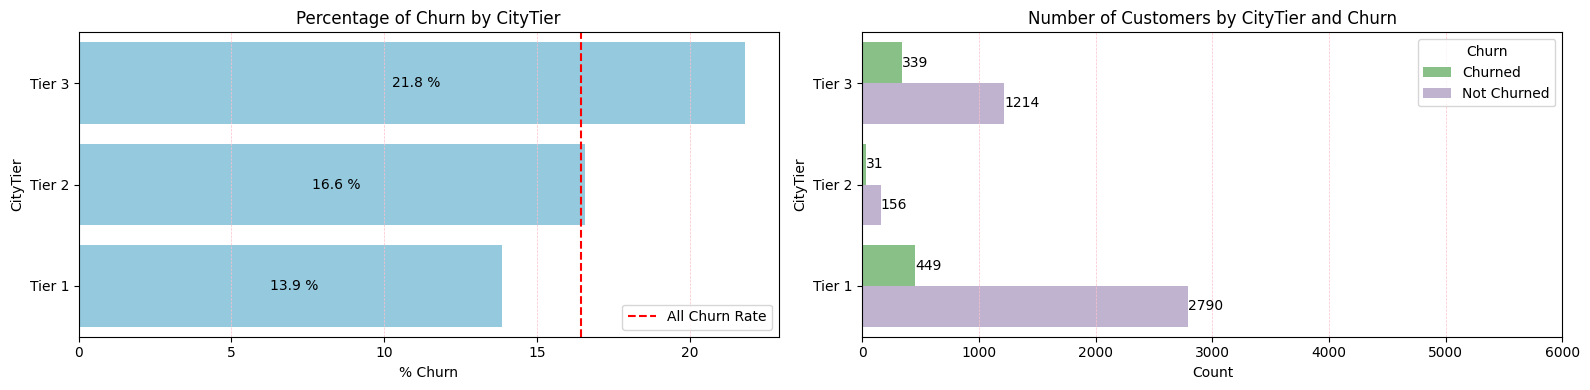

In [217]:
def create_plot(data, col, x_maks=1000):
    agg_table = data.groupby([col, 'Churn']).size().unstack().reset_index()
    agg_table['total'] = agg_table['Churned'] + agg_table['Not Churned']
    agg_table['% Churn'] = (agg_table['Churned'] / agg_table['total'] * 100).round(2)
    agg_table = agg_table.sort_values(by='% Churn', ascending=False)

    fig, axes = plt.subplots(1, 2, figsize=(16,4))

    ax1 = sns.barplot(data=agg_table, y=col, x='% Churn', ax=axes[0], color='skyblue')
    labels = ['{:.1f} %'.format(x) for x in agg_table['% Churn']]
    ax1.bar_label(ax1.containers[0], labels=labels, padding=3, label_type='center')
    ax1.set_title(f'Percentage of Churn by {col}')
    ax1.set_xlabel('% Churn')
    ax1.set_ylabel(col)
    ax1.grid(axis='x', linestyle='--', linewidth=0.5, color='pink')
    churn_rate = data['Churn'].value_counts(normalize=True).get(1, 0) * 100
    ax1.axvline(x=churn_rate, color='red', linestyle='--', label='All Churn Rate')
    ax1.legend(loc='lower right')
    ax1.grid(axis='x', linestyle='--', linewidth=0.5, color='pink')

    ax2 = sns.countplot(data=data, y=col, hue='Churn', order=agg_table[col], palette='Accent', ax=axes[1])
    ax2.set_title(f'Number of Customers by {col} and Churn')
    for container in ax2.containers:
        ax2.bar_label(container)
    ax2.set_xlim(0, x_maks)
    ax2.set_xlabel('Count')
    ax2.set_ylabel(col)
    ax2.grid(axis='x', linestyle='--', linewidth=0.5, color='pink')

    plt.tight_layout()
    plt.show()

create_plot(df, 'CityTier', x_maks=6000)

- Uji Statistik

In [218]:
from scipy.stats import chi2_contingency

contingency_table=df.groupby(['Churn','CityTier']).size().unstack().fillna(0)

alpha=0.05
stat,pvalue,dof,expected_freq=chi2_contingency(contingency_table)

if pvalue > alpha:
    print(f'P-Value: {pvalue:.5f} > {alpha}. Fail to Reject Ho. Kita tidak punya cukup bukti untuk menyatakan bahwa terdapat keterkaitan antara City Tier dan Churn.')
else:
    print(f'P-Value: {pvalue:.5f} <= {alpha}. Reject Ho. Kita punya cukup bukti untuk menyatakan bahwa terdapat keterkaitan antara City Tier dan Churn.')

P-Value: 0.00000 <= 0.05. Reject Ho. Kita punya cukup bukti untuk menyatakan bahwa terdapat keterkaitan antara City Tier dan Churn.


- Interpretasi: 

    - `CityTier` mengacu pada kategori tingkat kota yang biasanya merujuk pada tingkat perkembangan ekonomi, infrastruktur, dan aksesibilitas layanan di suatu kota. Kategori ini penting dalam analisa churn karena dapat memberikan gambaran kepada perusahaan mengenai dinamika pasar diberbagai wilayah. [Klasifikasi City Tier](https://www.investopedia.com/terms/r/real-estate-tier-classifications-tier-1-tier-2-and-tier-3.asp#:~:text=New%20York%2C%20Los%20Angeles%2C%20Chicago%2C%20and%20Boston%20are%20common,Orlando%E2%80%94cities%20with%20smaller%20populations.) terbagi dalam tiga tingkatan, sebagai berikut:

        - Tier 1: Tingkat ini mewakili kota-kota dengan pasar real estat yang berkembang dan mapan. Kota-kota ini cenderung padat penduduk dan sangat berkembang dengan sekolah, fasilitas, dan bisnis yang diinginkan. Kota-kota ini memiliki real estat termahal.

        - Tier 2: Kota-kota dalam tingkatan ini sedang mengembangkan pasar real estat mereka. Kota-kota ini cenderung sedang naik daun, dan banyak perusahaan telah berinvestasi di daerah ini, tetapi belum mencapai puncaknya. Real estat di sini biasanya relatif terjangkau. Namun, jika pertumbuhan berlanjut, harga akan naik. Populasinya biasanya antara satu hingga lima juta.

        - Tier 3: Kategori ketiga terdiri dari kota-kota dengan populasi lebih rendah (biasanya di bawah satu juta orang) dan pasar real estat yang belum berkembang atau tidak ada. Real estat di kota-kota ini cenderung murah dan ada peluang untuk pertumbuhan jika perusahaan real estat memutuskan untuk berinvestasi dalam mengembangkan area tersebut. 

    - Berdasarkan jumlah konsumen, konsumen yang terdaftar mendominasi tier 1, diikuti oleh tier 3 dan tier 2. Meskipun jumlah konsumen pada tier 1 paling besar, tier 1 memiliki tingkat churn yang terendah, yakni 13.86%. Hal ini dapat menunjukkan bahwa konsumen di kota-kota besar cenderung lebih puas dengan layanan e-commerce yang diterima, yang kemungkinan disebabkan oleh infrastruktur yang lebih baik, aksesibilitas yang tinggi, dan mungkin puas terhadap produk yang ditawrkan. **Dengan banyaknya konsumen dan rendahnya churn, tier 1 merupakan sumber pendatapan yang stabil bagi perusahaan, sehingga konsumen pada tier 1 ini harus menjadi prioritas utama**. Perusahaan harus terus memantau dan berinovasi untuk menjaga kepuasan serta loyalitas konsumen pada segmen ini, yang salah satu caranya mungkin dapat menambahkan fitur baru yang mungkin dibutuhkan oleh konsumen pada segmen ini.

    - **Tier 3 merupakan daerah dengan tingkat churn tertinggi, yakni 21.83%**. Hal ini dapat menunjukkan bahwa konsumen di daerah ini mungin menghadapi lebih banyak tantangan, mungkin seperti layanan dari e-commerce yang kurang memadai. Perusahaan harus memfokuskan upaya retensi di daerah ini dengan mengumpulkan feedback dari konsumen untuk mengidentifikasi masalah konsumen mengenai faktor penyebab churn. Perusahaan dapat melakukan upaya-upaya evaluasi aplikasi e-commerce yang digunakan ataupun membuat program-program yang dikhususkan dan disesuaikan dnegan keadaan Tier 3.

    - Tier 2 menunjukkan tingkat churn sebesar 16.58%. Meskipun tidak sebesar Tier 3, masih terdapat tantangan yang perlu diatasi pada segmen ini. Perusahaan dapat merancang strategi efektif untuk meningkatkan retensi dengan membentuk program loyalitas yang menarik dan meningkatkan kualitaslayanan. Selain itu, pemasaran yang ditargetkan khusus untuk segmen ini akan lebih relevan dan mungkin berdampak pada pengurangan churn. Evaluasi rutin juga penting untuk memahami kebutuhan spesifik konsumen, sehingga perusahaan dapat meminimalkan churn rate secara signifikan.


#### **4.3.1.2 `Gender`**

- Tabel `Gender` VS `Churn`

In [219]:
agg_table = df.groupby(['Gender', 'Churn']).size().unstack().reset_index()
agg_table['Total'] = agg_table['Churned'] + agg_table['Not Churned']
agg_table['% Churn'] = (agg_table['Churned'] / agg_table['Total'] * 100).round(2)
agg_table = agg_table.sort_values(by='% Churn', ascending=False)
agg_table

Churn  Gender  Churned  Not Churned  Total  % Churn
1        Male      514         2476   2990    17.19
0      Female      305         1684   1989    15.33

- Visualisasi

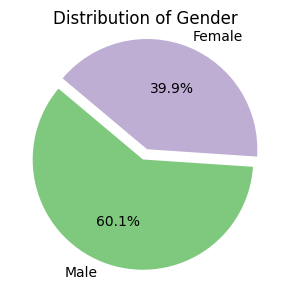

In [220]:
counts = df['Gender'].value_counts()
plt.figure(figsize=(3,3))
plt.pie(counts, labels=counts.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette("Accent"), explode=[0.05] * len(counts))
plt.title('Distribution of Gender', fontsize=12)
plt.axis('equal')
plt.tight_layout()
plt.show()

C:\Users\fauzi\AppData\Local\Temp\ipykernel_17416\1172060109.py:16: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  churn_rate = data['Churn'].value_counts(normalize=True).get(1, 0) * 100


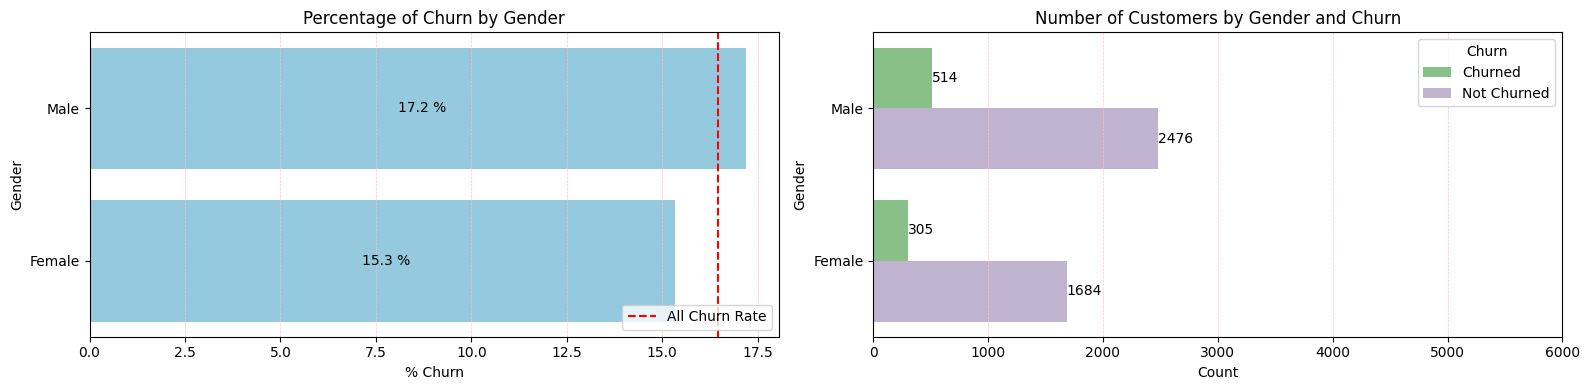

In [221]:
def create_plot(data, col, x_maks=2000):
    agg_table = data.groupby([col, 'Churn']).size().unstack().reset_index()
    agg_table['total'] = agg_table['Churned'] + agg_table['Not Churned']
    agg_table['% Churn'] = (agg_table['Churned'] / agg_table['total'] * 100).round(2)
    agg_table = agg_table.sort_values(by='% Churn', ascending=False)

    fig, axes = plt.subplots(1, 2, figsize=(16,4))

    ax1 = sns.barplot(data=agg_table, y=col, x='% Churn', ax=axes[0], color='skyblue')
    labels = ['{:.1f} %'.format(x) for x in agg_table['% Churn']]
    ax1.bar_label(ax1.containers[0], labels=labels, padding=3, label_type='center')
    ax1.set_title(f'Percentage of Churn by {col}')
    ax1.set_xlabel('% Churn')
    ax1.set_ylabel(col)
    ax1.grid(axis='x', linestyle='--', linewidth=0.5, color='pink')
    churn_rate = data['Churn'].value_counts(normalize=True).get(1, 0) * 100
    ax1.axvline(x=churn_rate, color='red', linestyle='--', label='All Churn Rate')
    ax1.legend(loc='lower right')
    ax1.grid(axis='x', linestyle='--', linewidth=0.5, color='pink')

    ax2 = sns.countplot(data=data, y=col, hue='Churn', order=agg_table[col], palette='Accent', ax=axes[1])
    ax2.set_title(f'Number of Customers by {col} and Churn')
    for container in ax2.containers:
        ax2.bar_label(container)
    ax2.set_xlim(0, x_maks)
    ax2.set_xlabel('Count')
    ax2.set_ylabel(col)
    ax2.grid(axis='x', linestyle='--', linewidth=0.5, color='pink')

    plt.tight_layout()
    plt.show()

create_plot(df, 'Gender', x_maks=6000)

- Uji Statistik

In [222]:
from scipy.stats import chi2_contingency

contingency_table=df.groupby(['Churn','Gender']).size().unstack().fillna(0)
alpha=0.05
stat,pvalue,dof,expected_freq=chi2_contingency(contingency_table)

if pvalue > alpha:
    print(f'P-Value: {pvalue:.5f} > {alpha}. Fail to Reject Ho. Kita tidak punya cukup bukti untuk menyatakan bahwa terdapat keterkaitan antara Gender dan Churn.')
else:
    print(f'P-Value: {pvalue:.5f} <= {alpha}. Reject Ho. Kita punya cukup bukti untuk menyatakan bahwa terdapat keterkaitan antara Gender dan Churn.')

P-Value: 0.09074 > 0.05. Fail to Reject Ho. Kita tidak punya cukup bukti untuk menyatakan bahwa terdapat keterkaitan antara Gender dan Churn.


- Interpretasi:

    - Berdasarkan data, churn rate pada laki-laki (17.19%) memang lebih tinggi dari churn rate perempuan (15.33%). Hal ini menunjukkan bahwa laki-laki lebih mungkin untuk berhenti bertransaksi dibandingkan perempuan.

    - Meskipun terdapat perbedaan dalam proporsi churn antara laki-laki dan perempuan, uji statistik menunjukkan bahwa perbedaan ini tidak signifikan secara statistik, sehingga tidak dapat disimpulkan bahwa gender berpengaruh terhadap keputusan konsumen untuk churn. Hal ini dapat mengindikasikan adanya faktor lain yang lebih berpengaruh. Oleh karena itu, strategi retensi harus difokuskan pada peningkatan pengalaman konsumen secara keseluruhan, bukan berdasarkan gender.

#### **4.3.1.3 `MaritalStatus`**

- Tabel `MaritalStatus` VS `Churn`

In [223]:
agg_table = df.groupby(['MaritalStatus', 'Churn']).size().unstack().reset_index()
agg_table['Total'] = agg_table['Churned'] + agg_table['Not Churned']
agg_table['% Churn'] = (agg_table['Churned'] / agg_table['Total'] * 100).round(2)
agg_table = agg_table.sort_values(by='% Churn', ascending=False)
agg_table

Churn MaritalStatus  Churned  Not Churned  Total  % Churn
2            Single      408         1120   1528    26.70
0          Divorced      121          710    831    14.56
1           Married      290         2330   2620    11.07

- Visualisasi

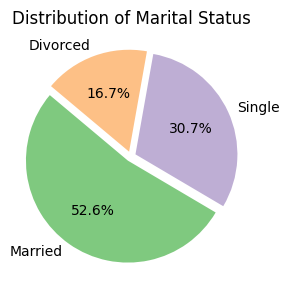

In [224]:
counts = df['MaritalStatus'].value_counts()
plt.figure(figsize=(3,3))
plt.pie(counts, labels=counts.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette("Accent"), explode=[0.05] * len(counts))
plt.title('Distribution of Marital Status', fontsize=12)
plt.axis('equal')
plt.tight_layout()
plt.show()

C:\Users\fauzi\AppData\Local\Temp\ipykernel_17416\3593607222.py:16: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  churn_rate = data['Churn'].value_counts(normalize=True).get(1, 0) * 100


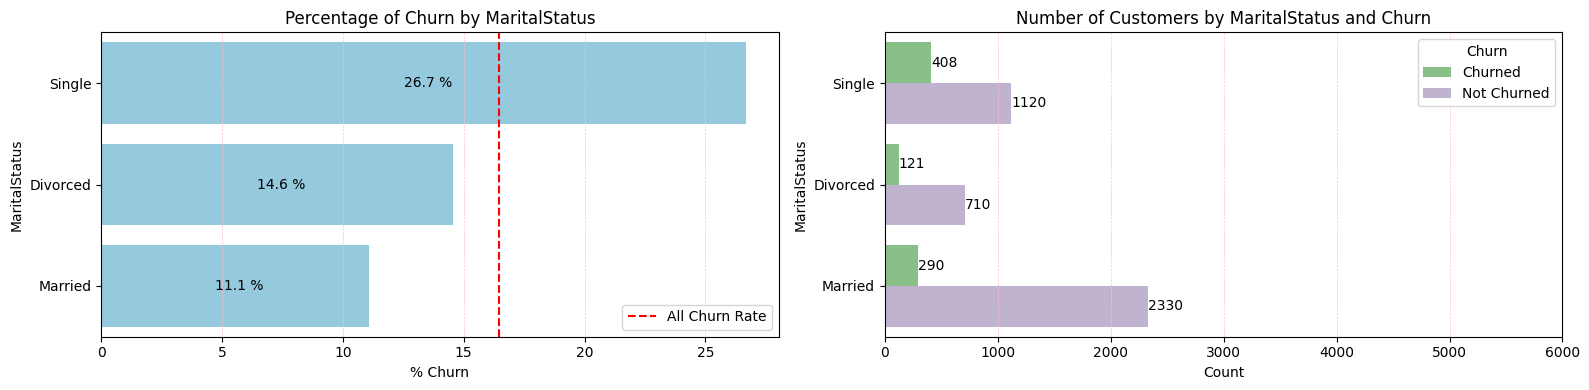

In [225]:
def create_plot(data, col, x_maks=2000):
    agg_table = data.groupby([col, 'Churn']).size().unstack().reset_index()
    agg_table['total'] = agg_table['Churned'] + agg_table['Not Churned']
    agg_table['% Churn'] = (agg_table['Churned'] / agg_table['total'] * 100).round(2)
    agg_table = agg_table.sort_values(by='% Churn', ascending=False)

    fig, axes = plt.subplots(1, 2, figsize=(16,4))

    ax1 = sns.barplot(data=agg_table, y=col, x='% Churn', ax=axes[0], color='skyblue')
    labels = ['{:.1f} %'.format(x) for x in agg_table['% Churn']]
    ax1.bar_label(ax1.containers[0], labels=labels, padding=3, label_type='center')
    ax1.set_title(f'Percentage of Churn by {col}')
    ax1.set_xlabel('% Churn')
    ax1.set_ylabel(col)
    ax1.grid(axis='x', linestyle='--', linewidth=0.5, color='pink')
    churn_rate = data['Churn'].value_counts(normalize=True).get(1, 0) * 100
    ax1.axvline(x=churn_rate, color='red', linestyle='--', label='All Churn Rate')
    ax1.legend(loc='lower right')
    ax1.grid(axis='x', linestyle='--', linewidth=0.5, color='pink')

    ax2 = sns.countplot(data=data, y=col, hue='Churn', order=agg_table[col], palette='Accent', ax=axes[1])
    ax2.set_title(f'Number of Customers by {col} and Churn')
    for container in ax2.containers:
        ax2.bar_label(container)
    ax2.set_xlim(0, x_maks)
    ax2.set_xlabel('Count')
    ax2.set_ylabel(col)
    ax2.grid(axis='x', linestyle='--', linewidth=0.5, color='pink')

    plt.tight_layout()
    plt.show()

create_plot(df, 'MaritalStatus', x_maks=6000)

- Uji Statistik

In [226]:
from scipy.stats import chi2_contingency

contingency_table=df.groupby(['Churn','MaritalStatus']).size().unstack().fillna(0)
alpha=0.05
stat,pvalue,dof,expected_freq=chi2_contingency(contingency_table)

if pvalue > alpha:
    print(f'P-Value: {pvalue:.5f} > {alpha}. Fail to Reject Ho. Kita tidak punya cukup bukti untuk menyatakan bahwa terdapat keterkaitan antara Status Pernikahan dan Churn.')
else:
    print(f'P-Value: {pvalue:.5f} <= {alpha}. Reject Ho. Kita punya cukup bukti untuk menyatakan bahwa terdapat keterkaitan antara Status Pernikahan dan Churn.')

P-Value: 0.00000 <= 0.05. Reject Ho. Kita punya cukup bukti untuk menyatakan bahwa terdapat keterkaitan antara Status Pernikahan dan Churn.


- Interpretasi:

    - Konsumen dengan status single mendominasi data, dengan proporsi churn tertinggi yang cukup signifikan, yaitu 26.70%. Hal ini dapat menunjukkan bahwa adanya kemungkinan kurang puasnya konsumen segmen ini terhadap produk ataupun layanan e-commerce perusahaan. Mengingat churn ratenya yang cukup tinggi, sangat penting bagi perusahaan untuk mengidentifikasi dan mengatasi penyebab ketidakpuasan dalam segmen ini. 

    - Konsumen dengan status divorce memiliki proporsi churn sebesar 14.56%. Meskipun lebih rendah dari single, resiko churn pada kelompok ini juga cukup signifikan. 

    - Konsumen dengan status married mendominasi data dengan jumlah 2620 serta menunjukkan churn terendah , yakni 11.07%. Angka ini mencerminkan adanya loyalitas yang lebih tinggi pada segmen ini dibandingkan segmen lainnya. Hal ini mungkin dapat dipengaruhi oleh adanya stabilitas keuangan dan kebutuhan yang lebih mudah dipenuhi menggunakan layanan e-commerce. Untuk menjaga loyalitas dari segmen ini, perusahaan sebaiknya merancang program yang menarik yang sesuai dengan segmen ini.

    - Berdasarkan hal-hal diatas, dapat disimpulkan bahwa status pernikahan dapat mempengaruhi tingkat churn konsumen, dimana konsumen single cenderung kurang loyal terhadap aplikasi, sedangkan konsumen married lebih menunjukkan loyalitas. Oleh karena itu, strategi retensi perlu disesuaikan, konsumen single mungkin butuh penawaran yang lebih menarik untuk segmennya, sedangkan konsumen married harus dijaga dengan layanan yang berkualitas sesuai dengan segmentasinya. Secara keseluruhan perusahaan harus melakukan evaluasi berkala mengenai faktor-faktor yang membuat churn pada setiap segmen pada feature ini.

#### **4.3.1.4 Kesimpulan Berdasarkan Demografi Konsumen**

Berdasarkan demografi konsumen, `MaritalStatus` dan `CityTier` merupakan fitur yang harus diperhatikan perusahaan dalam strategi retensi untuk mengurangi churn.

MaritalStatus menunjukkan bahwa konsumen single memiliki tingkat churn tertinggi, yang mengindikasikan bahwa konsumen pada segmen ini mungkin kurang puas pada produk ataupun layanan e-commerce perusahaan. Sementara itu konsumen married mencerminkan dominasi dan loyalitas yang lebih tinggi, yang artinya dapat berkontribusi pada retensi konsumen.

City tier juga memiliki peran penting. Tier 3 mencatat tingkat churn tertinggi, yang mungkin mengindikasikan bahwa adanya tantangan dalam menyediakan produk dan layanan e-commerce bagi segmen ini. Disisi lain, tier 1 memiliki tingkat churn terendah, yang dpat menjadi sumber pendapatan yang lebih stabil bagi perusahaan.

Oleh karena itu, memahami kedua faktor ini dapat membantu perusahaan dalam merancang strategi bisnis untuk mengurangi konsumen churn.

### **4.3.2 Preferensi Konsumen**

#### **4.3.2.1 `PreferredLoginDevice`**

- Tabel `PreferredLoginDevice` VS `Churn`

In [227]:
agg_table = df.groupby(['PreferredLoginDevice', 'Churn']).size().unstack().reset_index()
agg_table['Total'] = agg_table['Churned'] + agg_table['Not Churned']
agg_table['% Churn'] = (agg_table['Churned'] / agg_table['Total'] * 100).round(2)
agg_table = agg_table.sort_values(by='% Churn', ascending=False)
agg_table

Churn PreferredLoginDevice  Churned  Not Churned  Total  % Churn
0                 Computer      278         1146   1424    19.52
1             Mobile Phone      541         3014   3555    15.22

- Visualisasi

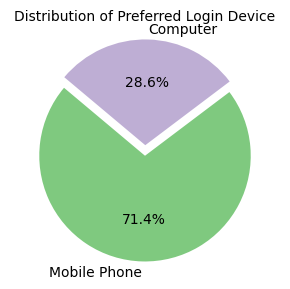

In [228]:
counts = df['PreferredLoginDevice'].value_counts()
plt.figure(figsize=(3,3))
plt.pie(counts, labels=counts.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette("Accent"), explode=[0.05] * len(counts))
plt.title('Distribution of Preferred Login Device', fontsize=10)
plt.axis('equal')
plt.tight_layout()
plt.show()

C:\Users\fauzi\AppData\Local\Temp\ipykernel_17416\2473356336.py:16: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  churn_rate = data['Churn'].value_counts(normalize=True).get(1, 0) * 100


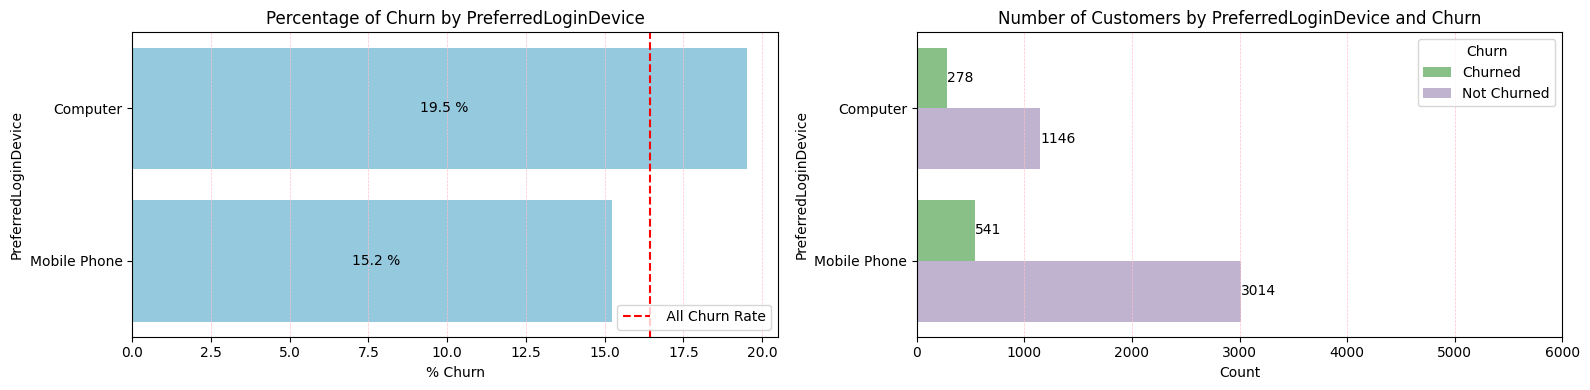

In [229]:
def create_plot(data, col, x_maks=1000):
    agg_table = data.groupby([col, 'Churn']).size().unstack().reset_index()
    agg_table['total'] = agg_table['Churned'] + agg_table['Not Churned']
    agg_table['% Churn'] = (agg_table['Churned'] / agg_table['total'] * 100).round(2)
    agg_table = agg_table.sort_values(by='% Churn', ascending=False)

    fig, axes = plt.subplots(1, 2, figsize=(16,4))

    ax1 = sns.barplot(data=agg_table, y=col, x='% Churn', ax=axes[0], color='skyblue')
    labels = ['{:.1f} %'.format(x) for x in agg_table['% Churn']]
    ax1.bar_label(ax1.containers[0], labels=labels, padding=3, label_type='center')
    ax1.set_title(f'Percentage of Churn by {col}')
    ax1.set_xlabel('% Churn')
    ax1.set_ylabel(col)
    ax1.grid(axis='x', linestyle='--', linewidth=0.5, color='pink')
    churn_rate = data['Churn'].value_counts(normalize=True).get(1, 0) * 100
    ax1.axvline(x=churn_rate, color='red', linestyle='--', label=' All Churn Rate')
    ax1.legend(loc='lower right')
    ax1.grid(axis='x', linestyle='--', linewidth=0.5, color='pink')

    ax2 = sns.countplot(data=data, y=col, hue='Churn', order=agg_table[col], palette='Accent', ax=axes[1])
    ax2.set_title(f'Number of Customers by {col} and Churn')
    for container in ax2.containers:
        ax2.bar_label(container)
    ax2.set_xlim(0, x_maks)
    ax2.set_xlabel('Count')
    ax2.set_ylabel(col)
    ax2.grid(axis='x', linestyle='--', linewidth=0.5, color='pink')

    plt.tight_layout()
    plt.show()

create_plot(df, 'PreferredLoginDevice', x_maks=6000)

- Uji Statistik

In [230]:
# Chi-Square Test
from scipy.stats import chi2_contingency
contingency_table=df.groupby(['Churn','PreferredLoginDevice']).size().unstack().fillna(0)

alpha=0.05
stat,pvalue,dof,expected_freq=chi2_contingency(contingency_table)
if pvalue>alpha:
    print(f'P-Value:{pvalue:.5f}>{alpha}. Fail to Reject Ho. Kita tidak punya cukup bukti untuk menyatakan bahwa terdapat keterkaitan antara device dan status churn.')
else:
    print(f'P-Value:{pvalue:.5f}<={alpha}. Reject Ho. Kita punya cukup bukti untuk menyatakan bahwa terdapat keterkaitan antara device dan status churn')

P-Value:0.00025<=0.05. Reject Ho. Kita punya cukup bukti untuk menyatakan bahwa terdapat keterkaitan antara device dan status churn


- Interpretasi: 

    - `PreferredLoginDevice` menunjukkan perangkat yang digunakan konsumen untuk mengakses e-commerce, yaitu komputer atau ponsel. Dalam analisis churn, pemilihan perangkat ini dapat memberikan informasi penting tentang perilaku konsumen; pengguna ponsel mungkin lebih nyaman dengan fitur mobile, sedangkan pengguna komputer mungkin cenderung terlibat dalam transaksi yang lebih kompleks.

    - Data menunjukkan bahwa konsumen yang menggunakan ***mobile phone*** dalam untuk login jauh **lebih dominan** dibandingkan dengan yang menggunakan komputer. Hal ini dapat mencerminkan bahwa di era digital ini, konsumen cenderung mengandalkan perangkat mobile dalam kehidupan sehari-hari. Preferensi ini dapat mengindikasikan bahwa konsumen mementingkan aksesibilitas dalam mengakses e-commerce, dimana *mobile phone* lebih memberikan kemudahan bagi konsumen untuk mengakses layanan kapan saja dan dimana saja.

    - Konsumen dengan **preferensi komputer** menunjukkan **churn rate yang lebih tinggi (19.5%)** dibandingkan dengan pengguna *mobile phone*. Hal ini dapat menindikasikan bahwa pengguna komputer mungkin menghadapi lebih banyak kesulitan atau ketidakpuasan terhadap layanan e-commerce, serta menjadi lebih mudah beralih ke e-commerce lain. Sebagai solusi, perusahaan dapat melakukan evaluasi untuk mengidentifikasi masalah yang dihadapi pengguna komputer, seperti isu teknis, kurangnya fitur, ataupun interface yang kurang menyenangkan. Perusahaan juga dapat mengumpulkan feedback dari konsumen dengan preferensi komputer untuk memahami kekurangan perusahaan. Solusi-solusi tersebut diharapkan dapat membantu perusahaan untuk meningkatkan layanan dan mengurangi churn rate di segmen ini.

    - Dengan **churn rate yang lebih rendah**, konsumen dengan **preferensi *mobile phone* (15.2%)** dapat dikatakan sebagai segmen yang berharga bagi perusahaan. Oleh karena itu, penting bagi perusahaan untuk mengoptimalkan pengalaman pengguna *mobile phone*. Perusahaan dapat menawarkan fitur dan promosi eksklusif yang dapat lebih meningkatkan retensi di segmen ini. Perusahaan dapat mengedepankan pengembangan fitur yang menarik dan merancang interface yang intuitif untuk memudahkan akses bagi konsumen. Selain itu, perusahaan dapat menawarkan program-program loyalitas yang menarik khusus untuk akses dalam *mobile phone*.

    - Sebagai upaya *maintain*, perusahaan dapat secara berkala menganalisa preferensi penggunaan perangkat dalam konteks analisa churn, serta mengevaluasi efektivitas solusi yang telah diterapkan.

#### **4.3.2.2 `PreferredPaymentMode`**

- Tabel `PreferredPaymentMode` VS `Churn`

In [231]:
agg_table = df.groupby(['PreferredPaymentMode', 'Churn']).size().unstack().reset_index()
agg_table['Total'] = agg_table['Churned'] + agg_table['Not Churned']
agg_table['% Churn'] = (agg_table['Churned'] / agg_table['Total'] * 100).round(2)
agg_table = agg_table.sort_values(by='% Churn', ascending=False)
agg_table

Churn PreferredPaymentMode  Churned  Not Churned  Total  % Churn
0         Cash on Delivery      112          338    450    24.89
3                 E wallet      128          430    558    22.94
4                      UPI       55          297    352    15.62
2               Debit Card      304         1748   2052    14.81
1              Credit Card      220         1347   1567    14.04

- Visualisasi

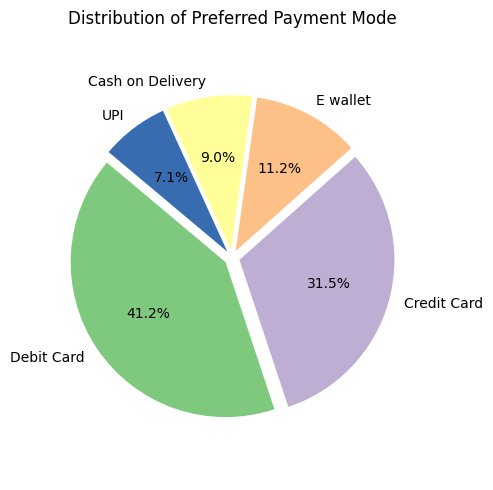

In [232]:
counts = df['PreferredPaymentMode'].value_counts()
plt.figure(figsize=(5,5))
plt.pie(counts, labels=counts.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette("Accent"), explode=[0.05] * len(counts))
plt.title('Distribution of Preferred Payment Mode', fontsize=12)
plt.axis('equal')
plt.tight_layout()
plt.show()

C:\Users\fauzi\AppData\Local\Temp\ipykernel_17416\1664716588.py:16: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  churn_rate = data['Churn'].value_counts(normalize=True).get(1, 0) * 100


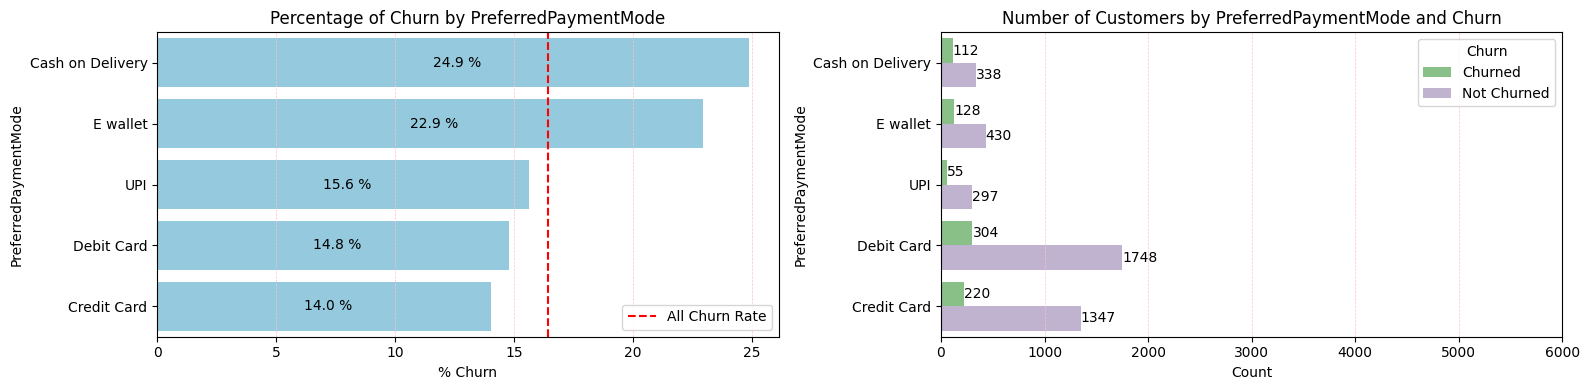

In [233]:
def create_plot(data, col, x_maks=2000):
    agg_table = data.groupby([col, 'Churn']).size().unstack().reset_index()
    agg_table['total'] = agg_table['Churned'] + agg_table['Not Churned']
    agg_table['% Churn'] = (agg_table['Churned'] / agg_table['total'] * 100).round(2)
    agg_table = agg_table.sort_values(by='% Churn', ascending=False)

    fig, axes = plt.subplots(1, 2, figsize=(16,4))

    ax1 = sns.barplot(data=agg_table, y=col, x='% Churn', ax=axes[0], color='skyblue')
    labels = ['{:.1f} %'.format(x) for x in agg_table['% Churn']]
    ax1.bar_label(ax1.containers[0], labels=labels, padding=3, label_type='center')
    ax1.set_title(f'Percentage of Churn by {col}')
    ax1.set_xlabel('% Churn')
    ax1.set_ylabel(col)
    ax1.grid(axis='x', linestyle='--', linewidth=0.5, color='pink')
    churn_rate = data['Churn'].value_counts(normalize=True).get(1, 0) * 100
    ax1.axvline(x=churn_rate, color='red', linestyle='--', label='All Churn Rate')
    ax1.legend(loc='lower right')
    ax1.grid(axis='x', linestyle='--', linewidth=0.5, color='pink')

    ax2 = sns.countplot(data=data, y=col, hue='Churn', order=agg_table[col], palette='Accent', ax=axes[1])
    ax2.set_title(f'Number of Customers by {col} and Churn')
    for container in ax2.containers:
        ax2.bar_label(container)
    ax2.set_xlim(0, x_maks)
    ax2.set_xlabel('Count')
    ax2.set_ylabel(col)
    ax2.grid(axis='x', linestyle='--', linewidth=0.5, color='pink')

    plt.tight_layout()
    plt.show()

create_plot(df, 'PreferredPaymentMode', x_maks=6000)

- Uji Statistik

In [234]:
# Chi-Square Test
from scipy.stats import chi2_contingency
contingency_table=df.groupby(['Churn','PreferredPaymentMode']).size().unstack().fillna(0)

alpha=0.05
stat,pvalue,dof,expected_freq=chi2_contingency(contingency_table)
if pvalue>alpha:
    print(f'P-Value:{pvalue:.5f}>{alpha}. Fail to Reject Ho. Kita tidak punya cukup bukti untuk menyatakan bahwa terdapat keterkaitan antara metode pembayaran dan status churn.')
else:
    print(f'P-Value:{pvalue:.5f}<={alpha}. Reject Ho. Kita punya cukup bukti untuk menyatakan bahwa terdapat keterkaitan antara metode pembayaran dan status churn')

P-Value:0.00000<=0.05. Reject Ho. Kita punya cukup bukti untuk menyatakan bahwa terdapat keterkaitan antara metode pembayaran dan status churn


- Interpretasi: 

    - Metode Cash on Delivery (COD) memiliki tingkat churn tertinggi (24.9%), yang mengindikasikan kemungkinan konsumen merasa kurang puas setelah menerima produk. [Kompas](https://www.kompas.com/tren/read/2022/06/23/160500865/mengapa-sistem-pembayaran-cod-sering-bermasalah-) mengatakan bahwa dalam COD tidak jarang ketika barang yang diterima konsumen tidak sesuai dengan yang ia pesan, hal tersebut dapat menyebabkan kekecewaan konsummen. Proses pembayaran ini juga merepotkan ketika terdapat masalah saat pengiriman, yang mungkin menambah ketidaknyamanan bagi konsumen. Kekecewaan-kekecewaan konsumen pada metode ini mungkin menjadi faktor yang menyebabkan konsumen churn.

    - Sementara itu, e-wallet juga menunjukkan tingkat churn yang signifikan (22.9%). Meskipun praktis, konsumen sering mengalami masalah teknis dan terdapat kekhawatiran tentang [keamanan data](https://accurate.id/ekonomi-keuangan/kekurangan-dompet-digital/). Proses verivikasi yang rumit mungkin juga membuat konsumen churn setelah menggunakan metode pembayaran ini. Selain itu, pada e-wallet juga terdapat biaya-biaya tersembunyi yang mungkin konsumen baru menyadari setelah menggunakannya, lalu kecewa setelah itu. Hal-hal tersebutlah yang menjadi kemungkinan konsumen churn setelah menggunkan e-wallet.

    - Debit card dan credit card (CC) menunjukkan tingkat churn yang relatif lebih rendah, masing-masing sebesar 14.81% dan 14.04%. Angka-angka tersebut dapat mencerminkan tingkat loyalitas yang lebih tinggi. Hal ini kemungkinan karena adanya kemudahan dan cenderung lebih cepat bertransaksi menggunakan [kedua metode pembayaran](https://www.hsbc.co.id/1/PA_esf-ca-app-content/content/indonesia/personal/offers/news-and-lifestyle/files/articles/html/201906/kartu-debit-vs-kartu-kredit-mana-yang-jadi-pilihan-anda.html) tersebut. 

    - Terdapat hubungan yang jelas antara metode pembayaran yang digunakan dengan churn. Metede dengan tingkat churn yang lebiih tinggi dapat menunjukkan bahwa adanya masalah dalam kepuasan konsumen saat menggunakan metode tersebut (COD dan e-wallet). Sebaliknya, konsumen dengan churn yang lebih rendah dapat mencerminakan pengalaman yang lebih positif dengan metode tersebut (Debit dan CC) yang kemungkinan karena kemudahan transaksi dan kepercayaan terhadap metode pembayaran yang lebih terpercaya.

#### **4.3.2.3 `PreferredOrderCat`**

- Tabel `PreferredOrderCat` VS `Churn`

In [235]:
agg_table = df.groupby(['PreferredOrderCat', 'Churn']).size().unstack().reset_index()
agg_table['Total'] = agg_table['Churned'] + agg_table['Not Churned']
agg_table['% Churn'] = (agg_table['Churned'] / agg_table['Total'] * 100).round(2)
agg_table = agg_table.sort_values(by='% Churn', ascending=False)
agg_table

Churn   PreferredOrderCat  Churned  Not Churned  Total  % Churn
4            Mobile Phone      288          813   1101    26.16
3                  Mobile      188          536    724    25.97
0                 Fashion      115          628    743    15.48
2      Laptop & Accessory      193         1623   1816    10.63
5                  Others       19          219    238     7.98
1                 Grocery       16          341    357     4.48

- Visualisasi

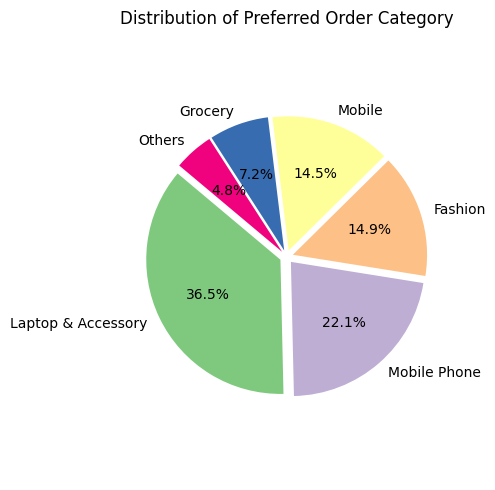

In [236]:
counts = df['PreferredOrderCat'].value_counts()
plt.figure(figsize=(5,5))
plt.pie(counts, labels=counts.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette("Accent"), explode=[0.05] * len(counts))
plt.title('Distribution of Preferred Order Category', fontsize=12)
plt.axis('equal')
plt.tight_layout()
plt.show()

C:\Users\fauzi\AppData\Local\Temp\ipykernel_17416\2348651895.py:16: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  churn_rate = data['Churn'].value_counts(normalize=True).get(1, 0) * 100


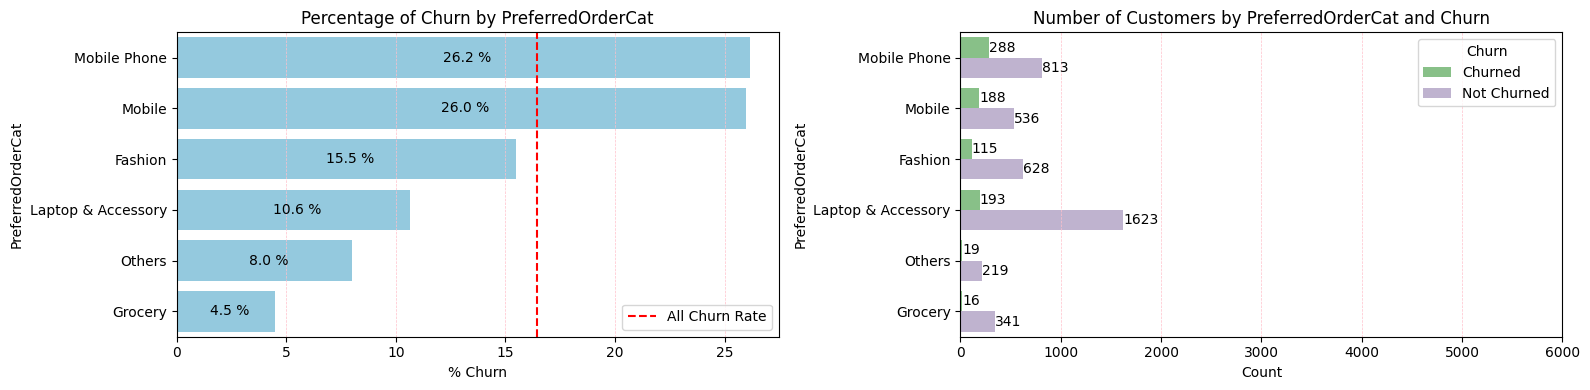

In [237]:
def create_plot(data, col, x_maks=2000):
    agg_table = data.groupby([col, 'Churn']).size().unstack().reset_index()
    agg_table['total'] = agg_table['Churned'] + agg_table['Not Churned']
    agg_table['% Churn'] = (agg_table['Churned'] / agg_table['total'] * 100).round(2)
    agg_table = agg_table.sort_values(by='% Churn', ascending=False)

    fig, axes = plt.subplots(1, 2, figsize=(16,4))

    ax1 = sns.barplot(data=agg_table, y=col, x='% Churn', ax=axes[0], color='skyblue')
    labels = ['{:.1f} %'.format(x) for x in agg_table['% Churn']]
    ax1.bar_label(ax1.containers[0], labels=labels, padding=3, label_type='center')
    ax1.set_title(f'Percentage of Churn by {col}')
    ax1.set_xlabel('% Churn')
    ax1.set_ylabel(col)
    ax1.grid(axis='x', linestyle='--', linewidth=0.5, color='pink')
    churn_rate = data['Churn'].value_counts(normalize=True).get(1, 0) * 100
    ax1.axvline(x=churn_rate, color='red', linestyle='--', label='All Churn Rate')
    ax1.legend(loc='lower right')
    ax1.grid(axis='x', linestyle='--', linewidth=0.5, color='pink')

    ax2 = sns.countplot(data=data, y=col, hue='Churn', order=agg_table[col], palette='Accent', ax=axes[1])
    ax2.set_title(f'Number of Customers by {col} and Churn')
    for container in ax2.containers:
        ax2.bar_label(container)
    ax2.set_xlim(0, x_maks)
    ax2.set_xlabel('Count')
    ax2.set_ylabel(col)
    ax2.grid(axis='x', linestyle='--', linewidth=0.5, color='pink')

    plt.tight_layout()
    plt.show()

create_plot(df, 'PreferredOrderCat', x_maks=6000)

- Uji Statistik

In [238]:
# Chi-Square Test
from scipy.stats import chi2_contingency
contingency_table=df.groupby(['Churn','PreferredOrderCat']).size().unstack().fillna(0)

alpha=0.05
stat,pvalue,dof,expected_freq=chi2_contingency(contingency_table)
if pvalue>alpha:
    print(f'P-Value:{pvalue:.5f}>{alpha}. Fail to Reject Ho. Kita tidak punya cukup bukti untuk menyatakan bahwa terdapat keterkaitan antara kategori pesanan dan status churn.')
else:
    print(f'P-Value:{pvalue:.5f}<={alpha}. Reject Ho. Kita punya cukup bukti untuk menyatakan bahwa terdapat keterkaitan antara kategori pesanan dan status churn')

P-Value:0.00000<=0.05. Reject Ho. Kita punya cukup bukti untuk menyatakan bahwa terdapat keterkaitan antara kategori pesanan dan status churn


- Interpretasi: 

    - Berikut merupakan kategori-kategori yang ada dalam `PreferredOrderCat`:
        - Mobile Phone : mengacu kepada semua jenis ponsel, baik smartphone maupun feature phone. 
        - Mobile : mengacu kepada semua jenis elektronik mobile selain ponsel dan laptop, seperti *tablet*, *smart watch*, *e-reader*, dan lain-lain.
        - Fashion : mencakup pada pakaian, sepatu, dan aksesorisnya.
        - Laptop & Accessory : mencakup laptop dan aksesorisnya seperti: mouse/keyboard.
        - Grocery : mengacu pada makanan dan kebutuhan pangan sehari-hari.
        - Other : mengacu pada produk-produk yang tidak termasuk dalam kategori utama.

    - Kategori mobile phone memiliki churn rate tertinggi, yaitu 26.16%. Hal ini cukup masuk akal karena pembelian produk dengan kategori ini bukanlah pembelian yang dilakukan dalam jangka waktu yang dekat. Namun hal ini juga bisa terjadi mungkin disesbabkan oleh ketidakpuasan konsumen terhadap produk yang diterima atau adanya masalah dalam pengiriman, yang mana jika ekspektasi konsumen tidak terpenuhi, maka konsumen akan lebih cenderung untuk churn.

    - Kategori mobile juga mencatat churn rate yang cukup tinggi sebesar 25.97%. Konsumen mungkin mengalami kesulitan teknis dengan aplikasi yang dibeli atau mungkin kurang informasi mengenai produk yang mereka butuhkan, yang mana dapat membuat konsumen menjadi churn.

    - Kategori grocery menunjukkan tingkat churn terendah, yakni 4.48%. Konsumen di segmen ini cenderung lebih loyal karena mungkin memang kategori ini merupakan kebutuhan sehari-hari konsumen yang bersifat berulang. Ketersediaan layanan antar dan informasi stock mungkin bisa menjadi faktor dalam kepuasan konsumen pada segmen ini, yang dapat membuat konsumen memilih untuk tetap menggunakan e-commerce.

    - Dari analisi ini, terlihat jelas bahwa kategori berpengaruh signifikan terhadap churn, sehingga perusahaan perlu fokus pada peningkatan pengalaman konsumen, terutama pada kategori dengan churn yang tinggi. Uji statistik menunjukkan bahwa adanya keterkaitan antara kategori pesanan dengan status churn, sehingga penting bagi perusahaan untuk mempertimbangkan strategi yang tepat untuk setiap kategorinya.

#### **4.3.2.4 Kesimpulan Preferensi Konsumen**

Berdasarkan preferensi konsumen, `PreferredLoginDevice`, `PreferredPaymentMode`, dan `PreferredOrderCat` merupakan fitur yang harus diperhatikan perusahaan dalam stategi retensi untuk mengurangi churn. 

Pada `PreferredPaymentMode`, metode Cash on Delivery (COD) dan e-wallet mencatat tingkat churn yang tinggi, masing-masing 24.9% dan 22.9%, yang menunjukkan adanya ketidakpuasan konsumen. Masalah pada kemudahan bertransaksi, kekhawatiran terhadap keamanan data, serta kurangnya keuntungan untuk konsumen saat menggunakan metode pembayaran tersebut berkontribusi pada pengalaman negatif dan dapat menjadi faktor konsumen churn. Perusahaan dapat melakukan evaluasi dan penanggulangan terhadap masalah-masalah tersebut.

`PreferredOrderCat` menunjukkan bahwa kategori mobile phone dan mobile memiliki churn tertinggi, masing-masing 26.16% dan 25.97%, yang mungkin disebabkan oleh ketidakpuasan terhadap produk atau pengiriman pada produk mobile phone serta kemungkinan kesuliatan teknis pada produk mobile. Perusahaan dapat meningkatkan kualitas produk dan layanan pengiriman untuk produk dengan kategori yang memiliki churn rate tinggi.

Selain itu, `PreferredLoginDevice` menunjukkan bahwa preferensi pengguna komputer (19.5%) lebih tinggi dibandingkan mobile phone (15.2%), yang mungkin menunjukkan bahwa pengguna komputer mungkin menghadapi lebih banyak masalah teknis ataupun kurangnya fitur yang mereka butuhkan, sehingga berkontribusi pada keputusan konsumen untuk churn. Perusahaan dapat memperbaiki fitur dan merancang strategi yang dapat memberikan pengalaman yang menarik bagi konsumen pengguna komputer.

### **4.3.3 Keterlibatan Konsumen**

#### **4.3.3.1 `Tenure`**

- Tabel `Tenure` VS `Churn`

In [239]:
# statistik deskriptif berdasarkan churn
df.groupby('Churn')['Tenure'].describe()

count       mean       std  min  25%  50%   75%   max
Churn                                                              
Churned       819.0   3.778999  5.416740  0.0  0.0  1.0   7.0  21.0
Not Churned  4160.0  11.329087  8.201046  0.0  5.0  9.0  17.0  31.0

- Visualisasi

C:\Users\fauzi\AppData\Local\Temp\ipykernel_17416\3535298357.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=medians.values, y=medians.index, ax=ax[1], palette='Accent', dodge=False)


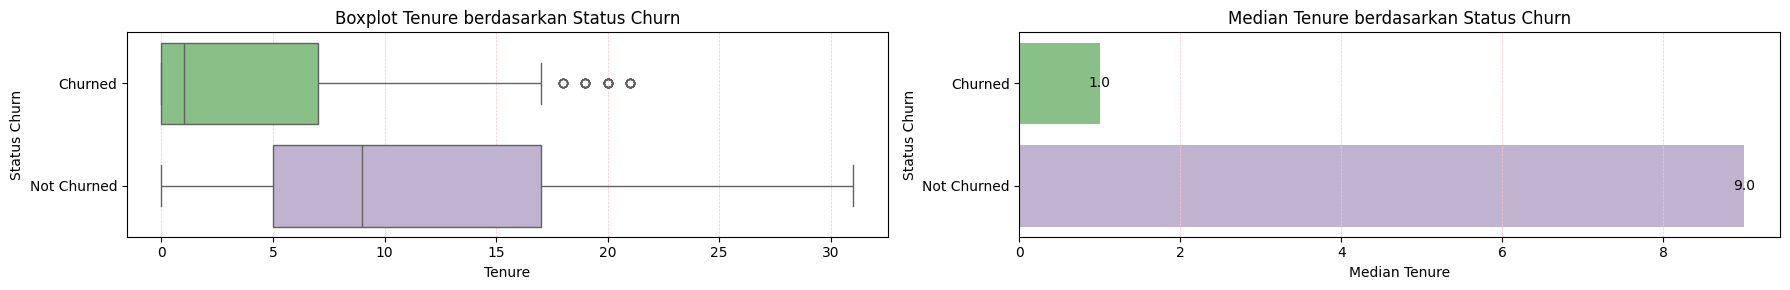

In [240]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1, 2, figsize=(18, 3))

sns.boxplot(x='Tenure', y='Churn', data=df, ax=ax[0], hue='Churn', palette='Accent')
ax[0].set_title('Boxplot Tenure berdasarkan Status Churn')
ax[0].set_xlabel('Tenure')
ax[0].set_ylabel('Status Churn')
ax[0].grid(axis='x', which='both', linestyle='--', linewidth=0.5, color='pink')

medians = df.groupby('Churn')['Tenure'].median()
sns.barplot(x=medians.values, y=medians.index, ax=ax[1], palette='Accent', dodge=False)
ax[1].set_title('Median Tenure berdasarkan Status Churn')
ax[1].set_xlabel('Median Tenure')
ax[1].set_ylabel('Status Churn')
ax[1].grid(axis='x', which='both', linestyle='--', linewidth=0.5, color='pink')

for p in ax[1].patches: ax[1].annotate(f'{p.get_width():.1f}', (p.get_width(), p.get_y() + p.get_height() / 2.), ha='center', va='center', fontsize=10, color='black')

plt.tight_layout()
plt.show()

- Uji Statistik

In [241]:
from scipy import stats
from scipy.stats import mannwhitneyu

alpha=0.05
tenure_churned=df[df['Churn']=='Churned']['Tenure']
tenure_not_churned=df[df['Churn']=='Not Churned']['Tenure']

stat,pvalue=mannwhitneyu(
    x=tenure_churned,
    y=tenure_not_churned,
    alternative='two-sided')

if pvalue>alpha:
    print(f'P-Value: {pvalue:.5f} > {alpha}. Fail to Reject Ho. Median tenure pada konsumen churn dan tidak churn adalah sama.')
else:
    print(f"P-Value: {pvalue:.5f} <= {alpha}. Reject Ho. Minimal ada 1 perbedaan signifikan antara median tenure berdasarkan churn.")


P-Value: 0.00000 <= 0.05. Reject Ho. Minimal ada 1 perbedaan signifikan antara median tenure berdasarkan churn.


- Interpretasi: 

    - `Tenure` mencerminkan durasi konsumen bergabung dalam e-commerce perusahaan yang diukur dalam rentang 1 hingga 31 bulan. Indikator ini penting karena `Tenure` yang lebih lama sering kali menunjukkan loyalitas yang lebih tinggi, sementara konsumen dengan `Tenure` yang lebih pendek mungkin masih dalam tahap adaptasi. 

    - Konsumen dengan status churned memiliki rentang `Tenure` 0 hingga 21 dengan median 1, sementara yang not churned memiliki rentang 0 hingga 31 dengan median 9. Hal ini dapat menunjukkan bahwa konsumen dengan `Tenure` yang lebih rendah memiliki kecenderungan churned. 

    - Berdasarkan kuartil, 25% konsumen yang churn adalah konsumen dengan `Tenure` 0, sedangkan 25% konsumen yang tidak churn memiliki `Tenure` minimal 5. Hal ini menunjukkan bahwa sebagian besar konsumen yang churn adalah konsumen yang baru bergabung, dari sini dapat dilihat adanya kemungkinan bahwa konsummen tidak menemukan kepuasan yang cukup dari produk ataupun layanan yang ditawarkan oleh perusahaan pada fase awal menggunakan aplikasi.

    - Dengan menolak Ho, dapat disimpulkan bahwa median `Tenure` konsumen yang chuned berbeda secara signifikan dari konsumen yang tidak churned. Hal ini mengindikasikan bahwa strategi mempertahankan loyalitas yang berbeda mungkin diperlukan untuk kedua kelompok tersebut. Sehingga dapat dikatakan bahwa perusahaan perlu ekplorasi lebih lanjut mengenai faktor-faktor yang menyebabkan perbedaan durasi `Tenure` dengan status churn konsumen.

    - Untuk mengurangi churn, perusahaan dapat menerapkan beberapa strategi promosi yang ditujukkan kepada konsumen yang menunjukkan indikasi churn berdasarkan `Tenure`, diantaranya:

        - Perusahaan dapat fokus kepada konsumen baru dengan memberikan pengalaman menyenangkan periode awal konsumen bergabung, seperti memberikan pesan selamat datang yang personal, serta menjelaskan manfaat aplikasi perusahan dan cara mengoptimalkannya. 

        - Setelah itu, agar konsumen baru tetap bertahan menggunakan aplikasi, perusahaan dapat mengembangkan program loyalitas, seperti diskon, poin, ataupun hadiah khusus yang dapat memberikan value lebih untuk konsumen secara berkala setelah jangka waktu (`Tenure`) tertentu. 
        
        - Perusahaan juga dapat mengirimkan informasi secara reguler dan berkala mengenai produk atau layanan baru, penawaran khusus dan tips berbelanja yang menyenangkan, ataupun informasi-informasi menarik untuk menjaga konsumen baru agar tidak churn.

        - Perusahaan sebaiknya melakukan evaluasi mengenai pelayanan ataupun aplikasi, yang salah satu contoh caranya adalah melakukan survei ataupun meminta feedback kepada konsumen. Hal ini sebaiknya dilakukan dengan cara yang menarik agar konsumen mau berpartisi dalam program tersebut.

#### **4.3.3.2 `HourSpendOnApp`**

- Tabel `HourSpendOnApp` VS `Churn`

In [242]:
# statistik deskriptif berdasarkan churn
df.groupby('Churn')['HourSpendOnApp'].describe()

count      mean       std  min  25%  50%  75%  max
Churn                                                           
Churned       819.0  2.945055  0.673029  2.0  2.0  3.0  3.0  4.0
Not Churned  4160.0  2.920192  0.714213  0.0  2.0  3.0  3.0  5.0

- Visualisasi

C:\Users\fauzi\AppData\Local\Temp\ipykernel_17416\354103798.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=medians.values, y=medians.index, ax=ax[1], palette='Accent', dodge=False)


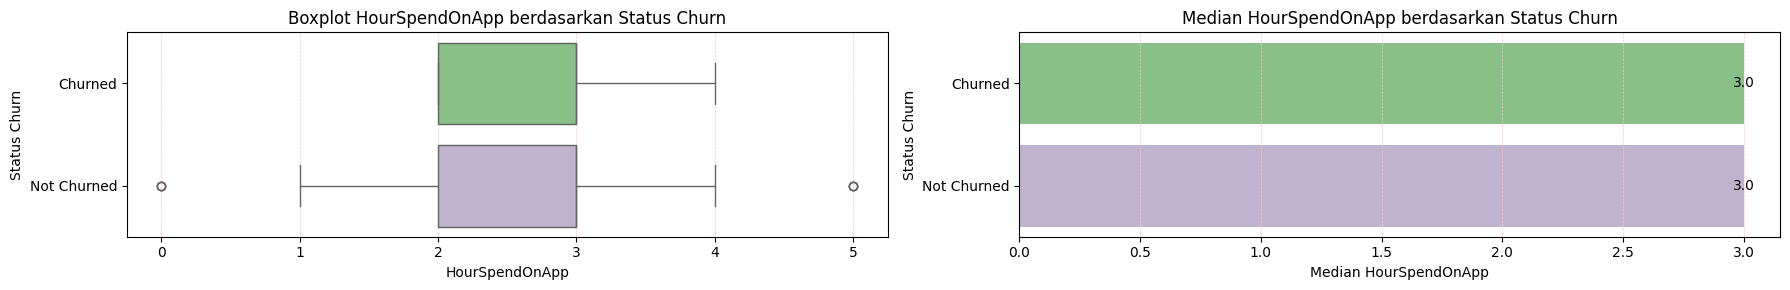

In [243]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1, 2, figsize=(18, 3))

sns.boxplot(x='HourSpendOnApp', y='Churn', data=df, ax=ax[0], hue='Churn', palette='Accent')
ax[0].set_title('Boxplot HourSpendOnApp berdasarkan Status Churn')
ax[0].set_xlabel('HourSpendOnApp')
ax[0].set_ylabel('Status Churn')
ax[0].grid(axis='x', which='both', linestyle='--', linewidth=0.5, color='pink')

medians = df.groupby('Churn')['HourSpendOnApp'].median()
sns.barplot(x=medians.values, y=medians.index, ax=ax[1], palette='Accent', dodge=False)
ax[1].set_title('Median HourSpendOnApp berdasarkan Status Churn')
ax[1].set_xlabel('Median HourSpendOnApp')
ax[1].set_ylabel('Status Churn')
ax[1].grid(axis='x', which='both', linestyle='--', linewidth=0.5, color='pink')

for p in ax[1].patches: ax[1].annotate(f'{p.get_width():.1f}', (p.get_width(), p.get_y() + p.get_height() / 2.), ha='center', va='center', fontsize=10, color='black')

plt.tight_layout()
plt.show()

- Uji Statistik

In [244]:
from scipy import stats
from scipy.stats import mannwhitneyu

alpha=0.05
HourSpendOnApp_churned=df[df['Churn']=='Churned']['HourSpendOnApp']
HourSpendOnApp_not_churned=df[df['Churn']=='Not Churned']['HourSpendOnApp']

stat,pvalue=mannwhitneyu(
    x=HourSpendOnApp_churned,
    y=HourSpendOnApp_not_churned,
    alternative='two-sided')

if pvalue>alpha:
    print(f'P-Value: {pvalue:.5f} > {alpha}. Fail to Reject Ho. Median HourSpendOnApp pada konsumen churn dan tidak churn adalah sama.')
else:
    print(f"P-Value: {pvalue:.5f} <= {alpha}. Reject Ho. Minimal ada 1 perbedaan signifikan antara median HourSpendOnApp berdasarkan churn.")


P-Value: 0.44473 > 0.05. Fail to Reject Ho. Median HourSpendOnApp pada konsumen churn dan tidak churn adalah sama.


- Interpretasi: 

    - Median waktu yang dihabiskan oleh konsumen dalam menggunakan aplikasi baik yang churn maupun tidak adalah tiga jam. Uji statistik yang menunjukkan bahwa tidak ada cukup bukti untuk menolak hipotesis nol, yang mendukung bahwa tidak ada perbedaan signifikan dalam median waktu yang dihabiskan antara kedua segmen.

    - Dari sisi kuartil, kuartil 25% dan kuartil 75% untuk konsumen churn dan tidak juga sama, yaitu: dua jam dan tiga jam. Hal ini mengindikasikan bahwa keterlibatan diantara kedua segmen ini tidak berbeda jauh dalam hal distribusi waktu yang dihabiskan

    -  Hal ini menunjukkan bahwa Ini menunjukkan bahwa `HourSpendOnApp` bukanlah faktor utama dalam keputusan konsumen untuk churn atau tidak. Oleh karena itu, perusahaan dapat mengidentifikasi faktor-faktor lain yang mungkin lebih berpengaruh terhadap churn.


#### **4.3.3.3 `NumberOfDeviceRegistered`** 

- Tabel `NumberOfDeviceRegistered` VS `Churn`

In [245]:
# statistik deskriptif berdasarkan churn
df.groupby('Churn')['NumberOfDeviceRegistered'].describe()

count      mean       std  min  25%  50%  75%  max
Churn                                                           
Churned       819.0  3.946276  1.023941  1.0  3.0  4.0  5.0  6.0
Not Churned  4160.0  3.627644  1.026017  1.0  3.0  4.0  4.0  6.0

- Visualisasi

C:\Users\fauzi\AppData\Local\Temp\ipykernel_17416\3557614969.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=medians.values, y=medians.index, ax=ax[1], palette='Accent', dodge=False)


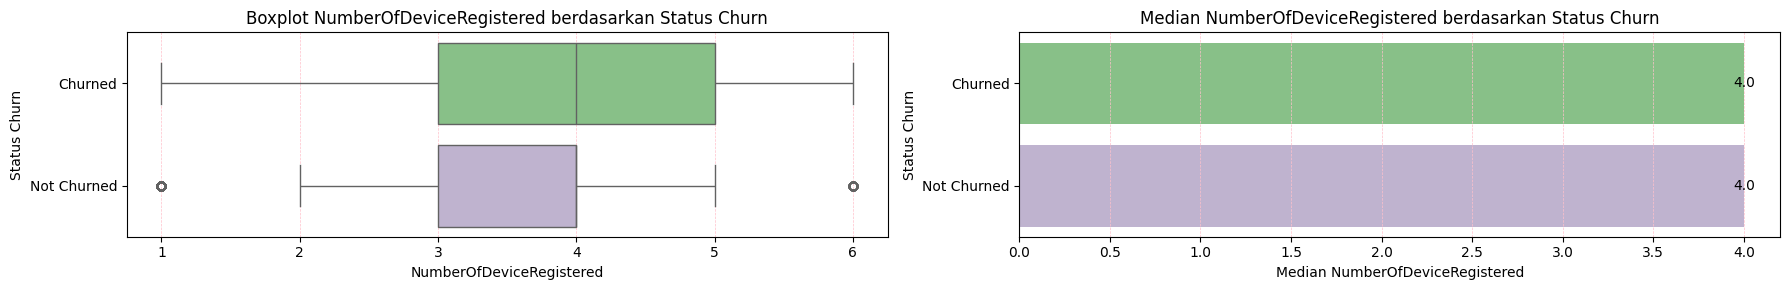

In [246]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1, 2, figsize=(18, 3))

sns.boxplot(x='NumberOfDeviceRegistered', y='Churn', data=df, ax=ax[0], hue='Churn', palette='Accent')
ax[0].set_title('Boxplot NumberOfDeviceRegistered berdasarkan Status Churn')
ax[0].set_xlabel('NumberOfDeviceRegistered')
ax[0].set_ylabel('Status Churn')
ax[0].grid(axis='x', which='both', linestyle='--', linewidth=0.5, color='pink')

medians = df.groupby('Churn')['NumberOfDeviceRegistered'].median()
sns.barplot(x=medians.values, y=medians.index, ax=ax[1], palette='Accent', dodge=False)
ax[1].set_title('Median NumberOfDeviceRegistered berdasarkan Status Churn')
ax[1].set_xlabel('Median NumberOfDeviceRegistered')
ax[1].set_ylabel('Status Churn')
ax[1].grid(axis='x', which='both', linestyle='--', linewidth=0.5, color='pink')

for p in ax[1].patches: ax[1].annotate(f'{p.get_width():.1f}', (p.get_width(), p.get_y() + p.get_height() / 2.), ha='center', va='center', fontsize=10, color='black')

plt.tight_layout()
plt.show()

- Uji Statistik

In [247]:
from scipy import stats
from scipy.stats import mannwhitneyu

alpha=0.05
NumberOfDeviceRegistered_churned=df[df['Churn']=='Churned']['NumberOfDeviceRegistered']
NumberOfDeviceRegistered_not_churned=df[df['Churn']=='Not Churned']['NumberOfDeviceRegistered']

stat,pvalue=mannwhitneyu(
    x=NumberOfDeviceRegistered_churned,
    y=NumberOfDeviceRegistered_not_churned,
    alternative='two-sided')

if pvalue>alpha:
    print(f'P-Value: {pvalue:.5f} > {alpha}. Fail to Reject Ho. Median NumberOfDeviceRegistered pada konsumen churn dan tidak churn adalah sama.')
else:
    print(f"P-Value: {pvalue:.5f} <= {alpha}. Reject Ho. Minimal ada 1 perbedaan signifikan antara median NumberOfDeviceRegistered berdasarkan churn.")


P-Value: 0.00000 <= 0.05. Reject Ho. Minimal ada 1 perbedaan signifikan antara median NumberOfDeviceRegistered berdasarkan churn.


- Interpretasi: 

    - Meskipun median jumlah perangkat terdaftar antara konsumen churn dan tidak adalah sama, yaitu empat perangkat, terdapat perbedaan cukup signifikan dalam distribusi data. Konsumen yang tidak churn memiliki rentang kuartil 25-75% yang lebih sempit, yakni tiga hingga empat perangkat.Sedangkan untuk konsumen churn memiliki rentang kuartil 25-75% yang lebih luas, yakni dari tiga hingga lima perangkat. Konsummen dengan lebih banyak perangkat mungkin cenderung memiliki ekspektasi yang tinggi terhadap e-commerce, yang jika ekspektasi tersebut tidak terpenuhi maka konsumen akan cenderung churn.

    - Namun jika berdasarkan hipotesa pada analisa korelasi, maka hubungan antara `NumberOfDeviceRegistered` dan churn ini sangat lemah. Hal ini mengindikasikan bahwa meskipun terdapat variasi dalam jumlah perangkat yang dapat mempengaruhi keputusan churn, faktor lain yang signifikan mungkin lebih berperan dalam keputusan konsumen untuk churn atau tidak.

#### **4.3.3.4 `NumberOfAddress`**

- Tabel `NumberOfAddress` VS `Churn`

In [248]:
# statistik deskriptif berdasarkan churn
df.groupby('Churn')['NumberOfAddress'].describe()

count      mean       std  min  25%  50%  75%   max
Churn                                                            
Churned       819.0  4.306471  2.524229  1.0  2.0  3.0  6.0  10.0
Not Churned  4160.0  4.019952  2.372264  1.0  2.0  3.0  5.0  10.0

- Visualisasi

C:\Users\fauzi\AppData\Local\Temp\ipykernel_17416\2412255998.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=medians.values, y=medians.index, ax=ax[1], palette='Accent', dodge=False)


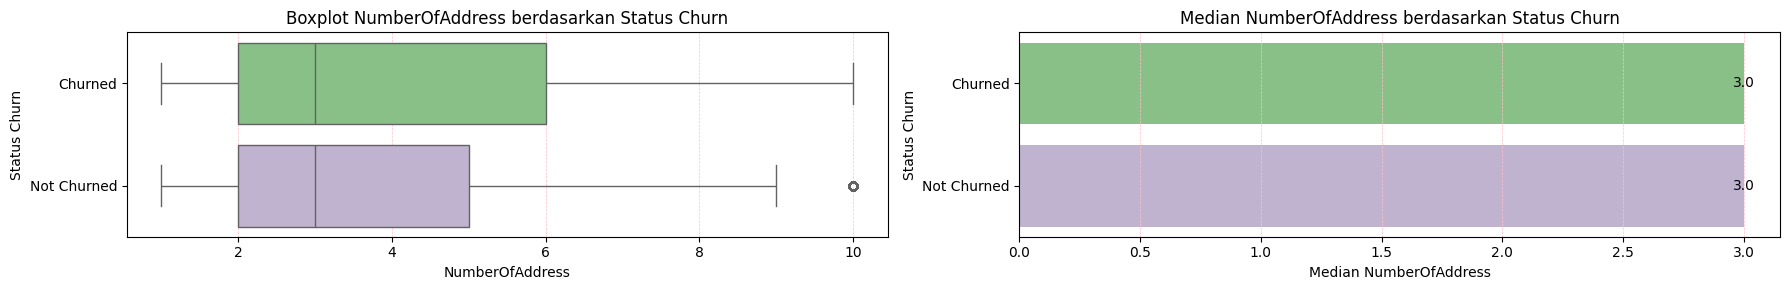

In [249]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1, 2, figsize=(18, 3))

sns.boxplot(x='NumberOfAddress', y='Churn', data=df, ax=ax[0], hue='Churn', palette='Accent')
ax[0].set_title('Boxplot NumberOfAddress berdasarkan Status Churn')
ax[0].set_xlabel('NumberOfAddress')
ax[0].set_ylabel('Status Churn')
ax[0].grid(axis='x', which='both', linestyle='--', linewidth=0.5, color='pink')

medians = df.groupby('Churn')['NumberOfAddress'].median()
sns.barplot(x=medians.values, y=medians.index, ax=ax[1], palette='Accent', dodge=False)
ax[1].set_title('Median NumberOfAddress berdasarkan Status Churn')
ax[1].set_xlabel('Median NumberOfAddress')
ax[1].set_ylabel('Status Churn')
ax[1].grid(axis='x', which='both', linestyle='--', linewidth=0.5, color='pink')

for p in ax[1].patches: ax[1].annotate(f'{p.get_width():.1f}', (p.get_width(), p.get_y() + p.get_height() / 2.), ha='center', va='center', fontsize=10, color='black')

plt.tight_layout()
plt.show()

- Uji Statistik

In [250]:
from scipy import stats
from scipy.stats import mannwhitneyu

alpha=0.05
NumberOfAddress_churned=df[df['Churn']=='Churned']['NumberOfAddress']
NumberOfAddress_not_churned=df[df['Churn']=='Not Churned']['NumberOfAddress']

stat,pvalue=mannwhitneyu(
    x=NumberOfAddress_churned,
    y=NumberOfAddress_not_churned,
    alternative='two-sided')

if pvalue>alpha:
    print(f'P-Value: {pvalue:.5f} > {alpha}. Fail to Reject Ho. Median Number Of Address pada konsumen churn dan tidak churn adalah sama.')
else:
    print(f"P-Value: {pvalue:.5f} <= {alpha}. Reject Ho. Minimal ada 1 perbedaan signifikan antara median Number Of Address berdasarkan churn.")


P-Value: 0.01571 <= 0.05. Reject Ho. Minimal ada 1 perbedaan signifikan antara median Number Of Address berdasarkan churn.


- Interpretasi: 

    - Median `NumberOfAddress` menunjukkan nilai yang sama untuk kedua kelompok, yaitu 3. Kedua konsumen juga menunjukkan variasi dengan rentang 1 hingga 10 alamat. Namun, konsumen yang tidak churn lebih terkonsentrasi pada angka yang lebih rendah.

    - Konsumen dengan alamat yang lebih banyak mungkinmengalami kesulitan dalam pengelolaan aplikasi, yang dapat menjadi faktor pemicu churn. Sebaliknya, konsummen yang memiliki lebih sedikit alamat cenderung memiliki pengaturan aplikasi yang lebih mudah, sehingga cendrung untuk tetap menggunakan aplikasi. Namun, jika berdasarkan hipotesa pada analisa korelasi, dapat dikatakan bahwa meskipun terdapat variasi dalam jumlah alamat terdaftar yang dapat mempengaruhi keputusan churn, perusahaan dapat mengevaluasi kembali faktor lain yang lebih signifikan.

#### **4.3.3.5 Kesimpulan Keterlibatan Konsumen**

Berdasarkan keterlibatan konsumen, `Tenure` merupakan fitur paling berpengaruh terhadap tingkat churn. Berdasarkan korelasi negatif terhadapa churn (-0.38) menunjukkan bahwa semakin lama konsumen bergabung, semakin kecil kemungkinan mereka untuk churn. Konsumen yang churned cenderung memiliki `Tenure` yang lebih pendek, dengan 25% dari konsumen yang baru bergabung. Hal ini dapat mengindikasikan bahwa konsumen baru mungkin kurang mendapatkan kepuasaan yang cukup dari produk ataupun layanan yang tersedia. Oleh karena itu, perusahaan sebagiknya fokus pada pengalaman konsummen terlebih untuk pengalaman fase awal konsumen yang baru bergabung, sehingga dapat menurunkan resiko churn pada segmen ini.

### **4.3.4 Aktivitas Transaksi Konsumen**

#### **4.3.4.1 `WarehouseToHome`**

- Tabel `WarehouseToHome` VS `Churn`

In [251]:
# statistik deskriptif berdasarkan churn
df.groupby('Churn')['WarehouseToHome'].describe()

count       mean       std  min   25%   50%   75%   max
Churn                                                                
Churned       819.0  16.761905  8.423434  5.0  10.0  14.0  22.0  36.0
Not Churned  4160.0  15.146154  8.070457  5.0   9.0  13.0  18.0  36.0

- Visualisasi

C:\Users\fauzi\AppData\Local\Temp\ipykernel_17416\3343120302.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=medians.values, y=medians.index, ax=ax[1], palette='Accent', dodge=False)


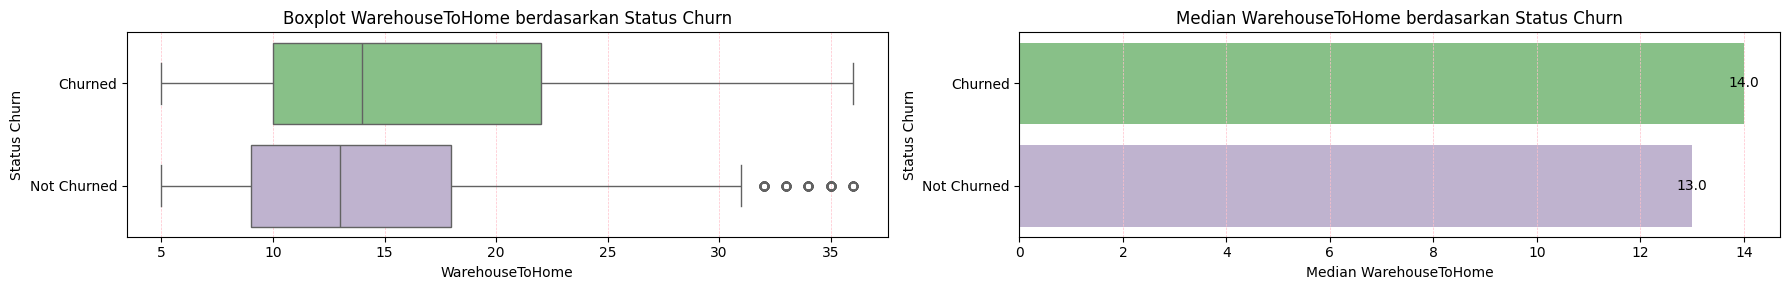

In [252]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1, 2, figsize=(18, 3))

sns.boxplot(x='WarehouseToHome', y='Churn', data=df, ax=ax[0], hue='Churn', palette='Accent')
ax[0].set_title('Boxplot WarehouseToHome berdasarkan Status Churn')
ax[0].set_xlabel('WarehouseToHome')
ax[0].set_ylabel('Status Churn')
ax[0].grid(axis='x', which='both', linestyle='--', linewidth=0.5, color='pink')

medians = df.groupby('Churn')['WarehouseToHome'].median()
sns.barplot(x=medians.values, y=medians.index, ax=ax[1], palette='Accent', dodge=False)
ax[1].set_title('Median WarehouseToHome berdasarkan Status Churn')
ax[1].set_xlabel('Median WarehouseToHome')
ax[1].set_ylabel('Status Churn')
ax[1].grid(axis='x', which='both', linestyle='--', linewidth=0.5, color='pink')

for p in ax[1].patches: ax[1].annotate(f'{p.get_width():.1f}', (p.get_width(), p.get_y() + p.get_height() / 2.), ha='center', va='center', fontsize=10, color='black')

plt.tight_layout()
plt.show()

- Uji Statistik

In [253]:
from scipy import stats
from scipy.stats import mannwhitneyu

alpha=0.05
WarehouseToHome_churned=df[df['Churn']=='Churned']['WarehouseToHome']
WarehouseToHome_not_churned=df[df['Churn']=='Not Churned']['WarehouseToHome']

stat,pvalue=mannwhitneyu(
    x=WarehouseToHome_churned,
    y=WarehouseToHome_not_churned,
    alternative='two-sided')

if pvalue>alpha:
    print(f'P-Value: {pvalue:.5f} > {alpha}. Fail to Reject Ho. Median WarehouseToHome pada konsumen churn dan tidak churn adalah sama.')
else:
    print(f"P-Value: {pvalue:.5f} <= {alpha}. Reject Ho. Minimal ada 1 perbedaan signifikan antara median WarehouseToHome berdasarkan churn.")


P-Value: 0.00000 <= 0.05. Reject Ho. Minimal ada 1 perbedaan signifikan antara median WarehouseToHome berdasarkan churn.


- Interpretasi: 

    - Terdapat perbedaan antara median konsumen yang churn dan tidak churn. Konsumen churn memiliki median dengan jarak 14 mil, sementara konsumen yang tidak churn memiliki median dengan jarak 13 mil. Hal ini dapat menunjukkan bahwa konsumen yang churn cenderung tinggal lebih jauh dari gudang, yang mungkin dapat mempengaruhi ekspedisi pengiriman.

    - Jarak yang lebih jauh dari gudang dapat menyebabkan waktu pengiriman yang lebih lama dan jika konsumen merasa bahwa pengiriman tersebut tidak sesuai harapan, maka hal ini dapat menjadi faktor churn. Konsumen yang tinggal lebih jauh juga mungkin memiliki resiko barang yang diterimanya rusak lebih tinggi dibandingkan konsumen yang tinggal lebih dekat dengan gudang, yang juga dapat menjadi faktor konsumen churn.

#### **4.3.4.2 `OrderAmountHikeFromLastYear`**

- Tabel `OrderAmountHikeFromLastYear` VS `Churn`

In [254]:
# statistik deskriptif berdasarkan churn
df.groupby('Churn')['OrderAmountHikeFromLastYear'].describe()

count       mean       std   min   25%   50%   75%   max
Churn                                                                 
Churned       819.0  15.481074  3.732900  11.0  13.0  14.0  18.0  26.0
Not Churned  4160.0  15.714423  3.576214  11.0  13.0  15.0  18.0  26.0

- Visualisasi

C:\Users\fauzi\AppData\Local\Temp\ipykernel_17416\3748981995.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=medians.values, y=medians.index, ax=ax[1], palette='Accent', dodge=False)


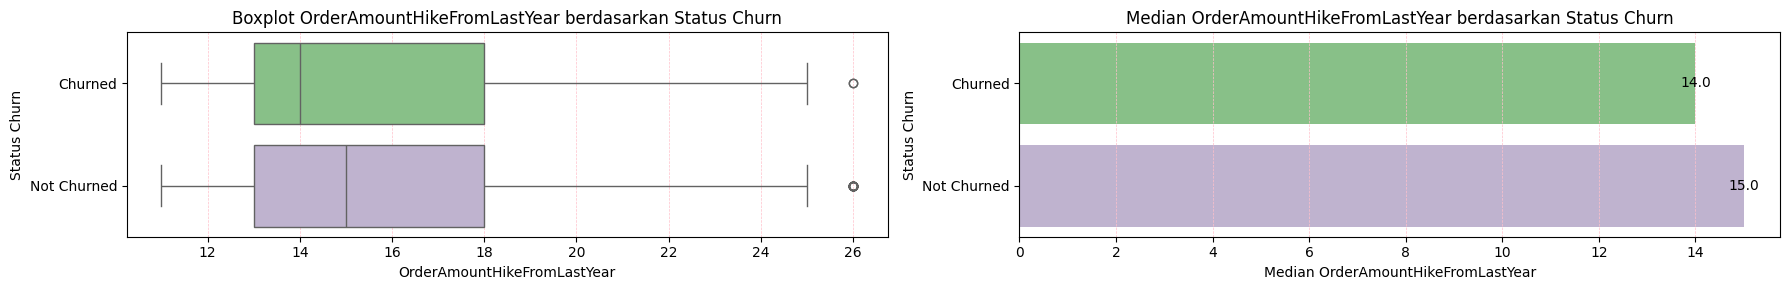

In [255]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1, 2, figsize=(18, 3))

sns.boxplot(x='OrderAmountHikeFromLastYear', y='Churn', data=df, ax=ax[0], hue='Churn', palette='Accent')
ax[0].set_title('Boxplot OrderAmountHikeFromLastYear berdasarkan Status Churn')
ax[0].set_xlabel('OrderAmountHikeFromLastYear')
ax[0].set_ylabel('Status Churn')
ax[0].grid(axis='x', which='both', linestyle='--', linewidth=0.5, color='pink')

medians = df.groupby('Churn')['OrderAmountHikeFromLastYear'].median()
sns.barplot(x=medians.values, y=medians.index, ax=ax[1], palette='Accent', dodge=False)
ax[1].set_title('Median OrderAmountHikeFromLastYear berdasarkan Status Churn')
ax[1].set_xlabel('Median OrderAmountHikeFromLastYear')
ax[1].set_ylabel('Status Churn')
ax[1].grid(axis='x', which='both', linestyle='--', linewidth=0.5, color='pink')

for p in ax[1].patches: ax[1].annotate(f'{p.get_width():.1f}', (p.get_width(), p.get_y() + p.get_height() / 2.), ha='center', va='center', fontsize=10, color='black')

plt.tight_layout()
plt.show()

- Uji Statistik

In [256]:
from scipy import stats
from scipy.stats import mannwhitneyu

alpha=0.05
OrderAmountHikeFromLastYear_churned=df[df['Churn']=='Churned']['OrderAmountHikeFromLastYear']
OrderAmountHikeFromLastYear_not_churned=df[df['Churn']=='Not Churned']['OrderAmountHikeFromLastYear']

stat,pvalue=mannwhitneyu(
    x=OrderAmountHikeFromLastYear_churned,
    y=OrderAmountHikeFromLastYear_not_churned,
    alternative='two-sided')

if pvalue>alpha:
    print(f'P-Value: {pvalue:.5f} > {alpha}. Fail to Reject Ho. Median Order Amount Hike From Last Year pada konsumen churn dan tidak churn adalah sama.')
else:
    print(f"P-Value: {pvalue:.5f} <= {alpha}. Reject Ho. Minimal ada 1 perbedaan signifikan antara median Order Amount Hike From Last Year berdasarkan churn.")


P-Value: 0.00716 <= 0.05. Reject Ho. Minimal ada 1 perbedaan signifikan antara median Order Amount Hike From Last Year berdasarkan churn.


- Interpretasi: 

    - Meskipun median untuk kedua kelompok pada `OrderAmountHikeFromLastYear` adalah mirip, yaitu 14 untuk konsumen yang churn dan 15 untuk konsumen yang tidak churn, varians pada konsumen churn sedikit lebih besar. Baik konsumen yang churn maupun tidak churn memiliki rentang yang sama, dengan minimum 11 maksimum 26. Hal ini menunjukkan bahwa tidak ada pola yang jelas yang dapat membedakan antara konsumen yang churn dan tidak churn berdasarkan peningkatan jumlah pesanan dari tahun lalu. Dengan kata lain, `OrderAmountHikeFromLastYear` tidak menjadi indikator yang kuat untuk memprediksi perilaku churn seorang konsumen.

    - Berdasarkan hipotesa pada data korelasi, data menunjukkan bahwa meskipun terdapat sedikit pengaruh dari peningkatan jumlah pesanan tahun lalu terhadap keputusan konsumen churn, perusahaan mungkin bisa mencari faktor lain yang lebih dominan.

#### **4.3.4.3 `CouponUsed`**

- Tabel `CouponUsed` VS `Churn`

In [257]:
# statistik deskriptif berdasarkan churn
df.groupby('Churn')['CouponUsed'].describe()

count      mean       std  min  25%  50%  75%   max
Churn                                                            
Churned       819.0  1.780220  1.974916  0.0  1.0  1.0  2.0  16.0
Not Churned  4160.0  1.830048  1.943500  0.0  1.0  1.0  2.0  16.0

- Visualisasi

C:\Users\fauzi\AppData\Local\Temp\ipykernel_17416\682593625.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=medians.values, y=medians.index, ax=ax[1], palette='Accent', dodge=False)


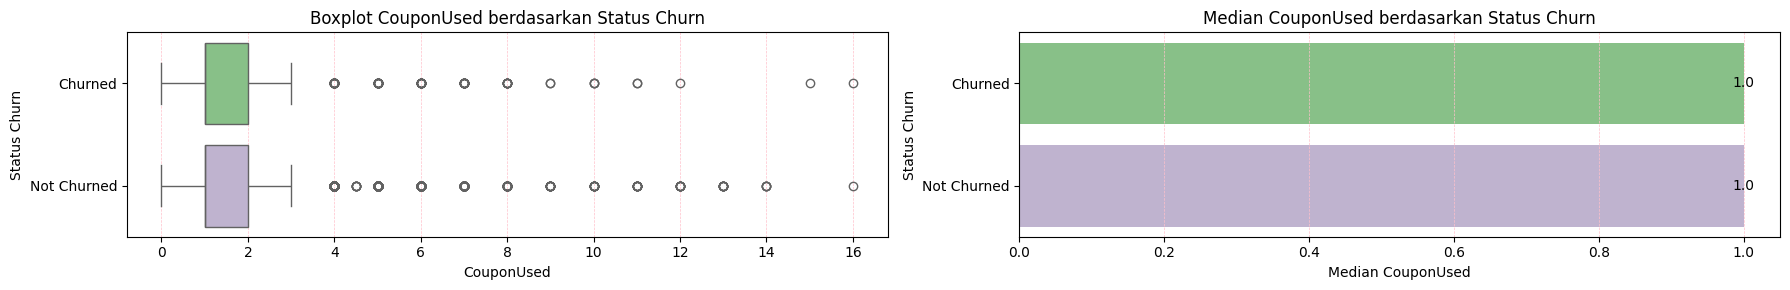

In [258]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1, 2, figsize=(18, 3))

sns.boxplot(x='CouponUsed', y='Churn', data=df, ax=ax[0], hue='Churn', palette='Accent')
ax[0].set_title('Boxplot CouponUsed berdasarkan Status Churn')
ax[0].set_xlabel('CouponUsed')
ax[0].set_ylabel('Status Churn')
ax[0].grid(axis='x', which='both', linestyle='--', linewidth=0.5, color='pink')

medians = df.groupby('Churn')['CouponUsed'].median()
sns.barplot(x=medians.values, y=medians.index, ax=ax[1], palette='Accent', dodge=False)
ax[1].set_title('Median CouponUsed berdasarkan Status Churn')
ax[1].set_xlabel('Median CouponUsed')
ax[1].set_ylabel('Status Churn')
ax[1].grid(axis='x', which='both', linestyle='--', linewidth=0.5, color='pink')

for p in ax[1].patches: ax[1].annotate(f'{p.get_width():.1f}', (p.get_width(), p.get_y() + p.get_height() / 2.), ha='center', va='center', fontsize=10, color='black')

plt.tight_layout()
plt.show()

- Uji Statistik

In [259]:
from scipy import stats
from scipy.stats import mannwhitneyu

alpha=0.05
CouponUsed_churned=df[df['Churn']=='Churned']['CouponUsed']
CouponUsed_not_churned=df[df['Churn']=='Not Churned']['CouponUsed']

stat,pvalue=mannwhitneyu(
    x=CouponUsed_churned,
    y=CouponUsed_not_churned,
    alternative='two-sided')

if pvalue>alpha:
    print(f'P-Value: {pvalue:.5f} > {alpha}. Fail to Reject Ho. Median Coupon Used pada konsumen churn dan tidak churn adalah sama.')
else:
    print(f"P-Value: {pvalue:.5f} <= {alpha}. Reject Ho. Minimal ada 1 perbedaan signifikan antara median Coupon Used berdasarkan churn.")


P-Value: 0.21573 > 0.05. Fail to Reject Ho. Median Coupon Used pada konsumen churn dan tidak churn adalah sama.


- Interpretasi: 

    - Median menunjukkan bahwa konsumen hanya menggunakan satu kupon baik yang churn maupun tidak. Hal ini dapat mengindikasikan bahwa mungkin banyak konsumen yang menggunakan kupon hanya untuk program tertentu atau saat konsumen merasa perlu, sehingga tidak merasa perlu menggunakan lebih dari satu kupon dalam sebulan terakhir. Selain itu, strategi pemasaran yang diterapkan mungkin membuat konsumen menggunakan kupon yang lebih terbatas, misalnya kupon yang menarik konsumen baru atau hanya untuk meningkatkan frekuensi pembelian. Terakhir, beberapa konsumen mungkin hanya sesekali berbelanja, sehingga konsumen hanya memanfaatkan kupon yang tersedia saat konsumen melakukan transaksi. Hal ini dapat menunjukkan bahwa meskipun terdapat program kupon yang ditawarkan, terdapat alasan berbelanja yang sulit dikondisikan oleh perusahaan yang dapat mempengaruhi jumlah penggunaan kupon.

    - Pada `CouponUsed`, deskriptif statistik dan uji statistik menunjukkan bahwa tidak ada perbedaan signifikan antara median konsumen churn dan tidak, sehingga perusahaan perlu fokus pada faktor-faktor lain yang dapat berkontribusi pada churn rate. 

#### **4.3.4.4 `OrderCount`** 

- Tabel `OrderCount` VS `Churn`

In [260]:
# statistik deskriptif berdasarkan churn
df.groupby('Churn')['OrderCount'].describe()

count      mean       std  min  25%  50%  75%   max
Churn                                                            
Churned       819.0  2.954823  2.928514  1.0  1.0  2.0  3.0  16.0
Not Churned  4160.0  3.126082  3.009527  1.0  1.0  2.0  4.0  16.0

- Visualisasi

C:\Users\fauzi\AppData\Local\Temp\ipykernel_17416\315790731.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=medians.values, y=medians.index, ax=ax[1], palette='Accent', dodge=False)


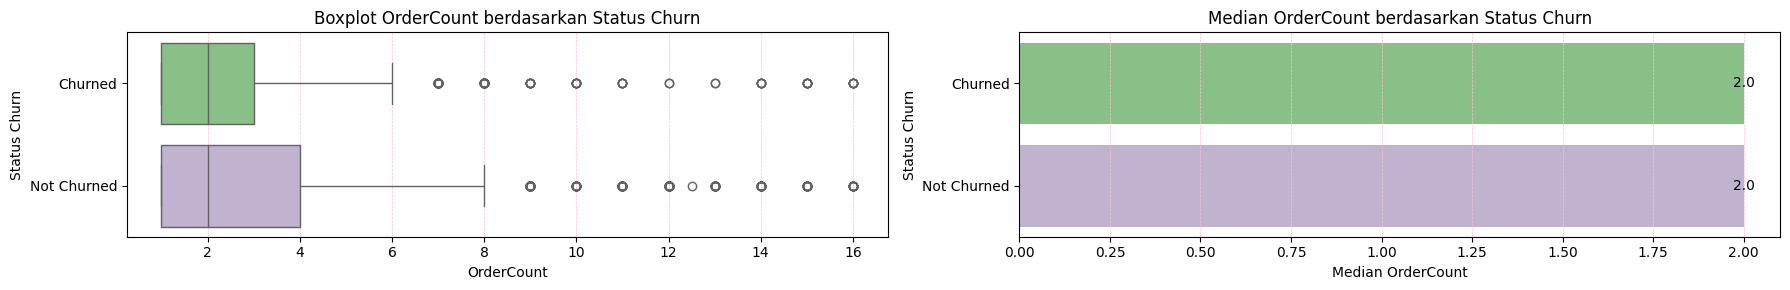

In [261]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1, 2, figsize=(18, 3))

sns.boxplot(x='OrderCount', y='Churn', data=df, ax=ax[0], hue='Churn', palette='Accent')
ax[0].set_title('Boxplot OrderCount berdasarkan Status Churn')
ax[0].set_xlabel('OrderCount')
ax[0].set_ylabel('Status Churn')
ax[0].grid(axis='x', which='both', linestyle='--', linewidth=0.5, color='pink')

medians = df.groupby('Churn')['OrderCount'].median()
sns.barplot(x=medians.values, y=medians.index, ax=ax[1], palette='Accent', dodge=False)
ax[1].set_title('Median OrderCount berdasarkan Status Churn')
ax[1].set_xlabel('Median OrderCount')
ax[1].set_ylabel('Status Churn')
ax[1].grid(axis='x', which='both', linestyle='--', linewidth=0.5, color='pink')

for p in ax[1].patches: ax[1].annotate(f'{p.get_width():.1f}', (p.get_width(), p.get_y() + p.get_height() / 2.), ha='center', va='center', fontsize=10, color='black')

plt.tight_layout()
plt.show()

- Uji Statistik

In [262]:
from scipy import stats
from scipy.stats import mannwhitneyu

alpha=0.05
OrderCount_churned=df[df['Churn']=='Churned']['OrderCount']
OrderCount_not_churned=df[df['Churn']=='Not Churned']['OrderCount']

stat,pvalue=mannwhitneyu(
    x=OrderCount_churned,
    y=OrderCount_not_churned,
    alternative='two-sided')

if pvalue>alpha:
    print(f'P-Value: {pvalue:.5f} > {alpha}. Fail to Reject Ho. Median Order Count pada konsumen churn dan tidak churn adalah sama.')
else:
    print(f"P-Value: {pvalue:.5f} <= {alpha}. Reject Ho. Minimal ada 1 perbedaan signifikan antara median Order Count berdasarkan churn.")


P-Value: 0.10269 > 0.05. Fail to Reject Ho. Median Order Count pada konsumen churn dan tidak churn adalah sama.


- Interpretasi: 

- Median `OrderCount` baik untuk konsumen yang churn maupun tidak churn adalah 2, yang didukung juga oleh uji statistik yang gagal menolak H0. Hal ini dapat menunjukkan bahwa konsumen yang sudah churn memiliki pola pembelian yang sama dengan konsumen yang masih loyal. Namun, meskipun median sama, variabilitas yang tinggi dalam perilaku konsumen menunjukkan perlunya strategi pemasaran yang lebih tersegmentasi. 

- Dalam beberapa kategori produk, siklus pembelian bisa jadi bervariasi. Namun ada juga pembelian yang dilakukan secara berkala, misalnya konsumen mungkin hanya memerlukan produk tertentu dalam setiap bulan, sehingga hanya melakukan transaksi sebulan sekali atau dua kali. Hal tersebut memungkinkan, meskipun status konsumen yang yang berbeda, jumlah pesanan dalam sebulan bisa tetap sama.

- Ketidak adanya perbedaan signifikan dalam jumlah pesanan dapat menandakan bahwa alasan churn mungkin terletak pada faktor lain, yang harus dicermati oleh perusahaan.


#### **4.3.4.5 `DaySinceLastOrder`** 

- Tabel `DaySinceLastOrder` VS `Churn`

In [263]:
# statistik deskriptif berdasarkan churn
df.groupby('Churn')['DaySinceLastOrder'].describe()

count      mean       std  min  25%  50%  75%   max
Churn                                                            
Churned       819.0  3.269841  3.033506  0.0  1.0  3.0  5.0  15.0
Not Churned  4160.0  4.727644  3.575800  0.0  2.0  3.0  8.0  31.0

- Visualisasi

C:\Users\fauzi\AppData\Local\Temp\ipykernel_17416\2813082542.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=medians.values, y=medians.index, ax=ax[1], palette='Accent', dodge=False)


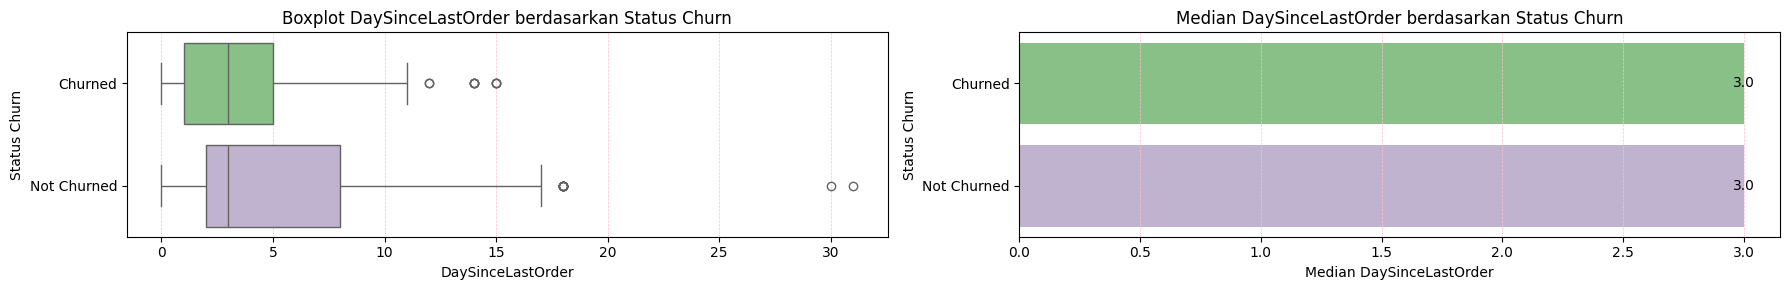

In [264]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1, 2, figsize=(18, 3))

sns.boxplot(x='DaySinceLastOrder', y='Churn', data=df, ax=ax[0], hue='Churn', palette='Accent')
ax[0].set_title('Boxplot DaySinceLastOrder berdasarkan Status Churn')
ax[0].set_xlabel('DaySinceLastOrder')
ax[0].set_ylabel('Status Churn')
ax[0].grid(axis='x', which='both', linestyle='--', linewidth=0.5, color='pink')

medians = df.groupby('Churn')['DaySinceLastOrder'].median()
sns.barplot(x=medians.values, y=medians.index, ax=ax[1], palette='Accent', dodge=False)
ax[1].set_title('Median DaySinceLastOrder berdasarkan Status Churn')
ax[1].set_xlabel('Median DaySinceLastOrder')
ax[1].set_ylabel('Status Churn')
ax[1].grid(axis='x', which='both', linestyle='--', linewidth=0.5, color='pink')

for p in ax[1].patches: ax[1].annotate(f'{p.get_width():.1f}', (p.get_width(), p.get_y() + p.get_height() / 2.), ha='center', va='center', fontsize=10, color='black')

plt.tight_layout()
plt.show()

- Uji Statistik

In [265]:
from scipy import stats
from scipy.stats import mannwhitneyu

alpha=0.05
DaySinceLastOrder_churned=df[df['Churn']=='Churned']['DaySinceLastOrder']
DaySinceLastOrder_not_churned=df[df['Churn']=='Not Churned']['DaySinceLastOrder']

stat,pvalue=mannwhitneyu(
    x=DaySinceLastOrder_churned,
    y=DaySinceLastOrder_not_churned,
    alternative='two-sided')

if pvalue>alpha:
    print(f'P-Value: {pvalue:.5f} > {alpha}. Fail to Reject Ho. Median Day Since Last Order pada konsumen churn dan tidak churn adalah sama.')
else:
    print(f"P-Value: {pvalue:.5f} <= {alpha}. Reject Ho. Minimal ada 1 perbedaan signifikan antara median Day Since Last Order berdasarkan churn.")


P-Value: 0.00000 <= 0.05. Reject Ho. Minimal ada 1 perbedaan signifikan antara median Day Since Last Order berdasarkan churn.


- Interpretasi: 

    - Median `DaySinceLastOrder` untuk konsumen churn dan tidak churn adalah 3 hari. Berdasarkan distribusinya, konsumen yang churn memiliki rentang yang lebih sempit, yakni dari 0 hingga 15 hari, sementara konsumen yang tidak churn memiliki rentang yang lebih luas, yakni 0 hingga 31 hari. Fenomena ini menimbulkan pertanyaan: bagaimana mungkin konsumen dengan waktu pemesanan terakhir 0 hari, masih memiliki untuk churn? Ini menunjukkan bahwa ketidakaktifan dalam pemesanan terakhit mungkin bukanlah faktor penentu dalam keputusan untuk churn. Perusahaan dapat lebih berfokus pada faktor-faktor lain yang lebih mendalam mengenai faktor churn.

#### **4.3.4.6 `CashbackAmount`**

- Tabel `CashbackAmount` VS `Churn`

In [266]:
# statistik deskriptif berdasarkan churn
df.groupby('Churn')['CashbackAmount'].describe()

count        mean        std     min     25%     50%       75%  \
Churn                                                                          
Churned       819.0  161.269573  39.035770  110.09  133.68  150.87  177.7100   
Not Churned  4160.0  180.380627  50.480256    0.00  147.07  165.87  201.4675   

                max  
Churn                
Churned      323.59  
Not Churned  324.99

- Visualisasi

C:\Users\fauzi\AppData\Local\Temp\ipykernel_17416\2694604708.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=medians.values, y=medians.index, ax=ax[1], palette='Accent', dodge=False)


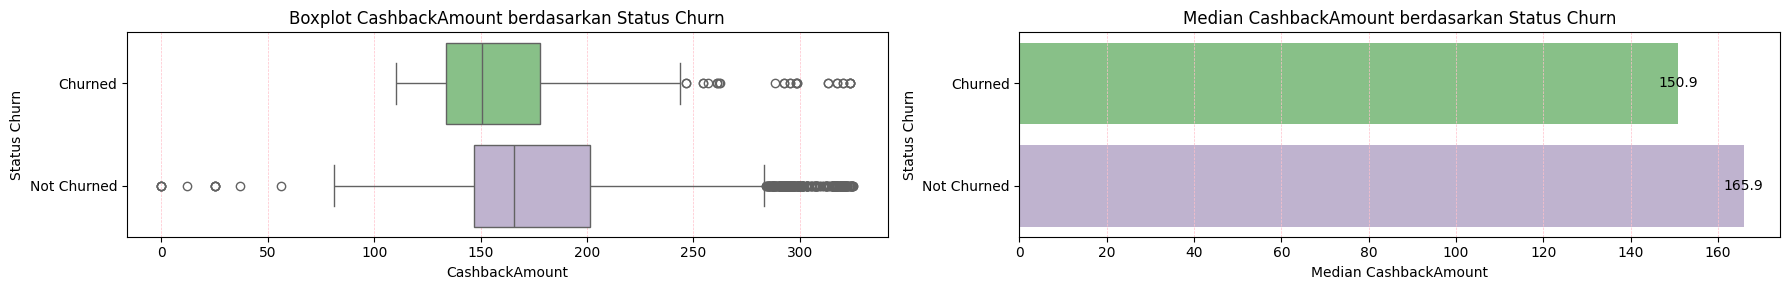

In [267]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1, 2, figsize=(18, 3))

sns.boxplot(x='CashbackAmount', y='Churn', data=df, ax=ax[0], hue='Churn', palette='Accent')
ax[0].set_title('Boxplot CashbackAmount berdasarkan Status Churn')
ax[0].set_xlabel('CashbackAmount')
ax[0].set_ylabel('Status Churn')
ax[0].grid(axis='x', which='both', linestyle='--', linewidth=0.5, color='pink')

medians = df.groupby('Churn')['CashbackAmount'].median()
sns.barplot(x=medians.values, y=medians.index, ax=ax[1], palette='Accent', dodge=False)
ax[1].set_title('Median CashbackAmount berdasarkan Status Churn')
ax[1].set_xlabel('Median CashbackAmount')
ax[1].set_ylabel('Status Churn')
ax[1].grid(axis='x', which='both', linestyle='--', linewidth=0.5, color='pink')

for p in ax[1].patches: ax[1].annotate(f'{p.get_width():.1f}', (p.get_width(), p.get_y() + p.get_height() / 2.), ha='center', va='center', fontsize=10, color='black')

plt.tight_layout()
plt.show()

- Uji Statistik

In [268]:
from scipy import stats
from scipy.stats import mannwhitneyu

alpha=0.05
CashbackAmount_churned=df[df['Churn']=='Churned']['CashbackAmount']
CashbackAmount_not_churned=df[df['Churn']=='Not Churned']['CashbackAmount']

stat,pvalue=mannwhitneyu(
    x=CashbackAmount_churned,
    y=CashbackAmount_not_churned,
    alternative='two-sided')

if pvalue>alpha:
    print(f'P-Value: {pvalue:.5f} > {alpha}. Fail to Reject Ho. Median Cashback Amount pada konsumen churn dan tidak churn adalah sama.')
else:
    print(f"P-Value: {pvalue:.5f} <= {alpha}. Reject Ho. Minimal ada 1 perbedaan signifikan antara median Cashback Amount berdasarkan churn.")


P-Value: 0.00000 <= 0.05. Reject Ho. Minimal ada 1 perbedaan signifikan antara median Cashback Amount berdasarkan churn.


- Interpretasi: 

    - `CashbackAmount` menggambarkan adanya perbedaan signifikan antara konsumen yang churn dan tidak churn. Konsummen churn memiliki media cashback sebesar 150.87, sedangkan konsumen yang tidak churn mencapai 165.87. Meskipun perbedaannya kecil, distribusi data dapat menunjukkan bahwa konsumen churn umumnya mendapatkan cashback yang lebih rendah.

    - Rentang cashback bagi konsumen churn berada pada 110.09 hingga 323.59, sementara konsumen yang tidak churn mendapatkan cashback dengan rentang dari 0 hingga 324.99. Fenomena ini menunjukkan bahwa meskipun konsumen churn menerima cashback, konsumen mungkin merasa kurang terstimulasi untuk tetap menggunakan e-commerce. Ketidakpuasan bisa timbul ketika konsumen menganggap bahwa cashback yang diberikan tidak sebanding dengan ekspektasi atau nilai produk atau layanan yang mereka terima. 
    
    - Selain itu, bisa jadi konsumen melakukan pembelian dengan mendapatkan cashback yang tinggi berdasarakan harga barang. Produk mahal biasanya menawarkan cashback yang lebih besar, tetapi barang-brang premium ini sering kali bukan merupakan kebutuhan sehari-hari. Akibatnya, setelah konsumen membeli produk tersebut, konsumen mungkin merasa sudah tidak ada keperluan untuk bertransaksi lebih lanjut kembali, yang berujung pada keputusan untuk churn. Untuk itu, penting bagi perusahaan untuk tidak hanya mengevaluasi program cashback yang tidak menyebabkan konsumen churn.

#### **4.3.4.7 Kesimpulan Berdasarkan Aktivitas Transaksi Konsumen**

Berdasarkan aktivitas transaksi konsumen, `CashbackAmount` dan `WarehouseToHome` memrupakan faktor yang paling berpengaruh terhadap keputusan churn.

Cashback adalah faktor penting dalam analisis churn. Jika melihat perbedaan antara median cashback antara konsumen churn dan tidak churn yang menunjukkan bahwa nilai yang diterima oleh konsumen churn mungkin tidak cukup menarik untuk mendorong loyalitas konsumen, meskipun terdapat faktor lain yang tidak bisa dikontrol oleh perusahaan (seperti jenis barang yang dibelanjakan). Jika cashback dianggap tidak sebanding dengan ekspektasi konsumen, konsumen akan kurang terstimulasi untuk berbelanja, yang mana dalam jangka panjang akan berpotensi berhenti melakukan transaki. 

Jarak antara gudang dan rumah konsumen merupakan faktor krusial dalam analisis churn, karena median untuk konsumen churn lebih jauh dibadningkan dengan konsumen yang tidak churn. Jarak yang lebih jauh dapat menyebabkan waktu pengiriman yang lebih lama dan dapat meningkatkan resiko barang rusak. Jika konsumen merasa pengiriman tidak memenuhi harapan, hal ini bisa menjadi faktor signifikan dalam keputusan konsumen untuk churn. Keterlambatan atau masalah dalam pengiriman sering kali membuat konsumen merasa tidak puas, yang dapat berdampak negatif pada perusahaan.

Oleh karena itu, perusahaan perlu meninjau kembali program cashback serta meningkatkan efisiensi pengiriman guna mengurangi churn rate.

### **4.3.5 Kepuasan Konsumen**

#### **4.3.5.1 `Complain`**

- Tabel `Complain` VS `Churn`

In [269]:
# mengganti tipe data Complain
df['Complain'] = df['Complain'].astype('object')
# mengganti nilai Complain
df['Complain']=df['Complain'].map({1:'Complained', 0:'No Complaint'}) 
# statistik deskriptif berdasarkan churn
agg_table = df.groupby(['Complain', 'Churn']).size().unstack().reset_index()
agg_table['Total'] = agg_table['Churned'] + agg_table['Not Churned']
agg_table['% Churn'] = (agg_table['Churned'] / agg_table['Total'] * 100).round(2)
agg_table = agg_table.sort_values(by='% Churn', ascending=False)
agg_table

Churn      Complain  Churned  Not Churned  Total  % Churn
0        Complained      433          975   1408    30.75
1      No Complaint      386         3185   3571    10.81

- Visualisasi

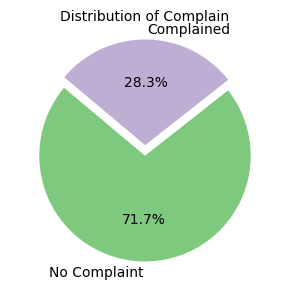

In [270]:
counts = df['Complain'].value_counts()

plt.figure(figsize=(3,3))
plt.pie(counts, labels=counts.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette("Accent"), explode=[0.05] * len(counts))
plt.title('Distribution of Complain',fontsize=10)
plt.axis('equal')
plt.tight_layout()
plt.show()

C:\Users\fauzi\AppData\Local\Temp\ipykernel_17416\3449185124.py:16: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  churn_rate = data['Churn'].value_counts(normalize=True).get(1, 0) * 100


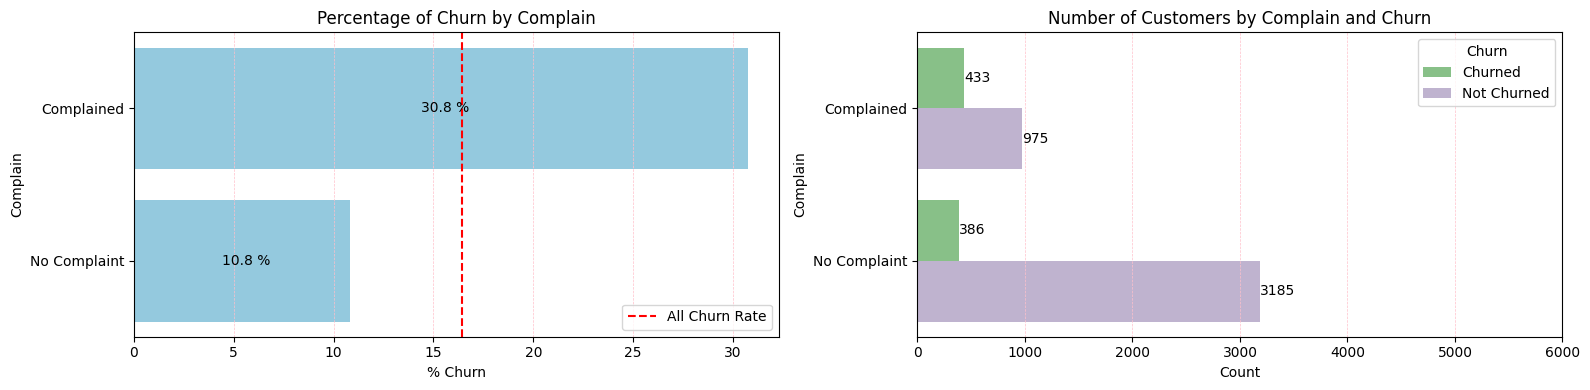

In [271]:
def create_plot(data, col, x_maks=1000):
    agg_table = data.groupby([col, 'Churn']).size().unstack().reset_index()
    agg_table['total'] = agg_table['Churned'] + agg_table['Not Churned']
    agg_table['% Churn'] = (agg_table['Churned'] / agg_table['total'] * 100).round(2)
    agg_table = agg_table.sort_values(by='% Churn', ascending=False)

    fig, axes = plt.subplots(1, 2, figsize=(16,4))

    ax1 = sns.barplot(data=agg_table, y=col, x='% Churn', ax=axes[0], color='skyblue')
    labels = ['{:.1f} %'.format(x) for x in agg_table['% Churn']]
    ax1.bar_label(ax1.containers[0], labels=labels, padding=3, label_type='center')
    ax1.set_title(f'Percentage of Churn by {col}')
    ax1.set_xlabel('% Churn')
    ax1.set_ylabel(col)
    ax1.grid(axis='x', linestyle='--', linewidth=0.5, color='pink')
    churn_rate = data['Churn'].value_counts(normalize=True).get(1, 0) * 100
    ax1.axvline(x=churn_rate, color='red', linestyle='--', label='All Churn Rate')
    ax1.legend(loc='lower right')
    ax1.grid(axis='x', linestyle='--', linewidth=0.5, color='pink')

    ax2 = sns.countplot(data=data, y=col, hue='Churn', order=agg_table[col], palette='Accent', ax=axes[1])
    ax2.set_title(f'Number of Customers by {col} and Churn')
    for container in ax2.containers:
        ax2.bar_label(container)
    ax2.set_xlim(0, x_maks)
    ax2.set_xlabel('Count')
    ax2.set_ylabel(col)
    ax2.grid(axis='x', linestyle='--', linewidth=0.5, color='pink')

    plt.tight_layout()
    plt.show()

create_plot(df, 'Complain', x_maks=6000)

- Uji Statistik

In [272]:
from scipy.stats import chi2_contingency

contingency_table=df.groupby(['Churn','Complain']).size().unstack().fillna(0)

alpha=0.05
stat,pvalue,dof,expected_freq=chi2_contingency(contingency_table)

if pvalue > alpha:
    print(f'P-Value: {pvalue:.5f} > {alpha}. Fail to Reject Ho. Kita tidak punya cukup bukti untuk menyatakan bahwa terdapat keterkaitan antara Complain dan Churn.')
else:
    print(f'P-Value: {pvalue:.5f} <= {alpha}. Reject Ho. Kita punya cukup bukti untuk menyatakan bahwa terdapat keterkaitan antara Complain dan Churn.')

P-Value: 0.00000 <= 0.05. Reject Ho. Kita punya cukup bukti untuk menyatakan bahwa terdapat keterkaitan antara Complain dan Churn.


- Interpretasi: 

    - Berdasarkan data, terdapat 30.75% konsummen yang churn setelah mengajukan komplain serta 10.81% dari konsumen yang tidak mengajukan komplain yang juga churn. Hal ini menunjukkan bahwa terdapat hubungan yang jelas antara komplain dan churn. Konsumen yang mengajukan komplain memiliki kemungkinan lebih tinggi untuk churn dibandingkan dengan konsummen yang tidak mengajukan komplain. Hal ini mungkin terjadi karena adanya komplain yang tidak ditangani dengan baik oleh perusahaan, sehingga konsumen memilih untuk churn.

    - Tingginya prosentase churn diantara konsumen yang mengajukan komplain menunjukkan bahwa pentingnya merespon dan menangani masalah konsumen secara lebih efektif. Perusahaan perlu mengembangkan startegi retensi yang berfokus pada penanganan keluhan konsummen, seperti meningkatkan kualitas layanan konsumen, membuat strategi agar dapat memberikan solusi yang cepat dan memuaskan, serta menjelaskan kepada konsumen langkah-langkah yang harus dilakukan untuk mencegah masalah serupa jika terjadi di masa depan.

#### **4.3.5.2 `SatisfactionScore`**

- Tabel `SatisfactionScore` VS `Churn`

In [273]:
# statistik deskriptif berdasarkan churn
df.groupby('Churn')['SatisfactionScore'].describe()

count      mean       std  min  25%  50%  75%  max
Churn                                                           
Churned       819.0  3.346764  1.348511  1.0  3.0  3.0  5.0  5.0
Not Churned  4160.0  2.967067  1.383314  1.0  2.0  3.0  4.0  5.0

- Visualisasi

C:\Users\fauzi\AppData\Local\Temp\ipykernel_17416\493860381.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=medians.values, y=medians.index, ax=ax[1], palette='Accent', dodge=False)


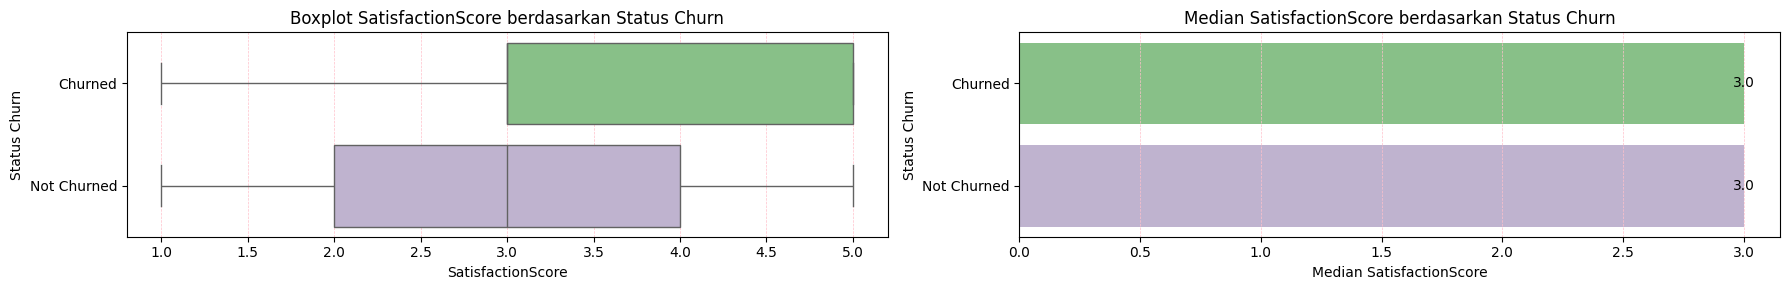

In [274]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1, 2, figsize=(18, 3))

sns.boxplot(x='SatisfactionScore', y='Churn', data=df, ax=ax[0], hue='Churn', palette='Accent')
ax[0].set_title('Boxplot SatisfactionScore berdasarkan Status Churn')
ax[0].set_xlabel('SatisfactionScore')
ax[0].set_ylabel('Status Churn')
ax[0].grid(axis='x', which='both', linestyle='--', linewidth=0.5, color='pink')

medians = df.groupby('Churn')['SatisfactionScore'].median()
sns.barplot(x=medians.values, y=medians.index, ax=ax[1], palette='Accent', dodge=False)
ax[1].set_title('Median SatisfactionScore berdasarkan Status Churn')
ax[1].set_xlabel('Median SatisfactionScore')
ax[1].set_ylabel('Status Churn')
ax[1].grid(axis='x', which='both', linestyle='--', linewidth=0.5, color='pink')

for p in ax[1].patches: ax[1].annotate(f'{p.get_width():.1f}', (p.get_width(), p.get_y() + p.get_height() / 2.), ha='center', va='center', fontsize=10, color='black')

plt.tight_layout()
plt.show()

- Uji Statistik

In [275]:
from scipy import stats
from scipy.stats import mannwhitneyu

alpha=0.05
SatisfactionScore_churned=df[df['Churn']=='Churned']['SatisfactionScore']
SatisfactionScore_not_churned=df[df['Churn']=='Not Churned']['SatisfactionScore']

stat,pvalue=mannwhitneyu(
    x=SatisfactionScore_churned,
    y=SatisfactionScore_not_churned,
    alternative='two-sided')

if pvalue>alpha:
    print(f'P-Value: {pvalue:.5f} > {alpha}. Fail to Reject Ho. Median SatisfactionScore pada konsumen churn dan tidak churn adalah sama.')
else:
    print(f"P-Value: {pvalue:.5f} <= {alpha}. Reject Ho. Minimal ada 1 perbedaan signifikan antara median SatisfactionScore berdasarkan churn.")


P-Value: 0.00000 <= 0.05. Reject Ho. Minimal ada 1 perbedaan signifikan antara median SatisfactionScore berdasarkan churn.


- Interpretasi: 

    - Kedua kelompok memiliki median skor kepuasan yang sama, yaitu 2. Hal ini menunjukkan bahwa secara umum konsumen churn maupun tidak memiliki persepsi yang sama tentang e-commerce. Namun hal ini tidak menjelaskan mengapa konsumen dengan nilai kepuasan tinggi tetap memutuskan untuk berhenti menggunakan layanan.

    - Meskipun konsumen memberikan skor kepuasan yang tinggi terhadap layanan aplikasi, hal ini tidak menjamin bahwa konsumen akan tetap loyal. Mungkin saja skor kepuasan ini lebih terkait dengan pengalaman saat menggunakan aplikasi. Namun, ketika produk yang diterima tidak memenuhi harapan konsumen, misal dalam kualitas, kesesuain, serta waktu pengiriman yang kurang sesuai, ini dapat mengakibatkan kehilangan kepercayaan dan berujung pada keputusan untuk berpindah ke kompetitor. Kondisi ini dapat menunjukkan bahwa pengalaman pasca pembelian sangat berpengaruh terhadap keputusan untuk churn. 

    - Berdasarkan hipotesa pada data korelasi, data menunjukkan bahwa meskipun terdapat sedikit pengaruh antara kepuasan dan keputusan untuk churn, faktor lain mungking lebih berpengaruh.

#### **4.3.5.3 Kesimpulan Berdasarkan Kepuasan Konsumen**

Berdasarkan kepuasan konsumen, `Complain` merupakan fitur yang paling berpengaruh pada churn. Berdasarkan data, terdapat 30.75% konsumen yang churn setelah mengajukan komplain. Hal ini dapat menunjukkan bahwa terdapat hubungan yang jelas antara komplain dan churn. Konsumen yang mengajukan komplain memiliki kemungkinan yang lebih tinggi untuk churn dibandingkan konsumen yang tidak mengajukan komplain. Hal ini mungkin terjadi karena adanya komplain yang tidak ditangani dengan baik oleh perusahaan, sehingga konsumen merasa diabaikan dan memiliki untuk tidak menggunakan layanan e-commerce kembali.

Tingginya prosentase churn di kalangan konsumen yang mengajukan komplain menggambarkan betapa pentingnya perusahaan untuk merespon dan menangani masalah konsumen secara lebih efektif. Perusahaan perlu mengembangkan strategi-strategi yang berfokus pada penanganan keluhan, seperti meningkatkan kualitas layanan konsumen, memberikan solusi yang cepat dan memuaskan, serta menjelaskan kepada konsumen langkah-langkah yang harus diambil untuk mencegah masalah serupa dimasa depan. Perusahaan juga dapat memanfaatkan keluhan-keluhan konsumen sebagai kesempatan untuk mendapatkan perspektif bisnis saat ini dari konsumen. Penanganan komplain yang responsif tidak hanya membantu mempertahankan konsumen yang berpotensi churn, tetapi juga dapat menciptakan hubungan yang lebih kuat dan saling menguntungkan antara konsumen dan perusahaan.

### **4.3.6 Kesimpulan Feature VS Target**

Berdasarkan analisa feature vs target, berikut merupakan faktor-faktor yang signifikan berpengaruh terhadap churn dalam e-commerce. Faktor-faktor ini dapat berfungsi sebagai sinyal krusial bagi perusahaan untuk lebih memahami dinamika konsumen dan mengambil langkah strategis yang tepat berdasarkan data yang ada:

1. `Complain`: tingginya churn di kalangan konsumen yang mengajukan keluhan menunjukkan pentingnya penanganan komplain yang efektif.

2. `MaritalStatus` : konsumen yang single cenderung memiliki tingkat churn yang lebih tinggi dibandingkan married, yang mana dapat menjadi bahan evaluasi perusahaan untuk mengayomi segmen single.

3. `PreferredOrderCat` : kategori produk mobile phone dan mobile memiliki tingkat churn yang tinggi, yang kemungkinan akibat ketidakpuasan terhadap produk yang diterima.

4. `PreferredPaymentMode` : metode pembayaran cash on delivery dan e-wallet menunjukkan tingkat churn yang tinggi, yang mungkin disebabkan oleh ketidakpuasan terhadap kemudahan transaksi dan keamanan data konsumen.

5. `PreferredLoginDevice` : kurangnya fitur yang memadai ataupun masalah-masalah teknis pada konsumen yang cenderung menggunakan komputer dapat berkontribusi pada konsumen churn.

6. `CityTier` : tier 3 menunjukkan tingkat churn yang lebih tinggi, yang mungkin karena adanya tantangan dalam menyediakan layanan e-commerce yang memadai pada area tersebut.

7. `Tenure` : konsumen yang baru bergabung memiliki tingkat churn yang lebih tinggi, yang menunjukkan bahwa pengalaman konsumen pada fase awal bergabung sangat penting untuk retensi.

8. `CashbackAmount` : perbedaan nilai cashback dapat mempengaruhi loyalitas konsumen, cashback yang tidak menarik mungkin dapat membuat konsumen tidak ingin bertransaksi kembali.

9. `WarehouseToHome` : jarak yang lebih jauh dapat menyebabkan waktu pengiriman yang lebih lama dan dapat meningkatkan resiko churn.


## **4.4 Maturity Level Data**

[Maturity level data](https://ellis.is/blogs/news/ecommerce-data-maturity-is-ecommerce-business-maturity) adalah indikator kemampuan sebuah organisasi dalam memanfaatkan data untuk pengambilan keputusan. Model maturity level yang paling umum dalah Dell Data Maturity, yang terdiri dari empat level:

- Tingkat 1: Data aware, perusahaam mulai mengumpulkan data secara manual, dengan pemahaman terbatas mengenai kepentingan data dan metrik bisnis. Keputusan yang diambil oleh perusahaan yang berada pada level ini sering kali tidak berbasis data.

- Tingkat 2: Data proficient, kualitas data telah meningkat dan KPI mulai didefinisikan. Namun, pemanfaatan data masih terbatas dan tidak terintegrasi secara formal.

- Tingkat 3: Data savvy, perusahaan menggunakan data untuk keputusan bisnis. KPI telah didefinisikan, sudah terdapat dashboard serta laporan yang dapat diakses oleh semua karyawan.

- Tingkat 4: Data driven, pada tahap ini data sudah menjadi pusat dari semua keputusan perusahaan, yang biasanya menggunakan machine learning dan artificial intelligence untuk mengoptimalkan operasi bisnis.

Dengan mengetahui maturity level, perusahaan dapat dengan jelas mengidentifikasi posisi mereka saat ini dan merancang langkah selanjutnya dengan lebih efektif. Hal ini memungkinkan perusahaan untuk merumuskan rencana strategis guna meningkatkan kemampuan data secara sistematis. Selain itu, pemahaman ini dapat meningkatkan efisiensi operasional dengan mengidentifikasi area yang perlu diperbaiki, sehingga proses pengambilan keputusan dapat lebih optimal. Maturity level data juga dapat mendukung transformasi digital dengan menyediakan kerangka kerja untuk menjadi organisasi yang lebih data-driven. Dengan demikian, perusahaan dapat mengambil keputusan bisnis yang lebih baik melalui analisis data yang lebih akurat, menetapkan KPI yang lebih relevean, serta mengurangi resiko dengan mengidentifikasi tantangan penggunaan data sebelum berkembang menjadi masalah serius. 

Berdasarkan maturity level data perusahaan, perusahaan e-commerce ini berada pada **Tingkat 3: Data Savvy**. Perusahaan mulai menyadari pentingnya data dan menggunakannya untuk membuat keputusan. Meskipun mungkin keterampilan data karyawan masih bervariasi, perusahaan telah mendefinisikan KPI dan metrik bisnis, serta laporan yang mudah diakses.Perusahaan juga memanfaatkan data untuk merencanakan dan memprediksi hasil bisnis serta telah mengembangkan kemampuan analitik. Berikut merupakan aspek utama perusahaan yang mengindikasikan perusahaan ini berada pada level 3.

- Relevansi data perusahaan tercermin dalam analisis data demografi konsumen, seperti `Gender`, `MaritalStatus`, dan `CityTier`. Informasi ini membantu perusahaan memahami karakteristik konsumen yang memengaruhi perilaku dan keputusan pembelian. Dengan wawasan ini, perusahaan dapat menyesuaikan strategi pemasaran secara lebih efektif, menciptakan kampanye yang lebih relevan dan menarik bagi setiap segmen konsumen.

- KPI yang jelas perusahaan ditunjukkan melalui metrik seperti `OrderCount`, `DaySinceLastOrder`, `OrderAmountFromLastYear`, `CouponUsed`, `CashbackAmount`, dan `WarehouseToHome`. Metrik-metrik ini tidak hanya membantu perusahaan dalam mengevaluasi kinerja penjualan dan efektivitas promosi, tetapi juga memberikan landasan yang kokoh untuk pengambilan keputusan strategis. Dengan informasi ini, perusahaan dapat menyesuaikan taktik dan strategi untuk mencapai hasil yang lebih optimal dan meraih tujuan bisnis yang diinginkan.

- Analisis loyalitas perusahaan terlihat jelas melalui data tentang `Tenure`, `HourSpendOnApp`, `NumberOfDeviceRegistered`, dan `NumberOfAddress`. Data ini memberikan informasi mendalam tentang tingkat keterlibatan konsumen. Dengan pemahaman yang lebih baik mengenai loyalitas konsumen, perusahaan dapat merancang strategi yang lebih efektif untuk memperkuat hubungan dan meningkatkan retensi, memastikan pengalaman konsumen yang lebih memuaskan.

- Kesadaran analitik perusahaan tampak jelas melalui pemahaman mendalam tentang preferensi dan kepuasan konsumen, seperti `PreferredLoginDevice`, `PreferredPaymnetMode`,`PreferredOrderCat`, `SatisfactionScore` dan `Complain`. Ini menunjukkan bahwa perusahaan menyadari betapa pentingnya analisis data dalam meningkatkan pengalaman pengguna dan merancang strategi bisnis yang lebih efektif. Dengan memanfaatkan wawasan ini, perusahaan dapat menyesuaikan tawaran mereka agar lebih sesuai dengan kebutuhan dan keinginan konsumen, menciptakan interaksi yang lebih relevan dan memuaskan.

- Adanya keinginan perusahaan menerapkan machine learning mencerminkan kematangan data yang telah dicapai. Kesadaran akan nilai data dalam pengambilan keputusan menunjukkan rencana untuk analisis mendalam, termasuk prediksi churn konsumen. Langkah ini menandakan komitmen untuk meningkatkan keterampilan analitik tim dan pendekatan proaktif dalam memahami perubahan perilaku konsumen. Dengan demikian, upaya ini mencerminkan kesiapan perusahaan untuk mengintegrasikan sumber data dan melakukan analisis kompleks, membuka peluang baru untuk inovasi dan pertumbuhan.

# **BAB 5. MODELING**

Bab ini akan membahas pentingnya modeling data dalam konteks machine learning, dengan preprocessing data akan dilakukan melalui pipeline untuk mencegah terjadinya data leakage. [Data leakage](https://airbyte.com/data-engineering-resources/what-is-data-leakage) terjadi ketika informasi dari dataset test secara tidak sengaja masuk ke dalam dataset train, yang dapat menyebabkan model memberikan hasil yang terlalu optimis dan kesulitan dalam generalisasi pada data baru.

Dalam analisis churn e-commerce, variabel seperti `Complain` mungkin berperan penting dalam keputusan konsumen untuk melanjutkan transaksi. Pengelolaan data ini harus dilakukan dengan hati-hati. Jika informasi mengenai keluhan konsumen dari dataset test digunakan dalam model training, model mungkin akan menunjukkan hasil yang akurat namun akan gagal saat diterapkan pada data baru yang tidak memiliki akses ke informasi tersebut.

Untuk menghindari masalah data leakage, langkah-langkah preprocessing yang terstruktur dan terspisah sangatlah penting. Pertama, penting untuk membagi dataset train dan test sebelum melakakukan preprocessing, guna mencegah kebocoran informasi. Dalam proses transformasi data, penanganan outlier harus dilakukan dengan cermat. Selain itu, normalisasi dan penanganan missing value perlu diterapkan terlebih dahulu pada data train sebelum diteruskan pada dataset test, sehingga konsistensi tetap terjaga. Dengan pendekatan ini, integritas model akan lebih terjamin dan hasil yang diperoleh dapat lebih akurat.

Oleh karena itu, pada bab ini, langkah-langkah seperti penanganan outlier dan penanganan missing value akan dilakukan kembali dengan pendekatan yang berbeda saat analisis data. Proses ini akan dilakukan sesuai dengan kaidah mencegah terjadinya data leakage.

## **5.1 Data Preparation Modeling**

### **Load Dataset**

In [278]:
# load dataset kembali
dfm = pd.read_excel("E Commerce Dataset.xlsx", sheet_name='E Comm')

### **Remove Unused Data**

Fitur `CustomerID` tidak akan digunakan pada proses pemodelan, karena fitur tersebut hanya berisi angka unik yang menunjukkan ID dari tiap customer. Selain itu, fitu `Gender` juga tidak akan digunakan dalam model ini guna memastikan bahwa algoritma machine learning yang dikembangkan tidak melakukan diskriminasi berdasarkan jenis kelamin. Pendekan ini juga bertujuna untuk menciptakan model yang lebih adil serta berfokus pada faktor-faktor lain yang lebih relevan untuk pengambilan keputusan. Oleh karena itu, kedua fitur tersebut akan di drop.

In [279]:
# drop fitur CostumerID dan Gender
dfm = dfm.drop(columns=['CustomerID', 'Gender'])

### **Penanganan Duplikasi Data**

In [280]:
# drop data duplikat
dfm.drop_duplicates(inplace=True)

### **Penyesuaian Value**

In [282]:
# penyesuaian value PreferredLoginDevice
dfm['PreferredLoginDevice'] = dfm['PreferredLoginDevice'].replace('Phone', 'Mobile Phone')

In [283]:
# penyesuaian value PreferredPaymentMode
dfm['PreferredPaymentMode'] = dfm['PreferredPaymentMode'].replace('CC', 'Credit Card')
dfm['PreferredPaymentMode'] = dfm['PreferredPaymentMode'].replace('COD', 'Cash on Delivery')

### **Penanganan Outlier**

In [285]:
# penanganan outlier Tenure
del_tenure = dfm[dfm['Tenure'] > 31].index
dfm = dfm.drop(del_tenure)

In [286]:
# penanganan outlier WarehouseToHome
del_warehouse = dfm[dfm['WarehouseToHome'] >= 126].index
dfm = dfm.drop(del_warehouse)

In [287]:
# penanganan outlier NumberOfAddress
del_address = dfm[dfm['NumberOfAddress'] > 10].index
dfm = dfm.drop(del_address)

In [288]:
# penanganan outlier DaySinceLastOrder
del_last_order = dfm[dfm['DaySinceLastOrder'] > 31].index
dfm = dfm.drop(del_last_order)

### **Penyesuaian Nama Kolom**

In [368]:
dfm = dfm.rename(columns={'PreferedOrderCat': 'PreferredOrderCat'})
dfm.columns

Index(['Churn', 'Tenure', 'PreferredLoginDevice', 'CityTier',
       'WarehouseToHome', 'PreferredPaymentMode', 'HourSpendOnApp',
       'NumberOfDeviceRegistered', 'PreferredOrderCat', 'SatisfactionScore',
       'MaritalStatus', 'NumberOfAddress', 'Complain',
       'OrderAmountHikeFromlastYear', 'CouponUsed', 'OrderCount',
       'DaySinceLastOrder', 'CashbackAmount'],
      dtype='object')

### **Imbalance Data**

In [369]:
# imbalance data
dfm['Churn'].value_counts(normalize=True)

Churn
0    0.835509
1    0.164491
Name: proportion, dtype: float64

Interpretasi:

Berdasarkan churn rate, dapat diketahui bahwa data perusahaan ini termasuk dalam kategori imbalanced data. [Imbalanced data](https://www.turintech.ai/what-is-imbalanced-data-and-how-to-handle-it/) adalah masalah umum dalam machine learning yang terjadi ketika jumlah sampel di kelas mayoritas jauh lebih banyak daripada di kelas minoritas. Hal ini dapat mempengaruhi kinerja model dan menghasilkan kesimpulan yang tidak akurat. Menurut [sumber](https://developers.google.com/machine-learning/crash-course/overfitting/imbalanced-datasets), *Degree of imbalance* dibagi menjadi tiga, yaitu ***mild, moderate, extreme***. Berikut merupakan tabel *degree of imbalance data*:

| Percentage of data belonging to minority class | Degree of imbalance |
| ------------ | ---------- |
| 20-40% of the dataset | **Mild** |
| 1-20% of the dataset | **Moderate** |
| <1% of the dataset | **Extreme** |

Dari tabel tersebut, dapat diketahui bawah dataset tidak seimbang (***moderate imbalance***) karena proporsi kelas minoritas sebesar 16.45% berada pada rentang 1-20% dari dataset. Ketidakseimbangan ini berpotensi negatif pada kinerja model machine learning, karena model yang dilatih pada data tidak seimbang cenderung bias terhadap kelas mayoritas. Pada akhirnya, model dapat memberikan prediksi yang sangat akurat untuk kelas tersebut, namun berkinerja buruk pada kelas minoritas. Situasi ini dapat membuat model gagal mengidentifikasi pola penting pada data minoritas, yang sering kali merupakan segmen kritis dalam analisis.
        
Untuk mengatasi masalah imbalanced data, dibutuhkan teknik penanganan yang tepat. Beberapa pendekatan yang dapat diambil mencakup oversampling, yang berfungsi untuk meningkatkan jumlah data pada kelas minoritas, serta undersampling yang bertujuan untuk mengurangi jumlah data pad kelas mayoritas. Selain itu, terdapat alternatif lain yaitu menggunakan metode pemodelan khusus yang dirancang untuk menangani data tidak seimbang, seperti: penalized models ataupun ensenmble methods. Dengan demikian, akan dilakukan pengimplemantasian berdasarkan eksperimen untuk meningkatkan kinerja model. Melalui tenik resampling dan pemilihan parameter yang tepat pada algoritma, diharapkan model tidak hanya dapat beroperasi dengan lebih efektif, tetapi juga mampu memberikan prediksi yang lebih akurat secara keseluruhan.

### **Collinearity**

Dalam analisis klasifikasi, VIF (Variance Inflation Factor) digunakan untuk mengidentifikasi dan mengukur adanya multikolinearitas diantara variabel independen. Multikolinearitas dapat menyebabkan kesulitan dalam interpretasi model dan menurunkan keakuratan prediksi. Ketika variabel independen memiliki korelasi yang tinggi satu sama lain, maka akan dapat menyebabkan masalah dalam model klasifikasi. Oleh karena itu, nilai VIF dapat membantu dalam mengambil langkah-langkah yang diperlukan untuk mengatasi multikolinearitas. Misalnya, menghilangkan atau menggabungkan variabel yang berkorelasi tinggi dapat meningkatkan interpretabilitas model, sehingga dapat menghasilkan prediksi yang lebih akurat. Berikut merupakan interpretasi dari nilai VIF:

- VIF = 1: menunjukkan bahwa tidak ada korelasi antara variabel independen tersebut dengan variabel independen lainnya, sehingga tidak ada resiko multikolinearitas.
- 1 < VIF ≤ 5: menunjukkan bahwa adanya korelasi moderat, yang masih dapat diterima dan tidak akan secara signifikan mempengaruhi model.
- VIF > 5: mengindikasikan bahwa adanya multikolinearitas yang cukup kuat, yang dapat mempengaruhi hasil dan mempersulit interpretasi model.
- VIF > 10: menunjukkan adanya multikolinearitas yang sangat kuat, dimana variabel tersebut hampir sepenuhnya diprediksi oleh variabel independen lainnya. Hal ini perlu ditangani untuk memastikan model tetap valid.

In [370]:
numerical = [var for var in dfm.drop(columns=['Churn']).columns if dfm[var].dtypes != 'object']
numerical

['Tenure',
 'CityTier',
 'WarehouseToHome',
 'HourSpendOnApp',
 'NumberOfDeviceRegistered',
 'SatisfactionScore',
 'NumberOfAddress',
 'Complain',
 'OrderAmountHikeFromlastYear',
 'CouponUsed',
 'OrderCount',
 'DaySinceLastOrder',
 'CashbackAmount']

In [371]:
# cek VIF
def calculate_vif(data):
    vif = pd.DataFrame()
    vif['Feature'] = data.columns
    vif['VIF'] = [variance_inflation_factor(data.dropna(), i) for i in range(len(data.columns))]

    return vif.sort_values('VIF', ascending=False)

vif_df = calculate_vif(dfm[numerical])
dropped_columns = []

for i in range(len(vif_df)):
    if vif_df.iloc[0, -1] < 10:
        break
    else:
        dropped_columns.append(vif_df.iloc[0, 0])
        vif_df = calculate_vif(dfm[numerical].drop(columns=dropped_columns))

vif_df

Feature       VIF
3  NumberOfDeviceRegistered  8.568391
8                OrderCount  5.404557
4         SatisfactionScore  4.900604
7                CouponUsed  4.207452
2           WarehouseToHome  4.088658
5           NumberOfAddress  4.045875
1                  CityTier  3.805847
9         DaySinceLastOrder  3.651897
0                    Tenure  2.570153
6                  Complain  1.365362

| Fitur  | Interpretasi  |
|----|-------|
| `NumberOfDeviceRegistered`| Nilai VIF yang cukup tinggi ini menunjukkan adanya multikolinearitas yang kuat. Variabel ini cenderung berkorelasi erat dengan variabel independen lainnya, yang dapat mempersulit interpretasi dan memengaruhi hasil model. Penanganan mungkin diperlukan untuk memastikan bahwa pengaruhnya tidak mendistorsi model. |
| `OrderCount`| Dengan nilai VIF di atas 5, variabel ini juga menunjukkan adanya multikolinearitas yang cukup kuat. Hal ini menunjukkan bahwa `OrderCount` berkorelasi dengan beberapa variabel lain dalam model, sehingga perlu dievaluasi lebih lanjut untuk memahami kontribusinya. |
| `SatisfactionScore`| Nilai VIF yang berada dalam rentang 4 hingga 5 menunjukkan adanya korelasi moderat. Meskipun tidak secara signifikan mempengaruhi model, perhatian tetap diperlukan agar pemodelan tetap valid. |
| `CouponUsed` | Menunjukkan korelasi moderat dengan variabel independen lain. Meskipun tidak terlalu mengkhawatirkan, masih penting untuk memantau interaksi mereka dengan variabel lain di dalam model.|
| `WarehouseToHome` | Menunjukkan korelasi moderat dengan variabel independen lain. Meskipun tidak terlalu mengkhawatirkan, masih penting untuk memantau interaksi mereka dengan variabel lain di dalam model. |
| `NumberOfAddress` | Menunjukkan nilai VIF yang lebih rendah namun masih dalam rentang yang dapat diperhatikan. Mereka tidak menunjukkan risiko tinggi untuk multikolinearitas, tetapi harus tetap menjadi fokus selama analisis lebih lanjut. |
| `CityTier`  | Menunjukkan nilai VIF yang lebih rendah namun masih dalam rentang yang dapat diperhatikan. Mereka tidak menunjukkan risiko tinggi untuk multikolinearitas, tetapi harus tetap menjadi fokus selama analisis lebih lanjut. |
| `DaySinceLastOrder`| Dengan nilai yang relatif rendah, variabel ini tidak menunjukkan adanya multikolinearitas yang signifikan dan dapat dianggap stabil dalam konteks model.|
| `Tenure`| Menunjukkan nilai VIF yang baik, mengindikasikan tidak ada risiko multikolinearitas. Variabel ini dapat diandalkan dalam model.|
| `Complain`| Menunjukkan nilai VIF terendah, mengindikasikan bahwa variabel ini tidak berisiko terhadap multikolinearitas dan dapat diandalkan dalam model. |

Secara keseluruhan, analisis nilai VIF mengungkapkan adanya potensi masalah multikolinearitas pada fitur `NumberOfDeviceRegistered` dan `OrderCount`, yang menunjukkan nilai VIF diatas 5. Hal ini menandakan adanya korelasi yang cukup kuat dengan variabel independen lainnya. Meskipun demikian, karena nilai VIF untuk kedua fitur tersebut masih berada di bawah 10, maka fitur-fitur ini akan **tetap dipertahankan** untuk pemodelan.

### **Cardinality**

Cardinality merupakan istilah yang menggambarkan jumlah nilai unik yang terdapat dalam sebuah kolom atau fitu kategorikal. Fitur dengan high cardinality memiliki banyak kategori unik, sedangkan fitur dengan low cardinality hanya memiliki sedikit kategori. Aspek ini perlu diperhatikan, terutama ketika berhadapan dengan fitur high cardinality seperti `CustomerID`, yang dapat menghasilkan sejumlah besar variabel dummy saat encoding.

Proses encoding yang berlebihan dapat menyebabkan peningkatan dimensi data secara signifikan dan dapat menimbulkan permasalahan yang dikenal sebagai [*curse of dimensionality*](https://www.geeksforgeeks.org/curse-of-dimensionality-in-machine-learning/). Dalam situasi ini, model dapat menjadi terlalu kompleks, memerlukan waktu pemrosesan yang lebih lama, serta sulit untuk diinterpretasikan. Selain itu, jumlah fitur yang berlebihan akibat encoding pada fitur dengan high cardinality dapat meningkatkan resiko overfitting, dimana model belajar terlalu banyak detail dari data train dan tidak mampu beradaptasi dengan baik pada data baru. Kategori yang beragam juga dapat menyulitkan analisis dan interpretasi, terutama jika banyak kategori dengan jumlah pengamatan yang sedikit. Memahami cardinality dari suatu fitur kategorikal dapat membantu dalam memutuskan jenis encoding yang paling sesuai.

In [372]:
categorical = [var for var in dfm.columns if dfm[var].dtypes == 'object']
categorical

['PreferredLoginDevice',
 'PreferredPaymentMode',
 'PreferredOrderCat',
 'MaritalStatus']

In [373]:
# cek cardinality
def check_cardinality(data):
    for feature in categorical:
        cardinality = len(data[feature].unique())
        print(f"Cardinality of {feature}: {cardinality}")

        if cardinality > 10:
            print(f"Warning: High cardinality in {feature}.")

check_cardinality(dfm)

Cardinality of PreferredLoginDevice: 2
Cardinality of PreferredPaymentMode: 5
Cardinality of PreferredOrderCat: 6
Cardinality of MaritalStatus: 3


Interpretasi: 

Dari data yang didapatkan, setiap kolom kategorikal menunjukkan *low cardinality* dengan banyak nilai unik kurang dari 10. Kondisi ini mengindikasikan potensi yang baik untuk analisis lebih lanjut. Maka untuk proses encoding akan digunakan **OneHotEncoder**, yang merupakan teknik paling efektif ketika fitur kategorikal memiliki jumlah kategori unik yang relatif kecil dan dimana urutan kategori tidak memiliki makna. Selain itu, teknik ini juga mampu menjaga semua informasi dari fitur kategorikal asli tanpa memperkenalkan asumsi yang keliru, sehingga memastikan integritas data tetap terjaga.

### **Rare Values**

[Rare values](https://medium.com/gett-engineering/handling-rare-categorical-values-in-pandas-d1e3f17475f0) merujuk pada nilai-nilai yang muncul sangat sedikit atau jarang dalam suatu fitur data, terutama dalam konteks kategorikal. Nilai-nilai ini cenderung memiliki frekuensi yang rendah dan tidak memiliki sebagian besar dataset. Nilai-nilai ini sering kali sulit dipelajari oleh model machine learning, sehingga keberadaan rare values dapat menimbulkan beberapa tantangan seperti:

- Overfitting: model mungkin akan belajar dari noise atau outlier dari pola yang sebenarnya, karena nilai-nilai ini tidak cukup representatif.
- Sulit di interpretasikan: terdapat kategori langka dapat membuat analisis dan interpretasi menjadi lebih kompleks.
- Perperan dalam model: rare values dapat memperngaruhi hasil model, terutama jika tidak ditangani dengan baik.

Dengan mengetahui rare values, dapat dilakukan aksi seperti menggabungkan kategori yang jarang menjadi satu kategori 'lainnya' ataupun menghapus kategori yang tidak memberikan informasi penting guna meningkatkan kualitas data.

In [374]:
def find_rare_values(data, categorical, threshold):
    rare_values = {}
    for col in categorical:
        value_counts = data[col].value_counts()
        rare = value_counts[value_counts < threshold * len(data)]
        if not rare.empty:
            rare_values[col] = rare
    return rare_values

threshold = 0.05
rare_values = find_rare_values(dfm, categorical, threshold)

for col in categorical:
    if col in rare_values:
        print(f"Rare values in {col}:")
        print(rare_values[col])
    else:
        print(f"No rare values in {col}")

No rare values in PreferredLoginDevice
No rare values in PreferredPaymentMode
Rare values in PreferredOrderCat:
PreferredOrderCat
Others    238
Name: count, dtype: int64
No rare values in MaritalStatus


Berikut ini merupakan persentase value dari setiap fitur kategorikal:

In [375]:
def list_feature_values(data, categorical):
    feature_values_list = []
    for col in categorical:
        value_counts = data[col].value_counts()
        for value, count in value_counts.items():
            percentage = count / len(data) * 100
            feature_values_list.append([col, value, count, f"{percentage:.2f}%"])
    return feature_values_list

feature_values_list = list_feature_values(dfm, categorical)
feature_values_data = pd.DataFrame(feature_values_list, columns=['Feature', 'Value', 'Count', 'Percentage'])

feature_values_data

Feature               Value  Count Percentage
0   PreferredLoginDevice        Mobile Phone   3555     71.40%
1   PreferredLoginDevice            Computer   1424     28.60%
2   PreferredPaymentMode          Debit Card   2052     41.21%
3   PreferredPaymentMode         Credit Card   1567     31.47%
4   PreferredPaymentMode            E wallet    558     11.21%
5   PreferredPaymentMode    Cash on Delivery    450      9.04%
6   PreferredPaymentMode                 UPI    352      7.07%
7      PreferredOrderCat  Laptop & Accessory   1816     36.47%
8      PreferredOrderCat        Mobile Phone   1101     22.11%
9      PreferredOrderCat             Fashion    743     14.92%
10     PreferredOrderCat              Mobile    724     14.54%
11     PreferredOrderCat             Grocery    357      7.17%
12     PreferredOrderCat              Others    238      4.78%
13         MaritalStatus             Married   2620     52.62%
14         MaritalStatus              Single   1528     30.69%
15         MaritalStatus            Divorced    831     16.69%

| Fitur| Rare Values | Interpretasi |
|---|---|----|
| `PreferredLoginDevice` | Tidak ada rare values | Semua kategori memiliki frekuensi yang cukup, memberikan informasi yang berarti.|
| `PreferredPaymentMode`| Tidak ada rare values | Semua mode pembayaran tercatat dengan representasi yang memadai, memberikan stabilitas. |
| `MaritalStatus`   | Tidak ada rare values | Semua status pernikahan memiliki jumlah pengamatan yang cukup untuk analisis.  |
| `PreferredOrderCat` | Terdapat rare values  | Terdapat rare value untuk kategori **Others** dengan jumlah value 238 (4.78%). Hal ini wajar dan akan dipertahankan.  |

## **5.2 Eksperimen Model**

### **5.2.1 Mendefinisikan Features (X) dan Target (y)**

Definisi yang jelas mengenai feature dan target sangat penting untuk menghasilkan model yang akurat dalam prediksi konsumen churn pada e-commerce. Fitur dalam model ini mencakup berbagai variabel yang mempengaruhi keputusan konsumen, seperti aktivitas transaksi konsumen, tingkat kepuasan konsumen, preferensi konsumen, dan lainnya. Sementara itu, target merujuk pada status churn itu sendiri. Dengan demikian, model yang dikembangkan dapat lebih efektif dalam meningkatkan retensi konsumen. 

In [376]:
# Features
X = dfm.drop(columns='Churn')

# target
y = dfm['Churn']

### **5.2.2 Data Splitting**

Data splitting bertujuan untuk membagi dataset menjadi dua atau lebih subset, yang biasanya terdiri dari data train dan data test. Pembagian ini memungkinkan model untuk dilatih pada satu subset dan diuji pada subset lainnya, membantu menghindari overfitting dan memastikan kemampuan generalisasi yang baik. Proses ini juga memungkinkan untuk penilaian peforma model secara objektif dengan menguji bagaimana model dapat berfungsi pada data yang baru. Dalam konteks prediksi churn, data splitting menjadi sangat penting untuk dilakukan karena hasil prediksi dapat memengaruhi strategi retensi konsumen dan kinerja bisnis secara keseluruhan. Dengan pendekatan yang tepat, data splitting dapat memberikan informasi yang lebih akurat mengenai perilaku konsumen, dapat mendukung pengembangan strategi guna mengurang tingkat churn.

Dalam implementasinya, data yang tersedia akan dibagi menjadi *train set* dan *data set*. Secara spesifik, data dibagi menjadi 80% train set (X_train dan y_train) dan 20% test set, sesuai dengan parameter test_size=0.2. Ukuran *train set* terdiri dari 3983 sampel data dengan 17 fitur, sementara *test set* adalah 996 sampel  data dengan 17 fitur.

Untuk memastikan bahwa proporsi kelas dalam train set dan test set mencerminkan proporsi kelas dalam dataset asli, maka akan diterapkan stratifikasi berdasarkan target. Stratifikasi berfungsi untuk menjaga distribusi yang seimbang dalam kedua set data terkait variabel target. Hal ini menjadi penting, terutama ketika menghadapi data yang tidak seimbang, sehingga model dapat dilatih dan diuji dengan representasi yang lebih akurat dari berbagai kelas yang ada.

In [377]:
# membagi data menjadi trainset dan test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
X_train.shape, X_test.shape

((3983, 17), (996, 17))

### **5.2.3 Encoding**

Encoding bertujuan untuk mengubah data kategorikal menjadi format numerik yang dapat diproses oleh algoritma machine learning. Dalam kasus ini, fitur seperti `PreferredLoginDevice`, `PreferredPaymentMode`, `PreferredOrderCat`, dan `MaritalStatus` perlu dikonversi agar dapat diintegrasikan dengan fitur numerik lainnya. Proses encoding tidak hanya memungkinkan model untuk memahami informasi yang terkandung dalam data kategorikal, tetapi juga membantu meningkatkan akurasi prediksi. Berikut menupakan beberapa teknik encoding yang umum digunakan:

| **Teknik Encoding** | **Deskripsi**| **Kapan Digunakan**|
|-----|-------|---|
| **One-Hot Encoding**| Mengubah setiap kategori dalam variabel menjadi kolom terpisah dengan nilai biner (0 atau 1). Contoh: "Kategori Produk" yang terdiri dari "Mobile", "Grocery", "Fashion", dan lainnya. | Digunakan ketika data kategorikal tidak memiliki urutan dan jumlah kategori relatif sedikit (maksimal 10).|
| **Ordinal Encoding**  | Mengubah kategori menjadi nilai integer berdasarkan urutan. Contoh: "Rendah" = 1, "Sedang" = 2, "Tinggi" = 3. | Digunakan untuk data kategorikal yang memiliki urutan jelas, di mana hubungan antara kategori penting. Cocok untuk model yang bisa menangani data ordinal secara efektif. |
| **Binary Encoding**| Mengubah kategori menjadi angka biner dan membaginya menjadi beberapa kolom. Contoh: "Kartu Kredit," "Transfer Bank," dan "E-Wallet" diubah menjadi representasi biner. | Digunakan ketika terdapat banyak kategori, mengurangi dimensi dibandingkan One-Hot Encoding sambil tetap mempertahankan informasi. |
| **Label Encoding** | Setiap kategori diberikan nilai integer unik tanpa mempertimbangkan urutan. Contoh: "VIP" = 1, "Reguler" = 2, "Baru" = 3. | Digunakan pada data kategorikal yang tidak memiliki urutan. Baik untuk algoritma yang tidak sensitif terhadap urutan. |
| **Target Encoding**   | Mengganti nilai kategori dengan rata-rata dari target variabel. Contoh: "VIP" = 10% churn, "Reguler" = 30% churn. | Digunakan ketika ada hubungan yang kuat antara kategori dan target. Perlu hati-hati untuk menghindari kebocoran data, terutama saat menggunakan data pengujian.  |

Dalam kasus ini, teknik encoding yang digunakan adalah **OneHotEncoder**. Metode ini dipilih berdasarkan analisis *cardinality* setiap fitur, dimana jumlah nilai unik pada tiap fitur kategorikal berada dibawah 10, yang menunjukkan *low cardinality*. Selain itu, penggunaan **OneHotEncoder** memudahkan interpretasi dan menghindari masalah urutan yang mungkin timbul dengan label encoding. Berikut adalah beberapa detail terkait penggunaan OneHotEncoder dalam analisis ini:

- Parameter drop='first' pada **OneHotEncoder** digunakan untuk menghapus satu kategori dari setiap fitur. Tujuandari langkah ini adalah untuk menghindari multikolinearitas, sehingga hanya $n - 1$ kategori yang akan di-*encode* ketika terdapat $n$ kategori dalam fitur tersebut.

- Fitur-fitur yang dikenakan OneHotEncoding meliputi: ['PreferredLoginDevice', 'PreferredPaymentMode', 'PreferredOrderCat', 'MaritalStatus'].

- Selain itu, parameter `Remainder='passthrough'` menandakan bahwa fitur-fitur lain yang tidak termasuk dalam daftar encoding akan diteruskan tanpa perubahan. Ini berarti fitur-fitur tersebut tetap ada dalam dataset akhir tanpa mengalami transformasi apapun.

In [378]:
encoder=ColumnTransformer([('OneHotEncoder', OneHotEncoder(drop='first'), ['PreferredLoginDevice', 'PreferredPaymentMode', 'PreferredOrderCat', 'MaritalStatus'])], remainder='passthrough')
encoder

ColumnTransformer(remainder='passthrough',
                  transformers=[('OneHotEncoder', OneHotEncoder(drop='first'),
                                 ['PreferredLoginDevice',
                                  'PreferredPaymentMode', 'PreferredOrderCat',
                                  'MaritalStatus'])])

### **5.2.4 Scaler**

Untuk transformasi skala pada tiap fitur digunkan **RobustScaler**. **RobustScaler** mengukur skala berdasarkan median dan interquartile range (IQR), yaitu rentang antara kuartil pertama (Q1) dan kuartil ketiga (Q3). Karena pada dataset ini terdapat outlier yang dipertahankan, maka Robust Scaler efektif digunakan karena outlier tidak mempengaruhi median dan IQR. Hal ini membantu menormalkan data tanpa terpengaruh oleh nilai yang ekstrem. Selin itu, karena data pada dataset ini tidak terdistribusi normal, Robust Scaler cocok digunakan karena berfokus pada pusat distribusi (median). Selain itu proses scaling dilakukan untuk mempersiapkan data untuk model yang sensitif terhadap skala, seperti logistic regresi, SVM, KNN. Dengan menggunakan scaler dapat meningkatkan kinerja model dengan memastikan bahwa skala setiap fitur lebih konsisten dan tidak terdistorsi oleh outlier.

In [379]:
scaler = RobustScaler()

### **5.2.5 Metrik Evaluation**

Metric evaluation digunakan untuk mengukur seberapa baik model machine learning mengklasifikasikan data ke dalam kategori atau kelas yang benar. Ada beberapa metrik yang sering digunakan dalam evaluasi model klasifikasi, tetapi dalam tahapan ini metric evaluation yang digunakan adalah **F2 Score**. F2 Score dipilih karena kesalahan dalam memprediksi kelas positif (false negatives) mengeluarkan biaya yang lebih mahal atau lebih berisiko daripada kesalahan memprediksi kelas negatif (false positives). Oleh karena itu, F2 Score lebih menekankan pada recall.

In [380]:
from sklearn.metrics import fbeta_score, make_scorer
# Create scorer
f2_score = make_scorer(fbeta_score, beta=2)

### **5.2.6 Baseline Model**

Pada baseline model, digunakan 14 algoritma machine learning untuk klasifikasi, terdiri dari 4 base model dan 10 Ensemble Method. Untuk base model, algoritma yang digunakan adalah sebagai berikut:

- Logistic Regression
- K-Nearest Neighbors (KNN) Classifier
- Decision Tree Classifier
- Support Vector Machine (SVM) Classifier

Untuk Ensemble Method, algoritma model yang digunakan adalah sebagai berikut:

- Voting Classifier: Hard dan Soft
- Stacking Classifier
- Bagging Classifier
- CatBoost Classifier
- LightGBM Classifier
- Random Forest
- AdaBoost Classifier
- GradientBoosting Classifier
- XGBoost Classifier

Dari ke-14 algoritma model tersebut, akan dibandingkan hingga mendapatkan satu algoritma model terbaik.

In [381]:
# Define model
# Logistic Regression 
logreg = LogisticRegression(random_state=42)

# KNN
knn = KNeighborsClassifier()

# Decision Tree
tree = DecisionTreeClassifier(random_state=42)

# SVM
svm = SVC(random_state=42)

# Base Models
logreg_pipeline = Pipeline([
    ('scaling', scaler),
    ('modeling', logreg)
])

knn_pipeline = Pipeline([
    ('scaling', scaler),
    ('modeling', knn)
])

dtree_pipeline = Pipeline([
    ('modeling', tree)
])

# Meta learner
meta_logreg = LogisticRegression(random_state=42)

# Voting Classifier (Hard)
voting_hard = VotingClassifier(
    estimators=[
        ('clf1', logreg_pipeline),
        ('clf2', knn_pipeline),
        ('clf3', dtree_pipeline)
    ], voting='hard'
)

# Voting Classifier (Soft)
voting_soft = VotingClassifier(
    estimators=[
        ('clf1', logreg_pipeline),
        ('clf2', knn_pipeline),
        ('clf3', dtree_pipeline)
    ], voting='soft'
)

# Stacking Classifier
stacking = StackingClassifier(
    estimators=[
        ('clf1', logreg_pipeline),
        ('clf2', knn_pipeline),
        ('clf3', dtree_pipeline)
    ],
    final_estimator=meta_logreg
)

# Bagging Classifier
bagging_clf = BaggingClassifier(
    estimator=logreg,
    random_state=42
)

# CatBoost
cat = CatBoostClassifier(random_state=42, verbose=0)

# LightGBM
lgbm = LGBMClassifier(random_state=42, verbose=0)

# RandomForest
rf = RandomForestClassifier(random_state=42)

# Adaboost
adaboost = AdaBoostClassifier(random_state=42)

# Gradientboost
gradboost = GradientBoostingClassifier(random_state=42)

# ExtremeGradientBoost
xgboost = XGBClassifier(use_label_encoder=False, eval_metric='auc', random_state=42)

In [382]:
models = [
    ('Logistic Regression', logreg), 
    ('KNN Classifier', knn),
    ('Decision Tree', tree),
    ('SVM Classifier', svm),
    ('Voting Classifier (Hard)', voting_hard),
    ('Voting Classifier (Soft)', voting_soft),
    ('Stacking Classifier', stacking),
    ('Bagging Classifier', bagging_clf),
    ('CatBoost Classifier', cat),
    ('LightGBM Classifier', lgbm),
    ('Random Forest Classifier', rf), 
    ('AdaBoostClassifier Classifier', adaboost),
    ('Gradient Boosting Classifier', gradboost),
    ('XGBoost Classifier', xgboost)]

### **5.2.7 Eksperimen Benchmark Model**

Dalam proses modeling, serangkaian eksperimen akan dilakukan untuk mencari benchmark model terbaik. Eksperimen pertama akan berfokus pada penanganan missing value, eksperimen kedua akan berfokus pada penanganan *imbalanced data*, sedangkan eksperimen ketiga merupakan eksperimen dalam konteks hyperparameter tunning.

#### **5.2.7.1 Eksperimen 1: Penanganan Missing Value**

Eksperimen ini akan berfokus pada penanganan missing value, yang sangat penting dalam konteks analisis konsumen chun pada e-commerce. Eksperimen ini dibagi menjadi tiga bagian:

- Eksperimen 1.1: Menghapus Missing Value
    
    Pada eksperimen ini, semua data yang memiliki missing value akan dihapus dari dataset. Pendekatan ini cocok jika proporsi data yang hilang relatif kecil, sehingga tidak akan terlalu mempengaruhi ukuran dataset. Dalam konteksh churn, menghapus missing value mungkin dapat membantu menjaga kualitas data, tetapi terdapat resiko kehilangan informasi berharga dari konsumen yang mungkin memiliki pola perilaku tertentu tetap ada. Metode ini sering digunakan sebagai langkah awal untuk melihat dampak dari data yang hilang.

- Eksperimen 1.2: Median Imputer

    Eksperimen ini bertujuan untuk mengisi missing value dengan nilai median dari fitur yang bersangkutan. Penggunaan median sangat efektif karena median merupakan nilai tengah yang tidak terpengaruh oleh outlier, sehingga cocok untuk fitur yang memiliki distribusi yang tidak normal. Berikut merupakan contoh langkah-langkah penerapan penanganan missing value menggunakan median imputer:

    - Tentukan fitur-fitur dengan missing value, misal dalam dataset ini, fitu `Tenur` memiliki beberapa missing value.

    - Hitung median dari fitur tersebut berdasatkan data yang tersedia, misal jika `Tenur` untuk konsumen lain adalah [5,6,7,3,8,9,2,8,210,12,8,8,6], maka median dari data ini adalah 8

    - Gunakan nilai median tersebut untuk mengisi missing value. Jika terdapat konsumen dengan missing value pada fitur `Tenur`, maka sistem akan mengganti nilai tersebut dengan 8.

- Eksperimen 1.3: Iterative Missing Value Imputation

    Pada eksperimen ini, digunakan teknik iteratif untuk mengisi missing value dengan mempertimbangkan informasi dari fitur lain. Metode ini melibatkan penggunaan model prediktif yang memanfaatkan fitur-fitur lain untuk memprediksi missing value. Berikut merupakan contoh langkah-langkah penerapan penanganan missing value menggunakan iterative missing value imputer:

    - Tentukan fitur yang relevan untuk memprediksi missing value. Misalkan fitur seperti `OrderAmountHikeFromLastYear`, `Tenure`, dan `CouponUsed` dapat digunakan untuk memprediksi missing value pada `OrderCount`.
    
    - Gunakan teknik seperti regresi linear atau KNN untuk membangun model. Misalnya, membangun model regresi yang dapat memprediksi `OrderCount` berdasarkan `OrderAmountHikeFromLastYear`, `Tenure`, dan `CouponUsed`. Dengan demikian, informasi yang ada dapat dimanfaatkan untuk mendapatkan estimasi yang lebih baik mengenai missing value.
    
    - Model yang telah dibangun akan digunakan untuk mengisi nilai yang hilang melalui proses iteratif. Dalam setiap iterasi, model akan memperbaharui prediksi berdasarkan nilai yang telah diisi sebelumnya. Misalnya, jika ada beberapa nilai hilang pada `OrderCount`, model akan memperkirakan nilai tersebut dan kemudian akan menggunakan hasil baru untuk meningkatkan akurasi estimasi pada iterasi berikutnya.

In [383]:
# menampilkan jumlah missing value pada setiap fitur
dfm.isna().sum()

Churn                            0
Tenure                         230
PreferredLoginDevice             0
CityTier                         0
WarehouseToHome                221
PreferredPaymentMode             0
HourSpendOnApp                 230
NumberOfDeviceRegistered         0
PreferredOrderCat                0
SatisfactionScore                0
MaritalStatus                    0
NumberOfAddress                  0
Complain                         0
OrderAmountHikeFromlastYear    243
CouponUsed                     207
OrderCount                     232
DaySinceLastOrder              280
CashbackAmount                   0
dtype: int64

##### **5.2.7.1.1 Eksperimen 1.1: Menghapus Missing Value**

Pada tahap ini, untuk memastikan bahwa data awal yang telah dibagi menjadi train set dan test set tetap utuh, proses penghapusan missing value dilakukan diluar pipeline yang mengacu pada dataset asli. Untuk membedakan hasil ini dari dataset setelah splitting, variabel data diberika label tambahan cleaned. Dengan demikian, X_train_cleaned menujuk pada train set yang telah sudah ditangani missing valuenya. Pendekatan ini diterapkan baik pada train set maupun test set, sehingga integritas data tetap terjaga sepanjang proses analisis.

In [384]:
# Hapus baris dengan missing values dari X_train dan y_train
mask=X_train.notna().all(axis=1)
X_train_cleaned=X_train[mask]
y_train_cleaned=y_train[mask]

# Menghapus baris dengan missing values dari X_test
X_test_cleaned=X_test.dropna()

# Pastikan untuk juga menghapus baris yang sesuai dari y_test
y_test_cleaned=y_test[X_test_cleaned.index]

X_train_cleaned.shape, y_train_cleaned.shape, X_test_cleaned.shape, y_test_cleaned.shape

((2668, 17), (2668,), (668, 17), (668,))

Dataset yang telah dibersihkan dari missing value dibagi menjadi *train set* yang terdiri dari 2.668 sampel data dan *test set* yang berisi 668 sampel. Kedua set ini memiliki 17 fitur yang identik yang dapat memastikan konsistensi dalam analisis. Jumlah label untuk masing-masing set juga disesuaikan dengan jumlah sampelnya, sehingga dapat menciptakan keseimbangan yang diperlukan untuk model prediksi yang efektif.

Selanjutnya akan dilakukan eksperimen pada data training dan data test. Pada experiment ini, missing value di-drop di luar pipeline, proses drop missing value dilakukan pada bagian data preprocessing. Sehingga, pada pipeline model hanya terdapat encoder, scaler, dan algoritma model. Lalu label *cleaned* pada variable train set dan test set menunjukkan bahwa pada variabel tersebut tidak terdapat missing value.

**Feature Engineering**

| **Action**  | **Feature** | **Description**  |
|----|------|----|
| **One-Hot Encoding**             | `PreferredLoginDevice` | Mengonversi perangkat login menjadi fitur numerik. |
|                                  | `PreferredPaymentMode`  | Mengonversi kategori pembayaran menjadi fitur numerik.|
|                                  | `PreferredOrderCat` | Mengubah kategori pemesanan menjadi representasi numerik. |
|                                  | `MaritalStatus` | Mengonversi status pernikahan menjadi representasi numerik. |
| **Remainder**                    | `passthrough` | Menyimpan fitur yang tidak terpengaruh oleh encoding atau imputasi untuk digunakan dalam model akhir.|
| **Scaler**                | Robust Scaler (telah didefinisikan sebelumnya) | Melakukan normalisasi atau standarisasi fitur untuk mengurangi pengaruh outlier dalam data. |
| **Modeling Algorithm**           | Models | Menggunakan model yang sudah didefinisikan sebelumnya (seperti Logistic Regression, KNN, SVM, dll.) untuk pelatihan dan prediksi. |

**Training**

In [385]:
def cross_val(X_train, y_train, models):
    list_name = []
    list_f2 = []
    list_std = []
    list_all = []
    list_fit_time = []
    list_score_time = []

    for name, model in models:
        if (name == 'Logistic Regression') or (name == 'KNN Classifier') or (name == 'SVM Classifier'):
            pipe_model = Pipeline([
                ('encoder', encoder),
                ('scaler', scaler),
                ('algo', model)
            ])
        else:
            pipe_model = Pipeline([
                ('encoder', encoder),
                ('algo', model)
            ])
        
        # # Debugging: Check the shape of X_train and y_train before cross-validation
        # X_transformed, y_transformed = pipe_model.named_steps['drop_missing'].transform(X_train, y_train)
        # print(f"After DropMissingValues: X_train shape: {X_transformed.shape}, y_train length: {len(y_transformed)}")

        # Stratified K-Fold Cross Validation
        skfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=0)
        f2_score = make_scorer(fbeta_score, beta=2)

        # Cross-validation process
        model_cv = cross_validate(
            estimator=pipe_model,
            X=X_train,
            y=y_train,
            cv=skfold,
            scoring= f2_score,
            return_train_score=False
        )

        list_name.append(name)
        list_fit_time.append(round(model_cv['fit_time'].mean(), 3))
        list_score_time.append(round(model_cv['score_time'].mean(), 3))
        list_f2.append(round(model_cv['test_score'].mean(), 3))
        list_std.append(round(model_cv['test_score'].std(), 3))
        list_all.append(np.round(model_cv['test_score'], 3))

    result = pd.DataFrame({
        'model': list_name,
        'mean f2': list_f2,
        'std f2': list_std,
        'all f2': list_all,
        'fit time': list_fit_time,
        'score time': list_score_time,
    })

    return result.sort_values('mean f2', ascending=False)


In [386]:
cross_val(X_train_cleaned, y_train_cleaned, models)

model  mean f2  std f2  \
13             XGBoost Classifier    0.818   0.020   
9             LightGBM Classifier    0.813   0.030   
2                   Decision Tree    0.783   0.029   
8             CatBoost Classifier    0.759   0.034   
10       Random Forest Classifier    0.748   0.021   
6             Stacking Classifier    0.717   0.050   
5        Voting Classifier (Soft)    0.716   0.039   
12   Gradient Boosting Classifier    0.678   0.018   
11  AdaBoostClassifier Classifier    0.630   0.039   
4        Voting Classifier (Hard)    0.590   0.044   
0             Logistic Regression    0.558   0.034   
7              Bagging Classifier    0.542   0.045   
3                  SVM Classifier    0.510   0.071   
1                  KNN Classifier    0.398   0.054   

                                 all f2  fit time  score time  
13  [0.783, 0.826, 0.839, 0.811, 0.833]     0.110       0.006  
9   [0.759, 0.824, 0.845, 0.805, 0.831]     0.096       0.012  
2    [0.812, 0.76, 0.806, 0.738, 0.799]     0.028       0.009  
8     [0.783, 0.743, 0.779, 0.7, 0.789]     3.319       0.017  
10  [0.742, 0.767, 0.732, 0.723, 0.777]     0.385       0.016  
6   [0.752, 0.683, 0.728, 0.641, 0.779]     0.372       0.017  
5   [0.752, 0.695, 0.711, 0.657, 0.765]     0.068       0.017  
12  [0.706, 0.654, 0.663, 0.682, 0.686]     0.579       0.008  
11   [0.661, 0.585, 0.671, 0.58, 0.651]     0.222       0.018  
4   [0.592, 0.611, 0.598, 0.509, 0.641]     0.067       0.022  
0    [0.575, 0.56, 0.578, 0.491, 0.585]     0.068       0.010  
7     [0.52, 0.52, 0.562, 0.489, 0.617]     0.707       0.012  
3    [0.534, 0.518, 0.54, 0.375, 0.585]     0.120       0.055  
1   [0.425, 0.477, 0.361, 0.319, 0.406]     0.020       0.112

**Interpretasi**

- Untuk tahapan *training*, hasil evaluasi beberapa model klasifikasi berdasarkan mean F2 Score menunjukkan model **XGBoost Classifier** menempati peringkat teratas dengan **mean F2 Score 0.818** dan **standar deviasi 0.020**, hal ini menunjukkan kinerja yang kuat dan konsisten dalam mendeteksi kelas positif, lalu diikuti oleh **LightGBM Classifier** dengan **mean F2 score 0.813**.
- Di sisi lain, KNN Classifier memiliki kinerja terendah dengan **mean F2 score 0.398**, menandakan model ini kurang efektif untuk skenario di mana recall lebih penting.
- Selain itu, waktu pelatihan (fit time) dan waktu prediksi (score time) juga bervariasi, di mana XGBoost dan LightGBM membutuhkan waktu lebih lama dibandingkan beberapa model lain, tetapi memberikan kinerja yang unggul.
- Model-model ensemble seperti Voting Classifier dan Stacking Classifier menunjukkan kinerja menengah, sementara model sederhana seperti Logistic Regression dan KNN kurang efektif dalam konteks ini.

**Predict to Test Set**

In [388]:
scores_train = []
scores_test = []
list_name = []
# list_f2 = []

# Mencari model terbaik berdasarkan f2 score terbesar dan std terkecil
def y_pred_func(model):
    if (name == 'Logistic Regression') or (name == 'KNN Classifier') or (name == 'SVM Classifier'):
        pipe_model = Pipeline([
            ('encoder', encoder),
            ('scaler', scaler),
            ('algo', model)
        ])
    else:
        pipe_model = Pipeline([
            ('encoder', encoder),
            ('algo', model)
        ])

    # fitting
    pipe_model.fit(X_train_cleaned, y_train_cleaned)

    return pipe_model

for name, algoritma in models:
    pipe_model = y_pred_func(algoritma)

    # predict
    y_pred_train = pipe_model.predict(X_train_cleaned)
    y_pred_test = pipe_model.predict(X_test_cleaned)

    # evaluate
    score_train = fbeta_score(y_train_cleaned, y_pred_train, beta=2)
    score_test = fbeta_score(y_test_cleaned, y_pred_test, beta=2)
    
    scores_train.append(score_train)
    scores_test.append(score_test)
    list_name.append(name)
    # list_f2.append(round(model_cv['test_score'].mean(), 3))

df_test = pd.DataFrame({
    'model': list_name,
    # 'F2 Score (train set)': scores_train,
    # 'F2 Score (validation set)': list_f2,
    'F2 Score (test set)': scores_test,
}).sort_values('F2 Score (test set)', ascending=False)

In [389]:
df_test

model  F2 Score (test set)
2                   Decision Tree             0.879934
9             LightGBM Classifier             0.877926
13             XGBoost Classifier             0.877926
8             CatBoost Classifier             0.777778
10       Random Forest Classifier             0.774527
6             Stacking Classifier             0.765921
5        Voting Classifier (Soft)             0.731707
12   Gradient Boosting Classifier             0.664940
11  AdaBoostClassifier Classifier             0.608696
4        Voting Classifier (Hard)             0.569620
0             Logistic Regression             0.516014
7              Bagging Classifier             0.481283
3                  SVM Classifier             0.473588
1                  KNN Classifier             0.359779

**Interpretasi**

- Model Decision Tree, LightGBM Classifier, dan XGBoost Classifier mencapai F2 score sempurna (1.0) pada train set, namun mengalami penurunan pada test set dengan F2 score sekitar 0.878. Penurunan ini menunjukkan kemungkinan overfitting, di mana model sangat sesuai dengan data pelatihan tetapi kurang generalisasi pada data baru.
- Di sisi lain, model seperti KNN Classifier dan Bagging Classifier memiliki F2 score yang jauh lebih rendah pada test set (0.359 dan 0.473), mengindikasikan performa yang kurang efektif untuk prediksi pada data baru.
- Secara keseluruhan, meskipun beberapa model menunjukkan performa tinggi pada train set, hasil di test set mengindikasikan adanya overfitting yang perlu diperhatikan.

##### **5.2.7.1.2 Eksperimen 1.2: Median Imputer**

Untuk mengisi data yang missing value, digunakan median imputer yang dibuat dari class baru. Dibuat 2 class yaitu **MedianImputerGroup** dan **MedianImputer**. **MedianImputerGroup** digunakan untuk mengisi missing value dengan nilai median yang telah di-*groupby* dari fitur yang saling berkolerasi, fitur tersebut adalah `CouponUsed` dan `OrderCount`. Hal ini dilakukan karena kedua fitur tersebut memiliki kolerasi yang cukup kuat yaitu 0.74. Sedangkan untuk fitur lain yang memiliki missing value, digunakan **MedianImputer** untuk mengisi missing value dengan median dari fitur itu sendiri.

**Class MedianImputerGroup**

In [405]:
# Class MedianImputerGroup
from sklearn.base import BaseEstimator, TransformerMixin
from typing import Literal

class MedianImputerGroup(BaseEstimator, TransformerMixin):
    def __init__(self, group_column, fill_column):
        self.group_column = group_column
        self.fill_column = fill_column
        self.fill_values = {}

    def fit(self, X, y=None):
        self.feature_names_in_ = X.columns
        # Calculate the median for each group
        self.fill_values = X.groupby(self.group_column)[self.fill_column].median().to_dict()
        return self

    def transform(self, X, y=None):
        # Fill the missing values based on the median of the group
        data = X.copy()
        data[self.fill_column] = data.apply(
            lambda row: self.fill_values.get(row[self.group_column], row[self.fill_column]) 
                        if pd.isnull(row[self.fill_column]) else row[self.fill_column], 
            axis=1
        )
        return data

    def set_output(self, transform: Literal['default', 'pandas']):
        return super().set_output(transform=transform)

Lalu dilakukan validasi untuk melihat apakah class yang dibuat dapat mengisi missing value dari masing-masing fitur.

In [406]:
MedianImputerGroup(fill_column='CouponUsed', group_column='OrderCount').fit_transform(X_train).isna().sum()

Tenure                         189
PreferredLoginDevice             0
CityTier                         0
WarehouseToHome                186
PreferredPaymentMode             0
HourSpendOnApp                 183
NumberOfDeviceRegistered         0
PreferredOrderCat                0
SatisfactionScore                0
MaritalStatus                    0
NumberOfAddress                  0
Complain                         0
OrderAmountHikeFromlastYear    197
CouponUsed                       0
OrderCount                     179
DaySinceLastOrder              216
CashbackAmount                   0
dtype: int64

In [407]:
MedianImputerGroup(fill_column='OrderCount', group_column='CouponUsed').fit_transform(X_train).isna().sum()

Tenure                         189
PreferredLoginDevice             0
CityTier                         0
WarehouseToHome                186
PreferredPaymentMode             0
HourSpendOnApp                 183
NumberOfDeviceRegistered         0
PreferredOrderCat                0
SatisfactionScore                0
MaritalStatus                    0
NumberOfAddress                  0
Complain                         0
OrderAmountHikeFromlastYear    197
CouponUsed                     165
OrderCount                       0
DaySinceLastOrder              216
CashbackAmount                   0
dtype: int64

**Class MedianImputer**

In [408]:
# Class MedianImputer
class MedianImputer(BaseEstimator, TransformerMixin):
    def __init__(self, fill_columns):
        self.fill_columns = fill_columns
        self.fill_values = {}

    def fit(self, X, y=None):
        # Calculate the median for each column
        self.fill_values = {col: X[col].median() for col in self.fill_columns}
        return self

    def transform(self, X, y=None):
        # Fill the missing values with the calculated medians
        data = X.copy()
        for col in self.fill_columns:
            data[col].fillna(self.fill_values[col], inplace=True)
        return data

    def set_output(self, transform: Literal['default', 'pandas'] = 'default'):
        return super().set_output(transform=transform)

Lalu dilakukan validasi untuk melihat apakah class yang dibuat dapat mengisi missing value dari setiap fitur. Pada class **MedianImputer** dapat digunakan untuk mengisi missing valie di lebih dari satu kolom.

In [409]:
MedianImputer(fill_columns=['Tenure', 'WarehouseToHome', 'HourSpendOnApp', 'DaySinceLastOrder', 'OrderAmountHikeFromlastYear']).fit_transform(X_train).isna().sum()

Tenure                           0
PreferredLoginDevice             0
CityTier                         0
WarehouseToHome                  0
PreferredPaymentMode             0
HourSpendOnApp                   0
NumberOfDeviceRegistered         0
PreferredOrderCat                0
SatisfactionScore                0
MaritalStatus                    0
NumberOfAddress                  0
Complain                         0
OrderAmountHikeFromlastYear      0
CouponUsed                     165
OrderCount                     179
DaySinceLastOrder                0
CashbackAmount                   0
dtype: int64

**Feature Engineering**

Pada tahap *feature engineering*, berbagai teknik diterapkan untuk memproses dan memodifikasi fitur dalam dataset agar lebih sesuai untuk model machine learning. Proses ini melibatkan penanganan nilai hilang, konversi kategori menjadi nilai numerik, normalisasi, dan pemilihan model. Berikut adalah beberapa teknik yang digunakan:

1. **Imputasi Median Berdasarkan Kelompok**: Mengisi nilai hilang pada kolom tertentu dengan nilai median berdasarkan kelompok tertentu dalam dataset.
2. **Imputasi Median**: Menggantikan nilai hilang pada beberapa fitur dengan nilai median keseluruhan untuk menyeimbangkan distribusi data.
3. **One-Hot Encoding**: Mengonversi fitur kategori menjadi representasi numerik sehingga dapat digunakan oleh model.
4. **Scaler**: Menggunakan *Robust Scaler* untuk normalisasi data, mengurangi pengaruh outlier.
5. **Pemilihan Model**: Menerapkan berbagai algoritma yang telah didefinisikan, seperti *Logistic Regression*, *KNN*, dan *SVM*, untuk membangun model prediktif. 

Teknik-teknik ini memastikan data siap untuk diproses dalam model machine learning, memaksimalkan performa model serta meminimalkan kesalahan prediksi yang mungkin timbul akibat data yang tidak terstruktur atau memiliki nilai hilang.

| **Action**  | **Feature** | **Description**  |
|----|------|----|
| **Median Imputer Group**    (Class)     | `CouponUsed`  | Mengisi nilai hilang pada kolom `CouponUsed` berdasarkan median nilai dalam kelompok `OrderCount`. |
|                                  | `OrderCount` | Mengisi nilai hilang pada kolom `OrderCount` berdasarkan median nilai dalam kelompok `CouponUsed`.|
| **Median Imputer**   (Class) | `Tenure` | Mengisi nilai yang hilang pada kolom `Tenure` menggunakan nilai median.|
|                                  | `WarehouseToHome`  | Mengisi nilai hilang berdasarkan median.|
|                                  | `HourSpendOnApp` | Mengisi nilai hilang menggunakan median dari fitur lain.|
|                                  | `DaySinceLastOrder` | Mengisi nilai hilang dengan menggunakan median. |
|                                  | `OrderAmountHikeFromlastYear`| Mengisi nilai hilang berdasarkan median. |
| **One-Hot Encoding**             | `PreferredLoginDevice` | Mengonversi perangkat login menjadi fitur numerik. |
|                                  | `PreferredPaymentMode`  | Mengonversi kategori pembayaran menjadi fitur numerik.|
|                                  | `PreferredOrderCat` | Mengubah kategori pemesanan menjadi representasi numerik. |
|                                  | `MaritalStatus` | Mengonversi status pernikahan menjadi representasi numerik. |
| **Remainder**                    | `passthrough` | Menyimpan fitur yang tidak terpengaruh oleh encoding atau imputasi untuk digunakan dalam model akhir.|
| **Scaler**                | Robust Scaler (telah didefinisikan sebelumnya) | Melakukan normalisasi atau standarisasi fitur untuk mengurangi pengaruh outlier dalam data. |
| **Modeling Algorithm**           | Models | Menggunakan model yang sudah didefinisikan sebelumnya (seperti Logistic Regression, KNN, SVM, dll.) untuk pelatihan dan prediksi. |

**Training**

In [410]:
def cross_val_med(X_train, y_train, models):
    list_name = []
    list_f2 = []
    list_std = []
    list_all = []
    list_fit_time = []
    list_score_time = []

    # # Pastikan X_train adalah DataFrame Pandas
    # if not isinstance(X_train, pd.DataFrame):
    #     X_train = pd.DataFrame(X_train)

    for name, model in models:
        if (name == 'Logistic Regression') or (name == 'KNN Classifier') or (name == 'SVM Classifier'):
            pipe_model = Pipeline([
                ('median_coupon', MedianImputerGroup(fill_column='CouponUsed', group_column='OrderCount')),
                ('median_order', MedianImputerGroup(fill_column='OrderCount', group_column='CouponUsed')),
                ('median_imputer', MedianImputer(fill_columns=['Tenure', 'WarehouseToHome', 'HourSpendOnApp', 
                                                               'DaySinceLastOrder', 'OrderAmountHikeFromlastYear'])),
                # ('simple', simple),
                ('encoder', encoder),
                ('scaler', scaler),
                ('algo', model)
            ])
        else:
            pipe_model = Pipeline([
                ('median_coupon', MedianImputerGroup(fill_column='CouponUsed', group_column='OrderCount')),
                ('median_order', MedianImputerGroup(fill_column='OrderCount', group_column='CouponUsed')),
                ('median_imputer', MedianImputer(fill_columns=['Tenure', 'WarehouseToHome', 'HourSpendOnApp', 
                                                               'DaySinceLastOrder', 'OrderAmountHikeFromlastYear'])),
                ('encoder', encoder),
                ('algo', model)
            ])
        
        # # Debugging: Check the shape of X_train and y_train before cross-validation
        # X_transformed, y_transformed = pipe_model.named_steps['drop_missing'].transform(X_train, y_train)
        # print(f"After DropMissingValues: X_train shape: {X_transformed.shape}, y_train length: {len(y_transformed)}")

        # Stratified K-Fold Cross Validation
        skfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=0)
        f2_score = make_scorer(fbeta_score, beta=2)

        # Cross-validation process
        model_cv = cross_validate(
            estimator=pipe_model,
            X=X_train,
            y=y_train,
            cv=skfold,
            scoring= f2_score,
            return_train_score=False
        )

        list_name.append(name)
        list_fit_time.append(round(model_cv['fit_time'].mean(), 3))
        list_score_time.append(round(model_cv['score_time'].mean(), 3))
        list_f2.append(round(model_cv['test_score'].mean(), 3))
        list_std.append(round(model_cv['test_score'].std(), 3))
        list_all.append(np.round(model_cv['test_score'], 3))

    result = pd.DataFrame({
        'model': list_name,
        'mean f2': list_f2,
        'std f2': list_std,
        'all f2': list_all,
        'fit time': list_fit_time,
        'score time': list_score_time,
    })

    return result.sort_values('mean f2', ascending=False)


In [411]:
cross_val_med(X_train, y_train, models)

model  mean f2  std f2  \
13             XGBoost Classifier    0.842   0.024   
9             LightGBM Classifier    0.815   0.014   
2                   Decision Tree    0.799   0.017   
10       Random Forest Classifier    0.759   0.010   
8             CatBoost Classifier    0.755   0.024   
6             Stacking Classifier    0.740   0.039   
5        Voting Classifier (Soft)    0.721   0.035   
12   Gradient Boosting Classifier    0.634   0.009   
11  AdaBoostClassifier Classifier    0.619   0.043   
4        Voting Classifier (Hard)    0.614   0.045   
0             Logistic Regression    0.556   0.024   
7              Bagging Classifier    0.548   0.026   
3                  SVM Classifier    0.496   0.036   
1                  KNN Classifier    0.425   0.030   

                                 all f2  fit time  score time  
13  [0.888, 0.822, 0.832, 0.832, 0.835]     0.207       0.036  
9    [0.828, 0.829, 0.815, 0.812, 0.79]     0.182       0.031  
2    [0.808, 0.794, 0.821, 0.801, 0.77]     0.102       0.026  
10   [0.766, 0.762, 0.772, 0.75, 0.746]     0.549       0.036  
8   [0.782, 0.725, 0.783, 0.736, 0.747]     3.667       0.036  
6   [0.763, 0.691, 0.779, 0.772, 0.694]     0.553       0.038  
5   [0.754, 0.694, 0.736, 0.753, 0.667]     0.160       0.035  
12   [0.64, 0.622, 0.624, 0.646, 0.637]     0.823       0.027  
11    [0.63, 0.542, 0.665, 0.65, 0.607]     0.358       0.041  
4   [0.659, 0.603, 0.572, 0.674, 0.562]     0.151       0.045  
0   [0.558, 0.524, 0.543, 0.598, 0.559]     0.121       0.030  
7   [0.586, 0.522, 0.529, 0.573, 0.533]     0.828       0.026  
3   [0.533, 0.476, 0.443, 0.541, 0.489]     0.310       0.135  
1   [0.449, 0.408, 0.395, 0.471, 0.402]     0.117       0.042

**Interpretasi**

- Pada experiment ini, missing value diisi oleh median.
- Model XGBoost Classifier menunjukkan kinerja terbaik dengan mean F2 score 0.842 dan standar deviasi (std) 0.024, menunjukkan konsistensi yang tinggi dalam mendeteksi kelas positif. LightGBM Classifier dan Decision Tree juga menunjukkan performa yang kuat dengan mean F2 score masing-masing 0.815 dan 0.799.
- Di sisi lain, model seperti KNN Classifier dan SVM Classifier memiliki mean F2 score yang jauh lebih rendah, masing-masing 0.425 dan 0.496, menunjukkan bahwa mereka kurang efektif dalam konteks ini.
- Waktu pelatihan (fit time) dan waktu prediksi (score time) bervariasi, di mana model CatBoost Classifier memiliki waktu pelatihan yang jauh lebih lama dibandingkan model lain, tetapi masih menghasilkan performa yang kompetitif dengan mean F2 score 0.755.
- Secara keseluruhan, XGBoost, LightGBM, dan Decision Tree adalah model yang paling berhasil dalam memprediksi data setelah dilakukan imputasi dengan median, sementara model sederhana seperti KNN dan SVM kurang efektif.

**Predict to Test Set**

In [412]:
scores_train = []
scores_test = []
list_name = []
# list_f2 = []

# Mencari model terbaik berdasarkan f2 score terbesar dan std terkecil
def y_pred_func(model):
    if (name == 'Logistic Regression') or (name == 'KNN Classifier') or (name == 'SVM Classifier'):
        pipe_model = Pipeline([
            ('median_coupon', MedianImputerGroup(fill_column='CouponUsed', group_column='OrderCount')),
            ('median_order', MedianImputerGroup(fill_column='OrderCount', group_column='CouponUsed')),
            ('median_imputer', MedianImputer(fill_columns=['Tenure', 'WarehouseToHome', 'HourSpendOnApp', 
                                                           'DaySinceLastOrder', 'OrderAmountHikeFromlastYear'])),
            ('encoder', encoder),
            ('scaler', scaler),
            ('algo', model)
            ])
    else:
        pipe_model = Pipeline([
            ('median_coupon', MedianImputerGroup(fill_column='CouponUsed', group_column='OrderCount')),
            ('median_order', MedianImputerGroup(fill_column='OrderCount', group_column='CouponUsed')),
            ('median_imputer', MedianImputer(fill_columns=['Tenure', 'WarehouseToHome', 'HourSpendOnApp', 
                                                           'DaySinceLastOrder', 'OrderAmountHikeFromlastYear'])),
            ('encoder', encoder),
            ('algo', model)
        ])

    # fitting
    pipe_model.fit(X_train, y_train)

    return pipe_model

for name, algoritma in models:
    pipe_model = y_pred_func(algoritma)

    # predict
    y_pred_train = pipe_model.predict(X_train)
    y_pred_test = pipe_model.predict(X_test)

    # evaluate
    score_train = fbeta_score(y_train, y_pred_train, beta=2)
    score_test = fbeta_score(y_test, y_pred_test, beta=2)
    
    scores_train.append(score_train)
    scores_test.append(score_test)
    list_name.append(name)
    # list_f2.append(round(model_cv['test_score'].mean(), 3))

df_test = pd.DataFrame({
    'model': list_name,
    # 'F2 Score (train set)': scores_train,
    # 'F2 Score (validation set)': list_f2,
    'F2 Score (test set)': scores_test,
}).sort_values('F2 Score (test set)', ascending=False)

In [413]:
df_test

model  F2 Score (test set)
13             XGBoost Classifier             0.910209
9             LightGBM Classifier             0.875776
2                   Decision Tree             0.853511
10       Random Forest Classifier             0.813367
8             CatBoost Classifier             0.798742
6             Stacking Classifier             0.796020
5        Voting Classifier (Soft)             0.722506
12   Gradient Boosting Classifier             0.662420
4        Voting Classifier (Hard)             0.600264
11  AdaBoostClassifier Classifier             0.597686
0             Logistic Regression             0.524934
7              Bagging Classifier             0.522193
3                  SVM Classifier             0.467480
1                  KNN Classifier             0.389344

**Interpretasi**

- XGBoost Classifier menampilkan performa terbaik dengan F2 score 0.910 pada test set, menunjukkan kemampuan yang sangat baik dalam mendeteksi kelas positif meskipun mencapai F2 score sempurna (1.0) pada train set, yang mengindikasikan sedikit overfitting.
- LightGBM Classifier dan CatBoost Classifier juga menunjukkan kinerja yang kuat pada test set dengan F2 score masing-masing 0.876 dan 0.798, meskipun sedikit lebih rendah dibandingkan XGBoost.
- Di sisi lain, model seperti KNN Classifier dan SVM Classifier memiliki F2 score yang jauh lebih rendah pada test set (0.389 dan 0.467), menunjukkan bahwa mereka kurang efektif dalam memprediksi data baru setelah dilakukan imputasi dengan median.
- Perbedaan yang signifikan antara F2 score pada train set dan test set pada beberapa model seperti Decision Tree dan Random Forest mengindikasikan potensi overfitting, di mana model sangat sesuai dengan data pelatihan namun kurang mampu menggeneralisasi pada data baru.
- Secara keseluruhan, XGBoost, LightGBM, dan CatBoost tampil sebagai model yang paling andal dalam skenario ini, sementara model sederhana seperti KNN dan SVM kurang kompetitif.

##### **5.2.7.1.3 Eksperimen 1.3: Iterative Missing Value Imputation**

Pada proses ini, digunakan iterative imputer dengan parameter default. IterativeImputer digunakan untuk mengisi nilai-nilai yang hilang pada beberapa kolom numerik dengan memprediksi nilai yang hilang berdasarkan hubungan antar fitur dalam dataset secara iteratif, yang sering kali menghasilkan imputasi yang lebih akurat dibandingkan metode sederhana seperti mean atau median. Karena imputasi dan encoding dapat dilakukan secara paralel, maka proses encoding dapat dilakukan dalam satu ColumnTransformer bersama dengan iterative imputer.

**Feature Engineering**

| **Action** | **Feature**  | **Description**   |
|--|-------|------|
| **Iterative Imputation**  | `DaySinceLastOrder` | Mengisi nilai yang hilang menggunakan pendekatan iteratif berdasarkan fitur lainnya. |
|                           | `OrderAmountHikeFromlastYear` | Mengisi nilai yang hilang dengan mempertimbangkan hubungan dengan fitur lain dalam data. |
|                           | `Tenure` | Menangani missing values untuk lama berlangganan dengan imputer iteratif. |
|                           | `OrderCount`| Mengisi nilai hilang berdasarkan prediksi dari fitur lain.    |
|                           | `CouponUsed` | Mengisi nilai hilang menggunakan informasi dari fitur terkait lainnya. |
|                           | `HourSpendOnApp`| Memprediksi dan mengisi nilai yang hilang berdasarkan fitur lainnya. |
|                           | `WarehouseToHome`| Mengisi nilai hilang dengan mempertimbangkan informasi dari fitur lain.|
| **One-Hot Encoding**             | `PreferredLoginDevice` | Mengonversi perangkat login menjadi fitur numerik. |
|                                  | `PreferredPaymentMode`  | Mengonversi kategori pembayaran menjadi fitur numerik.|
|                                  | `PreferredOrderCat` | Mengubah kategori pemesanan menjadi representasi numerik. |
|                                  | `MaritalStatus` | Mengonversi status pernikahan menjadi representasi numerik. |
| **Remainder**             | `passthrough`  | Menyimpan fitur yang tidak mengalami transformasi untuk digunakan dalam model akhir.   |
| **Scaler**                | Robust Scaler (telah didefinisikan sebelumnya) | Melakukan normalisasi atau standarisasi fitur untuk mengurangi pengaruh outlier dalam data. |
| **Modeling Algorithm**           | Models | Menggunakan model yang sudah didefinisikan sebelumnya (seperti Logistic Regression, KNN, SVM, dll.) untuk pelatihan dan prediksi. |

In [397]:
# Imputer & Encoding
preprocess_iterative = ColumnTransformer([
    ('IterativeImputer', IterativeImputer(), ['DaySinceLastOrder', 'OrderAmountHikeFromlastYear', 'Tenure', 'OrderCount', 'CouponUsed', 'HourSpendOnApp', 'WarehouseToHome']),
    ('onehot', OneHotEncoder(drop='first'), ['PreferredLoginDevice', 'PreferredPaymentMode', 'PreferredOrderCat', 'MaritalStatus'])
], remainder='passthrough')

**Training**

In [400]:
def cross_val_iter(X_train, y_train, models):
    list_name = []
    list_f2 = []
    list_std = []
    list_all = []
    list_fit_time = []
    list_score_time = []

    for name, model in models:
        if (name == 'Logistic Regression') or (name == 'KNN Classifier') or (name == 'SVM Classifier'):
            pipe_model = Pipeline([
                ('preprocess', preprocess_iterative),
                ('scaler', scaler),
                ('algo', model)
            ])
        else:
            pipe_model = Pipeline([
                ('preprocess', preprocess_iterative),
                ('algo', model)
            ])
        
        # # Debugging: Check the shape of X_train and y_train before cross-validation
        # X_transformed, y_transformed = pipe_model.named_steps['drop_missing'].transform(X_train, y_train)
        # print(f"After DropMissingValues: X_train shape: {X_transformed.shape}, y_train length: {len(y_transformed)}")

        # Stratified K-Fold Cross Validation
        skfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=0)
        f2_score = make_scorer(fbeta_score, beta=2)

        # Cross-validation process
        model_cv = cross_validate(
            estimator=pipe_model,
            X=X_train,
            y=y_train,
            cv=skfold,
            scoring= f2_score,
            return_train_score=False
        )

        list_name.append(name)
        list_fit_time.append(round(model_cv['fit_time'].mean(), 3))
        list_score_time.append(round(model_cv['score_time'].mean(), 3))
        list_f2.append(round(model_cv['test_score'].mean(), 3))
        list_std.append(round(model_cv['test_score'].std(), 3))
        list_all.append(np.round(model_cv['test_score'], 3))

    result = pd.DataFrame({
        'model': list_name,
        'mean f2': list_f2,
        'std f2': list_std,
        'all f2': list_all,
        'fit time': list_fit_time,
        'score time': list_score_time,
    })

    return result.sort_values('mean f2', ascending=False)


In [401]:
cross_val_iter(X_train, y_train, models)

model  mean f2  std f2  \
13             XGBoost Classifier    0.839   0.017   
9             LightGBM Classifier    0.811   0.027   
2                   Decision Tree    0.793   0.025   
10       Random Forest Classifier    0.766   0.031   
8             CatBoost Classifier    0.761   0.020   
6             Stacking Classifier    0.737   0.041   
5        Voting Classifier (Soft)    0.726   0.041   
12   Gradient Boosting Classifier    0.644   0.018   
4        Voting Classifier (Hard)    0.618   0.033   
11  AdaBoostClassifier Classifier    0.604   0.034   
0             Logistic Regression    0.565   0.023   
7              Bagging Classifier    0.553   0.019   
3                  SVM Classifier    0.507   0.035   
1                  KNN Classifier    0.423   0.034   

                                 all f2  fit time  score time  
13    [0.856, 0.832, 0.85, 0.847, 0.81]     0.277       0.017  
9    [0.85, 0.789, 0.832, 0.805, 0.778]     0.263       0.017  
2    [0.82, 0.772, 0.827, 0.777, 0.767]     0.174       0.014  
10  [0.807, 0.774, 0.783, 0.751, 0.717]     0.783       0.028  
8    [0.782, 0.73, 0.784, 0.761, 0.749]     3.902       0.022  
6    [0.764, 0.683, 0.785, 0.76, 0.692]     0.566       0.025  
5     [0.77, 0.677, 0.764, 0.74, 0.676]     0.208       0.027  
12  [0.641, 0.618, 0.637, 0.672, 0.651]     1.095       0.015  
4   [0.659, 0.606, 0.588, 0.655, 0.582]     0.277       0.040  
11  [0.608, 0.541, 0.637, 0.604, 0.632]     0.568       0.027  
0   [0.557, 0.532, 0.558, 0.598, 0.581]     0.314       0.014  
7   [0.568, 0.525, 0.555, 0.579, 0.539]     0.987       0.016  
3   [0.548, 0.498, 0.451, 0.542, 0.497]     0.531       0.120  
1   [0.448, 0.393, 0.395, 0.479, 0.402]     0.126       0.024

**Interpretasi**

- Pada experiment ini, imputasi missing value dilakukan menggunakan iterative imputer.
- Model XGBoost Classifier kembali menunjukkan performa terbaik dengan mean F2 score 0.839 dan standar deviasi (std) 0.017, menandakan bahwa model ini tidak hanya akurat tetapi juga konsisten dalam prediksinya.
- LightGBM Classifier dan Decision Tree juga menunjukkan performa yang cukup kuat dengan mean F2 score masing-masing 0.811 dan 0.793.
- Model CatBoost Classifier dan Random Forest Classifier mengikuti dengan mean F2 score 0.755 dan 0.766, namun membutuhkan waktu pelatihan yang lebih lama, terutama CatBoost dengan fit time 3.363 detik.
- Di sisi lain, model seperti KNN Classifier dan SVM Classifier memiliki mean F2 score yang jauh lebih rendah, masing-masing 0.423 dan 0.507, menunjukkan bahwa mereka kurang efektif dalam konteks ini.
- Waktu pelatihan (fit time) dan waktu prediksi (score time) juga bervariasi, dengan model seperti XGBoost dan LightGBM menunjukkan keseimbangan yang baik antara akurasi dan efisiensi.
- Secara keseluruhan, XGBoost dan LightGBM tetap menjadi pilihan terbaik dalam skenario ini setelah melakukan imputasi dengan Iterative Imputer, sementara model sederhana seperti KNN dan SVM menunjukkan performa yang kurang kompetitif.

**Predict to Test Set**

In [402]:
scores_train = []
scores_test = []
list_name = []
# list_f2 = []

# Mencari model terbaik berdasarkan f2 score terbesar dan std terkecil
def y_pred_func(model):
    if (name == 'Logistic Regression') or (name == 'KNN Classifier') or (name == 'SVM Classifier'):
        pipe_model = Pipeline([
            ('preprocess', preprocess_iterative),
            ('scaler', scaler),
            ('algo', model)
        ])
    else:
        pipe_model = Pipeline([
            ('preprocess', preprocess_iterative),
            ('algo', model)
        ])

    # fitting
    pipe_model.fit(X_train, y_train)

    return pipe_model

for name, algoritma in models:
    pipe_model = y_pred_func(algoritma)

    # predict
    y_pred_train = pipe_model.predict(X_train)
    y_pred_test = pipe_model.predict(X_test)

    # evaluate
    score_train = fbeta_score(y_train, y_pred_train, beta=2)
    score_test = fbeta_score(y_test, y_pred_test, beta=2)
    
    scores_train.append(score_train)
    scores_test.append(score_test)
    list_name.append(name)
    # list_f2.append(round(model_cv['test_score'].mean(), 3))

df_test = pd.DataFrame({
    'model': list_name,
    # 'F2 Score (train set)': scores_train,
    # 'F2 Score (validation set)': list_f2,
    'F2 Score (test set)': scores_test,
}).sort_values('F2 Score (test set)', ascending=False)

In [403]:
df_test

model  F2 Score (test set)
13             XGBoost Classifier             0.887097
9             LightGBM Classifier             0.853051
2                   Decision Tree             0.832321
8             CatBoost Classifier             0.825000
10       Random Forest Classifier             0.816583
6             Stacking Classifier             0.777917
5        Voting Classifier (Soft)             0.727156
12   Gradient Boosting Classifier             0.669643
4        Voting Classifier (Hard)             0.613456
11  AdaBoostClassifier Classifier             0.575679
0             Logistic Regression             0.530105
7              Bagging Classifier             0.520156
3                  SVM Classifier             0.485830
1                  KNN Classifier             0.431849

**Interpretasi**

- Model XGBoost Classifier menunjukkan performa terbaik dengan F2 score 0.887 pada test set, menunjukkan kemampuan yang sangat baik dalam mendeteksi kelas positif, meskipun ada indikasi overfitting karena F2 score pada train set sempurna (1.0).
- LightGBM Classifier dan CatBoost Classifier juga menunjukkan performa yang solid pada test set dengan F2 score masing-masing 0.853 dan 0.825, meskipun mereka juga mengalami sedikit overfitting.
- Di sisi lain, model seperti KNN Classifier dan SVM Classifier memiliki F2 score yang lebih rendah pada test set (0.432 dan 0.486), menunjukkan bahwa mereka kurang efektif dalam memprediksi data baru setelah dilakukan imputasi dengan Iterative Imputer.
- Secara keseluruhan, XGBoost, LightGBM, dan CatBoost tampil sebagai model yang paling andal dalam skenario ini, meskipun perhatian perlu diberikan pada potensi overfitting, terutama pada model seperti XGBoost dan Decision Tree.

##### **5.2.7.1.4 Resume Eksperimen 1**

Dari hasil eksperimen yang telah dilakukan, terdapat perubahan nilai F2 Score pada setiap model yang diuji. Model yang diambil adalah tiga model dengan nilai F2 Score tertinggi di setiap eksperimen. Tabel di bawah ini menyajikan hasil dari tiga eksperimen berbeda yang menguji efektivitas penanganan missing values melalui tiga pendekatan, dengan rincian sebagai berikut:

**Eksperimen 1.1: Menghapus Missing Value**
<table>
  <tr>
    <th rowspan="2">Model</th>
    <th colspan="3">Train Set</th>
    <th>Test Set</th>
  </tr>
  <tr>
    <th>F2 Score</th>
    <th>std</th>
    <th>All F2 Score</th>
    <th>F2 Score</th>
  </tr>
  <tr>
    <td>XGBoost Classifier</td>
    <td><b>0.818</b></td>
    <td><b>0.020</b></td>
    <td>[0.783, 0.826, 0.839, 0.811, 0.833]</td>
    <td>0.877</td>
  </tr>
  <tr>
    <td>LightGBM Classifier</td>
    <td>0.813</td>
    <td>0.030</td>
    <td>[0.759, 0.824, 0.845, 0.805, 0.831]</td>
    <td>0.877</td>
  </tr>
  <tr>
    <td>Decision Tree</td>
    <td>0.783</td>
    <td>0.029</td>
    <td>[0.812, 0.76, 0.806, 0.738, 0.799]</td>
    <td><b>0.879</b></td>
  </tr>
</table>

**Eksperimen 1.2: Median Imputer**
<table>
  <tr>
    <th rowspan="2">Model</th>
    <th colspan="3">Train Set</th>
    <th>Test Set</th>
  </tr>
  <tr>
    <th>F2 Score</th>
    <th>std</th>
    <th>All F2 Score</th>
    <th>F2 Score</th>
  </tr>
  <tr>
    <td>XGBoost Classifier</td>
    <td><b>0.842</b></td>
    <td>0.024</td>
    <td>[0.888, 0.822, 0.832, 0.832, 0.835]</td>
    <td><b>0.910</b></td>
  </tr>
  <tr>
    <td>LightGBM Classifier</td>
    <td>0.815</td>
    <td><b>0.014</b></td>
    <td>[0.828, 0.829, 0.815, 0.812, 0.79]</td>
    <td>0.875</td>
  </tr>
  <tr>
    <td>Decision Tree</td>
    <td>0.799</td>
    <td>0.017</td>
    <td>[0.808, 0.794, 0.821, 0.801, 0.77]</td>
    <td>0.853</td>
  </tr>
</table>


**Eksperimen 1.3: Iterative Missing Value Imputation**
<table>
  <tr>
    <th rowspan="2">Model</th>
    <th colspan="3">Train Set</th>
    <th>Test Set</th>
  </tr>
  <tr>
    <th>F2 Score</th>
    <th>std</th>
    <th>All F2 Score</th>
    <th>F2 Score</th>
  </tr>
  <tr>
    <td>XGBoost Classifier</td>
    <td><b>0.839</b></td>
    <td><b>0.017</b></td>
    <td>[0.856, 0.832, 0.85, 0.847, 0.81]</td>
    <td><b>0.887</b></td>
  </tr>
  <tr>
    <td>LightGBM Classifier</td>
    <td>0.811</td>
    <td>0.027</td>
    <td>[0.85, 0.789, 0.832, 0.805, 0.778]</td>
    <td>0.853</td>
  </tr>
  <tr>
    <td>Decision Tree</td>
    <td>0.793</td>
    <td>0.025</td>
    <td>[0.82, 0.772, 0.827, 0.777, 0.767]</td>
    <td>0.832</td>
  </tr>
</table>

Berdasarkan hasil eksperimen yang dilakukan, kinerja model dapat diinterpretasikan sebagai berikut:

- XGBoost Classifier secara konsisten menunjukkan peforma superior di semua eksperimen. Model ini menunjukkan peforma terbaik pada eksperimen 1.2, dengan score test set (0.910).
- LightGBM Classifier menunjukkan peforma yang mengesankan dengan F2 Score tertinggi mencapai 0.877 pada eksperimen 1.1
- Decision Tree menunjukkan kinerja yang solid dengan F2 Score tertinggi mencapai 0.879 pada eksperimen 1.1

Namun, diperlukan jika dibandingkan berdasarkan F2 Score train set vs test set serta standar deviasi yang ada, maka eksperimen 1.2 merupakan eksperimen yang memberikan hasil yang lebih baik dibandingkan dengan eksperimen lainnya.

Berdasarkan hasil analisis, diputuskan untuk mengimplementasikan median imputer sebagai strategi utama untuk menangani missing values. Algoritma pembanding yang digunakan dalam eksperimen berikutnya meliputi : XGBoost Classifier, LightGBM Classifier, dan Decision Tree.

#### **5.2.7.2 Eksperimen 2: Data Imbalance Handling**

Pada eksperimen kedua ini, fokus akan diberikan pada penanganan data imbalance melalui teknik resampling. Beberapa teknik resampling yang akan diterapkan adalah sebagai berikut:

- Teknik Over Sampling:

    - Random OverSampling: metode ini akan menambahkan salinan acak dari contoh minoritas untuk menyeimbangkan dataset.
    
    - SMOTE (Synthetic Minority Over-sampling Technique) : teknik ini akan menciptakan contoh sintetis untuk kelas minoritas dengan interpolasi antara contoh yang ada.
   
    - ADASYN (Adaptive Synthetic Sampling) : metode ini juga menghasilkan contoh sintetis, tetapi lebih fokus pada contoh yang lebih sulit untuk diklasifikasikan.

- Teknik Under Sampling:

    - Random UnderSampler : metode ini mengurangi contoh dari kelas mayoritas secara acak untuk mencapai keseimbangan data.
    
    - NearMiss (version 3) : metode ini akan memilih contoh dari kelas mayoritas yang paling dekat dengan contoh dari kelas minoritas.
    
Kelima teknik resampling tersebut, akan dibandingkan peformanya untuk setiap esperimen yang dilakukan terhadap tiga model terbaik yang didapatkan berdasarkan eksperimen 1. Oleh karena itu, eksperimen kedua ini akan dibagi kedalam tiga eksperimen, sebagai berikut:

- Eksperimen 2.1: Resampler pada XGBoost Classifier

- Eksperimen 2.2: Resampler pada LightGBM Classifier

- Eksperimen 2.3: Resampler pada Decision Tree


In [428]:
# define resampler
adasyn = ADASYN(random_state=42)
smote = SMOTE(random_state=42)
ros = RandomOverSampler(random_state=42)
nm = NearMiss(version=3)
rus = RandomUnderSampler(random_state=42)

resamplers = [
    ('RandomOverSampler', ros),
    ('SMOTE', smote),
    ('ADASYN', adasyn),
    ('RandomUnderSampler', rus),
    ('NearMiss v3', nm)
]

##### **5.2.7.2.1 Eksperimen 2.1: Resampler pada XGBoost Classifier**

**Feature Engineering**

| Langkah | Deskripsi |
|---------|---------|
| **Median Imputation dengan Grouping** | - **Median Coupon**: Mengisi `CouponUsed` dengan nilai median berdasarkan grup `OrderCount` menggunakan class MedianImputerGroup. <br> - **Median Order**: Mengisi `OrderCount` dengan nilai median berdasarkan grup `CouponUsed` menggunakan class MedianImputerGroup.|
| **Median Imputation untuk Fitur Lain** | Mengisi nilai median untuk fitur: <br> - `Tenure` <br> - `WarehouseToHome` <br> - `HourSpendOnApp` <br> - `DaySinceLastOrder` <br> - `OrderAmountHikeFromlastYear` menggunakan class MedianImputer. |
| **Encoding Kategorikal** | **OneHotEncoding**: Menggunakan `OneHotEncoder` untuk fitur berikut dengan `drop='first'`: <br> - `PreferredLoginDevice` <br> - `PreferredPaymentMode` <br> - `PreferredOrderCat` <br> - `MaritalStatus` <br> **Remainder**: Fitur lainnya tetap dipertahankan. |
| **Resampling**  | Menggunakan teknik resampling  <br> - `RandomOverSampler` <br> - `SMOTE` <br> - `ADASYN` <br> - `RandomUnderSampler` <br> - `NearMiss v3`  | 
| **Model**  | XGBoost Classifier|

**Training**

In [432]:
def cross_val_1(X_train, y_train, resamplers):
    list_name = []
    list_f2 = []
    list_std = []
    list_all = []
    list_fit_time = []
    list_score_time = []

    # # Pastikan X_train adalah DataFrame Pandas
    # if not isinstance(X_train, pd.DataFrame):
    #     X_train = pd.DataFrame(X_train)

    for name, resampler in resamplers:
        pipe_model = Pipeline([
            ('median_coupon', MedianImputerGroup(fill_column='CouponUsed', group_column='OrderCount')),
            ('median_order', MedianImputerGroup(fill_column='OrderCount', group_column='CouponUsed')),
            ('median_imputer', MedianImputer(fill_columns=['Tenure', 'WarehouseToHome', 'HourSpendOnApp', 
                                                    'DaySinceLastOrder', 'OrderAmountHikeFromlastYear'])),
            ('encoder', encoder),
            ('resampler', resampler),
            ('algo', xgboost)
        ])

        # Stratified K-Fold Cross Validation
        skfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=0)
        f2_score = make_scorer(fbeta_score, beta=2)

        # Cross-validation process
        model_cv = cross_validate(
            estimator=pipe_model,
            X=X_train,
            y=y_train,
            cv=skfold,
            scoring= f2_score,
            return_train_score=False
        )

        list_name.append(name)
        list_fit_time.append(round(model_cv['fit_time'].mean(), 3))
        list_score_time.append(round(model_cv['score_time'].mean(), 3))
        list_f2.append(round(model_cv['test_score'].mean(), 3))
        list_std.append(round(model_cv['test_score'].std(), 3))
        list_all.append(np.round(model_cv['test_score'], 3))

    result = pd.DataFrame({
        'resampler': list_name,
        'mean f2': list_f2,
        'std f2': list_std,
        'all f2': list_all,
        'fit time': list_fit_time,
        'score time': list_score_time,
    })

    return result.sort_values('mean f2', ascending=False)


In [433]:
cross_val_1(X_train, y_train, resamplers)

resampler  mean f2  std f2                               all f2  \
0   RandomOverSampler    0.855   0.013   [0.87, 0.836, 0.872, 0.849, 0.851]   
2              ADASYN    0.836   0.018    [0.863, 0.826, 0.842, 0.84, 0.81]   
3  RandomUnderSampler    0.828   0.026  [0.832, 0.791, 0.851, 0.861, 0.806]   
1               SMOTE    0.823   0.014  [0.846, 0.819, 0.818, 0.828, 0.804]   
4         NearMiss v3    0.814   0.005   [0.809, 0.808, 0.817, 0.82, 0.815]   

   fit time  score time  
0     0.303       0.036  
2     0.309       0.036  
3     0.172       0.035  
1     0.324       0.034  
4     0.211       0.036

**Predict to Test Set**

In [434]:
scores_train = []
scores_test = []
list_name = []
# list_f2 = []

# Mencari model terbaik berdasarkan f2 score terbesar dan std terkecil
def y_pred_func_1(resampler):
    pipe_model = Pipeline([
        ('median_coupon', MedianImputerGroup(fill_column='CouponUsed', group_column='OrderCount')),
        ('median_order', MedianImputerGroup(fill_column='OrderCount', group_column='CouponUsed')),
        ('median_imputer', MedianImputer(fill_columns=['Tenure', 'WarehouseToHome', 'HourSpendOnApp', 
                                                'DaySinceLastOrder', 'OrderAmountHikeFromlastYear'])),
        ('encoder', encoder),
        ('resampler', resampler),
        ('algo', xgboost)
    ])

    # fitting
    pipe_model.fit(X_train, y_train)

    return pipe_model

for name, resampler in resamplers:
    pipe_model = y_pred_func_1(resampler)

    # predict
    y_pred_train = pipe_model.predict(X_train)
    y_pred_test = pipe_model.predict(X_test)

    # evaluate
    score_train = fbeta_score(y_train, y_pred_train, beta=2)
    score_test = fbeta_score(y_test, y_pred_test, beta=2)
    
    scores_train.append(score_train)
    scores_test.append(score_test)
    list_name.append(name)
    # list_f2.append(round(model_cv['test_score'].mean(), 3))

df_test = pd.DataFrame({
    'resampler': list_name,
    # 'F2 Score (train set)': scores_train,
    # 'F2 Score (validation set)': list_f2,
    'F2 Score (test set)': scores_test,
}).sort_values('F2 Score (test set)', ascending=False)

df_test

resampler  F2 Score (test set)
0   RandomOverSampler             0.944310
1               SMOTE             0.904645
2              ADASYN             0.901235
3  RandomUnderSampler             0.883333
4         NearMiss v3             0.864745

##### **5.2.7.2.2 Eksperimen 2.2: Resampler pada LightGBM Classifier**

**Feature Engineering**

| Langkah | Deskripsi |
|---------|---------|
| **Median Imputation dengan Grouping** | - **Median Coupon**: Mengisi `CouponUsed` dengan nilai median berdasarkan grup `OrderCount` menggunakan class MedianImputerGroup. <br> - **Median Order**: Mengisi `OrderCount` dengan nilai median berdasarkan grup `CouponUsed` menggunakan class MedianImputerGroup.|
| **Median Imputation untuk Fitur Lain** | Mengisi nilai median untuk fitur: <br> - `Tenure` <br> - `WarehouseToHome` <br> - `HourSpendOnApp` <br> - `DaySinceLastOrder` <br> - `OrderAmountHikeFromlastYear` menggunakan class MedianImputer. |
| **Encoding Kategorikal** | **OneHotEncoding**: Menggunakan `OneHotEncoder` untuk fitur berikut dengan `drop='first'`: <br> - `PreferredLoginDevice` <br> - `PreferredPaymentMode` <br> - `PreferredOrderCat` <br> - `MaritalStatus` <br> **Remainder**: Fitur lainnya tetap dipertahankan. |
| **Resampling**  | Menggunakan teknik resampling  <br> - `RandomOverSampler` <br> - `SMOTE` <br> - `ADASYN` <br> - `RandomUnderSampler` <br> - `NearMiss v3`  | 
| **Model**  | LightGBM Classifier|

**Training**

In [435]:
def cross_val_2(X_train, y_train, resamplers):
    list_name = []
    list_f2 = []
    list_std = []
    list_all = []
    list_fit_time = []
    list_score_time = []

    # # Pastikan X_train adalah DataFrame Pandas
    # if not isinstance(X_train, pd.DataFrame):
    #     X_train = pd.DataFrame(X_train)

    for name, resampler in resamplers:
        pipe_model = Pipeline([
            ('median_coupon', MedianImputerGroup(fill_column='CouponUsed', group_column='OrderCount')),
            ('median_order', MedianImputerGroup(fill_column='OrderCount', group_column='CouponUsed')),
            ('median_imputer', MedianImputer(fill_columns=['Tenure', 'WarehouseToHome', 'HourSpendOnApp', 
                                                    'DaySinceLastOrder', 'OrderAmountHikeFromlastYear'])),
            ('encoder', encoder),
            ('resampler', resampler),
            ('algo', lgbm)
        ])

        # Stratified K-Fold Cross Validation
        skfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=0)
        f2_score = make_scorer(fbeta_score, beta=2)

        # Cross-validation process
        model_cv = cross_validate(
            estimator=pipe_model,
            X=X_train,
            y=y_train,
            cv=skfold,
            scoring= f2_score,
            return_train_score=False
        )

        list_name.append(name)
        list_fit_time.append(round(model_cv['fit_time'].mean(), 3))
        list_score_time.append(round(model_cv['score_time'].mean(), 3))
        list_f2.append(round(model_cv['test_score'].mean(), 3))
        list_std.append(round(model_cv['test_score'].std(), 3))
        list_all.append(np.round(model_cv['test_score'], 3))

    result = pd.DataFrame({
        'resampler': list_name,
        'mean f2': list_f2,
        'std f2': list_std,
        'all f2': list_all,
        'fit time': list_fit_time,
        'score time': list_score_time,
    })

    return result.sort_values('mean f2', ascending=False)


In [436]:
cross_val_2(X_train, y_train, resamplers)

resampler  mean f2  std f2                               all f2  \
0   RandomOverSampler    0.862   0.023  [0.869, 0.845, 0.881, 0.889, 0.827]   
3  RandomUnderSampler    0.832   0.018  [0.843, 0.811, 0.854, 0.842, 0.809]   
4         NearMiss v3    0.814   0.011   [0.829, 0.798, 0.81, 0.811, 0.822]   
1               SMOTE    0.807   0.032  [0.791, 0.767, 0.824, 0.859, 0.794]   
2              ADASYN    0.797   0.026  [0.817, 0.767, 0.774, 0.837, 0.791]   

   fit time  score time  
0     0.175       0.027  
3     0.140       0.026  
4     0.182       0.032  
1     0.280       0.037  
2     0.276       0.031

**Predict to Test Set**

In [437]:
scores_train = []
scores_test = []
list_name = []
# list_f2 = []

# Mencari model terbaik berdasarkan f2 score terbesar dan std terkecil
def y_pred_func_2(resampler):
    pipe_model = Pipeline([
        ('median_coupon', MedianImputerGroup(fill_column='CouponUsed', group_column='OrderCount')),
        ('median_order', MedianImputerGroup(fill_column='OrderCount', group_column='CouponUsed')),
        ('median_imputer', MedianImputer(fill_columns=['Tenure', 'WarehouseToHome', 'HourSpendOnApp', 
                                                'DaySinceLastOrder', 'OrderAmountHikeFromlastYear'])),
        ('encoder', encoder),
        ('resampler', resampler),
        ('algo', lgbm)
    ])

    # fitting
    pipe_model.fit(X_train, y_train)

    return pipe_model

for name, resampler in resamplers:
    pipe_model = y_pred_func_2(resampler)

    # predict
    y_pred_train = pipe_model.predict(X_train)
    y_pred_test = pipe_model.predict(X_test)

    # evaluate
    score_train = fbeta_score(y_train, y_pred_train, beta=2)
    score_test = fbeta_score(y_test, y_pred_test, beta=2)
    
    scores_train.append(score_train)
    scores_test.append(score_test)
    list_name.append(name)
    # list_f2.append(round(model_cv['test_score'].mean(), 3))

df_test = pd.DataFrame({
    'resampler': list_name,
    # 'F2 Score (train set)': scores_train,
    # 'F2 Score (validation set)': list_f2,
    'F2 Score (test set)': scores_test,
}).sort_values('F2 Score (test set)', ascending=False)

df_test

resampler  F2 Score (test set)
0   RandomOverSampler             0.930372
3  RandomUnderSampler             0.887902
4         NearMiss v3             0.881375
1               SMOTE             0.840544
2              ADASYN             0.831281

##### **5.2.7.2.3 Eksperimen 2.3: Resampler pada Decision Tree**

**Feature Engineering**

| Langkah | Deskripsi |
|---------|---------|
| **Median Imputation dengan Grouping** | - **Median Coupon**: Mengisi `CouponUsed` dengan nilai median berdasarkan grup `OrderCount` menggunakan class MedianImputerGroup. <br> - **Median Order**: Mengisi `OrderCount` dengan nilai median berdasarkan grup `CouponUsed` menggunakan class MedianImputerGroup.|
| **Median Imputation untuk Fitur Lain** | Mengisi nilai median untuk fitur: <br> - `Tenure` <br> - `WarehouseToHome` <br> - `HourSpendOnApp` <br> - `DaySinceLastOrder` <br> - `OrderAmountHikeFromlastYear` menggunakan class MedianImputer. |
| **Encoding Kategorikal** | **OneHotEncoding**: Menggunakan `OneHotEncoder` untuk fitur berikut dengan `drop='first'`: <br> - `PreferredLoginDevice` <br> - `PreferredPaymentMode` <br> - `PreferredOrderCat` <br> - `MaritalStatus` <br> **Remainder**: Fitur lainnya tetap dipertahankan. |
| **Resampling**  | Menggunakan teknik resampling  <br> - `RandomOverSampler` <br> - `SMOTE` <br> - `ADASYN` <br> - `RandomUnderSampler` <br> - `NearMiss v3`  | 
| **Model**  | Decision Tree|

**Training**

In [438]:
def cross_val_3(X_train, y_train, resamplers):
    list_name = []
    list_f2 = []
    list_std = []
    list_all = []
    list_fit_time = []
    list_score_time = []

    # # Pastikan X_train adalah DataFrame Pandas
    # if not isinstance(X_train, pd.DataFrame):
    #     X_train = pd.DataFrame(X_train)

    for name, resampler in resamplers:
        pipe_model = Pipeline([
            ('median_coupon', MedianImputerGroup(fill_column='CouponUsed', group_column='OrderCount')),
            ('median_order', MedianImputerGroup(fill_column='OrderCount', group_column='CouponUsed')),
            ('median_imputer', MedianImputer(fill_columns=['Tenure', 'WarehouseToHome', 'HourSpendOnApp', 
                                                    'DaySinceLastOrder', 'OrderAmountHikeFromlastYear'])),
            ('encoder', encoder),
            ('resampler', resampler),
            ('algo', tree)
        ])

        # Stratified K-Fold Cross Validation
        skfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=0)
        f2_score = make_scorer(fbeta_score, beta=2)

        # Cross-validation process
        model_cv = cross_validate(
            estimator=pipe_model,
            X=X_train,
            y=y_train,
            cv=skfold,
            scoring= f2_score,
            return_train_score=False
        )

        list_name.append(name)
        list_fit_time.append(round(model_cv['fit_time'].mean(), 3))
        list_score_time.append(round(model_cv['score_time'].mean(), 3))
        list_f2.append(round(model_cv['test_score'].mean(), 3))
        list_std.append(round(model_cv['test_score'].std(), 3))
        list_all.append(np.round(model_cv['test_score'], 3))

    result = pd.DataFrame({
        'resampler': list_name,
        'mean f2': list_f2,
        'std f2': list_std,
        'all f2': list_all,
        'fit time': list_fit_time,
        'score time': list_score_time,
    })

    return result.sort_values('mean f2', ascending=False)


In [439]:
cross_val_3(X_train, y_train, resamplers)

resampler  mean f2  std f2                               all f2  \
0   RandomOverSampler    0.774   0.042  [0.753, 0.778, 0.807, 0.827, 0.708]   
1               SMOTE    0.762   0.014  [0.781, 0.761, 0.754, 0.776, 0.741]   
2              ADASYN    0.755   0.025  [0.794, 0.725, 0.766, 0.732, 0.759]   
3  RandomUnderSampler    0.725   0.022  [0.762, 0.694, 0.719, 0.728, 0.722]   
4         NearMiss v3    0.702   0.014  [0.685, 0.704, 0.728, 0.698, 0.694]   

   fit time  score time  
0     0.122       0.029  
1     0.156       0.030  
2     0.154       0.029  
3     0.080       0.020  
4     0.114       0.030

**Predict to Test Set**

In [440]:
scores_train = []
scores_test = []
list_name = []
# list_f2 = []

# Mencari model terbaik berdasarkan f2 score terbesar dan std terkecil
def y_pred_func_3(resampler):
    pipe_model = Pipeline([
        ('median_coupon', MedianImputerGroup(fill_column='CouponUsed', group_column='OrderCount')),
        ('median_order', MedianImputerGroup(fill_column='OrderCount', group_column='CouponUsed')),
        ('median_imputer', MedianImputer(fill_columns=['Tenure', 'WarehouseToHome', 'HourSpendOnApp', 
                                                'DaySinceLastOrder', 'OrderAmountHikeFromlastYear'])),
        ('encoder', encoder),
        ('resampler', resampler),
        ('algo', tree)
    ])

    # fitting
    pipe_model.fit(X_train, y_train)

    return pipe_model

for name, resampler in resamplers:
    pipe_model = y_pred_func_3(resampler)

    # predict
    y_pred_train = pipe_model.predict(X_train)
    y_pred_test = pipe_model.predict(X_test)

    # evaluate
    score_train = fbeta_score(y_train, y_pred_train, beta=2)
    score_test = fbeta_score(y_test, y_pred_test, beta=2)
    
    scores_train.append(score_train)
    scores_test.append(score_test)
    list_name.append(name)
    # list_f2.append(round(model_cv['test_score'].mean(), 3))

df_test = pd.DataFrame({
    'resampler': list_name,
    # 'F2 Score (train set)': scores_train,
    # 'F2 Score (validation set)': list_f2,
    'F2 Score (test set)': scores_test,
}).sort_values('F2 Score (test set)', ascending=False)

df_test

resampler  F2 Score (test set)
0   RandomOverSampler             0.839461
2              ADASYN             0.818182
3  RandomUnderSampler             0.812568
1               SMOTE             0.794903
4         NearMiss v3             0.764944

##### **5.2.7.2.4 Resume Eksperimen 2**

Dalam upaya untuk menangani data imbalance, telah dilakukan tiga eksperimen yang melibatkan penerapan berbagai teknik resampling pada tiga model klasifikasi terbaik. Berikut merupakan hasil dari setiap eksperimen yang diukur menggunakan F2 Score guna mengevaluasi kinerja model setelah penerapan teknik resampling:

**Eksperimen 2.1: Resampler XGBoost**
<table>
  <tr>
    <th rowspan="2">Resampler</th>
    <th colspan="3">Train Set</th>
    <th>Test Set</th>
  </tr>
  <tr>
    <th>F2 Score</th>
    <th>std</th>
    <th>All F2 Score</th>
    <th>F2 Score</th>
  </tr>
  <tr>
    <td>Tanpa Resampler</td>
    <td><b>0.842</b></td>
    <td>0.024</td>
    <td>[0.888, 0.822, 0.832, 0.832, 0.835]</td>
    <td><b>0.910</b></td>
  </tr>
  <tr>
    <td>RandomOverSampler</td>
    <td><b>0.855</b></td>
    <td>0.013</td>
    <td>[0.87, 0.836, 0.872, 0.849, 0.851]</td>
    <td><b>0.944</b></td>
  </tr>
  <tr>
    <td>SMOTE</td>
    <td>0.823</td>
    <td>0.014</td>
    <td>[0.846, 0.819, 0.818, 0.828, 0.804]</td>
    <td>0.904</td>
  </tr>
  <tr>
    <td>ADASYN</td>
    <td>0.836</td>
    <td>0.018</td>
    <td>[0.863, 0.826, 0.842, 0.84, 0.81]</td>
    <td>0.901</td>
  </tr>
  <tr>
    <td>RandomUnderSampler</td>
    <td>0.828</td>
    <td>0.026</td>
    <td>[0.832, 0.791, 0.851, 0.861, 0.806]</td>
    <td>0.883</td>
  </tr>
  <tr>
    <td>NearMiss v3</td>
    <td>0.816</td>
    <td><b>0.004</b></td>
    <td>[0.82, 0.809, 0.817, 0.82, 0.815]</td>
    <td>0.853</td>
  </tr>
</table>

**Eksperimen 2.2: Resampler LightGBM**
<table>
  <tr>
    <th rowspan="2">Resampler</th>
    <th colspan="3">Train Set</th>
    <th>Test Set</th>
  </tr>
  <tr>
    <th>F2 Score</th>
    <th>std</th>
    <th>All F2 Score</th>
    <th>F2 Score</th>
  </tr>
  <tr>
    <td>Tanpa Resampler</td>
    <td><b>0.815</b></td>
    <td>0.014</td>
    <td>[0.828, 0.829, 0.815, 0.812, 0.79]</td>
    <td><b>0.875</b></td>
  </tr>
  <tr>
    <td>RandomOverSampler</td>
    <td><b>0.862</b></td>
    <td>0.023</td>
    <td>[0.869, 0.845, 0.881, 0.889, 0.827]</td>
    <td><b>0.930</b></td>
  </tr>
  <tr>
    <td>SMOTE</td>
    <td>0.807</td>
    <td>0.032</td>
    <td>[0.791, 0.767, 0.824, 0.859, 0.794]</td>
    <td>0.831</td>
  </tr>
  <tr>
    <td>ADASYN</td>
    <td>0.797</td>
    <td>0.026</td>
    <td>[0.817, 0.767, 0.774, 0.837, 0.791]</td>
    <td>0.831</td>
  </tr>
  <tr>
    <td>RandomUnderSampler</td>
    <td>0.832</td>
    <td>0.018</td>
    <td>[0.843, 0.811, 0.854, 0.842, 0.809]</td>
    <td>0.887</td>
  </tr>
  <tr>
    <td>NearMiss v3</td>
    <td>0.811</td>
    <td><b>0.010</b></td>
    <td>[0.82, 0.793, 0.81, 0.811, 0.822]	</td>
    <td>0.840</td>
  </tr>
</table>

**Eksperimen 2.3: Resampler Decision Tree**
<table>
  <tr>
    <th rowspan="2">Resampler</th>
    <th colspan="3">Train Set</th>
    <th>Test Set</th>
  </tr>
  <tr>
    <th>F2 Score</th>
    <th>std</th>
    <th>All F2 Score</th>
    <th>F2 Score</th>
  </tr>
  <tr>
    <td>Tanpa Resampler</td>
    <td><b>0.799</b></td>
    <td>0.017</td>
    <td>[0.808, 0.794, 0.821, 0.801, 0.77]</td>
    <td><b>0.853</b></td>
  </tr>
  <tr>
    <td>RandomOverSampler</td>
    <td><b>0.774</b></td>
    <td>0.042</td>
    <td>[0.753, 0.778, 0.807, 0.827, 0.708]</td>
    <td><b>0.839</b></td>
  </tr>
  <tr>
    <td>SMOTE</td>
    <td>0.762</td>
    <td><b>0.014</b></td>
    <td>[0.781, 0.761, 0.754, 0.776, 0.741]</td>
    <td>0.766</td>
  </tr>
  <tr>
    <td>ADASYN</td>
    <td>0.755</td>
    <td>0.025</td>
    <td>[0.794, 0.725, 0.766, 0.732, 0.759]</td>
    <td>0.818</td>
  </tr>
  <tr>
    <td>RandomUnderSampler</td>
    <td>0.725</td>
    <td>0.022</td>
    <td>[0.762, 0.694, 0.719, 0.728, 0.722]	</td>
    <td>0.812</td>
  </tr>
  <tr>
    <td>NearMiss v3</td>
    <td>0.698</td>
    <td>0.022</td>
    <td>[0.661, 0.709, 0.728, 0.698, 0.694]	</td>
    <td>0.766</td>
  </tr>
</table>


Berdasarkan hasil eksperimen yang dilakukan, kinerja model dapat diinterpretasikan sebagai berikut:

- Eksperimen 2.1: resampler pada XGBoost menunjukkan peforma yang sangat baik, terutama ketika menggunakan RandomOverSampler. F2 Score pada train set dan test set menunjukkan peningkatan signifikan dibandingkan tanpa resampling.

- Eksperimen 2.2: resampler pada LightGBM juga menunjukkan kinerja yang mengesankan baik pada train set maupun test set. Penggunaan RandomOverSampler dapat mencerminkan kemampuan model dalam menangani data yang tidak seimbang dengan efektif.

- Eksperimen 2.3: resampler pada Decision Tree memang mengalami sedikit penurunan pada F2 Score baik pada train set maupun test set. Namun, teknik RandomOverSampler masih memberikan hasil yang solid. Hal ini dapat menunjukkan bahwa meskipun tidak sekuat model XGBoost dan LightGBM, Decision tree tetap mampu beradaptasi dengan baik terhadap teknik resampling ini.

Berdasarkan hasil analisis eskperimen 2, dapat disimpulakn bahwa **RandomOverSampler** adalah teknik yang paling efektif untuk menangani data tidak seimbang. Penggunaan teknik resampling RandomOverSampler ini telah terbukti meningkatkan peforma model secar signifikan, baik pada train set maupun test set.

Setelah melalui proses resampling yang bertujuan untuk mengatasi masalah ketidakseimbangan data dan memastikan model yang lebih generalis, kini telah diperoleh dataset yang lebih representatif dan siap untuk dianalisa lebih lanjut. Dengan mengacu pada model-model dan resampler yang telah menunjukkan peforma terbaik, maka langkah selanjutnya adalah melakukan hyperparameter tuning dan feature selection terhadap hal tersebut.

#### **5.2.7.3 Eksperimen 3: Hyperparameter Tuning**

Proses ini bertujuan untuk meningkatkan kinerja model yang telah dipilih sebelumnya. Dua metode utama yang akan digunakan adalah Recursive Feature Elimination (RFE) dan Sequential Feature Selection (SFS). Berikut merupakan penjelasan mengenai RFE dan SFS:

| Metode  | Deskripsi | Keuntungan |
|-------|----------|-------|
| **Recursive Feature Elimination (RFE)** | RFE menghilangkan fitur yang paling tidak penting secara iteratif. Model dilatih berulang kali hingga jumlah fitur yang diinginkan tercapai.  | Memudahkan dalam mengidentifikasi fitur yang paling berkontribusi terhadap prediksi, meningkatkan akurasi model dan mengurangi kompleksitas. |
| **Sequential Feature Selection (SFS)**   | SFS memilih fitur secara sekuensial, baik dengan menambahkan (forward selection) atau menghapus (backward elimination) fitur satu per satu.  | Memberikan pemahaman yang lebih baik mengenai kontribusi setiap fitur, meningkatkan interpretabilitas model. |

Berikut merupakan contoh cara kerja RFE dan SFS dalam analisis churn:

| Metode | Cara Kerja |
|----|---|
| **Recursive Feature Elimination (RFE)** | 1. Latih model prediksi churn (misalnya, XGBoost) dengan semua fitur. <br> 2. Identifikasi fitur yang paling sedikit berkontribusi, misalnya  seperti `Gender` atau `CityTier`, yang mungkin tidak relevan. <br> 3. Hapus fitur tersebut dan ulangi pelatihan model hingga mencapai jumlah fitur yang optimal. |
| **Sequential Feature Selection (SFS)**  | - **Forward Selection**: Mulai dengan nol fitur dan tambahkan fitur satu per satu, misalnya seperti `SatisfactionScore`, hingga meningkatkan kinerja model secara signifikan. <br> - **Backward Elimination**: Mulai dengan semua fitur, lalu hapus fitur yang memberikan penurunan kinerja terendah, seperti `Complain`, untuk melihat dampaknya terhadap prediksi churn. |

Untuk meningkatkan kinerja model, proses hyperparameter tuning akan diterapkan menggunakan metode **GridSearchCV**. [GridSearchCV](https://www.analyticsvidhya.com/blog/2021/06/tune-hyperparameters-with-gridsearchcv/) adalah alat yang sangat berguna untuk mengidentifikasi parameter optimal dalam model pembelajaran mesin dengan secara sistematis mengeksplorasi berbagai kombinasi hyperparameter dan mengevaluasi kinerja model untuk menemukan pengaturan terbaik. Dengan melakukan evaluasi kinerja dari setiap kombinasi, set parameter yang optimal untuk masing-masing model dapat ditemukan menggunakan metode ini. Eksperimen ini akan terarah pada tiga model yang telah menunjukkan performa terbaik dalam eksperimen sebelumnya, yaitu: 

- Eksperimen 3.1: Hyperparameter Tuning XGBoost Classifier

- Eksperimen 3.2: Hyperparameter Tuning LightGBM Classifier

- Eksperimen 3.3: Hyperparameter Tuning Decision Tree

Dengan melakukan feature selection dan hyperparameter tuning, model yang dihasilkan diharapkan akan mencapai akurasi yang lebih tinggi sekaligus menjadi lebih robust dan siap diterapkan pada data baru, sehigga dapat mengurangi resiko overfitting.

##### **5.2.7.3.1 Eksperimen 3.1: Hyperparameter Tuning XGBoost Classifier**

**Feature Engineering**

| Langkah | Deskripsi |
|---------|---------|
| **Median Imputation dengan Grouping** | - **Median Coupon**: Mengisi `CouponUsed` dengan nilai median berdasarkan grup `OrderCount` menggunakan class MedianImputerGroup. <br> - **Median Order**: Mengisi `OrderCount` dengan nilai median berdasarkan grup `CouponUsed` menggunakan class MedianImputerGroup.|
| **Median Imputation untuk Fitur Lain** | Mengisi nilai median untuk fitur: <br> - `Tenure` <br> - `WarehouseToHome` <br> - `HourSpendOnApp` <br> - `DaySinceLastOrder` <br> - `OrderAmountHikeFromlastYear` menggunakan class MedianImputer. |
| **Encoding Kategorikal** | **OneHotEncoding**: Menggunakan `OneHotEncoder` untuk fitur berikut dengan `drop='first'`: <br> - `PreferredLoginDevice` <br> - `PreferredPaymentMode` <br> - `PreferredOrderCat` <br> - `MaritalStatus` <br> **Remainder**: Fitur lainnya tetap dipertahankan. |
| **Resampling**  | Menggunakan teknik resampling (ros - Random Over Sampling) untuk menyeimbangkan dataset. |
| **Model**  | XGBoost Classifier|

**Tunning**

In [441]:
# Hyperparameter Tuning XGBoostClassifier GRIDSEARCHCV
model = xgboost
rfe_selector = RFE(estimator=model, n_features_to_select=None, step=1)
sfs_forward = SequentialFeatureSelector(estimator=model, n_features_to_select='auto', direction='forward')
sfs_backward = SequentialFeatureSelector(estimator=model, n_features_to_select='auto', direction='backward')

estimator = Pipeline([
                ('median_coupon', MedianImputerGroup(fill_column='CouponUsed', group_column='OrderCount')),
                ('median_order', MedianImputerGroup(fill_column='OrderCount', group_column='CouponUsed')),
                ('median_imputer', MedianImputer(fill_columns=['Tenure', 'WarehouseToHome', 'HourSpendOnApp', 
                                                        'DaySinceLastOrder', 'OrderAmountHikeFromlastYear'])),
                ('encoder', encoder),
                ('resampler', ros),
                ('model', model)
            ])

hyperparam_space = {
    'model__n_estimators': [150, 200, 300],
    'model__max_depth': [9, 11, 15],
    'model__learning_rate': [0.01, 0.1, 0.2],
    'model__subsample': [0.6, 0.8, 1.0],
    'model__colsample_bytree': [0.8, 1.0, 1.2],
    'model__min_child_weight': [3, 5, 7],
    'model__gamma': [0, 0.1, 1],
    'model__feature_selection': [None, rfe_selector, sfs_forward, sfs_backward]
}

skfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=0)

grid_search_xgb = GridSearchCV(
    estimator, 
    param_grid= hyperparam_space, 
    cv = skfold,
    scoring = f2_score,
    n_jobs = -1 
)

In [442]:
# GRIDSEARCHCV
grid_search_xgb.fit(X_train, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=0, shuffle=True),
             estimator=Pipeline(steps=[('median_coupon',
                                        MedianImputerGroup(fill_column='CouponUsed',
                                                           group_column='OrderCount')),
                                       ('median_order',
                                        MedianImputerGroup(fill_column='OrderCount',
                                                           group_column='CouponUsed')),
                                       ('median_imputer',
                                        MedianImputer(fill_columns=['Tenure',
                                                                    'WarehouseToHome',
                                                                    'H...
                                                                                                        multi_strategy=None,
                                                                                                        n_estimators=None,
                                                                                                        n_jobs=None,
                                                                                                        num_parallel_tree=None,
                                                                                                        random_state=42, ...))],
                         'model__gamma': [0, 0.1, 1],
                         'model__learning_rate': [0.01, 0.1, 0.2],
                         'model__max_depth': [9, 11, 15],
                         'model__min_child_weight': [3, 5, 7],
                         'model__n_estimators': [150, 200, 300],
                         'model__subsample': [0.6, 0.8, 1.0]},
             scoring=make_scorer(fbeta_score, response_method='predict', beta=2))

In [443]:
#GRIDSEARCHCV
print('best score',grid_search_xgb.best_score_)
print('best param',grid_search_xgb.best_params_)

best score 0.8714177375006397
best param {'model__colsample_bytree': 1.0, 'model__feature_selection': None, 'model__gamma': 0, 'model__learning_rate': 0.2, 'model__max_depth': 15, 'model__min_child_weight': 5, 'model__n_estimators': 200, 'model__subsample': 0.8}


In [444]:
# GRIDSEARCHCV
pd.DataFrame(grid_search_xgb.cv_results_).sort_values('rank_test_score').head(3)

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
5332       0.505174      0.076676         0.034332        0.001811   
3874       0.609622      0.158700         0.055726        0.033074   
3145       0.599151      0.037310         0.050967        0.001060   

      param_model__colsample_bytree  \
5332                            1.0   
3874                            1.0   
3145                            1.0   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                       param_model__feature_selection  \
5332  SequentialFeatureSelector(direction='backward',\n                          estimator=XGBClassifier(base_score=None, booster=None,\n                                                  callbacks=None,\n                                                  colsample_bylevel=None,\n                                                  colsample_bynode=None,\n                                                  colsample_bytree=None,\n                                                  device=None,\n                                                  early_stopping_rounds=None,\n                                                  enable_categorical=False,\n                                                  eval_metric='auc',\n                                                  feature_types=None,\n                                                  gamma=None, grow_policy=None,\n                                                  importance_type=None,\n                                                  interaction_constraints=None,\n                                                  learning_rate=None,\n                                                  max_bin=None,\n                                                  max_cat_threshold=None,\n                                                  max_cat_to_onehot=None,\n                                                  max_delta_step=None,\n                                                  max_depth=None,\n                               

In [445]:
pd.options.display.max_colwidth = None

best_index_xgb = grid_search_xgb.best_index_
std_test_score_xgb = grid_search_xgb.cv_results_['std_test_score'][best_index_xgb]

# Store tuned version result
xgb_tuned = pd.DataFrame({
    'Name': ['Hyperparameter Tuning'],
    'Model': ['XGBoost'],
    'Best Parameters': [
        grid_search_xgb.best_params_,
    ],
    'Best F2 Score': [
        grid_search_xgb.best_score_,
    ],
    'Std': [
        std_test_score_xgb,
    ]
})

xgb_tuned

Name    Model  \
0  Hyperparameter Tuning  XGBoost   

                                                                                                                                                                                                                 Best Parameters  \
0  {'model__colsample_bytree': 1.0, 'model__feature_selection': None, 'model__gamma': 0, 'model__learning_rate': 0.2, 'model__max_depth': 15, 'model__min_child_weight': 5, 'model__n_estimators': 200, 'model__subsample': 0.8}   

   Best F2 Score       Std  
0       0.871418  0.021674

In [446]:
# Model setelah hyperparameter tuning GRIDSEARCHCV
tuned_model_xgb = grid_search_xgb.best_estimator_

# Fitting model
tuned_model_xgb.fit(X_train, y_train)

# Predict to test set
y_pred_xgb = tuned_model_xgb.predict(X_test)

# Evaluate f2 score on test set
tuned_score_xgb = fbeta_score(y_test, y_pred_xgb, beta=2)
tuned_score_xgb

0.9344660194174758

**Confusion Matrix**

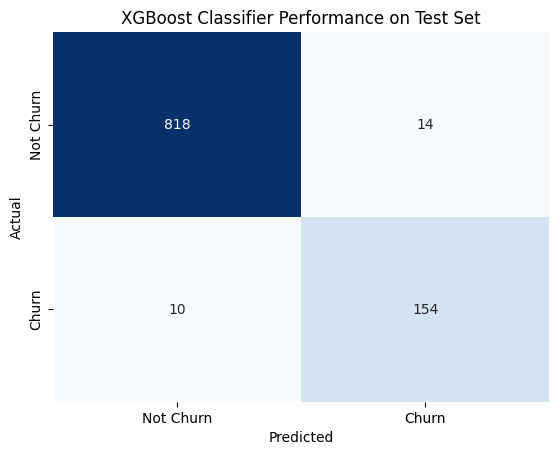

In [447]:
# get confusion matrix GRIDSEARCHCV
cm_xgb = confusion_matrix(y_test, y_pred_xgb)

# display confusion matrix
ax = plt.subplot()
sns.heatmap(cm_xgb, annot=True, fmt='g', ax=ax, cmap='Blues', cbar=False)
ax.set_xlabel('Predicted')
ax.set_ylabel('Actual')
ax.set_title('XGBoost Classifier Performance on Test Set')
ax.set_xticklabels(['Not Churn', 'Churn'])
ax.set_yticklabels(['Not Churn', 'Churn'])
plt.show()

In [448]:
# simulate misclassification cost
FP_cost = 17.2
FN_cost = 86
FP_xgb = 14
FN_xgb = 10
total_cost_xgb = (FP_xgb * FP_cost) + (FN_xgb * FN_cost)
total_cost_xgb

1100.8

**Interpretasi**

Dilakukan experiment hyperparameter tuning dengan RandomizedGridCV, didapatkan best parameter untuk model XGBoost adalah:

<div style="text-align: center;">
{'model__colsample_bytree': 1.0, 'model__feature_selection': None, 'model__gamma': 0, 'model__learning_rate': 0.2, 'model__max_depth': 15, 'model__min_child_weight': 5, 'model__n_estimators': 200, 'model__subsample': 0.8}
</div>

Didapatkan F2 Score

| Status | Train Set | Test Set |
| ------ | --------- | -------- |
| Before Tuning | 0.855 | 0.944 |
| After Tuning | 0.871 | 0.934 |

Dari hasil tersebut dicoba untuk plot confusion matrix untuk model XGBoost dengan best parameter di atas. Lalu didapatakan:

1. True Positives (TP): Sebanyak 154 kasus Churn (kelas positif) berhasil diprediksi dengan benar sebagai Churn.
2. True Negatives (TN): Sebanyak 818 kasus Not Churn (kelas negatif) berhasil diprediksi dengan benar sebagai Not Churn.
3. False Positives (FP): Sebanyak 14 kasus Not Churn salah diprediksi sebagai Churn.
4. False Negatives (FN): Sebanyak 10 kasus Churn salah diprediksi sebagai Not Churn.

Hasil dari hyperparameter tuning XGBoost menggunakan GridSearchCV menghasilkan model yang sangat akurat dalam mendeteksi churn dan non-churn. Jumlah kesalahan yang sangat minim menunjukkan bahwa model ini sangat dapat diandalkan untuk prediksi churn. Model ini juga menunjukkan keseimbangan yang sangat baik dalam memprediksi kedua kelas, menjadikannya salah satu pilihan yang kuat untuk tugas prediksi churn dalam konteks bisnis.

##### **5.2.7.3.2 Eksperimen 3.2: Hyperparameter Tuning LightGBM Classifier**

**Feature Engineering**

| Langkah | Deskripsi |
|---------|---------|
| **Median Imputation dengan Grouping** | - **Median Coupon**: Mengisi `CouponUsed` dengan nilai median berdasarkan grup `OrderCount` menggunakan class MedianImputerGroup. <br> - **Median Order**: Mengisi `OrderCount` dengan nilai median berdasarkan grup `CouponUsed` menggunakan class MedianImputerGroup.|
| **Median Imputation untuk Fitur Lain** | Mengisi nilai median untuk fitur: <br> - `Tenure` <br> - `WarehouseToHome` <br> - `HourSpendOnApp` <br> - `DaySinceLastOrder` <br> - `OrderAmountHikeFromlastYear` menggunakan class MedianImputer. |
| **Encoding Kategorikal** | **OneHotEncoding**: Menggunakan `OneHotEncoder` untuk fitur berikut dengan `drop='first'`: <br> - `PreferredLoginDevice` <br> - `PreferredPaymentMode` <br> - `PreferredOrderCat` <br> - `MaritalStatus` <br> **Remainder**: Fitur lainnya tetap dipertahankan. |
| **Resampling**  | Menggunakan teknik resampling (ros - Random Over Sampling) untuk menyeimbangkan dataset. |
| **Model**  | LightGBM Classifier|

**Tunning**

In [449]:
# Hyperparameter Tuning LGBMClassifier GRIDSEARCHCV
model = lgbm
rfe_selector = RFE(estimator=model, n_features_to_select=None, step=1)
sfs_forward = SequentialFeatureSelector(estimator=model, n_features_to_select='auto', direction='forward')
sfs_backward = SequentialFeatureSelector(estimator=model, n_features_to_select='auto', direction='backward')

estimator = Pipeline([
                ('median_coupon', MedianImputerGroup(fill_column='CouponUsed', group_column='OrderCount')),
                ('median_order', MedianImputerGroup(fill_column='OrderCount', group_column='CouponUsed')),
                ('median_imputer', MedianImputer(fill_columns=['Tenure', 'WarehouseToHome', 'HourSpendOnApp', 
                                                        'DaySinceLastOrder', 'OrderAmountHikeFromlastYear'])),
                ('encoder', encoder),
                ('resampler', ros),
                ('model', model)
            ])

hyperparam_space = {    
    'model__num_leaves': [31, 50, 100],
    'model__max_depth': [-5, -1, 10],
    'model__learning_rate': [0.01, 0.1, 0.2],
    'model__n_estimators': [100, 200, 500],
    'model__min_child_samples': [15, 20, 25],
    'model__subsample': [0.4, 0.6, 0.8],
    'model__feature_selection': [None, rfe_selector, sfs_forward, sfs_backward]
}

skfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=0)

grid_search_lgbm = GridSearchCV(
    estimator, 
    param_grid = hyperparam_space, 
    cv = skfold,
    scoring = f2_score,
    n_jobs = -1 
)

In [451]:
#GRIDSEARCHCV
grid_search_lgbm.fit(X_train, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=0, shuffle=True),
             estimator=Pipeline(steps=[('median_coupon',
                                        MedianImputerGroup(fill_column='CouponUsed',
                                                           group_column='OrderCount')),
                                       ('median_order',
                                        MedianImputerGroup(fill_column='OrderCount',
                                                           group_column='CouponUsed')),
                                       ('median_imputer',
                                        MedianImputer(fill_columns=['Tenure',
                                                                    'WarehouseToHome',
                                                                    'H...
                                                      SequentialFeatureSelector(direction='backward',
                                                                                estimator=LGBMClassifier(random_state=42,
                                                                                                         verbose=0))],
                         'model__learning_rate': [0.01, 0.1, 0.2],
                         'model__max_depth': [-5, -1, 10],
                         'model__min_child_samples': [15, 20, 25],
                         'model__n_estimators': [100, 200, 500],
                         'model__num_leaves': [31, 50, 100],
                         'model__subsample': [0.4, 0.6, 0.8]},
             scoring=make_scorer(fbeta_score, response_method='predict', beta=2))

In [452]:
# GRIDSEARCHCV
print('best score',grid_search_lgbm.best_score_)
print('best param',grid_search_lgbm.best_params_)

best score 0.875921035837079
best param {'model__feature_selection': None, 'model__learning_rate': 0.1, 'model__max_depth': -5, 'model__min_child_samples': 20, 'model__n_estimators': 200, 'model__num_leaves': 31, 'model__subsample': 0.4}


In [453]:
# GRIDSEARCHCV
pd.DataFrame(grid_search_lgbm.cv_results_).sort_values('rank_test_score').head(3)

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
281       1.748240      0.077418         0.027775        0.000533   
279       1.742804      0.197683         0.028064        0.000913   
280       1.749236      0.152767         0.027758        0.000620   

    param_model__feature_selection  param_model__learning_rate  \
281                           None                         0.1   
279                           None                         0.1   
280                           None                         0.1   

     param_model__max_depth  param_model__min_child_samples  \
281                      -5                              20   
279                      -5                              20   
280                      -5                              20   

     param_model__n_estimators  param_model__num_leaves  \
281                        200                       31   
279                        200                       31   
280                        200                       31   

     param_model__subsample  \
281                     0.8   
279                     0.4   
280                     0.6   

                                                                                                                                                                                                    params  \
281  {'model__feature_selection': None, 'model__learning_rate': 0.1, 'model__max_depth': -5, 'model__min_child_samples': 20, 'model__n_estimators': 200, 'model__num_leaves': 31, 'model__subsample': 0.8}   
279  {'model__feature_selection': None, 'model__learning_rate': 0.1, 'model__max_depth': -5, 'model__min_child_samples': 20, 'model__n_estimators': 200, 'model__num_leaves': 31, 'model__subsample': 0.4}   
280  {'model__feature_selection': None, 'model__learning_rate': 0.1, 'model__max_depth': -5, 'model__min_child_samples': 20, 'model__n_estimators': 200, 'model__num_leaves': 31, 'model__subsample': 0.6}   

     split0_test_score  split1_test_score  split2_test_score  \
281           0.906344           0.872894           0.865237   
279           0.906344           0.872894           0.865237   
280           0.906344           0.872894           0.865237   

     split3_test_score  split4_test_score  mean_test_score  std_test_score  \
281           0.886364           0.848765         0.875921         0.01947   
279           0.886364           0.848765         0.875921         0.01947   
280           0.886364           0.848765         0.875921         0.01947   

     rank_test_score  
281                1  
279                1  
280                1

In [454]:
pd.options.display.max_colwidth = None

best_index_lgbm = grid_search_lgbm.best_index_
std_test_score_lgbm = grid_search_lgbm.cv_results_['std_test_score'][best_index_lgbm]

# Store tuned version result
lgbm_tuned = pd.DataFrame({
    'Name': ['Hyperparameter Tuning'],
    'Model': ['LightGBM'],
    'Best Parameters': [
        grid_search_lgbm.best_params_,
    ],
    'Best F2 Score': [
        grid_search_lgbm.best_score_,
    ],
    'Std': [
        std_test_score_lgbm,
    ]
})

lgbm_tuned

Name     Model  \
0  Hyperparameter Tuning  LightGBM   

                                                                                                                                                                                         Best Parameters  \
0  {'model__feature_selection': None, 'model__learning_rate': 0.1, 'model__max_depth': -5, 'model__min_child_samples': 20, 'model__n_estimators': 200, 'model__num_leaves': 31, 'model__subsample': 0.4}   

   Best F2 Score      Std  
0       0.875921  0.01947

In [455]:
# Model setelah hyperparameter tuning GRIDSEARCHCV
tuned_model_lgbm = grid_search_lgbm.best_estimator_

# Fitting model
tuned_model_lgbm.fit(X_train, y_train)

# Predict to test set
y_pred_lgbm = tuned_model_lgbm.predict(X_test)

# Evaluate f2 score on test set
tuned_score_lgbm = fbeta_score(y_test, y_pred_lgbm, beta=2)
tuned_score_lgbm

0.9428223844282239

**Confusion Matrix**

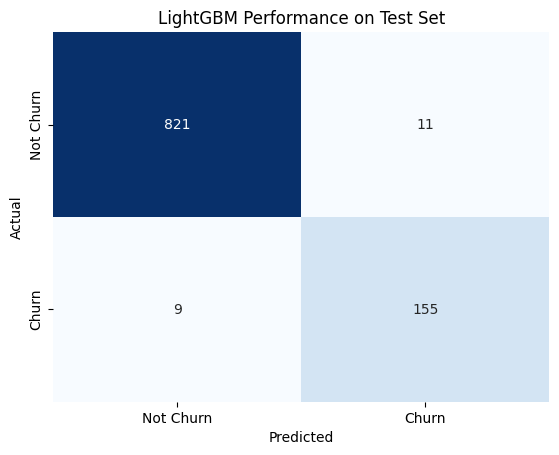

In [456]:
# get confusion matrix GRIDSEARCHCV
cm_lgbm = confusion_matrix(y_test, y_pred_lgbm)

# display confusion matrix
ax = plt.subplot()
sns.heatmap(cm_lgbm, annot=True, fmt='g', ax=ax, cmap='Blues', cbar=False)
ax.set_xlabel('Predicted')
ax.set_ylabel('Actual')
ax.set_title('LightGBM Performance on Test Set')
ax.set_xticklabels(['Not Churn', 'Churn'])
ax.set_yticklabels(['Not Churn', 'Churn'])
plt.show()

In [457]:
# simulate misclassification cost
FP_cost = 17.2
FN_cost = 86
FP_lgbm = 11
FN_lgbm = 9
total_cost_lgbm = (FP_lgbm * FP_cost) + (FN_lgbm * FN_cost)
total_cost_lgbm

963.2

**Interpretasi**

Dilakukan experiment hyperparameter tuning dengan GridSearchCV, didapatkan best parameter untuk model LightGBM adalah:

<div style="text-align: center;">
{'model__feature_selection': None, 'model__learning_rate': 0.1, 'model__max_depth': -5, 'model__min_child_samples': 20, 'model__n_estimators': 200, 'model__num_leaves': 31, 'model__subsample': 0.4}
</div>

Didapatkan F2 Score

| Status | Train Set | Test Set |
| ------ | --------- | -------- |
| Before Tuning | 0.862 | 0.930 |
| After Tuning | 0.875 | 0.942 |

Dari hasil tersebut dicoba untuk plot confusion matrix untuk model XGBoost dengan best parameter di atas. Lalu didapatakan:

1. True Positives (TP): Sebanyak 155 kasus Churn (kelas positif) berhasil diprediksi dengan benar sebagai Churn.
2. True Negatives (TN): Sebanyak 821 kasus Not Churn (kelas negatif) berhasil diprediksi dengan benar sebagai Not Churn.
3. False Positives (FP): Sebanyak 11 kasus Not Churn salah diprediksi sebagai Churn.
4. False Negatives (FN): Sebanyak 9 kasus Churn salah diprediksi sebagai Not Churn.

Hasil dari hyperparameter tuning LGBM menggunakan GridSearchCV menghasilkan model yang sangat akurat dalam mendeteksi churn dan non-churn. Jumlah kesalahan yang terjadi sangat minim, menjadikan model ini sangat andal untuk prediksi churn, yang sangat penting dalam konteks bisnis di mana deteksi churn yang akurat dapat membantu dalam pengambilan keputusan strategis untuk meningkatkan retensi pelanggan. Model ini bisa dianggap sebagai salah satu model terbaik yang dapat diandalkan untuk tugas prediksi churn.

##### **5.2.7.3.3 Eksperimen 3.3: Hyperparameter Tuning Decission Tree**

**Feature Engineering**

| Langkah | Deskripsi |
|---------|---------|
| **Median Imputation dengan Grouping** | - **Median Coupon**: Mengisi `CouponUsed` dengan nilai median berdasarkan grup `OrderCount` menggunakan class MedianImputerGroup. <br> - **Median Order**: Mengisi `OrderCount` dengan nilai median berdasarkan grup `CouponUsed` menggunakan class MedianImputerGroup.|
| **Median Imputation untuk Fitur Lain** | Mengisi nilai median untuk fitur: <br> - `Tenure` <br> - `WarehouseToHome` <br> - `HourSpendOnApp` <br> - `DaySinceLastOrder` <br> - `OrderAmountHikeFromlastYear` menggunakan class MedianImputer. |
| **Encoding Kategorikal** | **OneHotEncoding**: Menggunakan `OneHotEncoder` untuk fitur berikut dengan `drop='first'`: <br> - `PreferredLoginDevice` <br> - `PreferredPaymentMode` <br> - `PreferredOrderCat` <br> - `MaritalStatus` <br> **Remainder**: Fitur lainnya tetap dipertahankan. |
| **Resampling**  | Menggunakan teknik resampling (ros - Random Over Sampling) untuk menyeimbangkan dataset. |
| **Model**  | Decission Tree|

**Tunning**

In [458]:
# Hyperparameter Tuning Decision Tree
model = tree
rfe_selector = RFE(estimator=model, n_features_to_select=None, step=1)
sfs_forward = SequentialFeatureSelector(estimator=model, n_features_to_select='auto', direction='forward')
sfs_backward = SequentialFeatureSelector(estimator=model, n_features_to_select='auto', direction='backward')

estimator = Pipeline([
                ('median_coupon', MedianImputerGroup(fill_column='CouponUsed', group_column='OrderCount')),
                ('median_order', MedianImputerGroup(fill_column='OrderCount', group_column='CouponUsed')),
                ('median_imputer', MedianImputer(fill_columns=['Tenure', 'WarehouseToHome', 'HourSpendOnApp', 
                                                        'DaySinceLastOrder', 'OrderAmountHikeFromlastYear'])),
                ('encoder', encoder),
                ('resampler', ros),
                ('model', model)
            ])

hyperparam_space = {    
    'model__min_samples_split': [5, 7, 10],
    'model__max_depth': [20, 30, 50],
    'model__criterion': ['gini', 'entropy'],
    'model__class_weight': [None, 'balanced'],
    'model__splitter': ['best', 'random'],
    # 'model__feature_selection': [None, rfe_selector, sfs_forward, sfs_backward]
}

skfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=0)

grid_search_dt = GridSearchCV(
    estimator, 
    param_grid= hyperparam_space, 
    cv = skfold,
    scoring = f2_score,
    n_jobs = -1 
)

In [459]:
grid_search_dt.fit(X_train, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=0, shuffle=True),
             estimator=Pipeline(steps=[('median_coupon',
                                        MedianImputerGroup(fill_column='CouponUsed',
                                                           group_column='OrderCount')),
                                       ('median_order',
                                        MedianImputerGroup(fill_column='OrderCount',
                                                           group_column='CouponUsed')),
                                       ('median_imputer',
                                        MedianImputer(fill_columns=['Tenure',
                                                                    'WarehouseToHome',
                                                                    'H...
                                        RandomOverSampler(random_state=42)),
                                       ('model',
                                        DecisionTreeClassifier(random_state=42))]),
             n_jobs=-1,
             param_grid={'model__class_weight': [None, 'balanced'],
                         'model__criterion': ['gini', 'entropy'],
                         'model__max_depth': [20, 30, 50],
                         'model__min_samples_split': [5, 7, 10],
                         'model__splitter': ['best', 'random']},
             scoring=make_scorer(fbeta_score, response_method='predict', beta=2))

In [460]:
print('best score',grid_search_dt.best_score_)
print('best param',grid_search_dt.best_params_)

best score 0.783834808684043
best param {'model__class_weight': None, 'model__criterion': 'entropy', 'model__max_depth': 30, 'model__min_samples_split': 5, 'model__splitter': 'best'}


In [461]:
pd.DataFrame(grid_search_dt.cv_results_).sort_values('rank_test_score').head(3)

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
24       0.126392      0.009488         0.033370        0.005054   
60       0.128534      0.003750         0.029682        0.002444   
30       0.131286      0.008046         0.026645        0.003451   

   param_model__class_weight param_model__criterion  param_model__max_depth  \
24                      None                entropy                      30   
60                  balanced                entropy                      30   
30                      None                entropy                      50   

    param_model__min_samples_split param_model__splitter  \
24                               5                  best   
60                               5                  best   
30                               5                  best   

                                                                                                                                                  params  \
24        {'model__class_weight': None, 'model__criterion': 'entropy', 'model__max_depth': 30, 'model__min_samples_split': 5, 'model__splitter': 'best'}   
60  {'model__class_weight': 'balanced', 'model__criterion': 'entropy', 'model__max_depth': 30, 'model__min_samples_split': 5, 'model__splitter': 'best'}   
30        {'model__class_weight': None, 'model__criterion': 'entropy', 'model__max_depth': 50, 'model__min_samples_split': 5, 'model__splitter': 'best'}   

    split0_test_score  split1_test_score  split2_test_score  \
24           0.774436           0.811836           0.769817   
60           0.774436           0.811836           0.769817   
30           0.774436           0.811836           0.769817   

    split3_test_score  split4_test_score  mean_test_score  std_test_score  \
24           0.825758           0.737327         0.783835        0.031589   
60           0.825758           0.737327         0.783835        0.031589   
30           0.825758           0.737327         0.783835        0.031589   

    rank_test_score  
24                1  
60                1  
30                1

In [462]:
pd.options.display.max_colwidth = None

best_index_dt = grid_search_dt.best_index_
std_test_score_dt = grid_search_dt.cv_results_['std_test_score'][best_index_dt]

# Store tuned version result
dt_tuned = pd.DataFrame({
    'Name': ['Hyperparameter Tuning'],
    'Model': ['Decision Tree'],
    'Best Parameters': [
        grid_search_dt.best_params_,
    ],
    'Best F2 Score': [
        grid_search_dt.best_score_,
    ],
    'Std': [
        std_test_score_dt,
    ]
})

dt_tuned

Name          Model  \
0  Hyperparameter Tuning  Decision Tree   

                                                                                                                                  Best Parameters  \
0  {'model__class_weight': None, 'model__criterion': 'entropy', 'model__max_depth': 30, 'model__min_samples_split': 5, 'model__splitter': 'best'}   

   Best F2 Score       Std  
0       0.783835  0.031589

In [463]:
# Model setelah hyperparameter tuning
tuned_model_dt = grid_search_dt.best_estimator_

# Fitting model
tuned_model_dt.fit(X_train, y_train)

# Predict to test set
y_pred_dt = tuned_model_dt.predict(X_test)

# Evaluate f2 score on test set
tuned_score_dt = fbeta_score(y_test, y_pred_dt, beta=2)
tuned_model_dt

Pipeline(steps=[('median_coupon',
                 MedianImputerGroup(fill_column='CouponUsed',
                                    group_column='OrderCount')),
                ('median_order',
                 MedianImputerGroup(fill_column='OrderCount',
                                    group_column='CouponUsed')),
                ('median_imputer',
                 MedianImputer(fill_columns=['Tenure', 'WarehouseToHome',
                                             'HourSpendOnApp',
                                             'DaySinceLastOrder',
                                             'OrderAmountHikeFromlastYear'])),
                ('encoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('OneHotEncoder',
                                                  OneHotEncoder(drop='first'),
                                                  ['PreferredLoginDevice',
                                                   'PreferredPaymentMode',
                                                   'PreferredOrderCat',
                                                   'MaritalStatus'])])),
                ('resampler', RandomOverSampler(random_state=42)),
                ('model',
                 DecisionTreeClassifier(criterion='entropy', max_depth=30,
                                        min_samples_split=5,
                                        random_state=42))])

**Confusion Matrix**

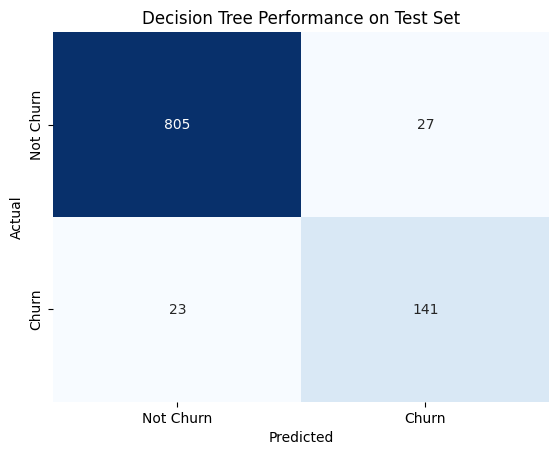

In [464]:
# get confusion matrix
cm_dt = confusion_matrix(y_test, y_pred_dt)

# display confusion matrix
ax = plt.subplot()
sns.heatmap(cm_dt, annot=True, fmt='g', ax=ax, cmap='Blues', cbar=False)
ax.set_xlabel('Predicted')
ax.set_ylabel('Actual')
ax.set_title('Decision Tree Performance on Test Set')
ax.set_xticklabels(['Not Churn', 'Churn'])
ax.set_yticklabels(['Not Churn', 'Churn'])
plt.show()

In [465]:
# simulate misclassification cost
FP_cost = 17.2
FN_cost = 86
FP_dt = 27
FN_dt = 23
total_cost_dt = (FP_dt * FP_cost) + (FN_dt * FN_cost)
total_cost_dt

2442.4

**Interpretasi**

Dilakukan experiment hyperparameter tuning dengan GridSearchCV, didapatkan best parameter untuk model Decision Tree adalah:

<div style="text-align: center;">
{'model__class_weight': None, 'model__criterion': 'entropy', 'model__max_depth': 30, 'model__min_samples_split': 5, 'model__splitter': 'best'}
</div>

Pada percobaan hyperparameter tuning Decision Tree, tidak bisa dilakukan hyperparameter tuning dengan memasukan parameter feature selection. Sehingga pada experiment ini tidak digunakan RFE dan SFS.

Didapatkan F2 Score

| Status | Train Set | Test Set |
| ------ | --------- | -------- |
| Before Tuning | 0.774 | 0.839 |
| After Tuning | 0.783 | 0.855 |

Dari hasil tersebut dicoba untuk plot confusion matrix untuk model Decision Tree dengan best parameter di atas. Lalu didapatakan:

1. True Positives (TP): Sebanyak 141 kasus Churn (kelas positif) berhasil diprediksi dengan benar sebagai Churn.
2. True Negatives (TN): Sebanyak 805 kasus Not Churn (kelas negatif) berhasil diprediksi dengan benar sebagai Not Churn.
3. False Positives (FP): Sebanyak 27 kasus Not Churn salah diprediksi sebagai Churn.
4. False Negatives (FN): Sebanyak 23 kasus Churn salah diprediksi sebagai Not Churn.

Hasil dari hyperparameter tuning Decision Tree menggunakan GridSearchCV menghasilkan model yang cukup baik dalam memprediksi churn, tetapi masih ada ruang untuk perbaikan, terutama dalam mengurangi jumlah False Positives dan False Negatives.

##### **5.2.7.3.4 Resume Eksperimen 3**

Dari ketiga model yang sudah dilakukan hyperparameter tuning menggunakan GridSearchCV. Didapatkan hasil F2 Score dari masing-masing model berikut.

<table>
  <tr>
    <th rowspan="3">Model</th>
    <th colspan="2">F2 Score Before Tuning</th>
    <th colspan="2">F2 Score After Tuning</th>
    <th rowspan="3">Misclassification Cost</th>
  </tr>
  <tr>
  </tr>
  <tr>
    <th>Train</th>
    <th>Test</th>
    <th>Train</th>
    <th>Test</th>
  </tr>
  <tr>
    <td>XGBoost</td>
    <td>0.855</td>
    <td>0.944</td>
    <td>0.871</td>
    <td>0.934</td>
    <td>$1100.8</td>
  </tr>
  <tr>
    <td>LightGBM</td>
    <td>0.862</td>
    <td>0.930</td>
    <td>0.875</td>
    <td>0.942</td>
    <td>$963.2</td>
  </tr>
  <tr>
    <td>Decision Tree</td>
    <td>0.774</td>
    <td>0.839</td>
    <td>0.783</td>
    <td>0.855</td>
    <td>$2442.4</td>
  </tr>
</table>

Hasil dari tabel di atas menunjukkan perbandingan performa tiga model—XGBoost, LightGBM, dan Decision Tree—sebelum dan sesudah tuning, menggunakan F2 Score sebagai metrik evaluasi utama, serta biaya kesalahan klasifikasi. 

- **XGBoost**: Model ini memiliki F2 Score yang lebih tinggi pada data uji sebelum tuning (0.944) dibandingkan setelah tuning (0.934), meskipun tuning meningkatkan performa pada data pelatihan. Biaya kesalahan klasifikasi untuk model ini adalah $1100.8.

- **LightGBM**: Model ini menunjukkan sedikit peningkatan dalam F2 Score pada data uji setelah tuning (0.942) dibandingkan dengan sebelum tuning (0.930). Biaya kesalahan klasifikasi untuk model ini adalah yang terendah di antara semua model, yaitu $963.2.

- **Decision Tree**: Model ini memiliki F2 Score terendah baik sebelum maupun setelah tuning, dengan biaya kesalahan klasifikasi tertinggi sebesar $2442.4.

Model LightGBM menunjukkan performa yang sangat baik dengan nilai F2 Score yang meningkat setelah tuning, baik pada data train maupun test. Biaya kesalahan klasifikasi juga lebih rendah dibandingkan model lain. Hal ini menunjukkan efisiensi yang lebih baik dalam memprediksi churn dan menunjukkan bahwa **LightGBM** merupakan pilihan yang optimal dalam konteks ini.

## **5.3 Best Model Selection**

Dalam pengembangan model prediksi churn, telah dilakukan serangkaian langkah feature engineering guna meningkatkan kinerja model, terutama dalam F2 Score. Pemilihan F2-Score didasarkan pada fokus yang lebih cenderung pada recall dibandingkan dengan precision, yang penting dalam konteks pencegahan churn. Berikut merupakan gambaran model terbaik yang diputuskan untuk digunakan.


In [466]:
grid_search_lgbm.best_params_

{'model__feature_selection': None,
 'model__learning_rate': 0.1,
 'model__max_depth': -5,
 'model__min_child_samples': 20,
 'model__n_estimators': 200,
 'model__num_leaves': 31,
 'model__subsample': 0.4}

- Hasil dari grid_search_lgbm.best_params_ menunjukkan parameter terbaik untuk model LightGBM, sebagai berikut:

    - model__feature_selection: None: semua fitur yang ada digunakan, menunjukkan informasi yang memadai.
    - model__learning_rate: 0.1: nilai ini memberikan laju pembelajaran yang stabil, membantu konvergensi optimal.
    - model__max_depth: -5: tidak ada batasan kedalaman pohon, memungkinkan model menyesuaikan secara otomatis.
    - model__min_child_samples: 20: jumlah minimal sampel untuk node baru, mencegah overfitting.
    - model__n_estimators: 200: model menggunakan 200 pohon, cukup untuk kompleksitas tanpa risiko overfitting.
    - model__num_leaves: 31: memberikan fleksibilitas untuk menangkap interaksi kompleks antar fitur.
    - model__subsample: 0.4: hanya 40% data yang digunakan untuk setiap pohon, membantu generalisasi.

In [467]:
grid_search_lgbm.best_estimator_

Pipeline(steps=[('median_coupon',
                 MedianImputerGroup(fill_column='CouponUsed',
                                    group_column='OrderCount')),
                ('median_order',
                 MedianImputerGroup(fill_column='OrderCount',
                                    group_column='CouponUsed')),
                ('median_imputer',
                 MedianImputer(fill_columns=['Tenure', 'WarehouseToHome',
                                             'HourSpendOnApp',
                                             'DaySinceLastOrder',
                                             'OrderAmountHikeFromlastYear'])),
                ('encoder',
                 Col...ansformer(remainder='passthrough',
                                   transformers=[('OneHotEncoder',
                                                  OneHotEncoder(drop='first'),
                                                  ['PreferredLoginDevice',
                                                   'PreferredPaymentMode',
                                                   'PreferredOrderCat',
                                                   'MaritalStatus'])])),
                ('resampler', RandomOverSampler(random_state=42)),
                ('model',
                 LGBMClassifier(feature_selection=None, max_depth=-5,
                                n_estimators=200, random_state=42,
                                subsample=0.4, verbose=0))])

- Hasil dari grid_search_lgbm.best_estimator_ menunjukkan langkah-langkah feature engineering yang digunakan dalam model LightGBM:

    - MedianImputationGroup:
        - Mengisi missing value `CouponUsed` dan `OrderCount` dengan nilai median berdasarkan kelompok yang relevan untuk menjaga konteks dan relevansi data.
    - MedianImputation untuk fitur:
        - Mengisi fitur seperti `Tenure`, `WarehouseToHome`, `HourSpendOnApp`, `DaySinceLastOrder`, dan `OrderAmountHikeFromlastYear` dengan median untuk mengurangi bias akibat missing value.
    - Encoding Kategorikal:
        - Menggunakan OneHotEncoding untuk fitur kategorikal seperti `PreferredLoginDevice`, `PreferredPaymentMode`, `PreferredOrderCat`, dan `MaritalStatus`, dengan opsi drop='first' untuk menghindari multikolinearitas.
    - Resampling:
        - Menerapkan Random Over Sampling untuk menyeimbangkan dataset, memastikan model dapat mengenali pola dari kelas minoritas.
    - Model: 
        - Menggunakan LightGBM Classifier, yang efisien dan cepat dalam menangani dataset besar.

In [468]:
final_model = grid_search_lgbm.best_estimator_

# fitting
final_model.fit(X_train, y_train)

# predict
y_pred_final = final_model.predict(X_test)

# evaluate (f2-score)
test_score_final = fbeta_score(y_test, y_pred_final, beta=2)
test_score_final

0.9428223844282239

- Dengan nilai F2 Score mencapai 0.9428, model ini menunjukkan peforma yang baik, yang dapat mencerminkan efektivitas yang tinggi dalam mengidentifikasi konsumen yang berpotensi churn.

## **5.4 Model Evaluation**

### **5.4.1 Deskripsi Algoritma Best Model**

Algoritma terbaik dari eksperimen model pada kasus ini adalah [LightGBM Classifier](https://pro.arcgis.com/en/pro-app/latest/tool-reference/geoai/how-lightgbm-works.htm#:~:text=LightGBM%20is%20a%20gradient%20boosting,high%20performance%20with%20distributed%20systems). Algoritma ini merupakan salah satu algoritma yang menggunakan metode ensemble gradient boosing yang berbasis pada decision trees. LightGBM dapat digunakan untuk klasifikasi dan regresi, serta dirancang untuk menghasilkan kinerja yang optimal pada sistem terdistribusi. Berikut merupakan beberapa [kelebihan dari LightGBM](https://www.kaggle.com/code/prashant111/lightgbm-classifier-in-python):

- *Training speed* yang lebih cepat serta menghasilkan efisiensi yang lebih tinggi.
- Memori yang digunakan lebih rendah.
- Dapat menghasilkan akurasi yang lebih baik.
- Mampu menangani data dengan skala besar.



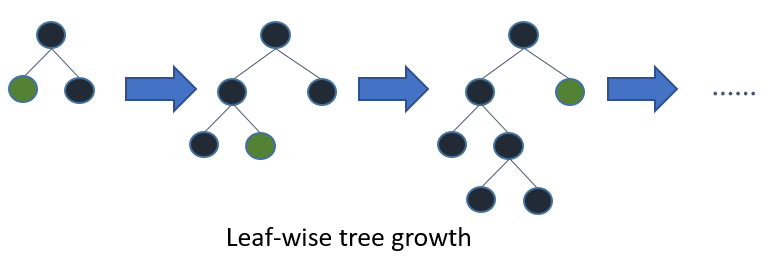

[Leaf-wise tree growth](https://i.sstatic.net/YOE9y.png)

LightGBM memiliki banyak kelebihan, namun juga memiliki beberapa kekurangan. Salah satunya adalah kecenderungnannya untuk overfitting pada dataset yang kecil, karena pohon dalam algoritma ini tumbuh secara leaf-wise. Masalah tersebut dapat ditangani dengan pengaturan parameter max_depth guna menghasilkan model yang tidak terlalu kompleks.

Berikut adalah penjelasan tentang cara kerja LightGBM:

1. Persiapan data:
    - Data yang akan digunakan dibagi kedalam fitur dan target. Data tersebut akan dikategorikan dan diubah ke dalam format yang dapat diproses oleh LightGBM.

2. Pembentukan bin:
    - LightGBM menggunakan metode histogram untuk mengelompokkan nilai fitur ke dalam kelompok yang disebut bin. Cara ini membuat perhitungan menjadi lebih sederhana karena berfokus pada kelompok nilai, bukan pada setiap titik data satu per satu.

3. Perhitungan gain:
    - Langkah ini berguna untuk mengevaluasi efektivitas splitting data. Gain didefinisikan sebagai selisih antara kerugian (loss) sebelum dan sesudah splitting. Semakin besar gain, semakin baik splitting tersebut dalam meningkatkan kinerja model. 

4. Leaf selection:
    - Langkah ini bertujuan untuk mengurangi kerugian, dimana algoritma ini tumbuh secara leaf-wise. Metode ini memungkinkan model untuk belajar lebih cepat dan menghasilkan tree yang lebih akurat.

5. Tree development:
    - LightGBM akan melakukan splitting berdasarkan fitur yang memberikan gain tertinggi. Proses ini akan diulang hingga mencapai max_depth yang ditentutakn atau tidak ada lagi splitting yang signifikan.

6. Proses boosting:
    - Proses ini akan diulang berdasarkan iterasi (boosting rounds), dimana setiap pohon baru yang terbentuk akan mengkoreksi kesalahan dari pohon sebelumnya.

7. Prediksi akhir:
    - LigthGBM akan menggabungkan output dari semua pohon untuk menghasilkan prediksi akhir, baik untuk klasifikasi maupun regresi.

### **5.4.2 Learning Curve**

[Learning curves](https://machinelearningmastery.com/learning-curves-for-diagnosing-machine-learning-model-performance/) adalah alat visual yang digunakan untuk memahami bagaimana kinerja model berubah seiring dengan jumlah data training yang digunakan. Grafik ini menggambarkan akurasi model atau error pada data pelatihan dan data validasi sebagai fungsi dari ukuran dataset. Dengan menganalisis learning curves, seseorang dapat memperoleh informasi mengenai apakah suatu model mengalami overfitting atau underfitting. Berikut merupakan kelebihan dari analisis learning curves:

- Mengidentifikasi overfitting dan underfitting:
    - Underfitting:
        - Ciri-ciri: kinerja pada data training dan validation menunjukan akurasi yang rendah dan cenderung mendatar, bahkan ketika ukuran data training meningkat. Kedua garis akan berada dekat satu sama lain yang menunjukkan model tidak mampu menangkap pola. Hal ini dapat terjadi karena model terlalu sederhana untuk memahami kompleksitas data.

    - overfitting:
        - Ciri-ciri: kinerja pada data training sangat tinggi, sedangkan pada data validation jauh lebih rendah. Garis untuk data training akan meningkat tajam, sedangkan garis pada validasi menurun setelah titik tertentu, sehingga terdapat jarak yang signifikan antara kedua garis. Hal ini dapat terjadi karena model terlalu kompleks dalam menyesuaikan diri dengan noise dalam data trainning.
    
- Learning curves dapat memberikan gambaran tentang seberapa banyak data yang diperlukan untuk meningkatkan kinerja model, membantu dalam pengambilan keputusan mengenai pengumpulan data kedepannya. Selain itu dapat memungkinkan analisis yang lebih dalam tentang karakteristik model dan perilakunya saat diterapkan pada data baru.

Disamping kelebihan-kelebihan pada analisa learning curves, terdapat kekurangan learning curves, diantaranya:

- Proses pembuatan learning curves memerlupak traningin model berulang kali, yang dapat memakan waktu dan sumber daya, terutama untuk dataset besar atau model yang kompleks.

- Dapat menyebabkan kesimpulan yang salah tentang konerja model, jika learning curves tidak diinterpretasikan dengan benar

- Learning curves mungkin tidak mencerminkan kinerja model yang sebenarnya jika data training mengandung banyak noise atau outlier.


Berikut merupakan learning curves dari best model yang telah dianalisa:

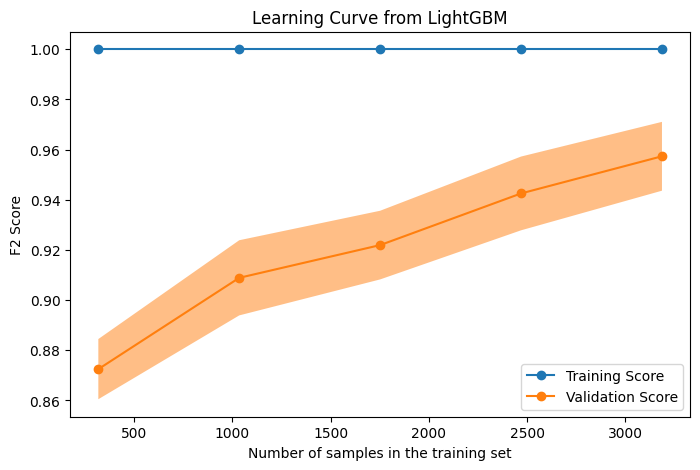

In [469]:
from sklearn.model_selection import LearningCurveDisplay

# Set figure size
fig, ax = plt.subplots(figsize=(8, 5))

# Set the required parameters
common_params={
    "X": X_train,
    "y": y_train,
    "train_sizes": np.linspace(0.1, 1, 5),
    "cv": 5,
    "score_type": "both",
    "n_jobs": -1,
    "line_kw": {'marker': 'o'},
    "score_name": f2_score
}

# Generate learning curve plot
LearningCurveDisplay.from_estimator(final_model, **common_params, ax=ax)

# Set title and legend
handles, label = ax.get_legend_handles_labels()
ax.legend(handles[:2], ['Training Score', 'Validation Score'], loc='lower right')
ax.set_title(f'Learning Curve from LightGBM')
ax.set_ylabel('F2 Score')

# Show the plot
plt.show()

- Interpretasi:

    - Training score:
        - Kurva biru yang mendatar menunjukkan bahwa F2 Score untuk data training selalu berada di angka 1.0 terlepas dari jumlah data training. Hal ini dapat mengindikasikan bahwa terdapat kemungkinan model overfitting karena model terlalu mempelajari data training hingka skornya selalu maksimal, artinya: model mampu memprediksi data training tanpa kesalahan.

    - Validation score:
        - Kurva oranye memperlihatkan peningkatan seiring dengan bertambhanya jumlah data training. Pada awalnya, dengan sekitar 500 sample, F2 Score berada di kisaran 0.87, namun seiring bertambahnya data, F2 Score meningkat mendekati 0.96 ketika sampel lebih dari 3000.
        - Rentang bayangan oranye menunjukkan confidence interval, yang menyempit seiring bertambhanya jumlah data, yang mengindikasikan bahwa estimasi F2 Score semakin stabil dan lebih akurat.

    - Rekomendasi untuk model selanjutnya:
        - Mencoba kombinasi hyperpatameter tunning model untuk mengurangi overfitting, misalnya dengan mengatur num,leaves, max depth, ataupun min_data_in_leaf.
        - Skor validasi yang terus meningkat seiring bertambahnya data dapat menunjukkan bahwa lebih banyak data trainning mungkin akan membantu peforma model jauh lebih baik.
        - Menggunakan teknik cross-validation yang lebih komples juga dapat memberikan gambaran yang lebih lengkap terkait kemampuan generalisasi model.

### **5.4.3 Classification Report**

[Classification Report](https://www.kaggle.com/code/usamabajwa86/classification-report) adalah alat untuk mengevaluasi kinerja model klasifikasi dalam machine learning. Report ini akan memberikan informasi mendetail tentang bagaimana model memprediksi kelas-kelas yang berbeda dalam dataset. 
Classification report memiliki beberapa kegunaan penting dalam machine learning, antara lain dapat membantu dalam evaluasli model secara menyeluruh sehingga memungkinkan developer untuk memahami kinerja model dalam konteks kelas yang berbeda. Selain itu, developer dapat mengidentifikasi masalah seperti apakah model lebih efektif dalam mengidentifikasi satu kelas dibandingkan kelas lainnya, sehingga developer dapat menentukan model mana yang paling efektif. Berikut merupakan elemen-elemen utama yang terdapat dalam classification report:

- Precision, yang merupakan rasio prediksi posifit yang benar dibandingkan dengan seluruh prediksi positif. Precision dapat mengukur akurasi dari hasil yang diprediksi sebagai niali positif. Berikut merupakan rumus perhitungan untuk precision:

    Precision= TP / (TP + FP)

- Recall, yang merupakan rasio prediksi positif yang benar dibandingkan dengan seluruh data positif sebenarnya. Recall mengukur kemampuan model dalam menemukan semua contoh positif. Berikut merupakan rumus perhitungan untuk recall:

    Recall= TP / (TP + FN)
​
 
- F1 Score, yang merupakan rata-rata antara precision dan recall. F1 Score dapat memberikan gambaran yang lebih baik mengenai keseimbangan antara precision dan recall, terutama saat menghadapi imbalanced data. Berikut merupakan rumus perhitungan untuk F1 Score:

    F1= 2x ((Precision x Recall) / (Precision + Recall))
 
- Support, yang menunjukkan jumlah contoh yang sebenarnya ada untuk setiap kelas dalam dataset. Support dapat membantu dalam memahami seberapa banyak data yang ada untuk setiap kelas.  

- Accuracy, yang merupakan rasio jumlah prediksi yang benar dibandingkan dengan seluruh prediksi. Hal ini dapat memberikan gambaran umum tentang seberapa baik model bekerja. Berikut merupakan rumus perhitungan untuk Accuracy:

    Accuracy= (TP + TN) / (TP + TN+ FP + FN)

 

Keterangan dalam konteks analisa e-commerce churn:
- TP (True Positives): jumlah konsumen yang benar-benar churn dan berhasil diidentifikasi oleh model. Semakin tinggi TP, semakin baik model dalam mendeteksi konsumen yang churn.
- TN (True Negatives): jumlah konsumen yang tidak churn dan diidentifikasi dengan benar sebagai konsumen yang tidak akan churn, menunjukkan kemampuan model mengenali konsumen setianya.
- FP (False Positives): jumlah konsumen yang tidak churn tetapi dalah diidentifikasi sebagai konsumen yang churn. Hal ini dapat mengakibatkan tindakan yang tidak perlu, seperti promosi tapi untuk konsumen yang loyal.
- FN (False Negatives): jumlah konsumen yang sebenarnya churn tetapi tidak terdeteksi oleh model. Hal ini dapat mencerminkan kelemahan model dalam mendeteksi resiko churn dan kehilangan peluang untuk intervensi.

Berikut merupakan classification report dari best model yang telah dianalisa:

In [470]:
print(classification_report(y_test, y_pred_final))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       832
           1       0.93      0.95      0.94       164

    accuracy                           0.98       996
   macro avg       0.96      0.97      0.96       996
weighted avg       0.98      0.98      0.98       996



- Interpretasi :

    - Dengan recall untuk class 1 = 0.95, model ini dapat mendeteksi 95% konsumen yang akan churn, yang sangat penting dalam strategi pencegahan churn. Model mampu menangkap hampir semua konsumen churn, meskipun masih terdapat beberapa false negatives (5% tidak terdeteksi)
    
    - Precision pada class 1 yang tinggi juga menunjukkan bahwa model sangat jarang salah saat memprediksi konsumen yang churn. Jadi, saat model mengatakan konsumen akan churn, 93% dari prediksi itu benar.
    
    - Model ini dapat digunakan untuk mengidentifikasi konsumen yang memiliki resiko churn tinggi, sehingga tim marketing atau customer service dapat melakukan intervensi yang lebih tepat sasaran. Dengan recall yang tinggi, perusahaan dapat yakin bahwa sebagian besar konsumen yang akan churn telah terdeteksi.

### **5.4.4 Precision-Recall Curve**

[Precision-Recall Curve](https://medium.com/@douglaspsteen/precision-recall-curves-d32e5b290248) (PR-Curve) merupakan visualisasi yang digunakan untuk mengevaluasi kinerja model klasifikasi, khususnya dalam kasus imbalanced data. Grafik ini akan menunjukkan hubungan antara precision dan recall pada berbagai threshold prediksi. Kinerja model yang baik akan ditandai dengan precision dan recall yang tinggi. Dengan menganalisis kurva ini, developer dapat memilih threshold prediksi yang sesuai dengan prioritas. Misalnya, jika lebih penting untuk meminimalkan false positives, maka threshold yang lebih tinggi bisa dipilih. 

Berikut merupakan PR- Curve dari best model yang telah dianalisa:

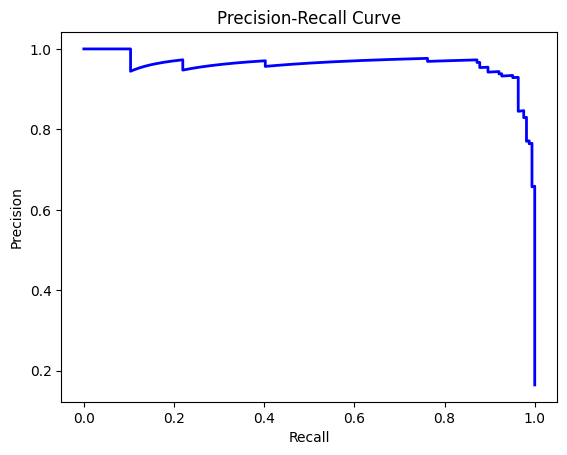

In [473]:
# Plot Precision-Recall curve
from sklearn.metrics import precision_recall_curve
y_pred_proba = final_model.predict_proba(X_test)[:, 1]
precision, recall, _ = precision_recall_curve(y_test, y_pred_proba)
plt.figure()
plt.plot(recall, precision, color='blue', lw=2)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.show()

- Interpretasi:

    - Kurva PR:
        - Kurva dimulai dari titik yang sangat baik dengan precision hampir 1.0 pada recall yang rendah, yang dapat menunjukkan bahwa model mampu mendeteksi konsumen churn secara sangat akurat pada awalnya. Namun, saat recall meningkat (lebih banyak konsumen churn yang terdeteksi), precision mulai menurun. Hal ini menunjukkan bahwa model mulai menghasilkan lebih banyak false positives ketika mencoba meningkatkan recall.
    
    - Trade-off antara precision dan recall:
        - Dalam konteks konsumen churn ini, recall lebih penting karena perusahaan lebih ingin mendekteksi sebanyak mungkin konsumen yang akan churn, meskipun dengan resiko beberapa precision menurun. Kurva tersebut menggambarkan bahwa model mempertahankan precision tinggi (>0.8) hingga recall mendekati 1.0, yang menjadi pertanda baik dalam konteks ini.
    
    - Model secara konsisten menunjukkan precision yang tinggi pada recall yang cukup besar (sekitar 0.8-0.9). Hal ini dapat menunjukkan bahwa model bekerja dengan baik untuk mendeteksi konsumen churn sambil menjaga akurasi.

### **5.4.5 Confusin Matrix & Cost-Saving Simulation**

#### **5.4.5.1 Confusin Matrix**

[Confusion Matrix](https://socs.binus.ac.id/2020/11/01/confusion-matrix/) adalah alat evaluasi yang digunakan untuk menggambarkan kinerja model klasifikasi dengan memberikan informasi rinci tentang hasil prediksi model, seperti: accuracy, precision, recall, dan F1 score. Matriks ini menyajikan jumlah prediksi yang benar dan salah dalam format tabel yang memudahkan analisis, sehingga dapat menunjukkan apakah model cenderung salah dalam memprediksi kelas tertentu guna perbaikan model. Berikut merupakan confusion matrix dari hasil analisa best model:


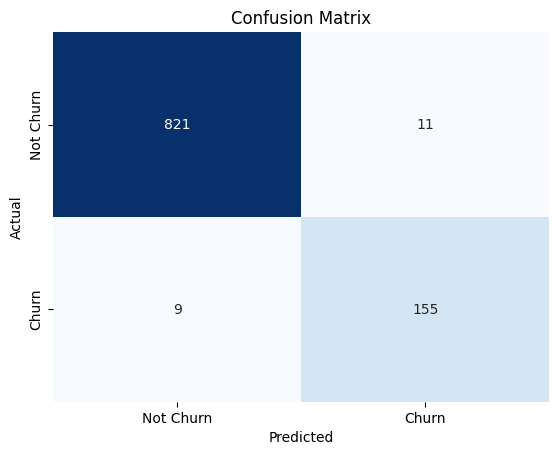

In [475]:
# predict on the test set
y_pred_test = final_model.predict(X_test)

cm = confusion_matrix(y_test, y_pred_test)
ax = plt.subplot()
sns.heatmap(cm, annot=True, fmt='g', ax=ax, cmap='Blues', cbar=False)

ax.set_xlabel('Predicted')
ax.set_ylabel('Actual')
ax.set_title('Confusion Matrix')
ax.set_xticklabels(['Not Churn', 'Churn'])
ax.set_yticklabels(['Not Churn', 'Churn'])
plt.show()

Berdasarkan confusion matrix pada data test menggunakan model LightGBM Classifier, didapatkan confusion matrix dengan keterangan berikut.

**Keterangan: Positive Class == *Churn***

| *Actual* | *Prediction* | *Description* | *Number of Customer* |
| -------- | ------------ | ------------- | -------------------- |
| Churn | Churn | **True Positive**: Customer yang diprediksi *churn* dan benar-benar *churn* | 155 |
| Churn | Not Churn | **False Negative**: Customer yang diprediksi *not churn* tetapi sebenarnya *churn* | 9 |
| Not Churn | Not Churn | **True Negative**: Customer yang diprediksi *not churn* dan benar-benar *not churn* | 821 |
| Not Churn | Churn | **False Positive**: Customer yang diprediksi *churn* tetapi sebenarnya *not churn* | 11 |

- Total *customer* yang diprediksi akan churn: **155 + 11 = 166** orang
- Total *customer* yang diprediksi tidak akan churn: **821 + 9 = 830** orang


#### **5.4.5.2 Cost-Saving Simulation**


Cost-Saving Simulation adalah teknik analisis yang digunakan untuk mengevaluasi potensi penghematan biaya dari keputusan bisnis atau strategi tertentu. Dalam konteks machine learning dan analisis data, simulasi ini sering digunakan untuk memahami dampak dari model prediksi, misalnya dalam pengurangan churn atau peningkatan efisiensi operasional. Berikut merupakan analisa cost-saving berdasarkan hasil Confusion Matrix diatas

- **Cost Estimation using Machine Learning**

    Berdasarkan asumsi yang telah disampaikan pada bagian Business Understanding:

    - *Customer* Acquisition Cost (CAC): $86 per *customer*
    - *Customer* Retention Cost (CRC): $17.2 per *customer*

    Maka dapat diasumsikan dampak biaya ketika perusahaan memanfaatkan machine learning adalah sebagai berikut:

    - Biaya Kesalahan False Negative (FN):
        - FN terjadi ketika model gagal memprediksi churn untuk 9 *customer* yang sebenarnya churn. Biaya untuk *customer* yang tidak terdeteksi ini adalah biaya retensi yang tidak dikeluarkan (karena mereka tidak diprediksi churn) sehingga dibutuhkan biaya akuisisi untuk *customer* baru.
        - Biaya akuisisi *customer*: $86 per *customer*.
        - **Total biaya FN**: $86 * 9 = **$774**.

    - Biaya Kesalahan False Positive (FP):
        - FP terjadi ketika model salah memprediksi churn untuk 11 *customer* yang sebenarnya tidak churn. Biaya yang dikeluarkan adalah biaya retensi yang tidak perlu dikeluarkan karena *customer* ini sebenarnya tidak churn.
        - **Total biaya FP**: $17.2 * 11 = **$189.2**.

    - Biaya Retensi untuk True Positive (TP):
        - TP adalah *customer* yang benar-benar churn dan diprediksi dengan benar untuk churn. Biaya retensi yang dihabiskan pada *customer* ini dianggap efektif.
        - **Total biaya TP**: $17.2 * 155 = **$2666**.

    - Biaya Retensi True Negative (TN):
        - TN adalah *customer* yang tidak churn dan diprediksi dengan benar untuk tidak churn,diberikan perlakuan khusus agar *customer* tetap menggunakan produk kita.
        - **Total biaya TN**: $17.2 * 821 = **$14121.2**

    Kesimpulan: **Total Biaya Keseluruhan**: $774 (FN) + $189.2 (FP) + $2666 (TP) = **$17,750.4**.

- **Cost Estimation without Machine Learning**

    Dalam skenario ini, perusahaan tidak menggunakan model machine learning untuk memprediksi churn, sehingga **semua customer dianggap sama** dan pendekatan retensi serta akuisisi bersifat umum, tanpa adanya strategi khusus berdasarkan prediksi. Semua customer yang churn tidak akan terdeteksi sebelumnya. Perusahaan <u>harus mengeluarkan biaya akuisisi kembali untuk setiap customer yang hilang (churn) dan biaya retensi yang tidak ditargetkan</u>.

    Jumlah Total Customer: 996 (seperti dalam data prediksi)

    Menghitung Biaya:
    - Biaya Kehilangan Customer (Churn) Tanpa Prediksi:
        - Customer yang sebenarnya churn: 166 (TP + FN dari model).
        - Total biaya untuk setiap customer yang churn: $86 (CAC)
        - **Total biaya churn tanpa prediksi**: $86 * 166 = **$14276**.

    - Biaya Retensi yang Tidak Efektif (Tanpa Prediksi):

        Semua customer akan mendapatkan perlakuan retensi umum tanpa prediksi, maka biaya ini **lebih tinggi karena tidak efisien**. Misalkan perusahaan melakukan retensi pada seluruh customer (996 customer), tanpa memprediksi siapa yang akan churn:
        - Biaya retensi per customer: $17.2
        - **Total biaya retensi** tanpa prediksi: $17.2 * 996 = **$17131.2**.
    
    Total Biaya Tanpa Prediksi:

    **Biaya Total = Biaya Kehilangan + Biaya Retensi**

    **Total biaya tanpa prediksi**: $14276 (churn) + $17131.2 (retensi) = **$31407.2**

- **Saving Analysis**
  
    Berikut merupakan perbandingan dari biaya yang perusahaan keluarkan untuk menangani *customer* churn:
        
    - Tanpa Prediksi Machine Learning: **$31,407.2**.
    - Dengan Prediksi Machine Learning: **$17,750.4**.

    Maka, menggunakan prediksi machine learning untuk memprediksi churn dan mengarahkan upaya retensi dapat **menghemat perusahaan sekitar $13,656.8** atau **43.5%** dibandingkan dengan tidak menggunakan prediksi sama sekali. Ini menunjukkan bahwa model machine learning tidak hanya membantu dalam mengidentifikasi pelanggan yang akan churn tetapi juga **secara signifikan mengurangi biaya retensi dan akuisisi customer, meningkatkan efisiensi biaya dan efektivitas strategi pemasaran perusahaan**.

### **5.4.6 Predict Probability VS Actual** 

Predict Probability VS Actual berguna untuk mengevaluasi seberapa baik model memprediksi churn pada berbagai rentang probabilitas. Semakin tinggi nilai actual probability dan predicted probabitily, semakin baik kemampuan model dalam mendeteksi konsumen yang akan churn. Berikut merupakan perbandingan antara predicted probabitily dan actual probability:

| **Aspek**| **Predict Probability** | **Actual Probability**  |
|------|----|--------|
| **Definisi** | Estimasi yang dihasilkan oleh model mengenai kemungkinan konsumen untuk churn.| Proporsi nyata konsumen yang benar-benar churn berdasarkan historical data. |
| **Fungsi**  | Mengidentifikasi konsumen yang beresiko tinggi untuk churn sbegai langkah pencegahan. | Menilai efektivitas model dalam mendeteksi churn dan evaluasi kinerja.|
| **Contoh** | Jika probabilitas churn yang diprediksi adalah 0.85, berarti 85% kemungkinan konsumen akan churn. | Jika dari 100 konsumen, 70 churn, maka probabilitas aktualnya adalah 0.70 |
| **Analisis**| Ketidaksesuaian antara probabilitas prediksi dan aktual dapat menunjukkan masalah dalam model. Misalnya, jika model memprediksi banyak konsumen churn tetapi tidak banyak yang benar-benar churn, model mungkin terlalu sensitif.  | Sebaliknya, jika probabilitas aktual jauh lebih tinggi daripada yang diprediksi, model mungkin gagal menangkap faktor-faktor penting yang menyebabkan churn.|

In [476]:
y_proba = final_model.predict_proba(X_test)[:,1]

df_proba = pd.DataFrame(y_test)
df_proba['probability'] = y_proba

def probability_range(x):
    if x < 0.1:
        probability_range = '0.0 - 0.1'
    elif 0.1 <= x < 0.2:
        probability_range = '0.1 - 0.2'
    elif 0.2 <= x < 0.3:
        probability_range = '0.2 - 0.3'
    elif 0.3 <= x < 0.4:
        probability_range = '0.3 - 0.4'
    elif 0.4 <= x < 0.5:
        probability_range = '0.4 - 0.5'
    elif 0.5 <= x < 0.6:
        probability_range = '0.5 - 0.6'
    elif 0.6 <= x < 0.7:
        probability_range = '0.6 - 0.7'
    elif 0.7 <= x < 0.8:
        probability_range = '0.7 - 0.8'
    elif 0.8 <= x < 0.9:
        probability_range = '0.8 - 0.9'
    else:
        probability_range = '0.9 - 1.0'
        
    return probability_range

df_proba.insert(1, 'probability range',value ='')

df_proba['probability range'] = df_proba['probability'].apply(probability_range)

In [486]:
df_probability = df_proba.groupby(['probability range', 'Churn']).size().unstack(fill_value=0).reset_index()
df_probability['total'] = df_probability[1] + df_probability[0]
df_probability['actual probability'] = df_probability[1] / df_probability['total']
df_probability['actual probability'].fillna(0, inplace=True)
df_probability['actual probability'] = df_probability['actual probability'].round(2)
df_probability['predicted probability'] = df_proba.groupby(['probability range'])['probability'].mean().values.round(2)
df_probability = df_probability.sort_values(by='probability range', ascending=False)
df_probability = df_probability.rename(columns={0: 'no', 1: 'yes'})

df_probability

Churn probability range   no  yes  total  actual probability  \
9             0.9 - 1.0    4  129    133                0.97   
8             0.8 - 0.9    0   13     13                1.00   
7             0.7 - 0.8    4    5      9                0.56   
6             0.6 - 0.7    1    4      5                0.80   
5             0.5 - 0.6    2    4      6                0.67   
4             0.4 - 0.5    1    2      3                0.67   
3             0.3 - 0.4    6    1      7                0.14   
2             0.2 - 0.3   11    0     11                0.00   
1             0.1 - 0.2   21    4     25                0.16   
0             0.0 - 0.1  782    2    784                0.00   

Churn  predicted probability  
9                       0.98  
8                       0.88  
7                       0.75  
6                       0.65  
5                       0.56  
4                       0.44  
3                       0.34  
2                       0.23  
1                       0.14  
0                       0.01

- Interpretasi:

    - Berikut merupakan keterangan kolom pada tabel:
        - Churn: merupakan urutan rentang probabilitas (dari tertinggi ke terendah).
        - probability range: rentang nilai probabilitas yang diprediksi, menunjukkan kemungkinan seorang konsumen untuk churn.
        - no: jumlah konsumen yang diprediksi tidak churn dalam rentang probabilitas tersebut.
        - yes: jumlah konsumen yang diprediksi churn dalam rentang probabilitas tersebut.
        - total: total konsumen dalam rentang probabilitas (yes dan no)
        - actual probability: proporsi konsumen yang benar-benar churn dalam rentang probabilitas, dihitung dengan cara jumlah konsumen yang churn (pada kolom yes) dibagi total konsumen.
        - predicted probability: rata-rata probabilitas yang diprediksi oleh model untuk setiap rentang probabilitas.

    - Berdasarkan hasil tabel diatas, maka dapat dikatakan bahwa:

        - Rentang probabilitas 0.9-1.0:
            - Terdapat 129 konsumen yang diprediksi churn dan 4 konsumen yang diprediksi tidak churn, sehingga total konsumen dalam rentang ini adalah 133. Berdasarkan hal tersebut, maka terdapat 97% konsumen yang benar-benar churn dan model memprediksi dengan akurasi 98%. Hal ini menunjukkan bahwa model ini sangat akurat dalam rentang probabilitas tinggi.

        - Rentang probabilitas 0.0-0.1:
            - Terdapat 782 konsumen yang diprediksi churn dan 2 konsumen yang diprediksi tidak churn, sehingga total konsumen dalam rentang ini adalah 784. Berdasarkan hal tersebut, maka terdapat 0% konsumen yang benar-benar churn dan model memprediksi dengan akurasi 18%. Hal ini menunjukkan bahwa model juga sangat andal dalam mengidentifikasi kasus non-churn di probabilitas rendah.

        - Rentang 0.5-0.6 menunjukkan peforma yang baik, sedangkan 04-0.5 dan 0.3-0.4 menunjukkan terdapat mesalah dalam deteksi churn.
        - Rentang 0.2-0.3 menunjukkan model kesulitan mengidentisikasi churn, mungkin karena tidak ada konsumen yang dikategorikan sebagai 'yes'. Hal ini menandakan model mungkin terlalu konservatif dan tidak menangkap pola yang ada, sehingga perlu dilakukan perbaikan, seperti meninjau fitur yang digunakan untuk meningkatkan akurasi prediksi pada rentang ini.

    - Berdasarkan analisis, diperlukan langkah-langkah untuk mengingkatkan model prediksi churn, terutama untuk rentang probabilitas 0.4-0.5 dan 0.3-0.4, dimana sensitivitas deteksi perlu disesuaikan. Hal ini dapat dilakukan dengan menambahkan fitur baru ataupun menerapkan eksperimen pada feature engineering. Selain itu perusahaan sebaiknya segera mengidentikasi dan menawarkan promosi atau intervensi untuk pencegahan churn.

    - Perusahaan dapat melakukan pendekatan proaktif untuk konsumen dengan probabilitas tinggi, terutama pada rentang 0.9-1.0, karena model memprediksi konsumen tersebut hampir pasti akan churn. Perusahaan dapat merancang program-program retensi yang menarik, serta melakukan evaluasi berkala terhadap model untuk menjaga kinerja tetap optimal.

    - Jika perusahaan memiliki dana terbatas untuk pencegahan churn, maka prioritas harus diberikan kepada konsumen dalam rentang probabilitas 0.9-1.0 dan 0.8-0.9. Pada rentang 0.9-1.0, model memprediksi 97% konsumen disini akan churn. Mengingat probabilitas tinggi tersebut, langkah intervensi yang tepat dapat mencegah kehilangan banyak konsumen. Sementara itu, pada rentang 0.8-0.9, meskipun model menunjukkan bahwa semua konsumen pada rentang ini akan churn, tindakan pencegahan yang terarah pada segmen ini dapat membantu mempertahankan mereka. Dengan probabilitas aktual mencapai 100%, segmen ini sangat penting untuk segera ditangani.

### **5.4.7 Calibration Plot**

Calibration plot digunakan untuk mengevaluasi peforma model prediktif dalam kasus churn pada e-commerce dengan cara membandingkan probabilitas yang diprediksi oleh model dengan probabilitas aktual yang terjadi dalam data secara visual.

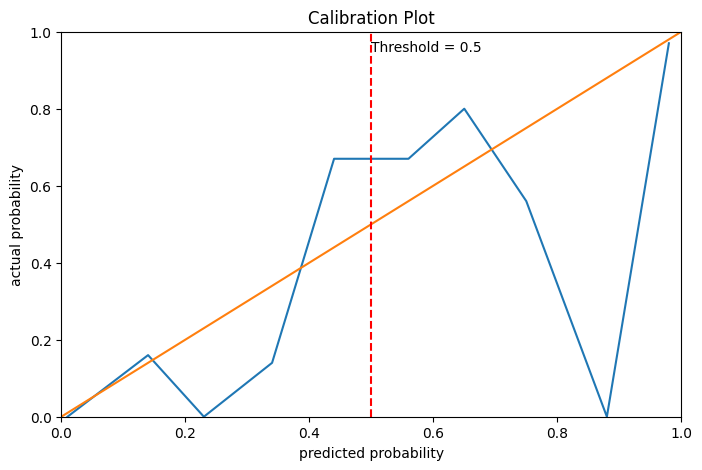

In [488]:
plt.figure(figsize=(8,5))
sns.lineplot(data=df_probability.sort_values(by='probability range', ascending=True), x='predicted probability', y='actual probability')
value = [x/100 for x in range(0,110,10)]
sns.lineplot(x=value, y=value)
plt.xlim(0,1)
plt.ylim(0,1)
plt.axvline(0.5, color='r', linestyle='--')
plt.annotate('Threshold = 0.5', (0.5,0.95))
plt.title('Calibration Plot')
plt.show()

- Interpretasi: 

    - Keterangan calibration plot:
        - Garis oranye adalah garis referensi ideal, dimana probabilitas prediksi model (sumbu-x) sepenuhnya sesuai dengan probabilitas aktual (sumbu-y). Artinya, jika semua titik berada di garis ini, model prediksi sangat baik karena probabilitas prediksi sama dengan hasil aktual.
        
        - Garis biru mewakili peforma model, dimana menunjukkan seberapa baik model dalam mencocokkan prediksi dengan aktual. Jika garis biru sangat dekat dengan garis oranye, model dianggap terkalibrasi dengan baik.
        
        - Garis vertikal (0.5), menunjukkan threshold yang cenderung digunakan pada klasifikasi biner, dimana prediksi probabilitas lebih besar dari 0.5 diklasifikasikan sebagai churn, sedangkan yang lebih rendah diklasifikasikan sebagai tidak churn.
    
    - Berdasarkan calibration plot, terlihat bahwa model memiliki variasi kalibrasi yang cukup baik di beberapa rentang probabilitas, tetapi terdapat ketidaksesuaian di beberapa titik yang menunjukkan area dimana model dapat memprediksi dengan lebih akurat. Pada probabilitas prediksi dibawah 0.5, model cenderung underpredict (probabilitas aktual lebih besar dari yang diprediksi). Sebaliknya, untuk probabilitas di atas 0,5 model kadang overpredict (prediksi terlalu tinggi dibandingkan dengan aktual).

    - Saran untuk model selanjutnya:

        - Model ini bisa ditingkatkan dengan teknik kalibrasi seperti Platt Scaling atau Isotonic Regression untuk memperbaiki kesalahan prediksi di berbagai tingkat probabilitas.

        - Mengeksplorasi penyesuaian threshold agar lebih sesuai dengan distribusi data dan performa model.

### **5.4.8 Feature Importance**

Analisis feature importance adalah metode yang digunakan untuk mengidentifikasi dan mengukur konstribusi setiap fitur dalam model. Dalam machine learning, analisa ini sangat penting untuk pengambilan keputusan berbasis data, sehingga dapat dilakukan optimasi model dan merancang strategi bisnis dengan lebih efektif.

In [489]:
final_model[3].transformers_[1][2]

onehot_features = list(final_model[3].transformers_[0][1].get_feature_names_out())
remainder_features = list(X.columns[final_model[3].transformers_[1][2]])

feature_names = onehot_features + remainder_features

In [490]:
df_coef = pd.DataFrame({
    "feature" : feature_names, 
    "importances" : final_model['model'].feature_importances_
}).sort_values(by='importances', ascending=False)

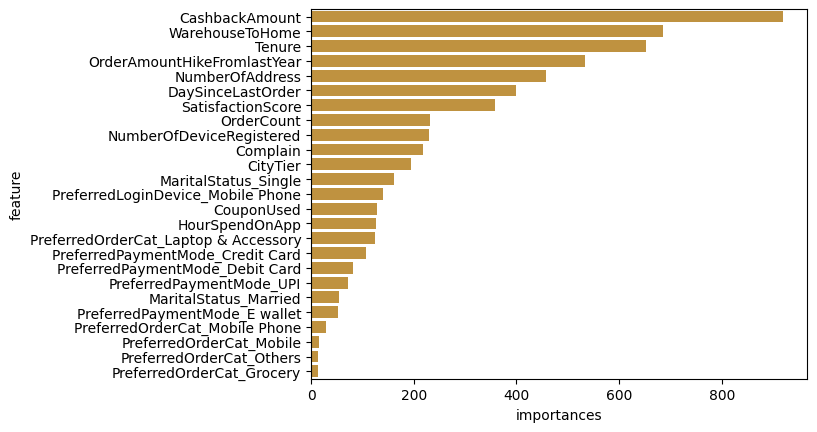

In [491]:
sns.barplot(data=df_coef, x='importances', y='feature', color='orange', saturation=0.5)
plt.show()

- Interpretasi:

    - Berdasarkan barplot feature importances diatas, didapatkan bahwa `CashbackAmount`, `WarehouseToHome`, `Tenure`, `OrderAmountHikeFromlastYeat`, dan `NumberofAdress` merupakan lima fitur yang paling penting dalam memprediksi konsumen churn. 
    
    - Berdasarkan analisa data statistik maka fitur-fitur tersebut dapat diinterpretasikan sebagai berikut:
        - `CashbackAmount`: fitur ini menunjukkan bahwa konsumen churn biasanya menerima cashback yang lebih rendah dibandingkan dengan yang tidak churn. Hal ini dapat menyebabkan ketidakpuasan dan berkurangnya insentif untuk bertransaksi. Perusahaan sebaiknya memanfaatkan data cashback untuk memberikan penawaran yang lebih menarik bagi konsumen yang berisiko churn. Misalnya, meningkatkan cashback untuk pelanggan yang menunjukkan tanda-tanda churn dapat meningkatkan retensi.

        - `WarehouseToHome`: jarak antara gudang dan lokasi konsumen berpotensi mempengaruhi pengalaman pengiriman. Konsumen yang tinggal jauh dari gudang mungkin mengalami keterlambatan pengiriman atau masalah kualitas produk, yang dapat memicu churn. Mengingat dampak WarehouseToHome, perusahaan dapat menawarkan diskon pada ongkos kirim untuk konsumen yang tinggal jauh dari gudang. Ini dapat memperbaiki pengalaman pengiriman dan mengurangi risiko churn.

        - `Tenure`: durasi keanggotaan konsumen berhubungan erat dengan loyalitas. Konsumen baru cenderung lebih rentan terhadap churn, yang menunjukkan perlunya perhatian khusus pada mereka. Mengingat bahwa konsumen dengan Tenure yang lebih pendek lebih rentan, perusahaan harus mengembangkan program retensi yang ditargetkan untuk pelanggan baru. Ini bisa berupa pengantar yang lebih baik, edukasi mengenai produk, dan insentif khusus selama periode awal penggunaan.

        - `OrderAmountHikeFromLastYear`: meskipun tidak menunjukkan pola yang jelas, fitur ini masih bisa memberikan insight untuk memahami perubahan perilaku belanja. 

        - `NumberofAddress`: variasi dalam jumlah alamat dapat mempengaruhi kemudahan penggunaan aplikasi, dengan lebih banyak alamat berpotensi membuat pengelolaan menjadi sulit. Untuk konsumen dengan banyak alamat, perusahaan harus mempertimbangkan fitur yang mempermudah pengelolaan alamat dalam aplikasi. Menyediakan panduan atau alat untuk mengatur alamat bisa membantu mengurangi kebingungan dan meningkatkan pengalaman pengguna.
    
    - Berdasarkan hal-hal di atas, perusahaan harus terus melakukan evaluasi terhadap fitur-fitur ini dan dampaknya terhadap churn. Perusahaan dapat mengumpulkan feedback dari konsumen guna mendapatkan informasi untuk optimalisasi.

### **5.4.9 Shapley Value of Explanations (SHAP)**

Shapley Value of Explanations (SHAP) adalah metode untuk memahami kontribusi setiap fitur dalam model machine learning terhadap prediksi yang dihasilkan. Dalam konteks machine learning, SHAP memberikan cara untuk menilai seberapa besar pengaruh setiap fitur terhadap keputusan model.

In [492]:
# Model
final_model[-1]

LGBMClassifier(feature_selection=None, max_depth=-5, n_estimators=200,
               random_state=42, subsample=0.4, verbose=0)

In [493]:
# membuat feature yang telah di preprocessing
X_train_processed = final_model[0:-2].fit_transform(X_train)
X_train_resampled, y_train_resampled = final_model[-2].fit_resample(X_train_processed, y_train)

100%|===================| 6637/6656 [01:01<00:00]        

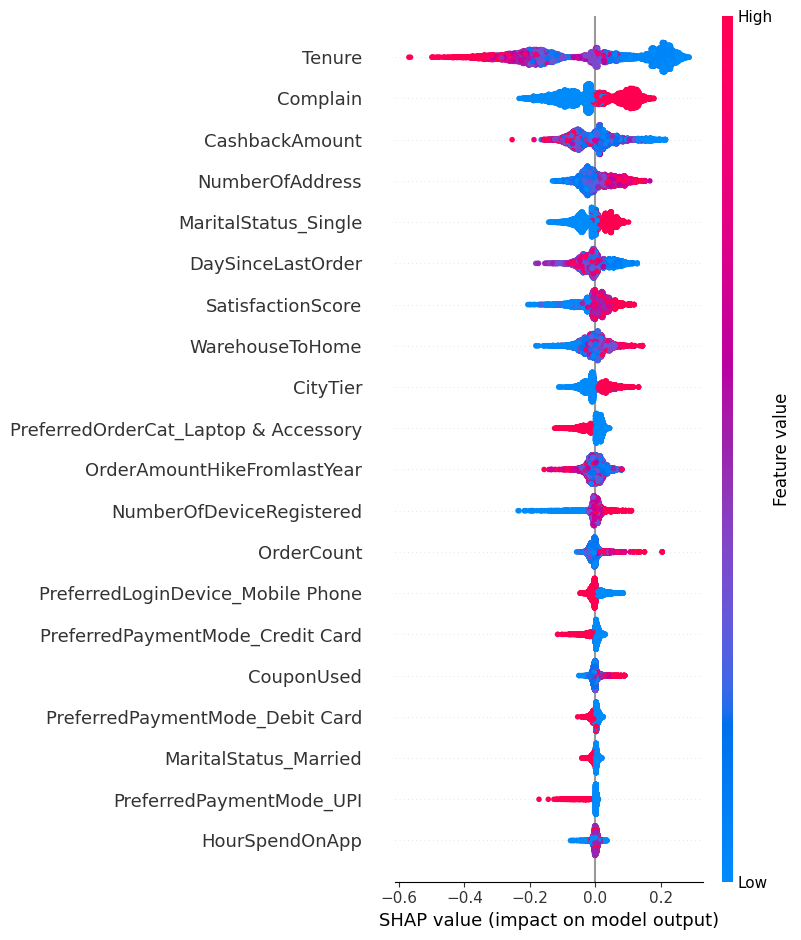

In [494]:
import shap

shap_values = shap.TreeExplainer(final_model[-1],
                                 data = X_train_resampled,
                                 feature_perturbation = "interventional",
                                 model_output="probability").shap_values(X_train_resampled)
                                 
shap.summary_plot(shap_values, X_train_resampled,feature_names = feature_names)

- Interpretasi:

    - Berikut merupakan beberapa interpretasi feature importance berdasarkan SHAP Values:
        - `Tenure`: konsumen dengan tenure rendah (warna biru), memiliki kecenderungan lebih tinggi untuk churn, sementara konsumen dengan tenure tinggi (warna merah cenderung bertahan)
        - `Complain`: konsumen yang complain (warna merah), memiliki SHAP value yang positif, yang artinya konsumen tersebut cenderung lebih mungkin churn.
        - `CashbackAmount`: pemberian cashback yang lebih tinggi (warna merah) tampaknya menurunkan probabilitas churn, yang menunjukkan bahwa konsumen yang mendapatkan lebih banyak cashback cenderung bertahan.
        - `NumberOfAdress`: konsumen dengan jumlah alat yang lebih banyak cenderung mengarah ke churn, hal ini mungkin karena adanya faktor ketidakstabilan.
        - `SatisfactionScore`: nilai kepuasan yang rendah (warna biru) sangat berkorelasi dengan churn berdasarkan SHAP, sementara nilai kepuasan yang tinggi mengurangi kecenderungan untuk churn.
        - `PreferredOrderCat_Laptop & Accessory`: konsumen dengan preferensi kategori belanja laptop & accessory (warna biru) memiliki kecenderungan untuk tidak churn.
    

    - Berdasarkan SHAP value, maka perusahaan dapat lebih fokus kepada konsumen-konsumen dengan kategori sebagai berikut:

        - Perusahaan dapat fokus pada konsumen dengan tenure rendah, dengan menawarkan program-program eksklusif untuk membantu konsumen baru ini merasa lebih nyaman dengan platform perusahaan
        
        - Karena konsumen yang mengajukan komplain lebih cenderung churn, penting untuk memperbaiki proses penyelesaian komplain agar mereka lebih puas dan tidak churn.
        - Cashback menjadi pendorong yang signifikan untuk retensi konsumen, sehingga peningkatan cashback atau program promosi lainnya mungkin dapat mengurangi churn.

        - Perusahaan dapat mempertimbangkan fitur yang mempermudah pengelolaan alamat dalam aplikasi untuk mempermudah konsumen dengan jumlah alamat yang banyak.   
        - Perusahaan dapat melakukan survei rutin untuk memahami kepuasan konsumen dan mungkin dapat membuat program promosi guna mendapatkan feedback dari konsumen.
        - Perusahaan dapat melakukan analisis SHAP secara rutin untuk memantau faktor-faktor yang mempengaruhi churn dan menyesuaikan strategi perusahaan untuk retensi konsumen.

### **5.4.10 SHAP Force Plot**

SHAP force plot memvisualisasikan bagaimana setiap fitur berkontribusi untuk meningkatkan atau menurunkan kemungkinan churn secara personal (1 konsumen dalam data), dengan nilai total prediksi berada di tengah.

In [495]:
# Start js (must have)
shap.initjs()

In [496]:
def shap_plot(j,model,S):
    explainerModel = shap.TreeExplainer(model)
    shap_values_Model = explainerModel.shap_values(S)
    p = shap.force_plot(explainerModel.expected_value, shap_values_Model[j], S.iloc[[j]])
    return(p)

In [497]:
# membuat dataframe X_test yang telah di preprocessing
X_test_processed = final_model[0:-2].fit_transform(X_test)
X_test_processed_df = pd.DataFrame(X_test_processed, columns=feature_names)

In [498]:
# compare with the real result
print(f"The prediction must predict this passenger is: {('Churn' if y_test.iloc[746] == 1 else 'Not Churn')} from y_test")

shap_plot(0,final_model[-1],X_test_processed_df)

The prediction must predict this passenger is: Churn from y_test


In [499]:
y_test.iloc[746]

1

- Interpretasi:

    - Pada force plot ini, ada dua arah:
        - Fitur merah berkontribusi meningkatkan prediksi churn.
        - Fitur biru berkontribusi menurunkan prediksi churn.
        
    - Nilai f(x)=-5.67 adalah prediksi akhir model untuk salah satu konsumen dalam data. Angka negatif menunjukkan bahwa model memprediksi kemungkinan rendah konsumen ini akan churn.

        - `MaritalStatus_Single`=1: status pernikahan single berkontribusi kuat pada peningkatan kemungkinan churn. Hal ini mungkin karena konsumen yang belum menikah memiliki perilaku yang berbeda dalam berlangganan layanan atau e-commerce.

        - `DaySinceLastOrder`=1: pada data ini, konsumen dengan waktu pesanan terakhirnya 1 hari, bisa jadi rentan untuk churn.
        - `Tenure`=11: tenur yang panjang mengurangi kemungkinan churn, karena konsumen yang sudah lama menggunakan layanan cenderung lebih loyal.
        - `NumberOfDeviceRegistered`=2: jumlah perangkat yang terdaftar cukup tinggi, yang mungkin menunjukkan bahwa konsumen ini memiliki keterikatan yang lebih kuat dengan layanan.
        - `SatisfactionScore`=1: nilai kepuasan yang rendah, meskipun negatif, berkontribusi kecil dalam mengurangi churn. Ini bisa jadi indikator anomali, atau kemungkinan konsumen sudah cukup puas untuk tetap tinggal.
        - `CashbackAmount`=171.8: jumlah cashback yang diberikan cukup besar, secara signifikan mengurangi kemungkinan churn.
        - `Complain`=0: tidak adanya keluhan dari konsumen mengurangi kemungkinan churn. Ini menunjukkan bahwa konsumen yang tidak mengajukan komplain lebih cenderung bertahan.
        - `CityTier`=1: tier kota tempat konsumen berada (mungkin kelas ekonomi atau urbanisasi) juga berkontribusi pada retensi, tetapi dengan dampak kecil.
        - `OrderCount`=2: jumlah pesanan yang dilakukan (2 kali) pada konsumen ini mengurangi risiko churn.

### **5.4.11 Local Interpretable Model-Agnostic Explaination (LIME)**

Lime akan memberikan informasi mengenai faktor-faktor yang paling mempengaruhi keputusan model untuk memprediksi churn secara personal dalam data.

In [500]:
import lime
from lime import lime_tabular
# Explainer based
explainer = lime_tabular.LimeTabularExplainer(
    training_data=np.array(X_train_resampled),
    feature_names=feature_names,
    class_names=['Not Churn', 'Churn'],
    mode='classification')

#### **5.4.11.1 Explain Feature based on Pyplot**

The prediction must predict this passenger is: Not Churn from y_test


''

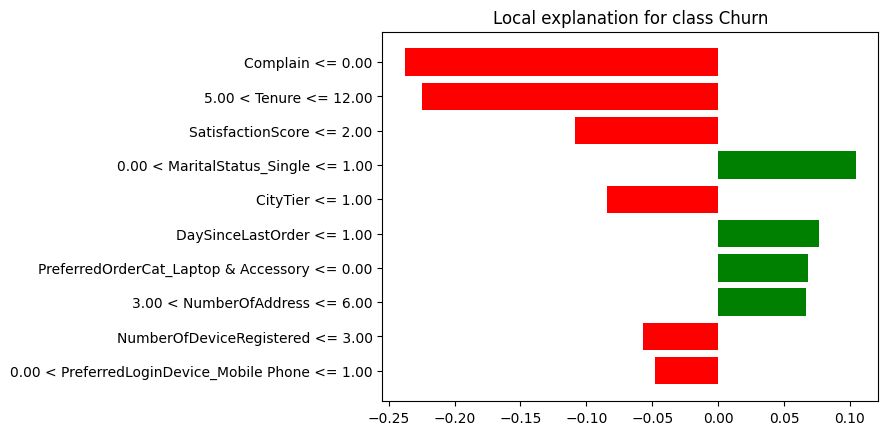

In [501]:
# Try to the observation 0
# Lets compare with the real result
print(f"The prediction must predict this passenger is: {('Churn' if y_test.iloc[0] == 1 else 'Not Churn')} from y_test")

exp = explainer.explain_instance(X_test_processed_df.iloc[0], 
                                 final_model[-1].predict_proba, 
                                 num_features=10)
exp.as_pyplot_figure()
;

- Interpretasi:

    - Tenure  antara 5 dan 12 bulan: nilai negatif yang signifikan, berarti konsumen yang memiliki tenure antara 5 hingga 12 bulan lebih cenderung untuk churn. Ini mungkin karena Konsumen dalam fase ini merasa kurang terikat atau sudah merasa tidak puas dengan layanan.

    - Complain <= 0.00: konsumen yang tidak pernah mengajukan keluhan lebih cenderung churn. Hal ini mungkin disebabkan karena mereka memilih untuk langsung meninggalkan platform tanpa memberikan masukan terkait masalah yang mereka hadapi.

    - SatisfactionScore <= 2.00: skor kepuasan yang rendah secara signifikan meningkatkan kemungkinan churn. Jika konsumen merasa tidak puas dengan pengalaman mereka, mereka lebih mungkin untuk beralih ke platform lain.

    - MaritalStatus_Single: konsumen dengan status single lebih cenderung untuk churn. Mungkin, mereka memiliki preferensi yang berbeda atau kebutuhan yang kurang kompleks dibandingkan kelompok lain.

    - NumberofDevicesRegistered <= 3.00: konsumen yang mendaftarkan lebih sedikit perangkat (<= 3) lebih mungkin churn. Ini bisa menjadi indikator rendahnya keterikatan atau frekuensi penggunaan layanan.

    - NumberofAddresses antara 3 dan 6: nilai negatif mengindikasikan Konsumen yang memiliki beberapa alamat mungkin lebih loyal, namun rentan terhadap churn pada jumlah alamat tertentu. Ini bisa menunjukkan tingkat mobilitas atau preferensi belanja Konsumen.

    - CityTier <= 1.00: konsumen di kota tingkat 1 (kota besar) cenderung lebih setia, mungkin karena akses ke layanan yang lebih baik atau pengalaman pengguna yang lebih optimal di wilayah mereka.

    - DaySinceLastOrder <= 1.00: jika Konsumen baru saja melakukan pesanan, mereka cenderung tidak churn. Ini menunjukkan bahwa frekuensi pembelian yang tinggi bisa menjadi indikator loyalitas.

    - PreferredLoginDevice_Mobile Phone: konsumen yang sering menggunakan ponsel sebagai perangkat masuk mungkin lebih loyal atau terbiasa dengan platform, sehingga cenderung tidak churn.

    - PreferredOrderCategory_Laptop & Accessory: konsumen yang sering membeli kategori produk ini juga menunjukkan kecenderungan untuk loyalitas yang lebih tinggi.

#### **5.4.11.2 Explain Feature based on Show in Notebook**

In [502]:
# Lets compare with the real result
print(f"The prediction must predict this passenger is: {('Churn' if y_test.iloc[0] == 1 else 'Not Churn')} from y_test")

exp = explainer.explain_instance(
    data_row=X_test_processed_df.iloc[0], 
    predict_fn=final_model[-1].predict_proba
)

exp.show_in_notebook(show_table=True)

The prediction must predict this passenger is: Not Churn from y_test


- Interpretasi :

    - Fitur yang mendukung not churn:
        - Tenure (11 bulan): tenure yang lebih dari 5 bulan (di bawah 12 bulan) secara positif memengaruhi konsumen untuk tidak churn. Hal ini menunjukkan bahwa konsumen ini sudah cukup lama menggunakan layanan dan lebih cenderung tetap loyal.
        - Complain (0): tidak ada keluhan yang diajukan oleh konsumen, dan ini cenderung menunjukkan bahwa konsumen puas dengan layanan dan akan tetap menggunakan platform.
        - Satisfaction Score (1): skor kepuasan yang sangat rendah biasanya menjadi sinyal churn, tetapi dalam konteks ini, efeknya mungkin tidak terlalu besar dibandingkan faktor lain.
        - City Tier (1): konsumen dari kota tingkat 1 (kota besar) biasanya cenderung lebih loyal, mungkin karena mereka memiliki akses yang lebih baik atau lebih sering menggunakan platform.
        - Number of Device Registered (2 perangkat): pengguna yang telah mendaftarkan lebih dari satu perangkat lebih mungkin untuk tetap menggunakan layanan. Ini bisa menjadi tanda bahwa konsumen sering mengakses platform melalui beberapa perangkat.

    - Fitur yang mendukung churn:
        - Marital Status Single (1): konsumen dengan status pernikahan lajang lebih cenderung churn. Dalam e-commerce, status ini mungkin berhubungan dengan preferensi belanja yang berbeda, misalnya konsumen yang lajang mungkin lebih sensitif terhadap harga atau lebih mudah beralih platform.
        - Number of Address (5 alamat): jumlah alamat yang terdaftar cukup banyak (antara 3-6 alamat) mungkin mengindikasikan mobilitas yang lebih tinggi, yang bisa membuat konsumen lebih mudah berpindah platform atau berhenti menggunakan layanan.
        - Day Since Last Order (1 hari): konsumen ini baru saja melakukan pemesanan terakhirnya sehari yang lalu, yang berarti masih terlibat secara aktif, meskipun fitur ini memiliki kontribusi kecil dalam mendukung churn.
        - Preferred Order Category_Laptop & Accessory (0): konsumen tidak melakukan banyak pembelian di kategori laptop dan aksesori, yang mungkin berhubungan dengan rendahnya keterlibatan atau preferensi produk tertentu.
        - Preferred Payment Mode_UPI (0): tidak menggunakan UPI sebagai metode pembayaran bisa menjadi faktor yang sedikit mendukung churn, meskipun pengaruhnya relatif kecil.

    - Berdasarkan hal tersebut, maka konsumen dapat diindikasikan sebagai berikut:
        - Konsumen ini cenderung tetap loyal, dan beberapa indikator utama adalah lamanya konsumen berlangganan, tidak adanya keluhan, dan banyaknya perangkat yang terdaftar. Hal ini menunjukkan bahwa mereka adalah pengguna yang sudah terbiasa dengan layanan e-commerce dan mungkin telah mengalami pengalaman yang memuaskan secara umum.

        - Namun, ada beberapa indikator risiko churn, seperti status lajang dan jumlah alamat yang terdaftar. Meski kontribusinya lebih kecil, jika kondisi eksternal berubah (misalnya ketidakpuasan dengan layanan atau penawaran kompetitor yang lebih baik), konsumen ini bisa saja beralih.

## **5.5 Model Limitation**

Interpretasi di luar rentang data yang digunakan dalam pemodelan dapat mengarah pada kesimpulan yang tidak valid, sehingga diperlukan kehati-hatian. Model ini hanya relevan untuk nilai-nilai dalam rentang data yang telah dianasisi. Berikut adalah rentang untuk setiap fitur berdasarkan hasil deskriptif data:

- `Tenure` antara 0 hingga 31 bulan
- `CityTier` antara Tier 1 hingga Tier 3 
- `WarehouseToHome` antara 5 mil hingga 36 mil
- `HourSpendOnApp` antara 0 hingga 5 jam
- `NumberOfDeviceRegistered` antara 1 hingga 6 perangkat
- `SatisfactionScore` antara skor 1 hingga skor 5 
- `NumberOfAddress` antara 1 hingga 10 alamat
- `OrderAmountHikeFromLastYear` antara 11% hingga 26%
- `CouponUsed` antara 0 hingga 16 kupon
- `OrderCount` antara 1 kali hingga 16 kali order
- `DaySinceLastOrder` antara 0 hingga 31 hari
- `CashbackAmount` antara 0 hingga 324,99 


In [503]:
dfm.describe()

Churn       Tenure     CityTier  WarehouseToHome  HourSpendOnApp  \
count  4979.000000  4749.000000  4979.000000      4758.000000     4749.000000   
mean      0.164491    10.139819     1.661378        15.523960        2.920615   
std       0.370758     8.492590     0.920841         8.320958        0.724332   
min       0.000000     0.000000     1.000000         5.000000        0.000000   
25%       0.000000     2.000000     1.000000         9.000000        2.000000   
50%       0.000000     9.000000     1.000000        13.000000        3.000000   
75%       0.000000    16.000000     3.000000        20.000000        3.000000   
max       1.000000    31.000000     3.000000        36.000000        5.000000   

       NumberOfDeviceRegistered  SatisfactionScore  NumberOfAddress  \
count               4979.000000        4979.000000      4979.000000   
mean                   3.680056           3.029524         4.067082   
std                    1.032354           1.384691         2.400013   
min                    1.000000           1.000000         1.000000   
25%                    3.000000           2.000000         2.000000   
50%                    4.000000           3.000000         3.000000   
75%                    4.000000           4.000000         5.000000   
max                    6.000000           5.000000        10.000000   

          Complain  OrderAmountHikeFromlastYear   CouponUsed   OrderCount  \
count  4979.000000                  4736.000000  4772.000000  4747.000000   
mean      0.282788                    15.710726     1.794426     3.085738   
std       0.450399                     3.691072     1.944812     2.999161   
min       0.000000                    11.000000     0.000000     1.000000   
25%       0.000000                    13.000000     1.000000     1.000000   
50%       0.000000                    15.000000     1.000000     2.000000   
75%       1.000000                    18.000000     2.000000     3.000000   
max       1.000000                    26.000000    16.000000    16.000000   

       DaySinceLastOrder  CashbackAmount  
count        4699.000000     4979.000000  
mean            4.576506      177.237034  
std             3.618200       49.291038  
min             0.000000        0.000000  
25%             2.000000      145.700000  
50%             3.000000      163.470000  
75%             7.000000      197.245000  
max            31.000000      324.990000

In [504]:
dfm.describe(include=object)

PreferredLoginDevice PreferredPaymentMode   PreferredOrderCat  \
count                  4979                 4979                4979   
unique                    2                    5                   6   
top            Mobile Phone           Debit Card  Laptop & Accessory   
freq                   3555                 2052                1816   

       MaritalStatus  
count           4979  
unique             3  
top          Married  
freq            2620

## **5.6 Saving Model**

Dalam proses pengembangan machine learning, menyimpan model yang telh dilatih menjadi langkah penting untuk memastikan bahwa hasil yang diperoleh dapat diakses dan digunakan kembali tanpa harus melalui proses training ulang. Hal ini tidak hanya menghemat waktu, tetapi juga memungkinkan user dapat menjaga integritas model dan mengoptimalkan alur kerja analisis data perusahaan. Penyimpanan model memungkinkan user untuk mengimplementasikan model dalam aplikasi nyata, melakukan prediksi pada data baru, dan berbagi model dengan rekam atau tim lainnya. Pada konteks ini, format penyimpanan yang akan digunakan adalah pickle, dimana pickle menawarkan kemudahan dan efisiensi dalam menyimpan dan memuat model. 

In [505]:
import pickle

# Define final model
final_model_lgbm = final_model

# Fitting model to all data
final_model_lgbm.fit(X, y)

# Save Model
pickle.dump(final_model_lgbm, open('lgbm_for_churn.sav', 'wb'))

#### **Load Model**

In [507]:
loaded_model = pickle.load(open('lgbm_for_churn.sav', "rb"))

#### **Predict to New Dataset**

Pada bagian ini, model yang telah dilatih dan disimpan akan dicoba untuk memprediksi data yang baru. Data baru ini merupakan data dummy yang dibuat secara acak dengan tetap memperhatikan limitasi dari model yang ada. Hasil dari percobaan ini adalah model memprediksi apakah seorang *customer* dengan data tertentu memiliki probabilitas untuk *churn* atau *tidak churn*.

#### **Percobaan 1**

In [508]:
df_test_1 = pd.DataFrame({
    'Tenure':[16], 
    'PreferredLoginDevice':['Mobile Phone'], 
    'CityTier':['2'], 
    'WarehouseToHome':['14'], 
    'PreferredPaymentMode':['UPI'], 
    'HourSpendOnApp':['3'], 
    'NumberOfDeviceRegistered':['3'],
    'PreferredOrderCat':['Grocery'], 
    'SatisfactionScore':['4'], 
    'MaritalStatus':['Single'], 
    'NumberOfAddress':[4], 
    'Complain':[0], 
    'OrderAmountHikeFromlastYear':[13],
    'CouponUsed':[1], 
    'OrderCount':[4], 
    'DaySinceLastOrder':[10], 
    'CashbackAmount':[100]
    })

# print sample data
display(df_test_1)

# predict that data
print("predict proba :",loaded_model.predict_proba(df_test_1))
print("predict class :",loaded_model.predict(df_test_1))

Tenure PreferredLoginDevice CityTier WarehouseToHome PreferredPaymentMode  \
0      16         Mobile Phone        2              14                  UPI   

  HourSpendOnApp NumberOfDeviceRegistered PreferredOrderCat SatisfactionScore  \
0              3                        3           Grocery                 4   

  MaritalStatus  NumberOfAddress  Complain  OrderAmountHikeFromlastYear  \
0        Single                4         0                           13   

   CouponUsed  OrderCount  DaySinceLastOrder  CashbackAmount  
0           1           4                 10             100

predict proba : [[0.9439202 0.0560798]]
predict class : [0]


- Berdasarkan data dummy di atas, terdapat 94.39% probabilitas customer dengan data tersebut untuk *tidak churn*.

#### **Percobaan 2**

In [509]:
df_test_2 = pd.DataFrame({
    'Tenure' : [5], 
    'PreferredLoginDevice' : ['Mobile Phone'], 
    'CityTier' : ['3'], 
    'WarehouseToHome' : ['30'], 
    'PreferredPaymentMode' : ['Cash on Delivery'], 
    'HourSpendOnApp' : ['0'], 
    'NumberOfDeviceRegistered' : ['2'],
    'PreferredOrderCat' : ['Mobile Phone'], 
    'SatisfactionScore' : ['2'], 
    'MaritalStatus' : ['Single'], 
    'NumberOfAddress' : [2], 
    'Complain' : [1], 
    'OrderAmountHikeFromlastYear' : [11],
    'CouponUsed' : [1], 
    'OrderCount' : [4], 
    'DaySinceLastOrder' : [2], 
    'CashbackAmount' : [20]
    })

# print sample data
display(df_test_2)

# predict that data
print("predict proba :",loaded_model.predict_proba(df_test_2))
print("predict class :",loaded_model.predict(df_test_2))

Tenure PreferredLoginDevice CityTier WarehouseToHome PreferredPaymentMode  \
0       5         Mobile Phone        3              30     Cash on Delivery   

  HourSpendOnApp NumberOfDeviceRegistered PreferredOrderCat SatisfactionScore  \
0              0                        2      Mobile Phone                 2   

  MaritalStatus  NumberOfAddress  Complain  OrderAmountHikeFromlastYear  \
0        Single                2         1                           11   

   CouponUsed  OrderCount  DaySinceLastOrder  CashbackAmount  
0           1           4                  2              20

predict proba : [[0.27235552 0.72764448]]
predict class : [1]


- Berdasarkan data dummy di atas, terdapat 72.76% probabilitas customer dengan data tersebut untuk *churn*.

# **BAB 6. KESIMPULAN DAN REKOMENDASI**

Bab ini akan menyajikan ringkasan dari temuan-temuan penting terkait konsumen churn dalam e-commerce, dengan fokus pada kesimpulan dan rekomendasi untuk mengoptimalkan bisnis dan model.

## **6.1 Kesimpulan dan Rekomendasi untuk Bisnis**

- Berdasarkan hasil analisa statistik, maka didapatkan faktor dan saran untuk mengantisipasi konsumen churn, sebagai berikut:


    | Faktor  | Analisis  | Aksi untuk Menghindari/ Mengatasi Churn  | Penanggung Jawab |
    |-----|-----|--------|---|
    | `Complain`| Tingginya churn di kalangan konsumen yang mengajukan komplaib. | Menerapkan sistem respons cepat untuk menangani komplaib dan melakukan follow-up untuk memastikan kepuasan konsumen. | **Manajemen Eksekutif** yang dapat berkolaborasi dengan Tim Customer Service|
    | `MaritalStatus`| Konsumen single memiliki tingkat churn yang lebih tinggi.| Menyusun penawaran dan promosi khusus yang menarik untuk konsumen single. | **Tim Pemasaran** |
    | `PreferredOrderCat`| Tingkat churn yang tinggi pada kategori produk mobile phone. | Meningkatkan kualitas produk dan memberikan jaminan atau garansi untuk meningkatkan kepercayaan konsumen. | **Tim R&D**, **Tim Pemasaran** |
    | `PreferredPaymentMode`| Churn tinggi pada metode pembayaran cash on delivery dan e-wallet.| Meningkatkan keamanan transaksi dan memberikan insentif tambahan untuk penggunaan metode pembayaran tersebut. | **Tim Pemasaran** yang dapat berkolaborasi dengan Tim IT |
    | `PreferredLoginDevice`| Masalah teknis pada pengguna komputer dapat berkontribusi pada churn. | Melakukan perbaikan teknis secara rutin terutama untuk komputer dan menyediakan tutorial penggunaan untuk meningkatkan pengalaman pengguna. | **Tim R&D** yang dapat berkolaborasi dengan Tim IT |
    | `CityTier`| Tier 3 menunjukkan tingkat churn yang lebih tinggi. | Membangun infrastruktur yang lebih baik di tier 3 untuk memastikan layanan yang memadai, termasuk pengiriman yang lebih cepat. | **Manajemen Eksekutif** yang dapat berkolaborasi dengan Tim Operational|
    | `Tenure`| Konsumen baru memiliki tingkat churn yang lebih tinggi.| Menerapkan program onboarding yang menarik dan memberikan penawaran khusus untuk konsumen baru selama periode awal. |**Manajemen Eksekutif** yang dapat berkolaborasi dengan Tim Customer Service |
    | `CashbackAmount`| Cashback yang tidak menarik dapat mempengaruhi loyalitas. | Mengkaji dan meningkatkan program cashback agar lebih kompetitif dan menarik bagi konsumen. | **Tim Pemasaran** dan **Manajemen Eksekutif** |
    | `WarehouseToHome`| Jarak yang lebih jauh dapat menyebabkan waktu pengiriman yang lebih lama. | Mengoptimalkan rute pengiriman dan menambah jumlah gudang di lokasi strategis untuk mempercepat proses pengiriman. | **Manajemen Eksekutif** yang dapat berkolaborasi dengan Tim Logistik|

- Berdasarkan hasil analisa data yang dilakukan, dapat disimpulkan bahwa kemungkinan **definisi churn pada perusahaan ini bukan berdasarkan demografi, preferensi, keterlibatan, aktivitas transaksi, dan kepuasan konsumen**. Namun, demografi, preferensi, keterlibatan, aktivitas transaksi, dan kepuasan konsumen tetap menjadi faktor yang harus diperhatikan untuk mencegah terjadinya konsumen churn. Dengan demikian, definisi churn pada perusahaan mungkin dapat diidentifikai melalui beberapa indikator berikut:

    - **Perubahan status akun**: konsumen dikatakan churn jika konsumen mengubah status akun mereka menjadi 'non-aktif' atau mengajukan permohonan untuk penutupan akun.

    - **Logout dari aplikasi**: konsumen dikatakan churn ketika mereka secara konsisten melakukan logout dari aplikasi, yang artinya menunjukkan penurunan minat untuk berinteraksi

    - **Uninstall aplikasi**:  konsumen dikatakan churn ketika konsumen meng-uninstall aplikasi dari perangkat mereka, yang menandakan bahwa mereka tidak lagi ingin menggunakan layanan. 

    - **Berhenti dari keanggotaan**: jika e-commerce tersebut menerapkan prinsip membership, indikator churn dapat terlihat ketika konsumen menghentikan kenaggotaan mereka.


- **Perusahaan e-commerce saat ini berada pada level 3 dalam maturity level data**. Dengan keinginan untuk menerapkan machine learning, perusahaan memiliki peluang besar untuk melangkah menuju level 4. Berikut adalah beberapa langkah strategis yang dapat diambil untuk meningkatkan maturity level perusahaan ke level yang lebih tinggi:

    - Perusahaan dapat menyelenggarakan pelatihan rutin bagi seluh tim yang berfokus pada analisis data dan machine learning. Selain itu, perusahaan mungkin dapat membentuk tim data scientist yang dapat bertanggung jawab pada machine learning data guna memperkuat kemampuan analitik perusahaan.

    - Perusahaan dapat melakukan pengembangan sistem report yang lebih terintegrasi dengan platform Business Intelligence (BI) yang memungkinkan visualisasi data secara real-time. Hal ini dapat mempermudah pemantauan kinerja dan pengambilan keputusan yang lebih cepat.

    - Perusahaan dapat mengembangkan model machine learning tidak hanya untuk memprediksi konsumen churn, tetapi juga untuk memprediksi tren penjualan, manajemen inventaris, ataupun reaksi konsumen terhadap program promosi perusahaan.

    - Perusahaan dapat menjalin kemitraan dengan perusahaan yang fokus pada pengolahan data untuk mendapatkan informasi yang lebih dalam tentang konsumen. Kerja sama ini akan memperkaya analisis perusahaan untuk mendukung pengambilan keputusan yang lebih baik.

## **6.2 Kesimpulan dan Rekomendasi untuk Model**

- Hasil eksperimen model ditujukan untuk memprediksi apakah seorang *customer* akan melakukan churn atau tidak berdasarkan dari pola-pola yang ada dalam data, dengan rincian model sebagai berikut:

    - Metric utama yang digunakan pada percobaan adalah **F2 Score**. Hal ini mempertimbangkan di mana kesalahan dalam memprediksi *customer tidak churn* yang **aktualnya adalah churn**, dianggap lebih merugikan dibandingkan kesalahan saat memprediksi *customer churn* yang **aktualnya tidak churn**. Sehingga recall dianggap dua kali lebih penting daripada precision.
    - Berdasarkan hasil model benchmarking dan hyperparameter tuning, model **LightGBM** menunjukkan performa yang baik dalam memprediksi *customer churn* di sebuah e-commerce, dengan nilai F2 Score sebelum tuning 0.93 dan **F2 Score seteleh tuning 0.94**. Berikut ini merupakan parameter terbaik hasil hyperparameter tuning yang digunakan dalam pemodelan:

        - feature selection = None
        - learning rate = 0.1
        - max child samples = 20
        - n estimators = 200
        - num leaves = 31
        - subsample = 0.4
        - resampler = RandomOverSampler()
        - missing value handling = Median

    - Berdasarkan model **LightGBM**, fitur `CashbackAmount`, `WarehouseToHome`, `Tenure`, `OrderAmountHikeFromlastYear`, dan `NumberofAdress` merupakan lima fitur yang paling penting dalam memprediksi konsumen churn. 
    - Model ini juga menghasilkan kalkulasi biaya kesalahan klasifikasi terendah dibandingkan dengan model lain, yaitu sebesar ($963.2), yang mencerminkan efisiensi tinggi dalam mendeteksi konsumen yang beresiko churn.
    - Berdasarkan contoh perhitungan biaya, perusahaan berpotensi mendapatkan kerugian $31,407.2 dari hilangnya konsumen yang churn tanpa prediksi dan biaya retensi yang tidak efektif.
    - Untuk perhitungan biaya apabila perusahaan menerapkan machine learning, potensi kerugian yang dialami perusahaan sebesar $17,750.2 dari hilangnya konsumen yang terprediksi churn dan biaya retensi konsumen baik yang efektif maupun yang salah prediksi.
    - Dari keseluruhan proses yang dilakukan, dengan penerapan machine learning untuk memprediksi apakah seseorang akan **churn** atau tidak dan juga menekan biaya retensi *customer*, perusahaan dapat menghemat 43.5% hingga $13,656.8. Mengingat jumlah *customer* untuk sebuah perusahaan e-commerce bisa mencapai hingga jutaan *customer*, potensi penghematan yang didapatkan bisa lebih besar lagi apabila karakteristik *customer* masih masuk ke dalam rentang data yang digunakan dalam pemodelan. Sehingga perusahaan dapat lebih efektif dalam penggunaan biaya retensi dan akuisisi konsumen, juga dapat mengurangi potensi kerugian perusahaan.

- Dalam pengembangan model prediksi konsumen churn, evaluasi dan peningkatan strategi sangat penting untuk terus dikembangkan. Hasil yang diperoleh dari **model LightGBM menunjukkan bahwa masing terdapat celah untuk mengoptimalkan potensi overfitting** melalui eksperimen-ekperimen lainnya. Oleh karena itu, telah dibentuk rekomendasi untuk pengembangan model selanjutnya, sebagai berikut:

    - Melakukan **eksplorasi lebih mendalam terhadap kombinasi hyperparameter** menggunakan teknik-teknik lanjutan seperti Bayesian Optimization ataupun Genetic Algorithms untuk menemukan parameter terbaik yang dapat meningkatkan akurasi model.

    - Menerapkan **teknik cross validation yang lebih kompleks pada stratified k-fold**, guna memastikan bahwa model dapat mengenaralisasi dengan baik di berbagai subset data serta mengurangi kemungkinan overfitting.

    - **Mempertimbangkan fitur-fitur baru** yang dapat memberikan informasi tambahan mengenai perilaku konsumen, seperti interaksi pengguna pada platform ataupun riwayat pembelian yang lebih rinci. Selain itu, perlu juga untuk **mengevaluasi fitur-fitur yang ada berdasarkan analisis feature importance**, guna menyederhanakan model yang mungkin dapat meningkatkan efisiensi proses training data.

    - **Mengimplementasikan sistem untuk memonitor kinerja model secara berkala**, sehingga dapat segera mendeteksi dan mengatasi penurunan kinerja.
    
    - **Memanfaatkan metode interpretabilitas model seperti SHAP dan LIME secara maksimal**, guna mengeksplorasi pengaruh setiap fitur terhadap prediksi churn, sehihingga dapat faktor-faktor utama yang mempengaruhi keputusan konsumen untuk churn dapat di identifikasi.
    
    - Melakukan **ekperimen menggunakan model ensemble lainnya yang belum dicoba**, seperti Stacking ataupun Blending, yang mana menggabungkan prediksi dari beberapa model untuk meningkatkan akurasi secara keseluruhan serta dapat mengurangi bias.

- Setelah model prodiksi churn dikembangkan dan diuji, diperlukan **langkah-langkah implementasi** yang dapat diambil untuk memastikan model dapat digunakan secara efektif. Beberapa langkah untuk memastikan hal tersebut diantaranya:

    - Dalam upaya perusahaan untuk mencapai tingkat 4 dalam maturity level data, **integrasi model prediksi churn ke dalam sistem** yang ada menjadi suatu langkah yang penting. Langkah ini tidak hanya meningkatkan efisiensi operasional tetapi juga memungkinkan perusahaan untuk memanfaatkan data secara lebih efektif untuk pengambilan keputusan, diantaranya:
        - **Model dapat di-deploy** menggunakan platform-pllatform seperti Flask, FastAPI, ataupun layanan cloud seperti AWS, Azure, ataupun google cloud. Dengan demikian, model akan dapat diakses secara real-time, sehingga dapat memberikan kemampuan untuk melakukan prediksi churn berdasarkan data konsumen yang diperoleh secara langsung.
        - **Membuat API endpoint** yang dapat diakses oleh aplikasi front-end atau dengan sistem lainnya. Endpoint ini akan memungkinkan pengiriman data konsumen untuk diproses oleh model, serta menerima hasil prediksi churn secara instan. Dengan demikian, perusahaan dapat mengintegrasikan model ke dalam alur kerja yang lebih besar, serta dapat memastikan bahwa semua stakeholder yang terkait dapat dengan mudah mengakses informasi yang dibutuhkan untuk merespons churn secara efektif.

    - Melakukan **analisis prediksi churn secara berkala, seperti setiap bulan atau setiap triwulan**. Mengingat perubahan perilaku konsumen seringkali tidak terjadi dalam jangka pendek, analisa periode bulanan dapat memberikan waktu yang cukup untuk mengumpulkan data yang relevan dan menghasilkan insight yang berarti yang memungkinkan perusahaan untuk menangkap tren yang lebih stabil. Perusahaan juga dapat melakukan evaluasi secara menyeluruh terhadap model dengan periode triwulan. Evaluasi triwulan dapat mengidentifikasi perubahan signifikan atau drastis dalam perilaku konsumen, sehingga apabila hal tersebut terjadi, perusahaan dapat memperbarui fitu atau metode berdasarkan data baru, serta menganalisis hasil strategi retensi. 

        Melakukan **analisis prediksi churn secara harian kurang disarankan**, karena dapat menghasilkan volume data yang sangat besar, sehingga sulit dikelola secara efektif. Hal ini dapat mengakibatkan noise dalam data. Selain itu, analisis harian memerlukan lebih banyak sumber daya. Berdasarkan eksplorasi informasi penyusun, perubahan perilaku konsumen cenderung terjadi secara bertahap, oleh karena itu analisis bulanan dan triwulan dapat memberikan gambaran yang lebih stabil, sehingga perusahaan dapat mengambil keputusan yang lebih terinformasi. Namun, **analisi prediksi churn secara harian sebaiknya dilakukan jika terdapat anomali pada hari tersebut, meskipun belum mencapai periode bulanan ataupun triwulan.**

        Berdasarkan hal-hal tersebut model harus dievaluasi secara berkala guna memastikan relevansi dengan data terbaru dan perubahan tren pasar. Proses ini akan mencakup training ulang model dengan dataset yang baru dan mengevaluasi fitur-fitur yang digunakam.

    - **Mengimplementasikan dashboard yang menampilkan metrik akurasi F2 Score dan biaya kesalahan klasifikasi**, sehingga perusahaan dapat dengan mudah mengawasi kinerja model dan melakukan intervensi jika memang diperlukan. Selain itu, perusahaan dapat membangun feedback loop dari tim terkait mengenai efektivitas intervensi yang dilakukan berdasarkan prediksi churn, guna menyesuaikan strategi dan meningkatkan model selanjutnya.

# 

----------------------------------------------

**Streamlit:**

Dalam konteks e-commerce, memahami perilaku konsumen dan memprediksi kemungkinan churn merupakan langkah penting untuk meningkatkan retensi. Dengan menggunakan Streamlit, penyusun membuat aplikasi sederhana namun cukup efektif, yang memungkinkan user untuk melakukan prediksi churn untuk satu konsumen dengan memasukkan data secara manual. Selain itu, aplikasi ini juga mendukung pengunggahan file CSV, sehingga user dapat menganalisis data churn dari banyak konsumen sekaligus. Dengan demikian, streamlit ini dapat menjadi alat yang berguna untuk membantu perusahaan dalam merumuskan strategi pencegahan churn dengan lebih baik. Streamlit dapat diakses pada **file "streamlit_finpro" pada [GitHub](https://github.com/PurwadhikaDev/BetaGroup_JC_DS_FT_BDG_04_FinalProject)**.

-------------------------

**Visualisasi Interaktif:**

Visualisasi menggunakan Tableau dapat diakses melalui tautan berikut: [**Lihat visualisasi di Tableau**](https://public.tableau.com/app/profile/elisa.hariyanti/viz/E-CommerceCustomerChurn-BetaGroup/Home?publish=yes)


----------------------------------------------------------------------------------------------------------------------------------------------------------

**About Us:**

Notebook ini disusun oleh tim mind<strong>fuel</strong> : [**F**a**U**ziah](www.linkedin.com/in/fauziah-arofah) dan [**EL**isa](https://www.linkedin.com/in/elisahrynt/), sebagai proyek akhir dari program Job Connector Data Science Purwahika Bandung. Nama 'mind' kami pilih untuk merepresentasikan kreativitas dan inovasi yang kami miliki, sementara 'fuel' (yang juga merupakan singkatan nama kami) diharapkan dapat mencerminkan energi dan semangat yang diperlukan untuk mewujudkan ide-ide tersebut. Dengan nama ini kami ingin menunjukkan bahwa setiap gagasan yang muncul dari pikiran kami dapat menjadi bahan bakar untuk menciptakan perubahan kearah yang lebih positif.

----------------------

<h1 style="text-align: center;"><strong>Terima Kasih 😊<strong></h1>